# PROYECTO HOSTING

# ANÁLISIS EXPLORATORIO DE DATOS DEL DATA FRAME DADO POR EL CLIENTE.

## 1.Librerias y  carga del data set.

In [ ]:
#Importamos las librerías
import numpy as np # Manejo de dataframes
import pandas as pd # Operaciones matemáticas y matrices
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import plotly.express as px # gráficos
import plotly.graph_objects as go # gráficos
import datetime  # Manejo de fechas y horas
import warnings
from tabulate import tabulate #tablas
warnings.filterwarnings("ignore") # ///////// Solo en la celdas que dan el warning
#np.random.seed(42)


In [ ]:
## Carga del archivo en Google Colab
from google.colab import files
uploaded = files.upload()

Saving alojamientos-turisticos-sample.csv to alojamientos-turisticos-sample.csv


In [ ]:
#Leemos el data set y mostramos varios ejemplos de datos.
pd.set_option('display.max_columns', None)
df=pd.read_csv("alojamientos-turisticos-sample.csv")
df.sample(5)

apartment_id                               md5  \
1214      15491387  ae1eee50d34c776c0ec2ec938269fb7e   
9918      18562759  e0b3ba85de5498a943b575b96fb3a1df   
257       13629014  36f8c3fbf0f94644ed03fda73eb0b8f5   
7525      19200418  678503f69580e0e525a986bf8433b38b   
8145      33571028  d8143ef4e72d89ab86faecca2c8f4862   

                                                   name  \
1214          Lovely Double room in beautiful apartment   
9918     Suite in historical flat, doble bed & bathroom   
257              Nice individual room and friendly flat   
7525                 Sagrada familia apartment 3bedroom   
8145  CAMAMILA - Modern house with swimming pool in ...   

                                            description   host_id  \
1214  Bonita habitación ubicada en "El Clot', muy bu...  36666424   
9918  Cosy suite, doble bed and  bathroom , in a his...   1839503   
257   Lugares de interés: It’s in the Eixample area....  76753763   
7525  Apartamento de 3 habitaciones a 5 minutos de l...  12469439   
8145  Moderno chalet minimalista de dos plantas con ...  11810390   

                                  neighborhood_overview  \
1214  Hermosa habitación situada en una de las mejor...   
9918  It is a new cool área where the best Spanish c...   
257                                                 NaN   
7525                                                NaN   
8145                                                NaN   

                   neighbourhood_name neighbourhood_district  \
1214       el Camp de l'Arpa del Clot             Sant Martí   
9918                      Sant Antoni               Eixample   
257   l'Antiga Esquerra de l'Eixample               Eixample   
7525               la Sagrada Família               Eixample   
8145                          Alcúdia                    NaN   

                    latitude              longitude        room_type  \
1214   4.141.046.894.926.240  2.185.951.315.341.900     Private room   
9918  41.376.158.397.134.000  2.158.489.162.297.310     Private room   
257    4.138.574.200.185.430  2.158.015.003.047.470     Private room   
7525               4.140.685                217.886  Entire home/apt   
8145                 398.626                314.796  Entire home/apt   

      accommodates  bathrooms  bedrooms  beds  \
1214             2        1.0       1.0   1.0   
9918             2        1.0       1.0   1.0   
257              1        1.0       1.0   1.0   
7525             3        1.0       3.0   4.0   
8145             8        2.0       4.0   6.0   

                                         amenities_list  price  \
1214  {TV,"Wireless Internet","Air conditioning",Kit...   30.0   
9918  {TV,"Cable TV","Wireless Internet","Air condit...   70.0   
257   {"Wireless Internet",Kitchen,Elevator,"Buzzer/...   27.0   
7525  {TV,Wifi,"Air conditioning",Kitchen,"Buzzer/wi...   93.0   
8145  {TV,"Cable TV",Internet,Wifi,Pool,Kitchen,"Smo...  178.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
1214               1          1125.0              NaN             21.0   
9918               2            15.0              NaN             27.0   
257                5            28.0              NaN             12.0   
7525               3          1125.0             True             28.0   
8145               1          1125.0             True             18.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
1214               46             70.0                95                  3   
9918               57             87.0               362                  0   
257                12             12.0                12                  8   
7525               58             88.0                88                 38   
8145               36             36.0               191                  0   

     first_review_date last_review_date  review_scores_rating  \
1214        2016-11-01       2016-12-23          

Se va a realizar una toma de contacto con el Data Set completo para ver que información general nos ofrece, lo que nos ayudará a generar las hipótesis de las variables tendrán pueden tener mayor importancia en el estudio. posteriormente se anañizarán las ciudades objeto de inversión de forma independiente.

In [ ]:
# Detallamos la información de data set, qué columnas tenemos, qué significa cada columna, qué tipo de datos contienen y si hay nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   md5                          10000 non-null  object 
 2   name                         9992 non-null   object 
 3   description                  9862 non-null   object 
 4   host_id                      10000 non-null  int64  
 5   neighborhood_overview        5899 non-null   object 
 6   neighbourhood_name           10000 non-null  object 
 7   neighbourhood_district       6079 non-null   object 
 8   latitude                     10000 non-null  object 
 9   longitude                    10000 non-null  object 
 10  room_type                    9999 non-null   object 
 11  accommodates                 10000 non-null  int64  
 12  bathrooms                    9926 non-null   float64
 13  bedrooms         

## 2.Descripción del data set e hipótesis planteadas para su análisis.

### 2.1 Descripción del data set.


*   **INFORMACIÓN DEL ALOJAMIENTO:** Las columnas "room type", "accommodates", "bathroon", "bedroom"; "beds", "amenities list", "price". Dan información de las caracteristicas y servicios que tiene el alojamiento.

*   **INFORMACIÓN QUE OFRECE EL HOSPEDADOR:** Las columnas "host_id", "name",  "neighborhood_overview", "description" e "is_instant_bookable" proporcionan información sobre el alojamiento.

*   **UBICACIÓN:** Las columnas "neighbourhood_name", "neighbourhood_distric"; "latitud", "longitud", "country", "city". Describe la situación global del apartamento.

*   **VALORACIÓN DEL APARTAMENTO:** Las columnas "number_of_reviews", "first_review_date", "last_review_date", "review_scores_rating", "reviews_per_month", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location" y "review_scores_value" arrojan información sobre las reseñas del alojamiento que escriben los clientes.

*   **DISPONIBILIDAD:** "minimum_nights", "maximum_nights", "has_availability", "availability_30", "availability_60", "availability_90"; "availability_360", "is_instant_bookable"

*   **INFORMACIÓN EXTRA:** "apartment_id", "license", "insert_date" son datos adicionales del alojamiento.







### 2.2 Hipótesis a analizar.

Se plantean las siguientes hipótesis objeto de estudio para ver la correlación que tienes estas variables con el precio del alojamiento.

* **PRECIO EN FUNCIÓN DE LA INFORMACIÓN DEL ALOJAMIENTO:** se presupone que en función del tipo de alojamiento, el tamaño y el número de servicios que ofrezca, los precios podrían ser superiores.

*  **PRECIO EN FUNCIÓN DE LA INFORMACIÓN DEL HOSPEDADOR:** se plantea si una descripción más detallada y atractiva pudiera aumentar el número de reservas y por tanto el precio.

*  **PRECIO EN FUNCIÓN DE LA UBICACIÓN:** se presupone que en cuidades con mayor demanda turística, destinos más monumentales o de playa, o bien, alojamientos situados más céntricos podrían tener un precio mayor.

*  **PRECIO EN FUNCIÓN DE LA VALORACIÓN DEL APARTAMENTO:** los apartamentos con reviews más altas, podrían tener más éxito de alquiler y por tanto, afectar al precio.

## 3.Análisis de nulos.

Se muestra el número de nulos de cada una de las columnas, de cara a comenzar el análisis y la limpieza del dato. Esta toma de decisión se realizará independientemente en cada ciudad.

In [ ]:
# Se muestran el número de nulos:
df.isnull().sum().sort_values(ascending=False)

license                        4856
neighborhood_overview          4101
neighbourhood_district         3921
review_scores_value            2724
review_scores_location         2724
review_scores_checkin          2723
review_scores_accuracy         2718
review_scores_communication    2714
review_scores_cleanliness      2712
review_scores_rating           2709
last_review_date               2605
first_review_date              2604
reviews_per_month              2604
has_availability                550
price                           254
description                     138
bathrooms                        74
bedrooms                         70
beds                             45
name                              8
city                              5
maximum_nights                    1
amenities_list                    1
room_type                         1
availability_90                   1
availability_30                   1
is_instant_bookable               0
country                           0
apartment_id                      0
number_of_reviews                 0
availability_365                  0
availability_60                   0
md5                               0
minimum_nights                    0
accommodates                      0
longitude                         0
latitude                          0
neighbourhood_name                0
host_id                           0
insert_date                       0
dtype: int64

Se representan los nulos con un gráfico de barras por variable.

In [ ]:
# Filtramos el DataFrame para obtener los nulos
nulos_por_columna = df.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (nulos_por_columna / len(df)) * 100

# Creamos un nuevo DataFrame para la gráfica de barras:
nulos_df = pd.DataFrame({'Columna': nulos_por_columna.index, 'Nulos': nulos_por_columna.values, 'Porcentaje': porcentaje_nulos.values})

# Filtrar las columnas cuyo valor de nulos sea mayor que 0
nulos_df = nulos_df[nulos_df['Nulos'] > 0]

# Creamos la gráfica
fig = px.bar(nulos_df, x='Columna', y='Nulos',
             color='Nulos',
             title='Representación del Numero de Nulos',
             labels={'Columna': 'Columnas del Data', 'Nulos': 'Número de Nulos'},
             color_continuous_scale=px.colors.sequential.RdBu,
             hover_data={'Porcentaje': ':.2f'})  # Añadimos el porcentaje a las etiquetas emergentes

# Personalizando el diseño del gráfico
fig.update_layout(
    xaxis_title='Columnas de Data Frame',
    yaxis_title='Numero de nulos por columna',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=750,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostramos la gráfica
fig.show();

Las columnas con   mayor número de nulos son las que atañen a los barrios, las opiniones y las licencias. Vemos que hay 5 nulos en la columna "city", se filtra la información con el objetivo de comprobar si es información que podemos reemplazar.

In [ ]:
#Filtramos las filas que tienen la ciudad nula:
df_city_null = df[df['city'].isnull()]
df_city_null.head(5)

apartment_id                               md5  \
55        26058907  fb60c077a2eb23ff6a2b0a13534d9348   
8885      32280626  214c81223e4328cf8660a7e8731a17cf   
8950      23300958  6e1f6df9ab4dc18ae602396ecbf446e2   
9004       5760626  80437778bb48334b7ec3c329c61362a7   
9993      41810267  90079bc4d2f66eecf22309f4f8ffd883   

                                                   name  \
55                 HABITACIÓN DOBLE PRIVADA CON TERRAZA   
8885      Habitación de lujo a pocos minutos del centro   
8950                                     VILLA ORENETES   
9004                                    NOVAK Apartment   
9993  Nice & Modern Bedroom 15 min walking to the beach   

                                            description    host_id  \
55    Confortable habitación principal privada, lumi...  137718334   
8885                                                NaN   45394573   
8950  Прекрасный новый дом находится в тихом месте, ...  167328746   
9004  Very bright and cosy, this beautiful studio ap...    1650712   
9993  Nice and modern BEDROOM for 3 people in the Go...  330366654   

                                  neighborhood_overview  \
55    Vilapicina ocupa la zona más meridional de Nou...   
8885                                                NaN   
8950                                                NaN   
9004  The apartment is located in the vibrant Chueca...   
9993  My place has the perfect location for your vis...   

                 neighbourhood_name neighbourhood_district  \
55    Vilapicina i la Torre Llobeta             Nou Barris   
8885                     Berruguete                 Tetuán   
8950                  Lloret de Mar                    NaN   
9004                       Justicia                 Centro   
9993                 el Barri Gòtic           Ciutat Vella   

                   latitude              longitude        room_type  \
55                4.142.949                216.795     Private room   
8885              4.046.121               -370.236     Private room   
8950  4.172.153.077.333.260  2.869.718.551.452.210  Entire home/apt   
9004              4.042.406               -369.549  Entire home/apt   
9993              4.138.191                218.064     Private room   

      accommodates  bathrooms  bedrooms  beds  \
55               2        1.0       1.0   1.0   
8885             2        1.0       1.0   0.0   
8950             8        4.0       4.0   4.0   
9004             2        1.0       1.0   1.0   
9993             3        1.0       1.0   2.0   

                                         amenities_list  price  \
55    {TV,Wifi,Kitchen,"Smoking allowed",Breakfast,W...   50.0   
8885  {TV,Kitchen,"Free parking on premises","Pets a...   30.0   
8950  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  372.0   
9004  {TV,Wifi,"Air conditioning","Smoking allowed",...   85.0   
9993  ["Refrigerator", "Hot water", "Paid parking of...   11.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
55                 1            10.0             True              0.0   
8885               1          1125.0             True              0.0   
8950              30          1125.0             True             23.0   
9004               2           730.0             True              0.0   
9993               1          1125.0             True             23.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
55                  0              0.0                 0                 16   
8885                0              0.0                 0                  1   
8950               53             83.0               264                  0   
9004                1              1.0                 1                 14   
9993               53             83.0               281                 13   

     first_review_date last_review_date  review_scores_rating  \
55          2018-06-19       2018-09-17                  96.0

In [ ]:
# Reemplazar el valor nulo de la columna 'city' por 'Madrid'
df.loc[df_city_null.index[0], 'city'] = 'barcelona'
df.loc[df_city_null.index[1], 'city'] = 'madrid'
df.loc[df_city_null.index[2], 'city'] = 'girona'
df.loc[df_city_null.index[3], 'city'] = 'madrid'
df.loc[df_city_null.index[4], 'city'] = 'barcelona'

# Verificar el cambio
df.loc[df_city_null.index[0:4], ['apartment_id','neighbourhood_name', 'city']]

apartment_id             neighbourhood_name       city
55        26058907  Vilapicina i la Torre Llobeta  barcelona
8885      32280626                     Berruguete     madrid
8950      23300958                  Lloret de Mar     girona
9004       5760626                       Justicia     madrid

In [ ]:
#Comprobamos que ya existen nulos en la ciudad
df.isnull()['city'].sum()

0

## 4.Distribución de datos y correlaciones.

Determinamos los estadísticos básicos para este primer análisis:

In [ ]:
# Excluimos 'apartment_id' y 'host_id' seleccionando el resto de las columnas

df_describe = df.drop(columns=['apartment_id', 'host_id'])
df_describe.describe()

accommodates    bathrooms     bedrooms         beds        price  \
count  10000.000000  9926.000000  9930.000000  9955.000000  9746.000000   
mean       4.272300     1.595910     1.937059     2.982421   101.211090   
std        2.582716     0.990137     1.370144     4.779022    86.099548   
min        1.000000     0.000000     0.000000     0.000000     6.000000   
25%        2.000000     1.000000     1.000000     1.000000    45.000000   
50%        4.000000     1.000000     2.000000     2.000000    75.000000   
75%        6.000000     2.000000     3.000000     4.000000   124.000000   
max       29.000000    13.000000    50.000000   300.000000   500.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count    10000.000000     9999.000000      9999.000000     10000.000000   
mean         4.953000      759.622962        13.011701        28.759300   
std         17.728763      498.423889        11.834651        22.972034   
min          1.000000        0.000000         0.000000         0.000000   
25%          1.000000       62.000000         0.000000         2.000000   
50%          2.000000     1125.000000        11.000000        29.000000   
75%          4.000000     1125.000000        26.000000        53.000000   
max       1125.000000     1125.000000        30.000000        60.000000   

       availability_90  availability_365  number_of_reviews  \
count      9999.000000      10000.000000       10000.000000   
mean         46.108411        187.938800          26.020600   
std          33.746582        130.777964          52.347588   
min           0.000000          0.000000           0.000000   
25%          10.000000         66.000000           0.000000   
50%          49.000000        183.000000           5.000000   
75%          80.000000        318.000000          27.000000   
max          90.000000        365.000000         588.000000   

       review_scores_rating  review_scores_accuracy  \
count           7291.000000             7282.000000   
mean              91.929776                9.450151   
std                9.226981                0.946763   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               98.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                7288.000000            7277.000000   
mean                    9.315587               9.623883   
std                     1.006235               0.826610   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  7286.000000             7276.000000   
mean                      9.622152                9.544942   
std                       0.827528                0.767761   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  reviews_per_month  
count          7276.000000        7396.000000  
mean              9.137713           1.431202  
std               0.996765           1.588320  
min               2.000000           0.010000  
25%               9.000000           0.270000  
50%               9.000000           0.840000  
75%              10.000000           2.060000  
max              10.000000          12.910000

La variable central a analizar es el precio, hacemos un histograma que muestre su distribución:

In [ ]:
fig1 = px.histogram(df, x="price", nbins=25, width=1000, height=500)

# Actualizar el layout:
fig1.update_layout(
    title="Histograma de precios de los alojamientos turísticos", # Damos nombre al gráfico
    xaxis_title="Precio (€)",
    yaxis_title="Numero de alojamientos",
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente

# Cambio el color de las barras
fig1.update_traces(marker=dict(color="royalblue"))

# Mostrar el gráfico
fig1.show();

In [ ]:
# Calculamos algunas de las variables estadísticas:
df_numerico=df._get_numeric_data()

min_price = df_numerico['price'].min()
print(f"el precio mínimo de registrado es {min_price}")
max_price = df_numerico['price'].max()
print(f"el precio máximo registrado es {max_price}")
mean_price = df_numerico['price'].mean().round(2)
print(f"el precio medio de la muestra es {mean_price}")
med_price = df_numerico['price'].median()
print(f"La mediana tiene un valor de {med_price}")
mode_price = df_numerico['price'].mode()
print(f"La moda tiene un valor de {mode_price [0]}")


el precio mínimo de registrado es 6.0
el precio máximo registrado es 500.0
el precio medio de la muestra es 101.21
La mediana tiene un valor de 75.0
La moda tiene un valor de 60.0





Se puede observar que la mayoria de los alojamientos tienen unos precios entre los 20 y 80 €, con un mínimo de 6 euros, máximo de 500 euros, y 60 € como valor mas repetido. Un promedio de 101,21€ y una mediana de 75€. Los datos no se ajustan a una distribución normal con valores extremos en precios mas caros, por eso, la media es muy superior a la mediana.




In [ ]:
#Diagrama de bigotes para la columna 'price'

fig2 = px.box(df, x='price',
             title='Distribución del Precio',
             labels={'price': 'Precio (€)'},
             color_discrete_sequence=['royalblue'],
             width=1200,
              height=500)

# Personalizamos el gráfico
fig2.update_layout(
    yaxis_title='Precio (€)',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior (papel) transparente

# Mostramos la gráfica
fig2.show();

In [ ]:
# Mostramos un ejemplo de los alojamientos con mayor precio para ver si detectamos incongruencia, para ello calculamos el Rango Interquartilico para filtar los outliers:

IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f'El rango intercuartílico es {IQR}.\n')

Outliers= df['price'].median() + 1.5*IQR.round(2)
print(f'Se considerarán outliers precios superiores a {Outliers}.\n')

# Obtengo 5 muestras aleatorias:
df_outliers = df[df['price'] > Outliers]
df_outliers.sample(2)

El rango intercuartílico es 79.0.

Se considerarán outliers precios superiores a 193.5.



apartment_id                               md5  \
1565      25864590  bae65678700faec469a0e1f59c605596   
5827      33700197  baea9517b3a178a4a0f09fbbc66e2309   

                             name  \
1565          S'Agaro Residencial   
5827  FUN IN MENORCA, ADOORABLE 1   

                                            description    host_id  \
1565  Amplio y luminoso apartamento con terraza con ...  194324378   
5827  Encantadora tranquilidad. Sumérjase en un mar ...  253407877   

                                  neighborhood_overview  \
1565  Está situado en plena calle comercial, aunque ...   
5827  La Cala Santandría es la puerta a disfrutar de...   

         neighbourhood_name neighbourhood_district                latitude  \
1565  Sant Feliu de Guíxols                    NaN  41.792.550.362.453.100   
5827  Ciutadella de Menorca                    NaN               3.997.901   

                   longitude        room_type  accommodates  bathrooms  \
1565  30.477.771.154.495.700  Entire home/apt             7        2.0   
5827                 383.935     Private room             4        1.0   

      bedrooms  beds                                     amenities_list  \
1565       4.0   5.0  {TV,"Air conditioning",Pool,Kitchen,"Smoking a...   
5827       1.0   4.0  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...   

      price  minimum_nights  maximum_nights has_availability  availability_30  \
1565  200.0               7            31.0             True             27.0   
5827  400.0               1          1125.0             True              0.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
1565               57             87.0               362                  1   
5827                0             27.0               175                  0   

     first_review_date last_review_date  review_scores_rating  \
1565        2018-08-27       2018-08-27                 100.0   
5827               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
1565                     8.0                       10.0   
5827                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
1565                   10.0                         10.0   
5827                    NaN                          NaN   

      review_scores_location  review_scores_value      license  \
1565                    10.0                 10.0  HUTG-028935   
5827                     NaN                  NaN    H-PM-2613   

      is_instant_bookable  reviews_per_month country     city insert_date  
1565                False               0.88   spain   girona  2018-09-28  
5827                False                NaN   spain  menorca  2020-02-29

Determinamos la correlación de las variables numéricas para ver de forma rápida si existe alguna correlación alta con la variable precio y nos ayuda a soportar alguna de las hipótesis.

In [ ]:
# Realizados un df con las columas numéricas:
df_numerico= df_numerico.drop(columns=['host_id', 'apartment_id'])
df_numerico.sample(5)


accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
6938             5        1.0       2.0   3.0   62.0               3   
408              1        1.0       1.0   1.0   35.0               2   
5785             2        1.0       0.0   1.0   69.0               4   
7400             6        1.0       2.0   3.0   86.0               1   
5667             4        1.0       1.0   1.0   46.0               2   

      maximum_nights  availability_30  availability_60  availability_90  \
6938          1125.0             12.0               12             12.0   
408           1125.0             24.0               46             76.0   
5785          1125.0             29.0               59             89.0   
7400          1125.0              2.0               32             62.0   
5667          1125.0              9.0               25             25.0   

      availability_365  number_of_reviews  review_scores_rating  \
6938               225                 29                  93.0   
408                166                 23                  87.0   
5785               364                  6                  97.0   
7400               237                  0                   NaN   
5667                33                  5                  96.0   

      review_scores_accuracy  review_scores_cleanliness  \
6938                     9.0                       10.0   
408                      9.0                        9.0   
5785                     9.0                        9.0   
7400                     NaN                        NaN   
5667                     9.0                        9.0   

      review_scores_checkin  review_scores_communication  \
6938                    9.0                         10.0   
408                    10.0                          9.0   
5785                   10.0                         10.0   
7400                    NaN                          NaN   
5667                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
6938                     9.0                  9.0                 True   
408                      9.0                  9.0                False   
5785                     9.0                 10.0                False   
7400                     NaN                  NaN                 True   
5667                    10.0                  9.0                 True   

      reviews_per_month  
6938               0.83  
408                1.89  
5785               0.14  
7400                NaN  
5667               1.74

In [ ]:
#Calculamos la correlación entre las variables numéricas:
df_numerico.corr()

accommodates  bathrooms  bedrooms      beds  \
accommodates                     1.000000   0.623246  0.799799  0.427284   
bathrooms                        0.623246   1.000000  0.689991  0.304584   
bedrooms                         0.799799   0.689991  1.000000  0.377690   
beds                             0.427284   0.304584  0.377690  1.000000   
price                            0.601412   0.499708  0.548750  0.252193   
minimum_nights                  -0.033023  -0.011413 -0.012334 -0.013571   
maximum_nights                   0.091787   0.056446  0.060182  0.028711   
availability_30                  0.071314   0.053148  0.054819  0.044533   
availability_60                  0.060035   0.035743  0.035555  0.035531   
availability_90                  0.049069   0.021000  0.020179  0.025883   
availability_365                 0.131045   0.070535  0.098111  0.071483   
number_of_reviews               -0.098756  -0.116628 -0.123339 -0.059600   
review_scores_rating             0.000555   0.058964  0.034996 -0.011730   
review_scores_accuracy          -0.040905   0.007623 -0.017390 -0.030391   
review_scores_cleanliness       -0.007637   0.029832  0.015068 -0.008424   
review_scores_checkin           -0.038238  -0.007468 -0.017619 -0.015318   
review_scores_communication     -0.020217   0.007234 -0.002531 -0.005912   
review_scores_location          -0.055846  -0.013392 -0.061517 -0.047577   
review_scores_value             -0.045478   0.036216 -0.006475 -0.025180   
is_instant_bookable              0.078941  -0.004164  0.028598  0.029586   
reviews_per_month               -0.167742  -0.184876 -0.213288 -0.086714   

                                price  minimum_nights  maximum_nights  \
accommodates                 0.601412       -0.033023        0.091787   
bathrooms                    0.499708       -0.011413        0.056446   
bedrooms                     0.548750       -0.012334        0.060182   
beds                         0.252193       -0.013571        0.028711   
price                        1.000000       -0.026357        0.048738   
minimum_nights              -0.026357        1.000000       -0.006100   
maximum_nights               0.048738       -0.006100        1.000000   
availability_30              0.083661       -0.003300        0.026714   
availability_60              0.074971       -0.004940        0.025676   
availability_90              0.069222       -0.002337        0.027223   
availability_365             0.134883        0.024909        0.084532   
number_of_reviews           -0.142438       -0.055593       -0.068018   
review_scores_rating         0.043338       -0.007095       -0.061155   
review_scores_accuracy      -0.009185       -0.002288       -0.059121   
review_scores_cleanliness    0.043401       -0.015141       -0.054011   
review_scores_checkin       -0.023465       -0.006253       -0.040149   
review_scores_communication -0.008338       -0.013407       -0.057301   
review_scores_location      -0.003151       -0.018001       -0.030641   
review_scores_value         -0.032703       -0.014552       -0.068248   
is_instant_bookable          0.066480       -0.061215        0.038780   
reviews_per_month           -0.196985       -0.074034       -0.036143   

                             availability_30  availability_60  \
accommodates                        0.071314         0.060035   
bathrooms                           0.053148         0.035743   
bedrooms                            0.054819         0.035555   
beds                                0.044533         0.035531   
price                               0.083661         0.074971   
minimum_nights                     -0.003300        -0.004940   
maximum_nights                      0.026714         0.025676   
availability_30                     1.000000         0.932071   
availability_60                     0.932071         1.000000   
availability_90                     0.860171         0.966361   
availability_365                  

Como primer proxy, no vemos ninguna correlación alta entre el precio y el resto
de variables numéricas.



In [ ]:
# se crea una máscara en la parte superior para no duplicar correlaciones:
mask = np.triu(np.ones_like(df_numerico.corr(), dtype=bool))

# Heatmap:
plt.figure(figsize=(20, 8))

sns.heatmap(df_numerico.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.9)

# Se añade un título al heatmap
plt.title('Mapa de Calor de las Principales Variables')

# Mostramos el gráfico
plt.show();

En la correlación, no se aprecia ninguna correlación alta, pero si una correlación moderada con el número de huespedes y camas. Se necesitará hacer un análisis más profundo, para definir la conexión entre el precio y otras variables numéricas.

Se van a analizar cada una de las ciudades (Madrid, Barcelona, Valencia) de manera independiente para determinar, si en cada una de ellas, la influencia de las variables numéricas y categóricas afecta de manera similar o distinta a los precios de los alojamientos ofrecidos.

# EDA MADRID.



## **1.Preparación del DF de Madrid.**


In [ ]:
#Filtramos el Data Frame de la ciudad objeto del primer estudio: Madrid.
df['city'] = df['city'].str.lower()
df_madrid = df[df['city'] == 'madrid']
df_madrid.sample(3)

apartment_id                               md5  \
5274      33353632  cb39f8c9c381f82be0487c02c2cc414a   
2775      30536211  4acb02333ff3fbfb3c7dce3ed709d9be   
8099      42753906  70eef10e6663c74c20b45c6548a776c0   

                                                   name  \
5274  Student Accommodation Madrid  Cozzy room for G...   
2775  Open the Shutters for Views of the Imposing Te...   
8099                              La casita de Malasaña   

                                            description    host_id  \
5274  Very close to restaurants, pubs, shopping and ...   34212673   
2775  Pull up a plum chair at the quirky glass-toppe...  186465037   
8099  Amazing and cozy flat under the beams of Malas...  340487061   

                                  neighborhood_overview neighbourhood_name  \
5274  The apartment is in a safe neighborhood and ve...         Gaztambide   
2775  La Plaza de Oriente is surrounded by charming ...            Palacio   
8099                                                NaN        Universidad   

     neighbourhood_district   latitude longitude        room_type  \
5274               Chamberí  4.043.671  -371.719     Private room   
2775                 Centro  4.041.806  -371.014  Entire home/apt   
8099                 Centro    404.259  -370.844  Entire home/apt   

      accommodates  bathrooms  bedrooms  beds  \
5274             1        2.0       1.0   1.0   
2775             7        2.0       3.0   4.0   
8099             9        2.0       4.0   5.0   

                                         amenities_list  price  \
5274  {TV,Wifi,Kitchen,"Paid parking off premises",E...   34.0   
2775  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...  250.0   
8099  ["Iron", "Private entrance", "Wifi", "Dryer", ...  106.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
5274               5           365.0             True              2.0   
2775               2          1125.0             True              4.0   
8099               1            28.0             True              0.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
5274               32             62.0               337                  1   
2775                7             23.0               298                 25   
8099                0              0.0                 0                  1   

     first_review_date last_review_date  review_scores_rating  \
5274        2019-07-11       2019-07-11                 100.0   
2775        2018-12-29       2019-06-05                  98.0   
8099        2020-07-11       2020-07-11                 100.0   

      review_scores_accuracy  review_scores_cleanliness  \
5274                     8.0                       10.0   
2775                    10.0                       10.0   
8099                     8.0                       10.0   

      review_scores_checkin  review_scores_communication  \
5274                    8.0                         10.0   
2775                   10.0                         10.0   
8099                    8.0                         10.0   

      review_scores_location  review_scores_value license  \
5274                    10.0                 10.0     NaN   
2775                    10.0                 10.0     NaN   
8099                    10.0                 10.0     NaN   

      is_instant_bookable  reviews_per_month country    city insert_date  
5274                False               0.11   spain  madrid  2020-04-17  
2775                 True               4.66   spain  madrid  2019-06-07  
8099                False               0.45   spain  madrid  2020-09-13

## **2. Limpieza y trasformación de datos.**

In [ ]:
# Mostramos la informacion que el data frame tiene de Madrid.
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 2 to 9996
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 2202 non-null   int64  
 1   md5                          2202 non-null   object 
 2   name                         2199 non-null   object 
 3   description                  2137 non-null   object 
 4   host_id                      2202 non-null   int64  
 5   neighborhood_overview        1438 non-null   object 
 6   neighbourhood_name           2202 non-null   object 
 7   neighbourhood_district       2202 non-null   object 
 8   latitude                     2202 non-null   object 
 9   longitude                    2202 non-null   object 
 10  room_type                    2202 non-null   object 
 11  accommodates                 2202 non-null   int64  
 12  bathrooms                    2200 non-null   float64
 13  bedrooms               

###2.1 Análisis de duplicados.

Se determinan cuantos valores únicos hay en el data set de Madrid. Se entiende que apartment_id es el codigo identificativo del apartamento.

In [ ]:
# Filtramos los unicos de la columna apartment_id:
unicos= df_madrid["apartment_id"].nunique()

# Los duplicados se calculan mediante la diferencia entre numero de filas de datos menos los únicos:
duplicados = df_madrid.shape[0] - df_madrid["apartment_id"].nunique()

# Mostramos el resultado con la cantidad de alojamientos duplicados
print(f'En el DataFrame de Madrid hay {unicos} apartment_id únicos y {duplicados} apartment_id duplicados.')


En el DataFrame de Madrid hay 2134 apartment_id únicos y 68 apartment_id duplicados.


In [ ]:
# Filtramos y ordenamos duplicados de 'apartment_id'
duplicados = df_madrid[df_madrid.duplicated('apartment_id', keep=False)].sort_values('apartment_id')

# Mostramos los duplicados:
display(duplicados)

apartment_id                               md5  \
9111       3478893  570421def831d9affd6471756d9fa16e   
2503       3478893  570421def831d9affd6471756d9fa16e   
4321       4340187  d2c03fb442fdb817f3108e6bd7b8983a   
3175       4340187  d2c03fb442fdb817f3108e6bd7b8983a   
4020       5722694  1b7ace2b1e1c1488f91fa06143e76320   
...            ...                               ...   
8321      40531881  ca6f4c7491c92652d61a5a31353f5ee8   
8099      42753906  70eef10e6663c74c20b45c6548a776c0   
689       42753906  70eef10e6663c74c20b45c6548a776c0   
8537      43193627  67d4b6d0259b0a0b0e3f22626ea878cc   
6976      43193627  67d4b6d0259b0a0b0e3f22626ea878cc   

                                                   name  \
9111                AMAZING APT IN CENTRE MADRID - WIFI   
2503                AMAZING APT IN CENTRE MADRID - WIFI   
4321                                   Park River Condo   
3175                                   Park River Condo   
4020                   Habitacion en el Centro Lavapies   
...                                                 ...   
8321  Piso con encanto en Chamberí. Te va a enamorar!!!   
8099                              La casita de Malasaña   
689                               La casita de Malasaña   
8537                                       Recoletos IX   
6976                                       Recoletos IX   

                                            description    host_id  \
9111  The perfect choose for any visit to Madrid. Cu...   10540177   
2503  The perfect choose for any visit to Madrid. Cu...   10540177   
4321  Bright, airy, quiet and cosy apartment located...   22529933   
3175  Bright, airy, quiet and cosy apartment located...   22529933   
4020  El piso está en un barrio centrico se llama La...   29672205   
...                                                 ...        ...   
8321  La decoración es de estilo boho chic. Las esta...  150373845   
8099  Amazing and cozy flat under the beams of Malas...  340487061   
689   Amazing and cozy flat under the beams of Malas...  340487061   
8537  Consta de dos dormitorios, dos baños, un aseo ...  247570318   
6976  Consta de dos dormitorios, dos baños, un aseo ...  247570318   

                                  neighborhood_overview neighbourhood_name  \
9111  El barrio tiene muchísima vida, lleno de terra...           Justicia   
2503  El barrio tiene muchísima vida, lleno de terra...           Justicia   
4321  The condo is located in the Madrid Rio area.  ...           Imperial   
3175  The condo is located in the Madrid Rio area.  ...           Imperial   
4020  El piso está en un barrio céntrico se llama La...        Embajadores   
...                                                 ...                ...   
8321  Mis sitios favoritos en el barrio, para desayu...            Almagro   
8099                                                NaN        Universidad   
689                                                 NaN        Universidad   
8537  Ubicado en uno de los barrios más distinguidos...          Recoletos   
6976  Ubicado en uno de los barrios más distinguidos...          Recoletos   

     neighbourhood_district               latitude               longitude  \
9111                 Centro  4.042.564.135.462.370  -3.695.664.075.011.600   
2503                 Centro  4.042.564.135.462.370  -3.695.664.075.011.600   
4321             Arganzuela  4.040.851.388.056.500  -3.720.536.933.863.870   
3175             Arganzuela              4.040.851                -372.054   
4020                 Centro  4.040.916.691.999.710  -3.701.673.867.693.170   
...                     ...                    ...                     ...   
8321               Chamberí              4.043.618                 -36.987   
8099                 Centro                404.259                -370.844   
689                  Centro                404.259                -370.844   
8537              Salamanca              4.042.218                

Para concluir si realmente son duplicados vamos a comparar si la información mostrada es exactamente la misma:
- Filtramos los duplicados por apartment_id.
- Agrupamos por apartment_id para comparar los valores de las demás columnas.
- Identificamos si las filas duplicadas tienen diferencias en alguna
  columna.

In [ ]:
# Recorremos cada grupo de filas que comparten el mismo 'apartment_id'
for apt_id in duplicados['apartment_id'].unique():

    # Filtramos las filas que tienen el mismo 'apartment_id'
    grupo = duplicados[duplicados['apartment_id'] == apt_id]

    # Comparamos todas las filas con la primera fila para ver si hay diferencias
    diferencia_M = grupo != grupo.iloc[0]  # Aquí estamos comparando si el apartment_id de cada fila coincide con la primera.

    # Vemos en qué columnas hay diferencias (True si al menos una fila es diferente en esa columna)
    columnas_diferentes_M = diferencia_M.any(axis=0)  # Esto indica qué columnas son diferentes. Si es True añade la columna.

    # Si hay diferencias en alguna columna, mostramos solo las columnas con diferencias:
    if columnas_diferentes_M.any():
        print(f"Diferencias en apartment_id {apt_id}:")
        display(grupo.loc[:, columnas_diferentes_M])


Diferencias en apartment_id 3478893:


availability_90  availability_365 license  reviews_per_month insert_date
9111              6.0                94     NaN               3.52  2019-02-06
2503              0.0                74     NaN               3.57  2019-01-14

Diferencias en apartment_id 4340187:


latitude               longitude  accommodates  \
4321  4.040.851.388.056.500  -3.720.536.933.863.870             3   
3175              4.040.851                -372.054             2   

                                         amenities_list  price  \
4321  {TV,Internet,"Wireless Internet","Air conditio...   59.0   
3175  {TV,Internet,Wifi,"Air conditioning",Kitchen,H...   63.0   

      minimum_nights  availability_60  availability_90  availability_365  \
4321               5                1              1.0                79   
3175               6                0              0.0               125   

      number_of_reviews last_review_date license  reviews_per_month  \
4321                 15       2018-01-05     NaN               0.41   
3175                 20       2019-06-21     NaN               0.32   

     insert_date  
4321  2018-01-17  
3175  2020-02-18

Diferencias en apartment_id 5722694:


latitude               longitude  bedrooms  \
4020  4.040.916.691.999.710  -3.701.673.867.693.170       1.0   
8361              4.040.917                -370.167       2.0   

                                         amenities_list  availability_30  \
4020  {TV,Internet,Wifi,Kitchen,Heating,Washer,Essen...              0.0   
8361  {TV,Internet,Wifi,"Air conditioning",Kitchen,H...             16.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
4020                0             16.0               291                 51   
8361               35             35.0                81                 88   

     last_review_date  review_scores_rating  review_scores_accuracy  \
4020       2017-11-01                  84.0                     9.0   
8361       2020-03-08                  88.0                    10.0   

      review_scores_cleanliness  review_scores_checkin  \
4020                        9.0                    9.0   
8361                       10.0                   10.0   

      review_scores_communication  review_scores_location license  \
4020                          9.0                     9.0     NaN   
8361                         10.0                    10.0     NaN   

      reviews_per_month insert_date  
4020               1.38  2018-05-14  
8361               1.41  2020-06-13

Diferencias en apartment_id 6397577:


description  \
8424  Apartamentos Vista Alegre les  ofrece , aparta...   
1300  Vista Alegre Apartments offers apartments with...   

                                         amenities_list  availability_30  \
8424  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...              9.0   
1300  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...              8.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
8424               19             49.0               101                  5   
1300               26             56.0               331                  6   

     last_review_date  review_scores_rating  review_scores_location license  \
8424       2018-04-05                  92.0                     8.0     NaN   
1300       2018-05-07                  93.0                     9.0     NaN   

      reviews_per_month insert_date  
8424               0.34  2018-04-12  
1300               0.38  2018-05-14

Diferencias en apartment_id 6921005:


neighborhood_overview             latitude                longitude  \
6414                   NaN  404.278.863.678.084  -36.328.230.713.138.900   
680                    NaN            4.042.789                 -363.282   

      beds  availability_30  availability_60  availability_90  \
6414   2.0              7.0                7             17.0   
680    1.0              0.0                0              0.0   

      availability_365  number_of_reviews last_review_date  \
6414               291                  7       2018-05-03   
680                259                 19       2019-07-27   

      review_scores_rating  review_scores_location license  reviews_per_month  \
6414                  91.0                     9.0     NaN               0.17   
680                   92.0                    10.0     NaN               0.31   

     insert_date  
6414  2018-12-10  
680   2020-07-17

Diferencias en apartment_id 7029540:


name               latitude  \
8196  It´s great feeling like at home!!!!              4.041.381   
9758   It´s great feeling like at home!!!  4.041.380.793.151.060   

                   longitude  price  availability_30  availability_60  \
8196                -369.791   35.0             19.0               19   
9758  -3.697.905.147.441.020   27.0             30.0               50   

      availability_90  availability_365  number_of_reviews last_review_date  \
8196             19.0                54                 28       2019-03-03   
9758             50.0               272                 19       2018-07-14   

      review_scores_rating  review_scores_accuracy  review_scores_checkin  \
8196                  91.0                     9.0                    9.0   
9758                  94.0                    10.0                   10.0   

     license  reviews_per_month insert_date  
8196     NaN               0.93  2019-03-08  
9758     NaN               0.79  2018-09-11

Diferencias en apartment_id 8031140:


neighborhood_overview                latitude               longitude  \
4946                   NaN  40.437.052.588.335.200  -3.681.873.111.824.830   
3022                   NaN               4.043.705                -368.187   

                                         amenities_list  availability_30  \
4946  {TV,"Cable TV",Internet,Wifi,"Air conditioning...             17.0   
3022  {TV,"Cable TV",Internet,Wifi,"Air conditioning...             25.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
4946               34             34.0                80                 67   
3022               55             68.0               119                 88   

     last_review_date  review_scores_rating  review_scores_checkin license  \
4946       2018-12-26                  89.0                    9.0     NaN   
3022       2020-03-03                  91.0                   10.0     NaN   

      reviews_per_month insert_date  
4946               1.71  2019-02-06  
3022               1.55  2020-07-17

Diferencias en apartment_id 8659944:


latitude                longitude  \
7072               4.043.667                 -371.567   
9830  40.436.668.062.823.900  -37.156.677.720.455.600   

                                         amenities_list  availability_30  \
7072  {TV,Internet,Wifi,Kitchen,Doorman,Elevator,"Bu...              8.0   
9830  {TV,Internet,"Wireless Internet",Kitchen,Doorm...              9.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
7072               34             64.0                64                135   
9830               31             55.0               326                111   

     last_review_date license  reviews_per_month insert_date  
7072       2019-11-24     NaN               2.59  2020-01-10  
9830       2017-11-05     NaN               3.98  2018-01-17

Diferencias en apartment_id 8858054:


description  accommodates  \
6071  My apartment is cozy and very personal, fully ...             3   
1752  My apartment is cozy and very personal, fully ...             2   

      bedrooms  beds                                     amenities_list  \
6071       2.0   3.0  ["Oven", "Coffee maker", "Long term stays allo...   
1752       1.0   2.0  {TV,Wifi,Kitchen,Heating,"Family/kid friendly"...   

      minimum_nights  maximum_nights  reviews_per_month insert_date  
6071              14            30.0               0.60  2020-12-17  
1752               3            89.0               0.83  2019-08-12

Diferencias en apartment_id 9639977:


latitude               longitude  beds  \
5075  40.414.663.268.918.000  -3.701.998.132.415.280   3.0   
2157               4.041.466                  -3.702   4.0   

                                         amenities_list  availability_30  \
5075  {TV,Internet,Wifi,"Air conditioning",Kitchen,E...              6.0   
2157  {TV,Internet,Wifi,"Air conditioning",Kitchen,E...             11.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
5075               18             25.0               264                 29   
2157               19             49.0               313                 46   

     last_review_date  review_scores_rating license  reviews_per_month  \
5075       2018-02-20                  99.0     NaN               1.01   
2157       2019-10-05                  97.0     NaN               0.96   

     insert_date  
5075  2018-04-12  
2157  2019-11-09

Diferencias en apartment_id 10789641:


availability_30  availability_60  availability_90  availability_365  \
3239              0.0                0              0.0                 0   
3834              2.0                2              2.0                 2   

      number_of_reviews last_review_date license  reviews_per_month  \
3239                108       2019-04-29     NaN               2.84   
3834                120       2019-07-28     NaN               2.92   

     insert_date  
3239  2019-05-14  
3834  2019-08-12

Diferencias en apartment_id 11049959:


latitude               longitude  \
1110              4.042.423                -371.036   
9342  4.042.422.779.731.570  -3.710.362.367.484.020   

                                         amenities_list license  \
1110  {Internet,Wifi,"Air conditioning",Kitchen,Door...     NaN   
9342  {Internet,Wifi,"Air conditioning",Kitchen,Door...     NaN   

      reviews_per_month insert_date  
1110               0.15  2020-07-17  
9342               0.27  2018-08-14

Diferencias en apartment_id 11520183:


latitude longitude  minimum_nights  availability_30  availability_60  \
8319    404.173  -370.504               3             20.0               29   
2871  4.041.777  -370.387               7             30.0               60   

      availability_90  availability_365  number_of_reviews last_review_date  \
8319             36.0               198                128       2020-01-07   
2871             90.0               267                133       2020-03-02   

      reviews_per_month insert_date  
8319               2.80  2020-01-10  
2871               2.67  2020-05-14

Diferencias en apartment_id 12400956:


neighborhood_overview  availability_30  availability_60  availability_90  \
299                    NaN              8.0               30             30.0   
6129                   NaN             13.0               13             13.0   

      availability_365 license  reviews_per_month insert_date  
299                 30     NaN               1.52  2018-10-10  
6129                13     NaN               1.47  2018-11-07

Diferencias en apartment_id 14582385:


description  \
8566  Turist license: VT1881. Bright beautiful attic...   
7324  Turist license: VT1881. Bright beautiful attic...   
7487  Turist license: VT1881. Bright beautiful attic...   

                                  neighborhood_overview   latitude longitude  \
8566  English: Area sol, callao , opera, center ... ...  4.041.592  -370.497   
7324  English: Area sol, callao , opera, center ... ...  4.041.678  -370.454   
7487  English:<br />Area sol, callao , opera, center...  4.041.678  -370.454   

      bedrooms                                     amenities_list  price  \
8566       0.0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   62.0   
7324       0.0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   52.0   
7487       NaN  ["Cable TV", "Shampoo", "Room-darkening shades...   57.0   

      minimum_nights  maximum_nights  availability_30  availability_60  \
8566               3            14.0              5.0               15   
7324               2            30.0             29.0               59   
7487               2            30.0              2.0               23   

      availability_90  availability_365  number_of_reviews last_review_date  \
8566             26.0                26                186       2019-02-25   
7324             89.0                89                247       2020-02-27   
7487             45.0               135                247       2020-02-27   

      is_instant_bookable  reviews_per_month insert_date  
8566                False               6.05  2019-03-08  
7324                 True               5.34  2020-06-13  
7487                 True               4.88  2020-10-17

Diferencias en apartment_id 15203351:


price  minimum_nights  availability_30  availability_60  \
1844   70.0               2              4.0                4   
9315   65.0               5              0.0                0   

      availability_90  availability_365 license  reviews_per_month insert_date  
1844             12.0                72     NaN               0.91  2020-01-10  
9315              7.0                 7     NaN               0.98  2019-10-16

Diferencias en apartment_id 15984990:


name  \
1403               Luxury Apartment behind Royal Palace   
7975  Walk to the Royal Palace from a Vibrant Apartment   

                                            description  \
1403  Luxury apartment with 100 m2, located in a ped...   
7975  Cook in a sleek kitchen with minimalist cabine...   

                                  neighborhood_overview  \
1403  Not noisy at all, quiet area with lot of resta...   
7975  Steps away from the Royal Palace, this apartme...   

                    latitude               longitude  \
1403  40.416.168.105.928.100  -3.711.633.711.908.260   
7975               4.041.841                 -37.112   

                                         amenities_list  price  \
1403  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...  100.0   
7975  ["Paid parking off premises", "Smoke alarm", "...  180.0   

      minimum_nights  availability_30  availability_60  availability_90  \
1403               1             19.0               28             28.0   
7975               4             29.0               59             89.0   

      availability_365  number_of_reviews last_review_date  reviews_per_month  \
1403               117                 46       2018-05-27               2.36   
7975               179                 80       2020-02-29               1.60   

     insert_date  
1403  2018-07-10  
7975  2021-01-12

Diferencias en apartment_id 17517955:


name  \
3274  Luminosa habitación 20m2 en Barrio Salamanca, ...   
4141          Habitación 20m2 en Barrio Salamanca, Goya   

                                            description  \
3274  Habitación amplia y luminosa en piso de 150m2;...   
4141  Habitación individual amplia y luminosa en pis...   

                   latitude                longitude  \
3274  4.042.874.780.302.600  -36.806.797.937.736.600   
4141              4.042.875                 -368.068   

                                         amenities_list  price  \
3274  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   25.0   
4141  {Internet,Wifi,"Air conditioning","Paid parkin...   27.0   

      minimum_nights  maximum_nights  availability_30  availability_60  \
3274               2            27.0              0.0                0   
4141               6           330.0              2.0                2   

      availability_90  availability_365  number_of_reviews last_review_date  \
3274              0.0               167                 10       2018-11-11   
4141              2.0               182                 28       2020-01-07   

     license  reviews_per_month insert_date  
3274     NaN               0.45  2019-01-14  
4141     NaN               0.82  2020-01-10

Diferencias en apartment_id 17797538:


amenities_list  availability_30  \
146   {TV,Internet,Wifi,Kitchen,"Free street parking...             26.0   
7444  {TV,Internet,Wifi,Kitchen,"Free street parking...             30.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
146                36             62.0               331                 79   
7444               60             90.0               365                 80   

     last_review_date license  reviews_per_month insert_date  
146        2020-02-24     NaN               2.21  2020-03-17  
7444       2020-03-21     NaN               2.06  2020-06-13

Diferencias en apartment_id 17834220:


name               latitude  \
6862  Madrid museums 2 bedrooms 60 sq.m, 5 people              4.041.617   
7114            Madrid museums 2 bedrooms 60 sq.m  4.041.616.529.469.990   

                   longitude  \
6862                -369.489   
7114  -3.694.885.789.865.560   

                                         amenities_list  price  \
6862  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   80.0   
7114  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   77.0   

      availability_30  availability_60  availability_365  number_of_reviews  \
6862             10.0               24               300                145   
7114              1.0               29               294                 86   

     last_review_date  review_scores_rating  review_scores_checkin  \
6862       2019-10-07                  95.0                    9.0   
7114       2018-12-09                  97.0                   10.0   

      review_scores_value license  reviews_per_month insert_date  
6862                  9.0     NaN               4.63  2019-11-09  
7114                 10.0     NaN               4.25  2018-12-10

Diferencias en apartment_id 18253375:


description  \
393   Impresionante ático dúplex de 150m2 en el cora...   
5505  Stunning duplex attic in the heart of Madrid. ...   

                                  neighborhood_overview  \
393   El apartamento se encuentra en la Plaza de Tir...   
5505                                                NaN   

                   latitude               longitude  \
393   4.041.019.940.918.030  -3.705.315.907.129.580   
5505              4.041.131                -370.554   

                                         amenities_list  price  \
393   {TV,Internet,Wifi,"Air conditioning",Kitchen,E...  233.0   
5505  ["Refrigerator", "Shampoo", "Iron", "Dishwashe...  144.0   

      maximum_nights  availability_30  availability_60  availability_90  \
393           1125.0             14.0               27             47.0   
5505          1124.0              8.0               37             67.0   

      availability_365  number_of_reviews last_review_date  \
393                126                 36       2018-03-25   
5505                92                 94       2020-09-27   

      review_scores_rating  review_scores_communication license  \
393                   96.0                         10.0     NaN   
5505                  94.0                          9.0     NaN   

      reviews_per_month insert_date  
393                3.04  2018-04-12  
5505               2.18  2020-11-06

Diferencias en apartment_id 18556985:


latitude                longitude  \
8977  4.041.988.976.978.810  -37.024.510.795.544.100   
3460              4.041.989                 -370.245   

                                         amenities_list  price  \
8977  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...  180.0   
3460  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...  190.0   

      minimum_nights  availability_30  availability_60  availability_90  \
8977               3             12.0               34             61.0   
3460              30             15.0               15             15.0   

      availability_365  number_of_reviews last_review_date  \
8977               333                 61       2018-11-27   
3460               247                 89       2020-01-02   

      review_scores_rating  review_scores_checkin  \
8977                  95.0                   10.0   
3460                  94.0                    9.0   

      review_scores_communication  is_instant_bookable  reviews_per_month  \
8977                         10.0                 True               3.22   
3460                          9.0                False               2.76   

     insert_date  
8977  2018-12-10  
3460  2020-01-10

Diferencias en apartment_id 18762972:


description  \
4572  This apartment has: 1 double bed, 3 single bed...   
7683  This apartment has: 1 double bed, 3 single bed...   

                                  neighborhood_overview  price  \
4572  El barrio de La Latina de Madrid, conocido tam...   95.0   
7683  The neighborhood of La Latina is known as the ...  100.0   

      availability_30  availability_60  availability_90  availability_365  \
4572              0.0                0              0.0               212   
7683              8.0               22             48.0               186   

      number_of_reviews last_review_date  review_scores_rating  \
4572                 28       2019-10-29                  89.0   
7683                 12       2019-01-01                  93.0   

      review_scores_cleanliness  review_scores_checkin  review_scores_value  \
4572                        9.0                    8.0                  9.0   
7683                       10.0                    9.0                 10.0   

      reviews_per_month insert_date  
4572               0.54  2020-01-10  
7683               0.27  2019-05-14

Diferencias en apartment_id 19016933:


amenities_list license  \
3810  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...     NaN   
7624  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...     NaN   

      reviews_per_month insert_date  
3810               0.14  2019-04-11  
7624               0.13  2019-06-07

Diferencias en apartment_id 19327853:


description  \
4893  This is apartment is in a nice/safe apartment ...   
4137  This is apartment is in a nice/safe apartment ...   

                                  neighborhood_overview  \
4893  Metro Alsacia is 500ft from the apartment. Las...   
4137  Metro Alsacia is 500ft from the apartment. Las...   

                   latitude                longitude  \
4893                404.172                 -362.603   
4137  4.041.851.753.249.340  -36.258.404.302.582.800   

                                         amenities_list license  \
4893  ["Hair dryer", "Shampoo", "Cable TV", "Kitchen...     NaN   
4137  {TV,"Cable TV",Wifi,"Wheelchair accessible",Ki...     NaN   

      reviews_per_month insert_date  
4893               0.07  2020-12-17  
4137               0.19  2018-10-10

Diferencias en apartment_id 19406810:


neighborhood_overview               latitude               longitude  \
2781                   NaN  4.040.245.679.037.640  -3.698.123.998.986.410   
4681                   NaN              4.040.246                -369.812   

      number_of_reviews license  reviews_per_month insert_date  
2781                  2     NaN               0.13  2018-10-10  
4681                  3     NaN               0.14  2019-03-08

Diferencias en apartment_id 19742750:


latitude               longitude license  \
3473  40.414.727.906.219.500  -3.698.473.671.872.910     NaN   
7569               4.041.473                -369.847     NaN   

      reviews_per_month insert_date  
3473               0.29  2018-04-12  
7569               0.06  2020-05-14

Diferencias en apartment_id 20064159:


latitude               longitude  beds  \
780                4.040.421                -367.412   3.0   
5107  40.404.202.104.969.400  -3.674.144.762.099.520   4.0   

                                         amenities_list  availability_30  \
780   {TV,Wifi,"Air conditioning",Kitchen,"Paid park...             28.0   
5107  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...             26.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
780                58             88.0               178                 24   
5107               39             69.0               159                  6   

     last_review_date  review_scores_rating  review_scores_cleanliness  \
780        2019-07-14                  94.0                        9.0   
5107       2018-11-01                  97.0                       10.0   

      review_scores_value license  reviews_per_month insert_date  
780                   9.0     NaN               2.37  2019-08-12  
5107                 10.0     NaN               6.00  2018-11-07

Diferencias en apartment_id 20149628:


neighborhood_overview  price  availability_30  availability_60  \
6321                   NaN  250.0              0.0                0   
7477                   NaN   95.0              9.0               20   

      availability_90  availability_365 license  reviews_per_month insert_date  
6321              0.0                 0     NaN               0.22  2018-05-14  
7477             20.0                20     NaN               0.18  2018-07-10

Diferencias en apartment_id 20411515:


name  \
5382  New! Gorgeous loft in the heart of Madrid   
9013       Gorgeous loft in the heart of Madrid   

                                            description  \
5382  Right in Plaza Lavapiés, the heart of authenti...   
9013  Right in Plaza Lavapiés, the heart of authenti...   

                   latitude               longitude  \
5382  4.040.827.147.264.830  -3.701.232.277.104.160   
9013              4.040.827                -370.123   

                                         amenities_list  price  \
5382  {TV,Wifi,"Air conditioning",Kitchen,"Free park...  110.0   
9013  {TV,Wifi,"Air conditioning",Kitchen,"Free park...   98.0   

      minimum_nights  maximum_nights  availability_30  availability_60  \
5382               3            60.0              0.0               12   
9013               2           360.0              7.0                9   

      availability_90  availability_365  number_of_reviews last_review_date  \
5382             42.0                42                  9       2018-08-07   
9013             30.0                30                 20       2019-08-03   

      review_scores_rating  review_scores_accuracy  reviews_per_month  \
5382                  98.0                    10.0               0.76   
9013                  96.0                     9.0               0.84   

     insert_date  
5382  2018-08-14  
9013  2019-08-12

Diferencias en apartment_id 20493096:


availability_30  availability_60  availability_90  availability_365  \
9031             15.0               40             41.0                41   
3176             19.0               19             19.0                19   

      number_of_reviews last_review_date license  reviews_per_month  \
9031                135       2019-07-01     NaN               5.89   
3176                141       2019-07-28     NaN               5.87   

     insert_date  
9031  2019-07-10  
3176  2019-08-12

Diferencias en apartment_id 20707974:


name  \
8929  Habitación a diez minutos del aeropuerto   
8687    Habitación a 10 minutos del aeropuerto   

                                         amenities_list  availability_30  \
8929  {TV,Wifi,Kitchen,"Pets allowed",Elevator,"Free...              7.0   
8687  {TV,Wifi,Kitchen,"Pets allowed",Elevator,"Free...             10.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
8929               20             34.0               119                314   
8687               25             47.0               145                302   

     last_review_date  reviews_per_month insert_date  
8929       2019-09-08              12.73  2019-09-19  
8687       2019-08-11              12.91  2019-08-12

Diferencias en apartment_id 20940200:


neighbourhood_name   latitude longitude  availability_30  \
3813        Embajadores  4.041.112  -370.803             29.0   
9194            Palacio  4.041.156  -370.828             18.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
3813               43             43.0                43                 38   
9194               48             72.0               101                 32   

     last_review_date  review_scores_rating  review_scores_cleanliness  \
3813       2020-01-01                  89.0                        9.0   
9194       2019-10-09                  92.0                       10.0   

     license  reviews_per_month insert_date  
3813     NaN               1.13  2020-07-17  
9194     NaN               1.31  2019-10-16

Diferencias en apartment_id 21184348:


availability_90  availability_365  number_of_reviews last_review_date  \
5282             56.0                73                 73       2019-09-30   
6094             44.0                61                 80       2019-11-25   

      reviews_per_month insert_date  
5282               2.95  2019-10-16  
6094               3.01  2019-12-10

Diferencias en apartment_id 21480766:


availability_30  availability_60  availability_90  availability_365  \
4845             29.0               59             89.0               364   
1463              0.0                0              0.0               270   

     license  reviews_per_month insert_date  
4845     NaN               0.13  2019-08-12  
1463     NaN               0.12  2019-09-19

Diferencias en apartment_id 21955288:


name  \
7868  Deluxe Penthouse Duplex, Terraza. Historic Madrid   
1886     Luxury duplex penthouse in historic Madrid Sol   

                                            description  \
7868  Fantástico ático dúplex lujo con terraza, en e...   
1886  Fantástico ático dúplex lujo con terraza, en e...   

                                  neighborhood_overview neighbourhood_name  \
7868  Located a stone's throw from iconic Puerta del...                Sol   
1886  Located a stone's throw from iconic Puerta del...        Embajadores   

                   latitude               longitude  \
7868              4.041.511                -370.502   
1886  4.041.262.580.330.600  -3.706.738.956.903.060   

                                         amenities_list  price  \
7868  ["Garden or backyard", "Shampoo", "Shower gel"...  159.0   
1886  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...  150.0   

      minimum_nights  maximum_nights  availability_30  availability_60  \
7868               7          1125.0             29.0               49   
1886               4            90.0             27.0               41   

      availability_90  availability_365  number_of_reviews last_review_date  \
7868             49.0                49                  9       2019-11-22   
1886             41.0                41                  1       2018-05-15   

                                                license  reviews_per_month  \
7868  According to regulations I can host temporally...               0.27   
1886                                                NaN               0.17   

     insert_date  
7868  2021-02-09  
1886  2018-11-07

Diferencias en apartment_id 22430115:


neighborhood_overview                latitude               longitude  \
2282                   NaN                 404.291                -371.537   
662                    NaN  40.429.102.132.625.600  -3.715.370.534.216.480   

      beds                                     amenities_list  price  \
2282   1.0  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...  100.0   
662    2.0  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   95.0   

      availability_30  availability_60  availability_90  availability_365  \
2282             14.0               29             59.0               323   
662              13.0               40             63.0               335   

      number_of_reviews first_review_date last_review_date  \
2282                  1        2018-11-25       2018-11-25   
662                   0               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
2282                 100.0                    10.0                       10.0   
662                    NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
2282                   10.0                         10.0   
662                     NaN                          NaN   

      review_scores_location  review_scores_value  license  reviews_per_month  \
2282                    10.0                 10.0  VT-5878               0.15   
662                      NaN                  NaN      NaN                NaN   

     insert_date  
2282  2019-06-07  
662   2018-07-10

Diferencias en apartment_id 22680591:


neighborhood_overview  availability_30  availability_60  availability_90  \
7956                   NaN              0.0                0              0.0   
9810                   NaN             12.0               12             12.0   

      availability_365  number_of_reviews  review_scores_rating  \
7956                 0                  6                  90.0   
9810               233                  5                  87.0   

      review_scores_accuracy  review_scores_location  review_scores_value  \
7956                     9.0                    10.0                  9.0   
9810                     8.0                     9.0                  8.0   

     license  reviews_per_month insert_date  
7956     NaN               0.62  2018-11-07  
9810     NaN               0.73  2018-08-14

Diferencias en apartment_id 22985103:


name  \
244        Great Room for 4 people over Gran Via street   
9202  Gran habitación para 4 personas en calle Gran Via   

                                            description  \
244   //Room with 2 queen beds in a Beautiful and st...   
9202  Gran habitación exterior sobre calle gran vía ...   

                                  neighborhood_overview neighbourhood_name  \
244   The Gran Vía is one of the nerve centers of Ma...           Justicia   
9202                                                NaN             Cortes   

       latitude longitude  bathrooms  \
244   4.042.051  -369.863        0.0   
9202  4.041.873  -369.908        2.0   

                                         amenities_list  price  \
244   {TV,"Cable TV",Internet,Wifi,"Air conditioning...   30.0   
9202  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   40.0   

      availability_30  availability_60  availability_90  availability_365  \
244               0.0                0              0.0                 0   
9202              7.0                7              7.0                 7   

      number_of_reviews last_review_date license  reviews_per_month  \
244                  41       2020-03-07     NaN               1.72   
9202                 26       2019-05-17     NaN               2.29   

     insert_date  
244   2020-07-17  
9202  2019-07-10

Diferencias en apartment_id 23543950:


availability_30  availability_60  availability_90  availability_365  \
830              22.0               50             74.0               147   
3157             18.0               41             55.0               145   

     first_review_date last_review_date  review_scores_rating  \
830                NaN              NaN                   NaN   
3157               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
830                      NaN                        NaN   
3157                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
830                     NaN                          NaN   
3157                    NaN                          NaN   

      review_scores_location  review_scores_value  reviews_per_month  \
830                      NaN                  NaN                NaN   
3157                     NaN                  NaN                NaN   

     insert_date  
830   2019-01-14  
3157  2018-07-10

Diferencias en apartment_id 23775258:


price  availability_30  availability_60  availability_90  \
1303   80.0             12.0               12             12.0   
3438   75.0              7.0                9              9.0   

      availability_365  number_of_reviews first_review_date last_review_date  \
1303               197                  9        2018-04-01       2018-10-27   
3438                70                  0               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1303                  93.0                    10.0                       10.0   
3438                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
1303                   10.0                         10.0   
3438                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
1303                    10.0                 10.0     NaN               1.22   
3438                     NaN                  NaN     NaN                NaN   

     insert_date  
1303  2018-11-07  
3438  2018-04-12

Diferencias en apartment_id 23783093:


description  \
700  Vengas a lo que vengas o de donde vengas, esta...   
23   Vengas a lo que vengas o de donde vengas, esta...   

                                 neighborhood_overview   latitude longitude  \
700  Residirán en uno de los barrios más céntricos ...  4.040.561  -367.972   
23   Residirán en uno de los barrios más céntricos ...  4.040.513  -367.984   

                                        amenities_list  availability_365  \
700  {TV,Kitchen,"Smoking allowed","Pets allowed",E...               215   
23   ["Long term stays allowed", "TV", "Hair dryer"...                 0   

    license  reviews_per_month insert_date  
700     NaN               0.99  2019-03-08  
23      NaN               0.31  2021-01-12

Diferencias en apartment_id 24348581:


description  \
854   Room in the center of Madrid, for tourist days...   
6041  Room in the center of Madrid, for tourist days...   

                                         amenities_list  price  \
854   {TV,Wifi,Kitchen,"Paid parking off premises","...   25.0   
6041  ["Paid parking off premises", "Shampoo", "Bed ...   27.0   

      minimum_nights  availability_90  availability_365 license  \
854                1              6.0               281     NaN   
6041               3              0.0                26     NaN   

      reviews_per_month insert_date  
854                1.86  2019-11-09  
6041               1.23  2020-08-25

Diferencias en apartment_id 24913906:


neighborhood_overview  price  availability_30  availability_60  \
1664                   NaN   42.0             16.0               46   
550                    NaN   65.0              0.0                0   

      availability_90  availability_365  reviews_per_month insert_date  
1664             76.0               351               1.81  2020-04-17  
550               0.0               171               2.70  2019-09-19

Diferencias en apartment_id 25616661:


description   latitude longitude  \
7783  Alojamiento que combina espacios acogedores, l...  4.042.621  -366.706   
4669  Alojamiento que combina espacios acogedores, l...  4.042.636   -36.666   

                                         amenities_list  price  \
7783  ["Free parking on premises", "Shampoo", "Iron"...   30.0   
4669  {TV,Wifi,Kitchen,"Free parking on premises","S...   29.0   

     first_review_date last_review_date  review_scores_rating  \
7783               NaN              NaN                   NaN   
4669               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
7783                     NaN                        NaN   
4669                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
7783                    NaN                          NaN   
4669                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
7783                     NaN                  NaN     NaN                NaN   
4669                     NaN                  NaN     NaN                NaN   

     insert_date  
7783  2020-11-06  
4669  2019-09-19

Diferencias en apartment_id 25734841:


amenities_list license insert_date
7680  ["Paid parking off premises", "Dishes and silv...     NaN  2021-01-12
7591  ["Free street parking", "Stove", "Microwave", ...     NaN  2020-12-17

Diferencias en apartment_id 25966258:


description  \
2380  Nice and comfortable apartment completely rene...   
78    Nice and comfortable apartment completely rene...   

                                  neighborhood_overview  \
2380  We find ourselves in Redondilla street, corner...   
78    We find ourselves in Redondilla street, corner...   

                                         amenities_list  price  \
2380  ["Coffee maker", "Cooking basics", "Laptop-fri...   60.0   
78    {TV,Wifi,"Air conditioning",Kitchen,Heating,Wa...   90.0   

      availability_30  availability_60  availability_90  availability_365  \
2380             15.0               45             75.0               346   
78               30.0               60             90.0               180   

     license  reviews_per_month insert_date  
2380     NaN               1.88  2020-09-13  
78       NaN               2.30  2020-04-17

Diferencias en apartment_id 26987062:


description neighborhood_overview               latitude  \
8773         NaN                   NaN  4.039.816.849.681.930   
6334         NaN                   NaN              4.039.817   

                   longitude first_review_date last_review_date  \
8773  -3.716.431.761.321.060               NaN              NaN   
6334                -371.643               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
8773                   NaN                     NaN                        NaN   
6334                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
8773                    NaN                          NaN   
6334                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
8773                     NaN                  NaN     NaN                NaN   
6334                     NaN                  NaN     NaN                NaN   

     insert_date  
8773  2018-09-11  
6334  2020-05-14

Diferencias en apartment_id 27141824:


neighborhood_overview  bedrooms  \
5886                   NaN       1.0   
5251                   NaN       0.0   

                                         amenities_list  price  \
5886  {Wifi,"Air conditioning",Pool,Kitchen,Elevator...   50.0   
5251  {Wifi,"Air conditioning",Pool,Kitchen,Elevator...   45.0   

      availability_30  availability_60  availability_90  availability_365  \
5886             30.0               60             90.0               180   
5251             18.0               48             57.0               148   

      number_of_reviews last_review_date  review_scores_rating  \
5886                 65       2020-03-16                  94.0   
5251                 34       2019-07-08                  93.0   

      review_scores_accuracy  review_scores_cleanliness  \
5886                    10.0                       10.0   
5251                     9.0                        9.0   

      review_scores_checkin  review_scores_communication license  \
5886                   10.0                         10.0     NaN   
5251                    9.0                          9.0     NaN   

      reviews_per_month insert_date  
5886               2.87  2020-06-13  
5251               3.00  2019-07-10

Diferencias en apartment_id 27464820:


description  availability_30  \
1037  This ground floor apartment (4 pax) includes a...             19.0   
4033  This ground floor apartment (4 pax) includes a...             15.0   

      availability_60  availability_90  availability_365 license  \
1037               49             79.0               354     NaN   
4033               45             75.0               350  VT1645   

      reviews_per_month insert_date  
1037               0.16  2019-11-09  
4033               0.12  2020-03-17

Diferencias en apartment_id 27702437:


name  \
2548            BNBHolder Cute MALASAÑA   
7793  MALASAÑA **Cute & New Apartment**   

                                            description  \
2548  Maravilloso apartamento moderno situado en ple...   
7793  Maravilloso apartamento moderno situado en ple...   

                   latitude               longitude  price  availability_30  \
2548              4.043.167                -370.307   45.0             10.0   
7793  4.043.167.471.944.060  -3.703.066.849.239.260   60.0             12.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
2548               26             54.0               135                 15   
7793               28             42.0               132                  7   

     last_review_date  review_scores_rating  review_scores_checkin license  \
2548       2019-07-15                  99.0                    9.0     NaN   
7793       2018-10-01                  97.0                    8.0     NaN   

      reviews_per_month insert_date  
2548               1.26  2019-08-12  
7793               4.04  2018-10-10

Diferencias en apartment_id 27929937:


description neighbourhood_name  \
1299  Private room with private bathroom and outside...          San Diego   
295   Private room with private bathroom and outside...           Numancia   

       latitude longitude                                     amenities_list  \
1299  4.039.486  -366.376  {TV,Wifi,"Air conditioning",Kitchen,"Free park...   
295   4.039.604  -366.432  ["Free street parking", "Iron", "Shampoo", "Fr...   

      price  availability_30  availability_60  availability_90  \
1299   30.0              0.0                0              0.0   
295    33.0             29.0               59             89.0   

      availability_365 license  reviews_per_month insert_date  
1299               223     NaN               0.90  2019-12-10  
295                364     NaN               0.56  2020-08-25

Diferencias en apartment_id 29650415:


name neighborhood_overview  \
4959  Apartamento con A/C y sofá cama en Zofío (AP1IN)                   NaN   
5374                        Antonio Prieto 1º Interior                   NaN   

      price  maximum_nights  availability_60  availability_90  \
4959    NaN           250.0                0             11.0   
5374    NaN           365.0                3              3.0   

      availability_365  number_of_reviews first_review_date last_review_date  \
4959               142                  1        2020-01-01       2020-01-01   
5374               205                  0               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
4959                 100.0                     8.0                        8.0   
5374                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
4959                    8.0                         10.0   
5374                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
4959                    10.0                  8.0     NaN               0.39   
5374                     NaN                  NaN     NaN                NaN   

     insert_date  
4959  2020-03-17  
5374  2019-07-10

Diferencias en apartment_id 30722936:


description  \
4147  ¡Ven a mezclarte!<br />Situado en la Calle Pre...   
4927  ¡Ven a mezclarte! Situado en la Calle Preciado...   

                                  neighborhood_overview  \
4147  El inmueble está situado a escasos metros de l...   
4927  El inmueble está situado a escasos metros de l...   

                                         amenities_list  price  \
4147  ["Luggage dropoff allowed", "Dishwasher", "Ref...   62.0   
4927  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   57.0   

      minimum_nights  availability_30  availability_60  availability_90  \
4147               2              1.0                2              3.0   
4927              30             26.0               44             60.0   

      availability_365  reviews_per_month insert_date  
4147               200               0.92  2021-01-12  
4927               317               1.53  2020-03-17

Diferencias en apartment_id 31140365:


description neighbourhood_name  \
9535  This modern studio is located in one of the mo...        Universidad   
7256  This modern studio is located in one of the mo...           Justicia   

       latitude longitude  bedrooms  \
9535  4.042.318  -370.148       NaN   
7256  4.042.113  -370.034       0.0   

                                         amenities_list  price  \
9535  ["TV", "Washer", "Wifi", "Iron", "Hangers", "S...   85.0   
7256  {TV,Wifi,"Air conditioning",Kitchen,Heating,Wa...  104.0   

      availability_30  availability_60  availability_90  availability_365  \
9535              2.0               32             62.0               313   
7256             29.0               59             89.0               302   

      number_of_reviews last_review_date  review_scores_rating license  \
9535                 77       2020-10-01                  97.0     NaN   
7256                 67       2020-03-15                  98.0     NaN   

      reviews_per_month insert_date  
9535               3.48  2020-10-17  
7256               4.26  2020-04-17

Diferencias en apartment_id 31218051:


latitude longitude                                     amenities_list  \
3416  4.041.248  -369.323  ["Shampoo", "Bed linens", "Hot water", "TV", "...   
9817  4.041.041  -369.439  ["Shampoo", "Fire extinguisher", "Bed linens",...   

      price  maximum_nights  availability_30  availability_60  \
3416  121.0          1125.0             30.0               60   
9817  133.0           365.0              5.0                5   

      availability_90  availability_365 license  reviews_per_month insert_date  
3416             90.0               181     NaN               1.25  2020-08-25  
9817              5.0                88     NaN               0.96  2021-02-09

Diferencias en apartment_id 31309107:


name  \
7997  Superb Central 2 Bedroom Apt  near Príncipe Pío   
9493              Superb Central near Plaza de España   

                                            description neighbourhood_name  \
7997  Renovated 2 bedroom apt with interior balcony ...      Casa de Campo   
9493  Renovated 2 bedroom apt with interior balcony ...          Argüelles   

       latitude longitude                                     amenities_list  \
7997  4.042.173  -371.863  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...   
9493  4.042.248  -371.908  ["Patio or balcony", "Bed linens", "Coffee mak...   

      availability_30  availability_60  availability_90  availability_365  \
7997             16.0               16             16.0                16   
9493              0.0                0              0.0                 0   

      number_of_reviews last_review_date  review_scores_rating  \
7997                 17       2019-11-24                 100.0   
9493                 21       2020-03-01                  99.0   

      reviews_per_month insert_date  
7997               1.77  2019-12-10  
9493               0.88  2021-02-09

Diferencias en apartment_id 33766241:


availability_30  availability_60  availability_90  availability_365  \
4899             30.0               60             81.0                81   
17               16.0               16             16.0                16   

      number_of_reviews last_review_date  review_scores_rating  \
4899                 10       2019-12-08                  88.0   
17                    6       2019-10-17                  90.0   

      review_scores_cleanliness license  reviews_per_month insert_date  
4899                        9.0     NaN               1.13  2020-01-10  
17                         10.0     NaN               0.89  2019-11-09

Diferencias en apartment_id 34444428:


description  \
7157  Espectacular piso ubicado en un edificio clási...   
5955  Espectacular piso ubicado en un edificio clási...   

                                  neighborhood_overview  bathrooms  \
7157  Apartamento con acceso a linea 3 del metro que...        1.0   
5955  Apartamento con acceso a linea 3 del metro que...        2.0   

                                         amenities_list  price  \
7157  ["Paid parking off premises", "Shampoo", "Bed ...   42.0   
5955  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   60.0   

      minimum_nights  availability_30  availability_60  availability_90  \
7157               7             11.0               41             71.0   
5955               3             30.0               60             90.0   

      availability_365  number_of_reviews last_review_date  reviews_per_month  \
7157               160                 11       2020-08-02               0.73   
5955               106                  9       2020-02-29               0.92   

     insert_date  
7157  2020-08-25  
5955  2020-03-17

Diferencias en apartment_id 35154413:


description  \
4311  Apartamento bonito, muy luminoso y acogedor a ...   
5056  Apartamento bonito, muy luminoso y acogedor a ...   

                                  neighborhood_overview  \
4311  El barrio cuenta con tiendas y restaurantes de...   
5056  El barrio cuenta con tiendas y restaurantes de...   

                                         amenities_list  price  \
4311  {Wifi,"Air conditioning",Kitchen,Elevator,"Fre...   36.0   
5056  {Wifi,"Air conditioning",Kitchen,Elevator,Heat...   38.0   

      availability_30  availability_60  availability_90  availability_365  \
4311              3.0               15             25.0                51   
5056              2.0               21             31.0               258   

      number_of_reviews last_review_date  review_scores_rating license  \
4311                 29       2020-03-18                  98.0     NaN   
5056                 12       2019-11-01                  97.0     NaN   

      reviews_per_month insert_date  
4311               2.59  2020-05-14  
5056               2.45  2019-11-09

Diferencias en apartment_id 35181747:


description neighbourhood_name  \
5676  Great room situated 10 metres from plaza mayor...                Sol   
2226  Great room situated 10 metres from plaza mayor...        Embajadores   

       latitude longitude                                     amenities_list  \
5676  4.041.491  -370.578  {Wifi,Kitchen,"Smoking allowed",Elevator,Heati...   
2226  4.041.349  -370.618  ["Kitchen", "Hangers", "Elevator", "Heating", ...   

      availability_365 first_review_date last_review_date  \
5676               180               NaN              NaN   
2226               181               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
5676                   NaN                     NaN                        NaN   
2226                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
5676                    NaN                          NaN   
2226                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
5676                     NaN                  NaN     NaN                NaN   
2226                     NaN                  NaN     NaN                NaN   

     insert_date  
5676  2020-04-17  
2226  2020-11-06

Diferencias en apartment_id 36090457:


price  availability_30  availability_60  availability_90  \
9216   40.0              0.0                0              0.0   
1671   80.0              4.0                4              4.0   

      availability_365 first_review_date last_review_date  \
9216                 0               NaN              NaN   
1671                 4               NaN              NaN   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
9216                   NaN                     NaN                        NaN   
1671                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
9216                    NaN                          NaN   
1671                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
9216                     NaN                  NaN     NaN                NaN   
1671                     NaN                  NaN     NaN                NaN   

     insert_date  
9216  2019-11-09  
1671  2019-07-10

Diferencias en apartment_id 36136161:


description   latitude longitude  \
6727  Quiet interior appartment 2-4ppl. 1min away: M...     40.425  -369.837   
3295  Quiet interior appartment 2-4ppl. 1min away: M...  4.042.342  -369.941   

                                         amenities_list  availability_30  \
6727  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...              0.0   
3295  ["TV", "Air conditioning", "Hangers", "Shampoo...             29.0   

      availability_60  availability_90  availability_365 first_review_date  \
6727                0              0.0               190               NaN   
3295               59             89.0               364               NaN   

     last_review_date  review_scores_rating  review_scores_accuracy  \
6727              NaN                   NaN                     NaN   
3295              NaN                   NaN                     NaN   

      review_scores_cleanliness  review_scores_checkin  \
6727                        NaN                    NaN   
3295                        NaN                    NaN   

      review_scores_communication  review_scores_location  \
6727                          NaN                     NaN   
3295                          NaN                     NaN   

      review_scores_value license  reviews_per_month insert_date  
6727                  NaN     NaN                NaN  2019-07-10  
3295                  NaN     NaN                NaN  2021-02-09

Diferencias en apartment_id 37153661:


description  \
5089  250 square meters - Exclusive luxury apartment...   
2945  250 square meters - Exclusive luxury apartment...   

                                  neighborhood_overview  \
5089  Mirasierra’s wealthy and peaceful atmosphere w...   
2945  Mirasierra’s wealthy and peaceful atmosphere w...   

                                         amenities_list   price  \
5089  ["Iron", "Coffee maker", "Fire extinguisher", ...  258.57   
2945  {TV,Wifi,Pool,Kitchen,"Free parking on premise...  250.00   

      availability_30  availability_60  availability_90  availability_365  \
5089             18.0               47             77.0               279   
2945             16.0               46             76.0               166   

      number_of_reviews last_review_date  review_scores_rating  \
5089                  3       2019-12-14                  90.0   
2945                  2       2019-09-30                  80.0   

      review_scores_value license  reviews_per_month insert_date  
5089                  9.0     NaN               0.22  2020-09-13  
2945                  8.0     NaN               0.47  2019-12-10

Diferencias en apartment_id 40531881:


description   latitude longitude  \
1694  La decoración es de estilo boho chic. Las esta...  4.043.479  -369.832   
8321  La decoración es de estilo boho chic. Las esta...  4.043.618   -36.987   

                                         amenities_list  availability_30  \
1694  {TV,Wifi,Kitchen,Breakfast,Elevator,Heating,Wa...              7.0   
8321  ["Shampoo", "First aid kit", "Dedicated worksp...              0.0   

      availability_60  availability_90  availability_365 first_review_date  \
1694               13             15.0                22               NaN   
8321                0              0.0                 0               NaN   

     last_review_date  review_scores_rating  review_scores_accuracy  \
1694              NaN                   NaN                     NaN   
8321              NaN                   NaN                     NaN   

      review_scores_cleanliness  review_scores_checkin  \
1694                        NaN                    NaN   
8321                        NaN                    NaN   

      review_scores_communication  review_scores_location  \
1694                          NaN                     NaN   
8321                          NaN                     NaN   

      review_scores_value license  reviews_per_month insert_date  
1694                  NaN     NaN                NaN  2019-12-10  
8321                  NaN     NaN                NaN  2021-02-09

Diferencias en apartment_id 42753906:


neighborhood_overview                                     amenities_list  \
8099                   NaN  ["Iron", "Private entrance", "Wifi", "Dryer", ...   
689                    NaN  ["Iron", "Air conditioning", "Washer", "Kitche...   

     license  reviews_per_month insert_date  
8099     NaN               0.45  2020-09-13  
689      NaN               0.64  2020-08-25

Diferencias en apartment_id 43193627:


description   latitude longitude  \
8537  Consta de dos dormitorios, dos baños, un aseo ...  4.042.218  -368.956   
6976  Consta de dos dormitorios, dos baños, un aseo ...    404.214  -369.009   

                                         amenities_list  price  \
8537  ["Iron", "TV", "Hangers", "Smoke alarm", "Heat...  108.0   
6976  {TV,Wifi,"Air conditioning",Kitchen,Heating,Wa...  107.0   

     first_review_date last_review_date  review_scores_rating  \
8537               NaN              NaN                   NaN   
6976               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
8537                     NaN                        NaN   
6976                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
8537                    NaN                          NaN   
6976                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
8537                     NaN                  NaN     NaN                NaN   
6976                     NaN                  NaN     NaN                NaN   

     insert_date  
8537  2020-11-06  
6976  2020-04-17

In [ ]:
# Contamos el total de filas duplicadas donde todas las columnas son iguales
total_duplicados_exactos = df_madrid.duplicated(keep=False).sum()

# Comprobamos si el número de filas duplicadas es igual a 0
if total_duplicados_exactos == 0:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print(f"Se encontraron {total_duplicados_exactos} filas duplicadas donde todas las columnas son iguales.")

No hay filas duplicadas en el DataFrame.


###2.2 Eliminación de columnas no necesarias.

Se decide eliminar 3 columnas que no serán objeto de estudio en la relación con el precio ya que son datos que identifican el alojamiento y el hospedador.

In [ ]:
df_madrid_v2 = df_madrid.drop(columns=['md5', 'host_id','license'])

###2.3 Tratamiento de nulos.

In [ ]:
# Filtramos el DataFrame para obtener los nulos y los ordenamos de forma descendente:
nulos_por_columna_M = df_madrid_v2.isnull().sum().sort_values(ascending=False)
porcentaje_nulos_M = (nulos_por_columna_M / len(df_madrid_v2)) * 100

# Creamos un nuevo DataFrame para la gráfica de barras:
nulos_Madrid_df = pd.DataFrame({'Columna': nulos_por_columna_M.index, 'Nulos': nulos_por_columna_M.values, 'Porcentaje': porcentaje_nulos_M.values})

#Filtamos para solo mostrar las columnas con nulos:
nulos_Madrid_df=nulos_Madrid_df[nulos_Madrid_df['Nulos'] > 0]

# Creamos la gráfica de barras:
fig3 = px.bar(nulos_Madrid_df, x='Columna', y='Nulos',
             color='Nulos',
             title='Representación del Numero de Nulos',
             labels={'Columna': 'Columnas del Data', 'Nulos': 'Número de Nulos'},
             color_continuous_scale=px.colors.sequential.RdBu,
             hover_data={'Porcentaje': ':.2f'})  # Añadimos el porcentaje a las etiquetas emergentes

# Personalizamos el diseño del gráfico:
fig3.update_layout(
    xaxis_title='Columnas de Data Frame',
    yaxis_title='Numero de nulos por columna',
    showlegend=False,  # Ocultamos la leyenda
    width=1500,  # Ajustamos el ancho del gráfico
    height=750,   # Ajustamos la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Cambiamos el fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)', # Cambiamos el fondo exterior (papel) transparente
)

# Mostramos la gráfica
fig3.show();

Al igual que en el caso del data frame completo, la columna de licencia tiene un alto numero de nulos seguido de la descripción del vecindario.

In [ ]:
#Filtramos y mostramos un ejemplo de filas con precios nulos del DF Madrid.
df_precionulo_madrid = df_madrid_v2[df_madrid_v2['price'].isnull()]
df_precionulo_madrid.sample(2)

apartment_id                                              name  \
7888      40509148  Cerca de IFEMA,  espectacular chalet con piscina   
6974      16064297    Impresionante lujo en la mejor finca de Madrid   

                                            description  \
7888  Disfrute de este espectacular chalet en la zon...   
6974  Piso palaciego de 250 m2. Enorme salón de 70m2...   

                                  neighborhood_overview neighbourhood_name  \
7888  Vivienda situada en una zona  muy tranquila y ...       Valdefuentes   
6974  Situado en un punto estratégico entre el Barri...           Justicia   

     neighbourhood_district                latitude                longitude  \
7888              Hortaleza               4.048.124                 -363.304   
6974                 Centro  40.424.683.194.279.800  -36.954.356.703.728.500   

            room_type  accommodates  bathrooms  bedrooms  beds  \
7888  Entire home/apt            10        4.0       5.0   9.0   
6974  Entire home/apt             7        5.0       3.0   7.0   

                                         amenities_list  price  \
7888  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...    NaN   
6974  {TV,Internet,Wifi,"Air conditioning",Kitchen,D...    NaN   

      minimum_nights  maximum_nights has_availability  availability_30  \
7888               2          1125.0             True             16.0   
6974               4          1125.0             True              0.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
7888               46             76.0               304                  0   
6974                5              5.0               258                 10   

     first_review_date last_review_date  review_scores_rating  \
7888               NaN              NaN                   NaN   
6974        2016-12-26       2018-01-13                  98.0   

      review_scores_accuracy  review_scores_cleanliness  \
7888                     NaN                        NaN   
6974                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
7888                    NaN                          NaN   
6974                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
7888                     NaN                  NaN                 True   
6974                    10.0                  9.0                 True   

      reviews_per_month country    city insert_date  
7888                NaN   spain  madrid  2020-07-17  
6974               0.39   spain  madrid  2019-02-06




Se decide eliminar los alojamientos turísticos donde los precios son nulos, ya que representan un 2,32% de la muestra y además de tener pocas o nulas reviews_per_month, el last_review_date es superior a 4 años o no tienen datos.





In [ ]:
# Eliminamos las filas con valores nulos en la columna 'price'
df_clean_madrid = df_madrid_v2.dropna(subset=['price'])

#Comporbamos que se han eliminado correctamente
df_clean_madrid.isnull()['price'].sum()

0

In [ ]:
df_clean_madrid.shape

(2151, 37)

Además, como la variable precio tiene una relevancia central en el estudio. Se realiza un análisis aparte para verificar que esta eliminación no tiene un efecto perjudícial en el conjunto de datos.

In [ ]:
# Obtenemos las desviaciones estándar de cada DF, para comprobar que la eliminación de datos no ha influido en la muestra de los datos:
df_madrid_std = df_madrid_v2.drop(columns=['apartment_id'])
df_clean_madrid_std = df_clean_madrid.drop(columns=['apartment_id'])

# Obtenemos las desviaciones estándar de cada DataFrame, para comprobar que la eliminación de datos no ha influido en la muestra de los datos:
std_madrid = df_madrid_std.describe().loc['std'].round(2)
std_clean_madrid = df_clean_madrid_std.describe().loc['std'].round(2)

# Concatenamos las desviaciones estándar en un nuevo DataFrame:
std_combined = pd.concat([std_madrid, std_clean_madrid], axis=1)

# Cambiamos los nombres de las columnas para mayor claridad:
std_combined.columns = ['std df_madrid', 'std df_clean_madrid']

# Añadimos las diferencias entre las desviación estándar:
std_combined['Diferencia'] = (std_combined['std df_clean_madrid'] - std_combined['std df_madrid']).round(2)

# Se muestran los resultados en la tabla:
print(tabulate(std_combined, headers='keys', tablefmt='pretty'))

+-----------------------------+---------------+---------------------+------------+
|                             | std df_madrid | std df_clean_madrid | Diferencia |
+-----------------------------+---------------+---------------------+------------+
|        accommodates         |     1.95      |        1.94         |   -0.01    |
|          bathrooms          |      0.7      |        0.69         |   -0.01    |
|          bedrooms           |     1.34      |        1.34         |    0.0     |
|            beds             |     1.46      |        1.44         |   -0.02    |
|            price            |     69.73     |        69.73        |    0.0     |
|       minimum_nights        |     30.7      |        30.08        |   -0.62    |
|       maximum_nights        |    500.16     |        500.4        |    0.24    |
|       availability_30       |     11.41     |        11.34        |   -0.07    |
|       availability_60       |     23.0      |        22.88        |   -0.12    |
|   

Al comparar las desviaciones estándar de los dos DataFrames (el original y después de eliminar los nulos en la columna de precio), se determina que no afecta a la muestra de estudio.

###2.4 Análisis de Outliers.

Analizamos las variables numéricas para estudiar outliers.

In [ ]:
# Seleccionamos solo las columnas numéricas del DataFrame
df_numericas_M = df_clean_madrid.select_dtypes(include=['number'])
df_numericas_M = df_numericas_M.drop(columns=['apartment_id'])

# Determinamos el número de variables numéricas
num_vars = df_numericas_M.shape[1]
print(num_vars)

20


Representamos los datos de las variables numéricas para detectar los posibles outliers:

In [ ]:
# Gráfico de distribución para cada variable numérica:

# Configuramos la cantidad de filas y columnas en función de la cantidad de variables (4 columnas por fila)
nrows = (num_vars + 3) // 4  # 4 columnas por fila

# Creamos la figura, los ejes y el tamaño de los gráficos:
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un gráfico para cada variable numérica
for i, column in enumerate(df_numericas_M.columns):
    sns.histplot(df_numericas_M[column], kde=True, ax=axes[i], color="royalblue", alpha=0.5)
    axes[i].set_title(column, fontsize=12, fontweight="bold")

# Eliminamos gráficos vacíos (si los hubiera):
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico:
plt.show()

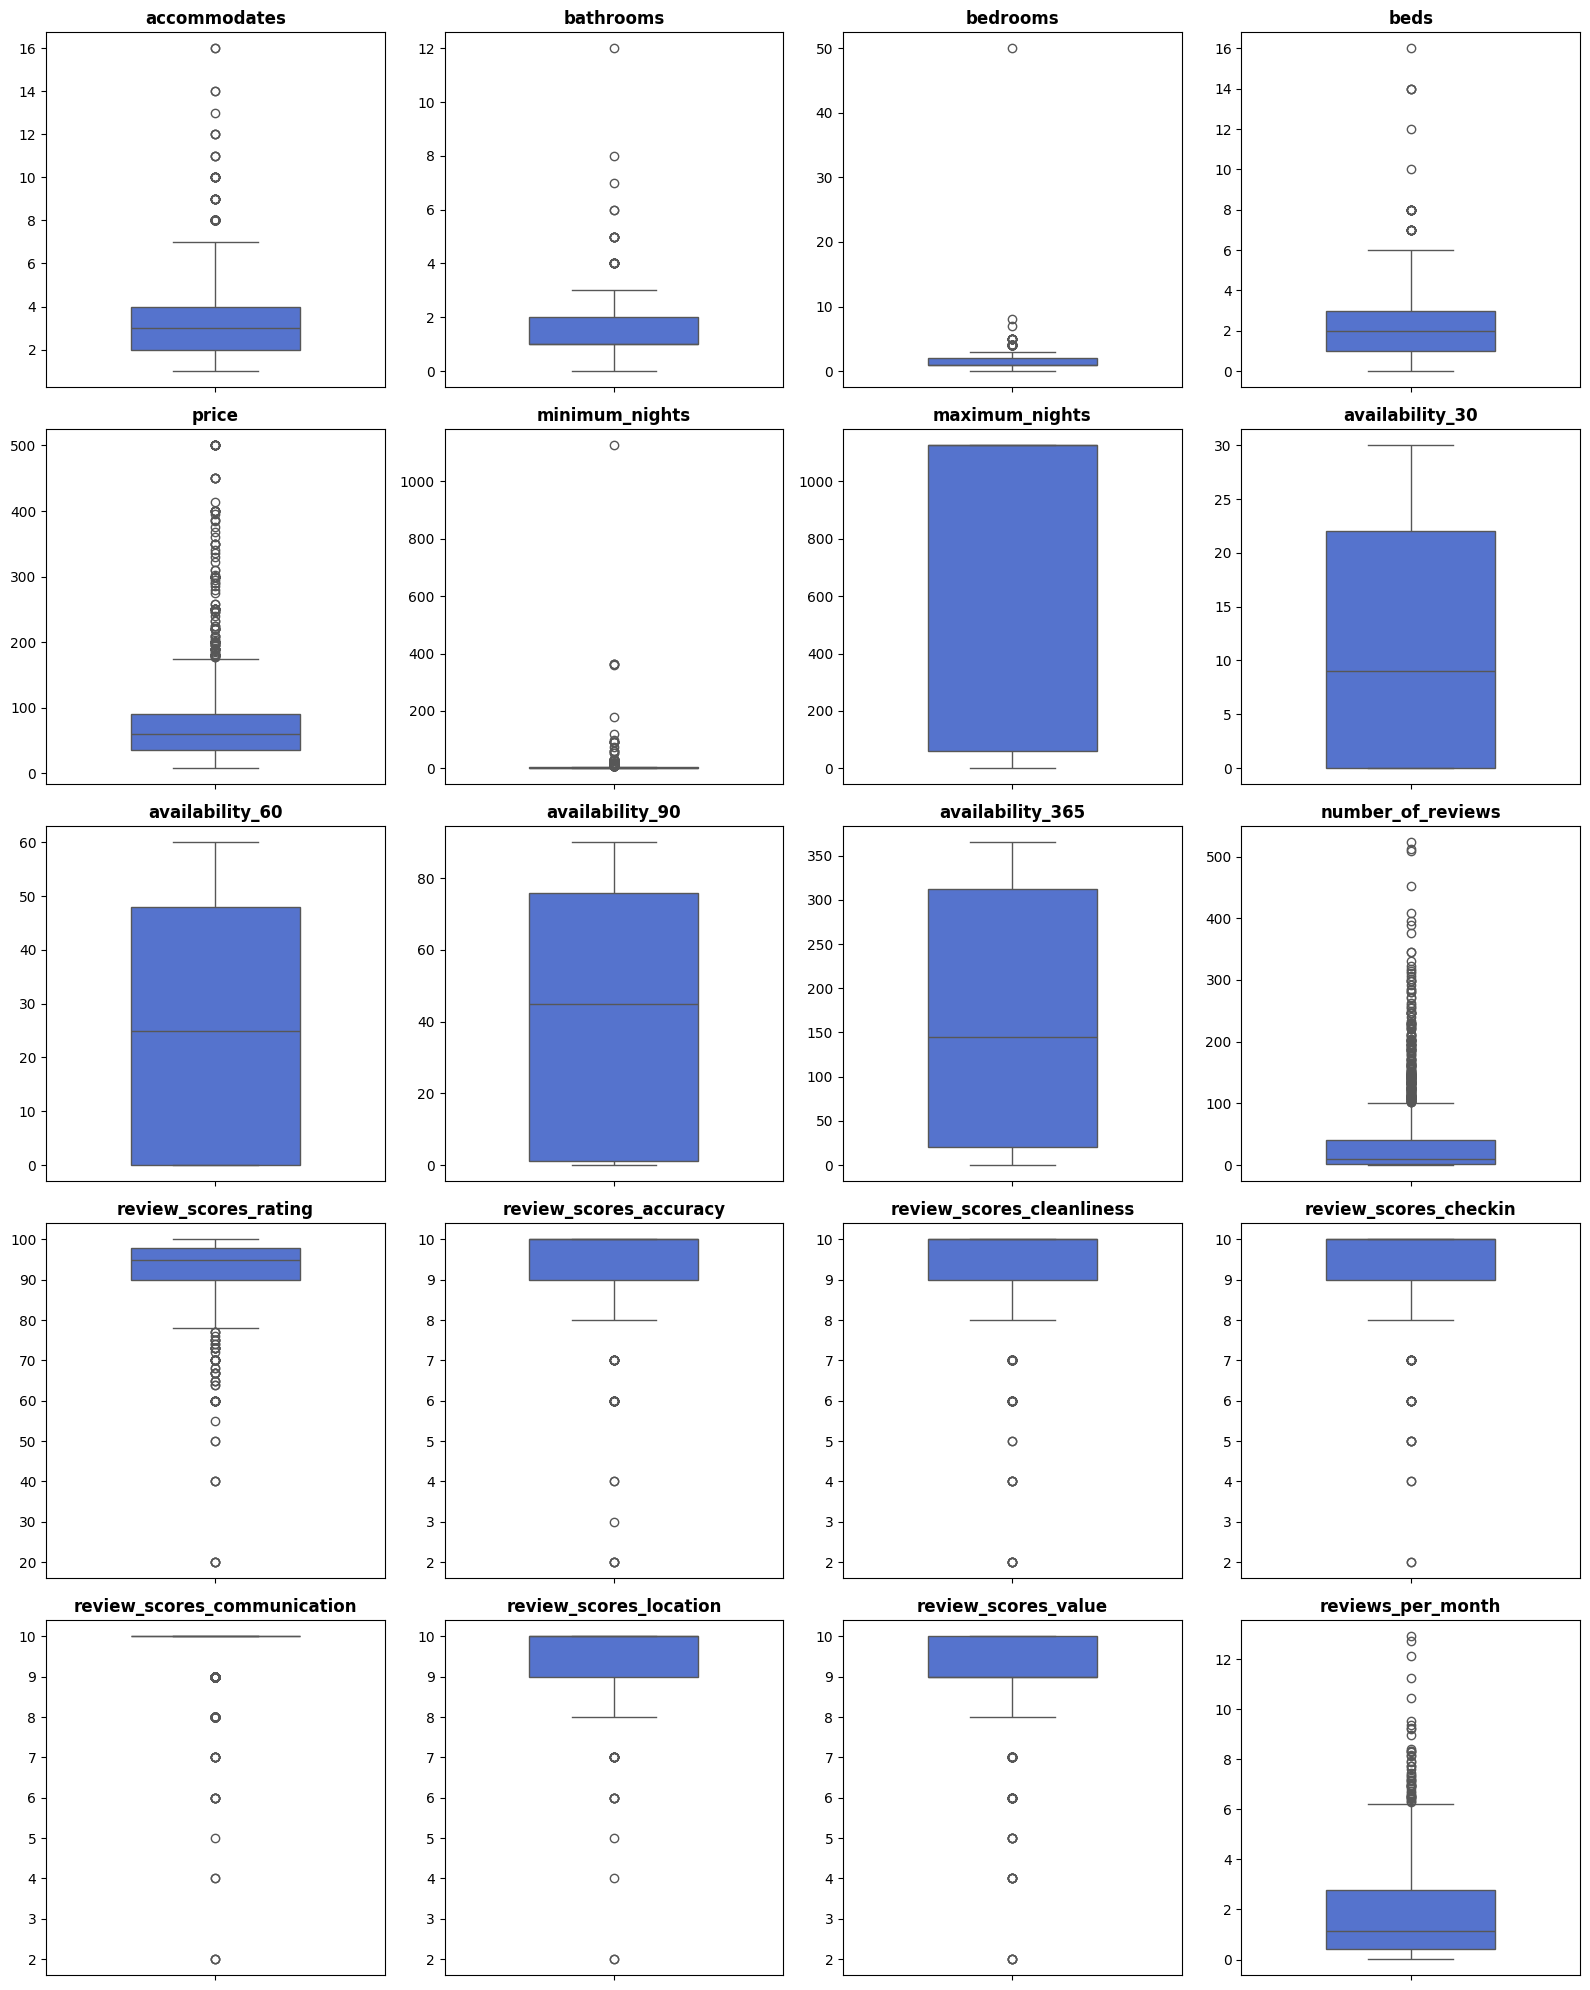

In [ ]:
# Gráfico de bigotes para cada variable numérica.

# Creamos la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))  # Ajustamos el tamaño

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un boxplot para cada variable numérica:
for i, column in enumerate(df_numericas_M.columns):
    sns.boxplot(data=df_numericas_M[column], ax=axes[i], color="royalblue", width=0.5)  # Ajustamos el ancho
    axes[i].set_title(column, fontsize=12, fontweight="bold")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminamos gráficos vacíos (si es que los hay)
for j in range(num_vars, len(axes)):  # Cambié `i + 1` por `num_vars`
    fig.delaxes(axes[j])  # Eliminar los ejes vacíos

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico
plt.show()

Vamos a determinar el IQR para filtrar automáticamente los outliers. Resulta típico establecer un parámetro de filtrado igual a 1.5 y filtrar todos aquellos valores que queden por encima de la mediana más dicho valor por el rango intercuartílico

In [ ]:
# Definimos las columnas que queremos analizar
columnas = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights']

# Creamos una lista para almacenar los resultados
resultados_outliers_M = []

# Iteramos sobre las columnas
for col in columnas:
    # Calculamos el IQR para la columna
    IQR_M = df_clean_madrid[col].quantile(0.75) - df_clean_madrid[col].quantile(0.25)

    # Calculamos la mediana para la columna
    mediana_M = df_clean_madrid[col].median()

    # Calculamos el límite superior para los outliers usando la mediana
    outlier_limite_M = mediana_M + 1.5 * IQR_M.round(2)

    # Contamos los outliers superiores
    outliers_count_M = df_clean_madrid[df_clean_madrid[col] > outlier_limite_M][col].count()

    # Total de datos en la columna
    total_count_M = df_clean_madrid[col].count()  # Usamos .count() para no contar nulos

    # Calculamos el porcentaje de outliers y lo redondeamos a 2 decimales
    outliers_porcentaje_M = round((outliers_count_M / total_count_M) * 100, 2)

    # Añadimos los resultados a la lista
    resultados_outliers_M.append({
        'Columna': col,
        'Mediana': mediana_M,
        'IQR': IQR_M,
        'Outliers': outlier_limite_M,
        'Num_outliers': outliers_count_M,
        'Porcentaje_outliers %': outliers_porcentaje_M
    })

# Convertimos la lista de diccionarios en un DataFrame
df_resultados_outliers_M = pd.DataFrame(resultados_outliers_M)

# Mostramos el DataFrame con los resultados
df_resultados_outliers_M.head(6)


Columna  Mediana   IQR  Outliers  Num_outliers  \
0    accommodates      3.0   2.0       6.0           117   
1       bathrooms      1.0   1.0       2.5            94   
2        bedrooms      1.0   1.0       2.5           209   
3            beds      2.0   2.0       5.0            58   
4           price     60.0  56.0     144.0           236   
5  minimum_nights      2.0   2.0       5.0           193   

   Porcentaje_outliers %  
0                   5.44  
1                   4.37  
2                   9.81  
3                   2.72  
4                  10.97  
5                   8.97

Representamos el precio en un gráfico interactivo al ser la variable central, para ayudarnos a visualizar y consultar precios:

In [ ]:
#Diagrama de bigotes del precio de Madrid:

fig = px.box(df_clean_madrid, x='price',
                 title='Distribución del Precio',
                 labels={'price': 'Precio (€)'},
                 color_discrete_sequence=['royalblue'],
                 width=1500,
                 height=500)

# Personalizamos el gráfico:
fig.update_layout(
    yaxis_title='Precio (€)',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')


# Mostramos la gráfica
fig.show()

*   OUTLIERS PRECIO



In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_precio = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'price', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outliers_precio_M = df_clean_madrid[df_clean_madrid['price'] > limite_superior_precio]

df_outliers_precio_M.sample(2)

apartment_id                           name  \
4352       1318990      De la Reina Luxe Gran Vía   
5759      33707301  GRAN VIA Boutique Apartment 1   

                                            description neighborhood_overview  \
4352  Elegant and comfortable apartment located in t...                   NaN   
5759  Apartamento de lujo, con decoración moderna, r...                   NaN   

     neighbourhood_name neighbourhood_district               latitude  \
4352           Justicia                 Centro  4.042.118.983.363.640   
5759            Palacio                 Centro              4.042.054   

                   longitude        room_type  accommodates  bathrooms  \
4352  -3.699.268.598.911.580  Entire home/apt             5        2.0   
5759                -370.816  Entire home/apt             4        1.0   

      bedrooms  beds                                     amenities_list  \
4352       3.0   5.0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
5759       2.0   3.0  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   

      price  minimum_nights  maximum_nights has_availability  availability_30  \
4352  250.0               3           365.0             True              9.0   
5759  150.0               3           180.0             True             30.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
4352                9              9.0               110                  4   
5759               60             90.0               180                 10   

     first_review_date last_review_date  review_scores_rating  \
4352        2014-01-05       2017-07-03                  55.0   
5759        2019-06-30       2020-04-11                  94.0   

      review_scores_accuracy  review_scores_cleanliness  \
4352                     6.0                        6.0   
5759                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
4352                    5.0                          7.0   
5759                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
4352                     8.0                  4.0                False   
5759                    10.0                  9.0                 True   

      reviews_per_month country    city insert_date  
4352               0.08   spain  madrid  2018-04-12  
5759               0.85   spain  madrid  2020-06-13

*   OUTLIERS HUESPEDES:



In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_accom = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'accommodates', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_accom_M= df_clean_madrid[df_clean_madrid['accommodates'] > limite_superior_accom]

df_outlayers_accom_M.sample(3)


apartment_id                                               name  \
2499      15968763  Apartamento con Encanto en el Barrio de Salamanca   
8891      26118019     Great 4 bedrooms 2 Bathrooms Best zone 1-7 per   
8987        176827                 Se alquilan habitaciones en Madrid   

                                            description  \
2499  Os invito a conocer mi hogar. Ideal para famil...   
8891  Zona muy segura centro de Madrid Cerca lugares...   
8987  Es un piso totalmente reformado. Todas las hab...   

                                  neighborhood_overview neighbourhood_name  \
2499                                                NaN          Recoletos   
8891                                                NaN     Hispanoamérica   
8987  Esta rodeado de cines, teatros, centros comerc...        Universidad   

     neighbourhood_district             latitude            longitude  \
2499              Salamanca            4.042.316             -368.261   
8891              Chamartín            4.045.732             -367.511   
8987                 Centro  404.234.222.115.417  -37.048.737.485.507   

            room_type  accommodates  bathrooms  bedrooms  beds  \
2499  Entire home/apt             7        1.0       2.0   7.0   
8891  Entire home/apt             7        2.0       4.0   5.0   
8987     Private room             7        5.0       1.0   7.0   

                                         amenities_list  price  \
2499  {TV,Wifi,Kitchen,Elevator,Heating,"Family/kid ...  170.0   
8891  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...  300.0   
8987  {TV,Internet,"Wireless Internet",Kitchen,"Smok...   28.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
2499               2            14.0             True              0.0   
8891              55          1125.0             True             30.0   
8987               1           730.0              NaN             13.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
2499                0              0.0                 0                  5   
8891               60             90.0               365                  2   
8987               43             72.0               347                156   

     first_review_date last_review_date  review_scores_rating  \
2499        2017-01-02       2017-06-04                  90.0   
8891        2018-09-28       2019-01-04                 100.0   
8987        2012-02-06       2017-04-02                  83.0   

      review_scores_accuracy  review_scores_cleanliness  \
2499                     9.0                        9.0   
8891                    10.0                       10.0   
8987                     8.0                        9.0   

      review_scores_checkin  review_scores_communication  \
2499                    9.0                          9.0   
8891                   10.0                         10.0   
8987                    9.0                          9.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
2499                    10.0                  9.0                False   
8891                    10.0                 10.0                False   
8987                     9.0                  9.0                 True   

      reviews_per_month country    city insert_date  
2499               0.16   spain  madrid  2019-08-12  
8891               0.17   spain  madrid  2019-09-19  
8987               2.48   spain  madrid  2017-04-08

*   OUTLIERS BAÑOS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bath = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'bathrooms', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_bath_M= df_clean_madrid[df_clean_madrid['bathrooms'] > limite_superior_bath]

df_outlayers_bath_M.sample(3)


apartment_id                                               name  \
679       18086541                    Amazing room in Madrid's center   
5583      12226249                  Penthouse in the center of Madrid   
1857      33446662  Penthouse in Gran Vía with Terrace to Royal Pa...   

                                            description  \
679   This is a lovely room in a cozy apartment that...   
5583  Penthouse with large terrace, swimming pool (J...   
1857  Beautiful penthouse in 11 emblematic building ...   

                                  neighborhood_overview neighbourhood_name  \
679   Not only is Callao great for it’s central loca...                Sol   
5583  Quiet neighborhood, close to the center and wi...      Bellas Vistas   
1857  Gran Via is the center of Madrid. Besides havi...            Palacio   

     neighbourhood_district               latitude             longitude  \
679                  Centro  4.041.876.991.257.120  -370.636.130.078.485   
5583                 Tetuán              4.045.046              -370.728   
1857                 Centro              4.042.205              -370.905   

            room_type  accommodates  bathrooms  bedrooms  beds  \
679      Private room             1        3.0       1.0   1.0   
5583  Entire home/apt             5        3.0       3.0   3.0   
1857  Entire home/apt             6        3.0       3.0   5.0   

                                         amenities_list  price  \
679   {TV,"Wireless Internet",Kitchen,Elevator,Heati...   30.0   
5583  ["Free parking on premises", "Iron", "TV", "Ki...   95.0   
1857  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...  240.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
679                3          1125.0             True             27.0   
5583               4          1125.0             True              0.0   
1857               3          1124.0             True             26.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
679                57             87.0               362                  0   
5583                0              0.0                 0                 14   
1857               42             66.0               317                 43   

     first_review_date last_review_date  review_scores_rating  \
679                NaN              NaN                   NaN   
5583        2016-07-06       2017-08-29                  97.0   
1857        2019-04-11       2020-03-15                 100.0   

      review_scores_accuracy  review_scores_cleanliness  \
679                      NaN                        NaN   
5583                    10.0                       10.0   
1857                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
679                     NaN                          NaN   
5583                   10.0                         10.0   
1857                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
679                      NaN                  NaN                False   
5583                     9.0                 10.0                False   
1857                    10.0                 10.0                 True   

      reviews_per_month country    city insert_date  
679                 NaN   spain  madrid  2018-01-17  
5583               0.26   spain  madrid  2020-11-06  
1857               3.22   spain  madrid  2020-05-14

*   OUTLIERS HABITACIONES

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bedr = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'bedrooms', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_bedr_M= df_clean_madrid[df_clean_madrid['bedrooms'] > limite_superior_bedr]

df_outlayers_bedr_M.sample(3)

apartment_id                                              name  \
7974      12303494                   Stylish apartment - Serrano VII   
5319      23921327  JUNTO EST. ATOCHA SOLEADO CON BALCÓN-ANTI CVID19   
2         39982406     LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA   

                                            description  \
7974  In the heart of the ‘golden mile’ of Madrid yo...   
5319  El apartamento se LIMPIA y DESINFECTA con prod...   
2     Luxury Apartment located in a priveleged zone ...   

                                  neighborhood_overview neighbourhood_name  \
7974  It is located in Serrano Street, known for its...         Castellana   
5319  Precioso apartamento en el barrio de Pacifico....           Pacífico   
2     Very quiet residential area in a Posh area of ...         El Plantío   

     neighbourhood_district   latitude longitude        room_type  \
7974              Salamanca  4.042.957  -368.593  Entire home/apt   
5319                 Retiro    404.038  -368.188  Entire home/apt   
2         Moncloa - Aravaca  4.046.614  -380.948  Entire home/apt   

      accommodates  bathrooms  bedrooms  beds  \
7974             6        3.0       3.0   5.0   
5319             4        2.0       3.0   4.0   
2               10        3.0       5.0   8.0   

                                         amenities_list  price  \
7974  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  387.0   
5319  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   44.0   
2     {TV,"Cable TV",Wifi,"Air conditioning",Pool,Ki...  220.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
7974              30          1125.0             True              0.0   
5319               3            40.0             True              0.0   
2                  1            30.0             True             30.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
7974               11             41.0               316                  1   
5319               13             43.0                61                 51   
2                  60             90.0               365                  0   

     first_review_date last_review_date  review_scores_rating  \
7974        2016-05-09       2016-05-09                 100.0   
5319        2018-04-02       2020-03-08                  98.0   
2                  NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
7974                    10.0                       10.0   
5319                    10.0                       10.0   
2                        NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
7974                   10.0                         10.0   
5319                   10.0                         10.0   
2                       NaN                          NaN   

      review_scores_location  review_scores_value  is_instant_bookable  \
7974                    10.0                 10.0                False   
5319                    10.0                 10.0                False   
2                        NaN                  NaN                 True   

      reviews_per_month country    city insert_date  
7974               0.03   spain  madrid  2019-03-08  
5319               1.90   spain  madrid  2020-06-13  
2                   NaN   spain  madrid  2020-01-10

In [ ]:
# Filtramos el DataFrame
df_outlayers_bedr_M2= df_clean_madrid[df_clean_madrid['bedrooms'] == 50]

df_outlayers_bedr_M2.head(1)

apartment_id                                          name  \
147      34523812  NEW RESIDENCE IN MADRID 50 INDIVIDUALS ROOMS   

                                           description  \
147  Full building of 52 rooms, with 10 bathrooms, ...   

                                 neighborhood_overview neighbourhood_name  \
147  La zona es residencial y tranquila, frente a u...         Pradolongo   

    neighbourhood_district   latitude longitude        room_type  \
147                  Usera  4.038.025  -370.887  Entire home/apt   

     accommodates  bathrooms  bedrooms  beds  \
147             1       12.0      50.0   1.0   

                                        amenities_list  price  minimum_nights  \
147  {TV,Wifi,Kitchen,Elevator,Heating,Washer,"Smok...   25.0               1   

     maximum_nights has_availability  availability_30  availability_60  \
147          1125.0             True             30.0               60   

     availability_90  availability_365  number_of_reviews first_review_date  \
147             90.0               365                  0               NaN   

    last_review_date  review_scores_rating  review_scores_accuracy  \
147              NaN                   NaN                     NaN   

     review_scores_cleanliness  review_scores_checkin  \
147                        NaN                    NaN   

     review_scores_communication  review_scores_location  review_scores_value  \
147                          NaN                     NaN                  NaN   

     is_instant_bookable  reviews_per_month country    city insert_date  
147                 True                NaN   spain  madrid  2019-06-07

Este apartamento tiene datos no consistentes, es posible que en análisis posteriores tengamos que tratar o filtar este dato.

*   OUTLIERS CAMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_beds = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'beds', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_beds_M= df_clean_madrid[df_clean_madrid['beds'] > limite_superior_beds]

df_outlayers_beds_M.sample(3)

apartment_id                                 name  \
3748      16027015  La Latina 2 Madrid Center Santa Ana   
6767      27886787                      humilladero XII   
7404        688795       PENTH. MODERN PLAZA MAYOR VIEW   

                                            description  \
3748  Completely New apartment in the center of Madr...   
6767  Este apartamento con capacidad para 8 personas...   
7404  Please before make the reservation, ENTER corr...   

                                  neighborhood_overview neighbourhood_name  \
3748                                                NaN        Embajadores   
6767                                                NaN            Palacio   
7404  NEIGHBOURHOOD & LOCATION: Here in the heart of...                Sol   

     neighbourhood_district               latitude               longitude  \
3748                 Centro              4.040.886                -370.916   
6767                 Centro  4.041.082.180.934.840  -3.709.842.404.935.430   
7404                 Centro              4.041.703                -370.656   

            room_type  accommodates  bathrooms  bedrooms  beds  \
3748  Entire home/apt             6        1.0       3.0   6.0   
6767  Entire home/apt             8        1.0       4.0   6.0   
7404  Entire home/apt            10        2.0       2.0   8.0   

                                         amenities_list  price  \
3748  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   89.0   
6767  {TV,Wifi,"Air conditioning",Kitchen,Heating,Wa...  110.0   
7404  {TV,Internet,Wifi,"Air conditioning",Kitchen,D...   75.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
3748               2          1125.0             True             30.0   
6767               2          1125.0             True             15.0   
7404               2          1125.0             True             11.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
3748               45             45.0                45                 64   
6767               40             40.0                40                  0   
7404               38             68.0               343                 99   

     first_review_date last_review_date  review_scores_rating  \
3748        2016-12-28       2019-10-24                  85.0   
6767               NaN              NaN                   NaN   
7404        2012-12-08       2019-05-19                  94.0   

      review_scores_accuracy  review_scores_cleanliness  \
3748                     9.0                        9.0   
6767                     NaN                        NaN   
7404                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
3748                    9.0                          9.0   
6767                    NaN                          NaN   
7404                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
3748                    10.0                  9.0                 True   
6767                     NaN                  NaN                False   
7404                    10.0                  9.0                 True   

      reviews_per_month country    city insert_date  
3748               1.48   spain  madrid  2020-07-17  
6767                NaN   spain  madrid  2018-11-07  
7404               1.25   spain  madrid  2019-06-07

*   OUTLIERS NOCHES MINIMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_min = df_resultados_outliers_M.loc[df_resultados_outliers_M['Columna'] == 'minimum_nights', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_min_M= df_clean_madrid[df_clean_madrid['minimum_nights'] > limite_superior_min]

df_outlayers_min_M.sample(3)

apartment_id                                           name  \
2666      18993315                               CH9! DUPLEXHome!   
5637      39684876      Acogedora habitación en piso compartido .   
6040       3764496  Magnífico apartamento nuevo, .Equipado, wify.   

                                            description  \
2666  LOFT DUPLEX BAJO CON TERRAZA - CAMA 1.50 + SOF...   
5637  habitación privada , pequeña pero acogedora , ...   
6040  Estudio, Apartamento,nuevo, equipado,  calefac...   

                                  neighborhood_overview neighbourhood_name  \
2666  - CHECK IN 14H - CHECK OUT 12H CON FLEXIBILIDA...         San Andrés   
5637  barrio castizo , rodeado de tiendas, bancos, s...           Imperial   
6040  ES UN BARRIO ELEGANTE, DE ALTA GAMA DE PÚBLICO...         Castellana   

     neighbourhood_district               latitude               longitude  \
2666             Villaverde  4.033.258.613.551.280  -3.703.696.301.634.610   
5637             Arganzuela              4.041.253                -372.083   
6040              Salamanca              4.042.902                -368.073   

            room_type  accommodates  bathrooms  bedrooms  beds  \
2666  Entire home/apt             4        2.0       1.0   2.0   
5637     Private room             1        1.0       1.0   1.0   
6040  Entire home/apt             2        2.0       1.0   3.0   

                                         amenities_list  price  \
2666  {TV,Wifi,"Air conditioning",Kitchen,"Free park...   43.0   
5637  {TV,Wifi,Kitchen,Breakfast,Heating,Washer,Esse...   35.0   
6040  {TV,Wifi,"Air conditioning",Kitchen,"Paid park...   70.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
2666              12          1125.0             True              5.0   
5637               7            15.0             True              0.0   
6040               7            60.0             True              0.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
2666               18             21.0               271                  7   
5637               20             50.0                73                  0   
6040                0              0.0                 0                 15   

     first_review_date last_review_date  review_scores_rating  \
2666        2017-07-05       2018-05-09                  97.0   
5637               NaN              NaN                   NaN   
6040        2014-10-01       2019-08-23                  87.0   

      review_scores_accuracy  review_scores_cleanliness  \
2666                    10.0                       10.0   
5637                     NaN                        NaN   
6040                     9.0                        8.0   

      review_scores_checkin  review_scores_communication  \
2666                   10.0                         10.0   
5637                    NaN                          NaN   
6040                   10.0                         10.0   

      review_scores_location  review_scores_value  is_instant_bookable  \
2666                     9.0                 10.0                 True   
5637                     NaN                  NaN                 True   
6040                    10.0                  9.0                False   

      reviews_per_month country    city insert_date  
2666               0.57   spain  madrid  2018-07-10  
5637                NaN   spain  madrid  2019-11-09  
6040               0.23   spain  madrid  2020-02-18

###2.5 Coordenadas.

Se van a tratar los datos de latitud y longitud ya que no estan en un formato estándar decimal simple

In [ ]:
#Quitamos todos los puntos en las columnas 'latitude' y 'longitude':
df_clean_madrid['latitude_clean'] = df_clean_madrid['latitude'].str.replace('.', '', regex=False)
df_clean_madrid['longitude_clean'] = df_clean_madrid['longitude'].str.replace('.', '', regex=False)

# Convertimos las columnas 'latitude_clean' y 'longitude_clean' a números:
df_clean_madrid['latitude_clean'] = pd.to_numeric(df_clean_madrid['latitude_clean'], errors='coerce')
df_clean_madrid['longitude_clean'] = pd.to_numeric(df_clean_madrid['longitude_clean'], errors='coerce')

# Transformamos la 'latitude_clean': primeros 2 dígitos para "40," y el resto tras la coma
df_clean_madrid['latitude_trasfor'] = df_clean_madrid['latitude_clean'].astype(str).str[:2] + '.' + df_clean_madrid['latitude_clean'].astype(str).str[2:]

# Transformamos la 'longitude_clean': primer dígito "-3," y el resto tras la coma
df_clean_madrid['longitude_trasfor'] = df_clean_madrid['longitude_clean'].astype(str).str[:2] + '.' + df_clean_madrid['longitude_clean'].astype(str).str[2:]

df_clean_madrid = df_clean_madrid.drop(columns=['latitude', 'longitude', 'latitude_clean', 'longitude_clean'])


In [ ]:
print(df_clean_madrid['latitude_trasfor'].dtype)
print(df_clean_madrid['longitude_trasfor'].dtype)

object
object


In [ ]:
# Convertimos las columnas a tipo float
df_clean_madrid['latitude_trasfor'] = pd.to_numeric(df_clean_madrid['latitude_trasfor'], errors='coerce')
df_clean_madrid['longitude_trasfor'] = pd.to_numeric(df_clean_madrid['longitude_trasfor'], errors='coerce')

# Verificamos los tipos de datos después de la conversión:
print(df_clean_madrid['latitude_trasfor'].dtype)
print(df_clean_madrid['longitude_trasfor'].dtype)

float64
float64


## **3. Analisis de correlaciones con el precio:**

In [ ]:
# Selecionamos los valores numericos para realizar una correlacion solo de Madrid:
df_clean_madrid_num = df_clean_madrid._get_numeric_data()
df_clean_madrid_num = df_clean_madrid_num.drop(columns=['apartment_id'])
df_clean_madrid_num.corr()

accommodates  bathrooms  bedrooms      beds  \
accommodates                     1.000000   0.244182  0.397641  0.806601   
bathrooms                        0.244182   1.000000  0.483832  0.322571   
bedrooms                         0.397641   0.483832  1.000000  0.408518   
beds                             0.806601   0.322571  0.408518  1.000000   
price                            0.427320   0.203379  0.223401  0.371724   
minimum_nights                  -0.015834  -0.011649  0.001406 -0.000206   
maximum_nights                   0.105483   0.057500  0.036278  0.060637   
availability_30                  0.073917   0.050489  0.051250  0.082432   
availability_60                  0.083740   0.033270  0.047349  0.075654   
availability_90                  0.099844   0.030867  0.047731  0.084151   
availability_365                 0.105320   0.037219  0.055825  0.093457   
number_of_reviews                0.079588  -0.044051 -0.008694  0.036011   
review_scores_rating             0.004920   0.037206  0.051097  0.019016   
review_scores_accuracy           0.006105   0.054544  0.041804  0.033221   
review_scores_cleanliness        0.027347   0.060013  0.042040  0.028803   
review_scores_checkin           -0.044713   0.013768  0.005423 -0.018809   
review_scores_communication     -0.021204   0.011385  0.030375 -0.002832   
review_scores_location           0.087793   0.081282  0.052269  0.068729   
review_scores_value             -0.001105   0.057196  0.047054  0.017149   
is_instant_bookable              0.150740  -0.048023  0.029999  0.054202   
reviews_per_month                0.076211  -0.061863 -0.011674  0.025448   
latitude_trasfor                 0.015818   0.073756 -0.005810  0.039947   
longitude_trasfor               -0.078520  -0.012704 -0.014070 -0.038657   

                                price  minimum_nights  maximum_nights  \
accommodates                 0.427320       -0.015834        0.105483   
bathrooms                    0.203379       -0.011649        0.057500   
bedrooms                     0.223401        0.001406        0.036278   
beds                         0.371724       -0.000206        0.060637   
price                        1.000000        0.005209        0.063279   
minimum_nights               0.005209        1.000000        0.017959   
maximum_nights               0.063279        0.017959        1.000000   
availability_30              0.121710        0.004061        0.040323   
availability_60              0.119944       -0.001848        0.039279   
availability_90              0.130533       -0.002481        0.042690   
availability_365             0.106839        0.022283        0.123631   
number_of_reviews           -0.076425       -0.041800       -0.059483   
review_scores_rating         0.054799       -0.019593       -0.032355   
review_scores_accuracy       0.049189        0.002030       -0.055227   
review_scores_cleanliness    0.078137       -0.021418       -0.025835   
review_scores_checkin       -0.007747       -0.029246       -0.010990   
review_scores_communication -0.000969       -0.028379       -0.043999   
review_scores_location       0.100124       -0.035901       -0.007783   
review_scores_value         -0.003924       -0.006288       -0.049685   
is_instant_bookable          0.095031       -0.056209       -0.005483   
reviews_per_month           -0.045596       -0.041143       -0.046078   
latitude_trasfor             0.076935       -0.031069       -0.003549   
longitude_trasfor            0.012481       -0.043385       -0.032700   

                             availability_30  availability_60  \
accommodates                        0.073917         0.083740   
bathrooms                           0.050489         0.033270   
bedrooms                            0.051250         0.047349   
beds                                0.082432         0.075654   
price                               0.121710         0.119944   
minimum_nights                      0.004061        -0.001848

In [ ]:
# se crea una máscara para la parte superior para no duplicar correlaciones:
mask = np.triu(np.ones_like(df_clean_madrid_num.corr(), dtype=bool))

# Heatmap:
plt.figure(figsize=(20, 8))

sns.heatmap(df_clean_madrid_num.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.9)

# Se añade un título al heatmap
plt.title('Mapa de Calor de las Variables - Madrid')

# Mostramos el gráfico
plt.show();

In [ ]:
# Vamos a calcular las correlaciones con la variable 'price'
Corr_price_madrid = df_clean_madrid_num.corr()["price"].sort_values(ascending=False).round(2) * 100

# Convertimos la serie de correlaciones a un DataFrame
Corr_price_madrid_df = Corr_price_madrid.reset_index()
Corr_price_madrid_df.columns = ['Variable', 'Correlación']

# Gráfico de barras.
fig4 = px.bar(Corr_price_madrid_df,
             x='Variable',
             y='Correlación',
             color='Correlación',
             title='Correlación de las variables con el Precio',
             labels={'Variable': 'Variable', 'Correlación': 'Correlación (%)'},
             template='plotly',
             text='Correlación',
             color_continuous_scale=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig4.update_layout(
    xaxis_title='Variables del DataFrame',
    yaxis_title='Correlación (%)',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=500,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostrar el gráfico
fig4.show();

Se puede observar que no hay una buena correlación de ninguna de las variables  con el precio. Además se ve que para Madrid, la correlación de variables como huéspedes, baños y camas (con el precio) disminuye frente al data set completo.

## **4. Analisis de las variables categóricas con el precio:**

### 4.1 Tipo de habitación.


In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_madrid'
room_type_counts = df_clean_madrid['room_type'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig5 = px.bar(room_type_counts,
             x='room_type',
             y='count',
             color='room_type',
             title='Distribución de Tipos de Habitación en Madrid',
             labels={'room_type': 'Tipo de Habitación', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1000,  # Ajusto el ancho del gráfico
    height=400,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

Como era de esperar, el mayor número de alojamientos ofrecidos en Airbnb son apartamentos o casas enteras.

Calculamos algunos estadisticos de posición y gráfico de bigotes por tipo de habitación para ver la distribución del dato.

In [ ]:
# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Madrid y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats = df_clean_madrid.groupby('room_type').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por tipo de habitación
    median_price=('price', 'median'),
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats = room_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats, headers='keys', tablefmt='pretty'))

+---+-----------------+------------------+--------------+------------+------------+
|   |    room_type    | apartments_count | median_price | mean_price | mode_price |
+---+-----------------+------------------+--------------+------------+------------+
| 0 | Entire home/apt |       1313       |     80.0     |   96.94    |    60.0    |
| 1 |   Hotel room    |        10        |     74.5     |    89.0    |    65.0    |
| 2 |  Private room   |       799        |     30.0     |   47.22    |    30.0    |
| 3 |   Shared room   |        29        |     21.0     |   63.62    |    15.0    |
+---+-----------------+------------------+--------------+------------+------------+


In [ ]:
# Se crea un gráfico de bigotes:
fig6 = px.box(df_clean_madrid,
             y="room_type",  # Eje y para las categorías de tipo de habitación
             x="price",      # Eje x para los precios
             color="room_type",
             title="Distribución de precios por tipo de habitación",
             labels={"room_type": "Tipo de Habitación", "price": "Precio"},
             color_discrete_sequence=px.colors.sequential.RdBu)

# Semodifica el diseño para que quede más visual:
fig6.update_layout(
    yaxis_title="Tipo de Habitación",
    xaxis_title="Precio",
    boxmode="group",  # Agrupamos las cajas por tipo de habitación
    width=1000,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente

# Se muestra el gráfico
fig6.show()

En la distribución se ve que el precios de los hoteles y los apartamentos completos son mayores que en el caso de las habitaciones (tabto privadas como compartidas), el precio de la mediada para en los primeros, supera el tercel cuartil de las habitaciones, además, el gráfico ya arroja una vista de que hay mayor volatilidad de precio en el caso de apartamentos y hoteles.

In [ ]:
# Se analiza la información  de Las habitaciones privadas del DF ya que la mayor parte de la distribución esta por debajo de 75 € sin embargo cuenta con numerosos outliers.
# Vamos a filtrar como ejemplo los valores atipicos superiores a 150€.
pd.set_option('display.max_columns', None)
df_outlayer_room = df_clean_madrid[
    (df_clean_madrid['room_type'] == 'Shared room') &
    (df_clean_madrid['price'] >150)]

# Establecer opción para mostrar todo el contenido de las celdas de texto.
pd.set_option('display.max_colwidth', None)

df_outlayer_room.sample(3)

apartment_id                                      name  \
9925      43794873  ALQUILO HABITACION EN ZONA MUY TRANQUILA   
7679      35190329            Local Near Wanda Metropolitano   
5553      44383826        Habitación Doble Estándar (Room 1)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
9925  ALQUILO   HABITACION  EN  ZONA  MUY  TRANQUILA, Arturo Soria, Ciudad Lineal, Barrio de la Concepcion,   a  partir  de   fecha 15/72020 calle Manipa mum. 31, vivienda unifamiliar,  calefacción, aire acondicionado, Internet fibra optica,  metros Ciudad Lineal, Pueblo Nuevo y Barrio Concepcion  autobuses 21, 146, 48 y 70, , precio 340 €, con todos los gastos incluidos mas limpieza semanal, cambio de sabanas toallas etc.  Chicos jóvenes no fumadores entre 20 y 35 años.<br /><br /><b>The space</b><br />Lugar muy céntrico, zona muy tranquila, vivienda unifamiliar, muy bien comunicada, aparcamiento fuera de hora, lugares de ocio, cines, centros comerciales, polideportivo etc.<br /><br /><b>Guest access</b><br />Zonas comunes, salón cocina. Acceso a internet fibra óptica.<br /><br /><b>Other things to note</b><br />Tranquilidad, buen ambiente, orden y limpieza una vez a la semana por cuenta del propietario, gastos incluidos en el precio establecido. Te animo a que me hagas una visita.   
7679                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Se alquila local cerca del metro de pueblo nuevo para fin de semana (noche de viernes, noche de sábado). Cuenta con 2 sofás grandes dos individuales y un colchón inflable. El pago se haría en el momento de la entrega de las llaves, y una fianza pequeña que se devolvería al finalizar la estancia. Dispone de baño, pero sin ducha. Zona cercana al metro de pueblo que te lleva directo al estadio Wanda Metropolitano en tan solo 4 paradas   
5553                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 4.2 Distrito.

In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_madrid'
district_type_counts = df_clean_madrid['neighbourhood_district'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig = px.bar(district_type_counts,
             x='neighbourhood_district',
             y='count',
             color='neighbourhood_district',
             title='Distribución de distritos en Madrid',
             labels={'neighbourhood_district': 'Distrito', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizamos el diseño del gráfico
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig.show();

Calculamos algunos estadisticos de posición y gráfico de bigotes por distrito para ver la distribución del dato.

In [ ]:
# Se filtra el DataFrame para obtener el número de alojamientos por districto y calcular el número de apartamentos y el promedio de precios por distrito
district_stats = df_clean_madrid.groupby('neighbourhood_district').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por distrito
    median_price=('price', 'median'),             # Promedio de precios por distrito
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
district_stats = district_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(district_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+------------------+--------------+------------+------------+
|    | neighbourhood_district | apartments_count | median_price | mean_price | mode_price |
+----+------------------------+------------------+--------------+------------+------------+
| 10 |   Moncloa - Aravaca    |        59        |     75.0     |   86.69    |   150.0    |
| 14 |       Salamanca        |       141        |     73.0     |   101.07   |    30.0    |
| 3  |         Centro         |       1060       |     70.0     |   84.22    |    60.0    |
| 13 |         Retiro         |        74        |     68.0     |   84.93    |    25.0    |
| 4  |       Chamartín        |        60        |     62.5     |   78.75    |    30.0    |
| 16 |         Tetuán         |        78        |     62.0     |   70.94    |    40.0    |
| 0  |       Arganzuela       |       121        |     58.0     |   64.59    |    60.0    |
| 5  |        Chamberí        |       126        |     55.0     |    72.6    |  

In [ ]:
# Creamos el grafico de Bigotes por distrito:
fig3 = px.box(df_clean_madrid,
              y="price",  # Eje y para las categorías de precios
              x="neighbourhood_district",  # Eje x para los distritos
              color="neighbourhood_district",  # Colorear las cajas por distrito
              title="Distribución de Precios por Distrito de Madrid",
              labels={"neighbourhood_district": "Distrito", "price": "Precio"},
              color_discrete_sequence=px.colors.sequential.Bluered)

# Se ajusta el diseño para mejorar la visualización
fig3.update_layout(
    yaxis_title="Precio",
    xaxis_title="Distrito",
    boxmode="group",  # Agrupar las cajas por distrito
    width=3500,  # Ajustar el ancho del gráfico
    height=1200,  # Ajustar la altura del gráfico
    showlegend=False,  # Ocultar la leyenda ya que no es necesaria
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    boxgap=0,  # Aumenta el tamaño de las cajas (reduce el espacio entre ellas)
    boxgroupgap=0,  # Ajusta la separación entre grupos de cajas
    yaxis=dict(
        tickmode='linear',
        title_font_size=15,
        dtick=50,  # Establece los intervalos de las marcas en 50 unidades
        tickangle=0,
        tickfont_size=12),
    xaxis=dict(
        title_font_size=15,
        tickfont_size=12,
        tickangle=20))  # Rotar las etiquetas del eje x

# Mostrar el gráfico
fig3.show()


In [ ]:
# Se analiza la información  de Ciudad Lineal del DataFrame, ya que es llamativa:
pd.set_option('display.max_columns', None)
df_outlier_cl = df_clean_madrid[
    (df_clean_madrid['neighbourhood_district'] == 'Ciudad Lineal') &
    (df_clean_madrid['price'] >300)]

df_outlier_cl.sample(2)

apartment_id                                           name  \
6155      34633362  Room for Champions League Wanda Metropolitano   
7679      35190329                 Local Near Wanda Metropolitano   

                                                                                                                                                                                                                                                                                                                                                                                                                                              description  \
6155                                                                                                                                    Room for 1-2 person in Madrid, only for the days of the Final Uefa Champions League (1-2 june). Trip to the stadium incluyed. 10 min to the Wanda Metropolitano The room will be clean and prepared for the recepcion of the guest Restaurants Green areas Supermarket Metro Bus Trip to stadium Dinner Breakfast   
7679  Se alquila local cerca del metro de pueblo nuevo para fin de semana (noche de viernes, noche de sábado). Cuenta con 2 sofás grandes dos individuales y un colchón inflable. El pago se haría en el momento de la entrega de las llaves, y una fianza pequeña que se devolvería al finalizar la estancia. Dispone de baño, pero sin ducha. Zona cercana al metro de pueblo que te lleva directo al estadio Wanda Metropolitano en tan solo 4 paradas   

                                                                                          neighborhood_overview  \
6155                                                              Restaurants Green areas Supermarket Metro Bus   
7679  Zona cercana al metro de pueblo que te lleva directo al estadio Wanda Metropolitano en tan solo 4 paradas   

     neighbourhood_name neighbourhood_district     room_type  accommodates  \
6155        Costillares          Ciudad Lineal  Private room             2   
7679       Pueblo Nuevo          Ciudad Lineal   Shared room             5   

      bathrooms  bedrooms  beds  \
6155        1.0       1.0   1.0   
7679        1.0       1.0   3.0   

                                                                                                                                                                                                           amenities_list  \
6155  {Wifi,"Air conditioning",Kitchen,"Smoking allowed","Pets allowed",Elevator,Heating,Washer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Hot water"}   
7679                                                                                                                                                                {"Smoking allowed",Essentials,"Lock on bedroom door"}   

      price  minimum_nights  maximum_nights has_availability  availability_30  \
6155  310.0               1             2.0             True              0.0   
7679  400.0               1          1125.0             True             30.0   

      availability_60  availability_90  availability_365  number_of_reviews  \
6155                0              0.0                 0                  0   
7679               60             90.0               365                  0   

     first_review_date last_review_date  review_scores_rating  \
6155               NaN              NaN                   NaN   
7679               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
6155                     NaN                        NaN   
7679                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
6155                    NaN                          NaN   
7679                    NaN                          NaN   

      review_scores_location  review_scores_value  is_instant_bookable  \


Las habitaciones compartidas con altos precios corresponden a alquiler mesual o bien a alojamientos para eventos en el Wanda Metropolitano, por lo que tiene sentido que las tarifas, para este tipo de eventos deportivos, sean más altas de lo habitual.

### 4.3 Distrito y tipo de habitación.

Calculamos algunos estadisticos de posición y gráfico de calor y de barras agrupadas por distrito para ver la distribución del dato.

In [ ]:
# Se agrupa por distrito y tipo de habitación
price_stats = df_clean_madrid.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median'),             # Promedio de precios por distrito
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenar los resultados alfabeticamente por distrito y tipo de habitación
price_stats = price_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+--------------+------------+------------+
|    | neighbourhood_district |    room_type    | apartments_count | median_price | mean_price | mode_price |
+----+------------------------+-----------------+------------------+--------------+------------+------------+
| 19 |     Ciudad Lineal      |   Shared room   |        2         |    370.0     |   370.0    |   340.0    |
| 16 |        Chamberí        |   Shared room   |        1         |    150.0     |   150.0    |   150.0    |
| 29 |   Moncloa - Aravaca    | Entire home/apt |        32        |    116.5     |   123.06   |   150.0    |
| 20 | Fuencarral - El Pardo  | Entire home/apt |        10        |    106.5     |   130.26   |   160.0    |
| 39 |       Salamanca        | Entire home/apt |        92        |     96.5     |   124.59   |   150.0    |
| 11 |       Chamartín        | Entire home/apt |        35        |     90.0     |   104.8    |    90.0    |
| 23 |    

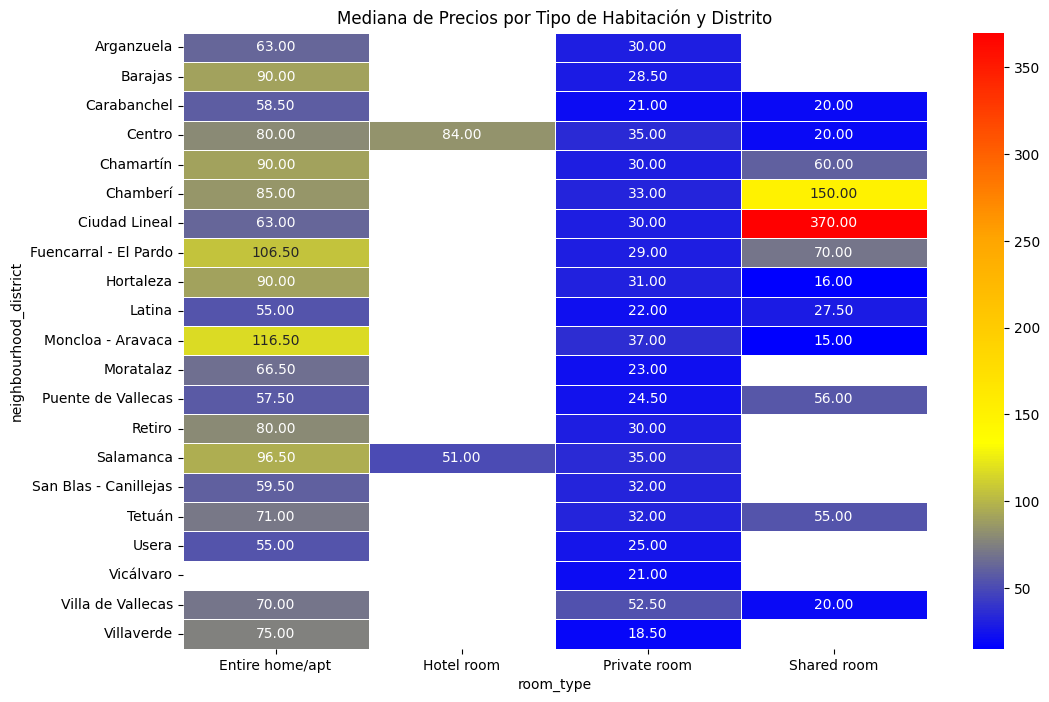

In [ ]:
import matplotlib.colors as mcolors #importamos libreria de colores para crear nuestra paleta
# Se filtra y agrupa el DataFrame

price_stats = df_clean_madrid.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median')              # Calcular el promedio de precios
).reset_index()

# Se crea tabla para el heatmap
pivot_table = price_stats.pivot(index='neighbourhood_district', columns='room_type', values='median_price')

# Paleta de colores personalizada
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['blue', 'yellow', 'orange', 'red']
)

# Crear el heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, linewidths=.5)

# Añadir un título al heatmap
plt.title('Mediana de Precios por Tipo de Habitación y Distrito')

# Mostrar el gráfico
plt.show()

In [ ]:
# Creamos el gráfico de barras apiladas para la mediana de precios
fig = px.bar(
    price_stats,
    x='neighbourhood_district',
    y='median_price',
    color='room_type',
    title='Mediana de Precios por Distrito y Tipo de Habitación',
    labels={'neighbourhood_district': 'Distrito', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Distritos por el total de apartamentos
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_tickangle=-45,  # Rotamos etiquetas del eje X
    height=600,
    width=1500)

fig.show()

Ahora se va a analizar el precio tomando como referencia la mediana de los huespedes que pueden alojarse por distrito y tipo de alojamiento.

In [ ]:
# Se agrupa por distrito y tipo de habitación, y se calculan las métricas necesarias
price_stats = df_clean_madrid.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),    # Contar número de alojamientos
    median_accommodates=('accommodates', 'median'),  # Calcular el promedio de accommodates
    median_price=('price', 'median'),               # Calcular el promedio de precios
).reset_index()

# Se redondean las columnas numéricas a dos decimales
price_stats['median_price'] = price_stats['median_price'].round(2)
price_stats['median_accommodates'] = price_stats['median_accommodates'].round(2)

# Se ordenan los resultados alfabéticamente por distrito y tipo de habitación
price_stats = price_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+---------------------+--------------+
|    | neighbourhood_district |    room_type    | apartments_count | median_accommodates | median_price |
+----+------------------------+-----------------+------------------+---------------------+--------------+
| 19 |     Ciudad Lineal      |   Shared room   |        2         |         4.5         |    370.0     |
| 16 |        Chamberí        |   Shared room   |        1         |         5.0         |    150.0     |
| 29 |   Moncloa - Aravaca    | Entire home/apt |        32        |         4.0         |    116.5     |
| 20 | Fuencarral - El Pardo  | Entire home/apt |        10        |         4.5         |    106.5     |
| 39 |       Salamanca        | Entire home/apt |        92        |         4.0         |     96.5     |
| 11 |       Chamartín        | Entire home/apt |        35        |         4.0         |     90.0     |
| 23 |       Hortaleza        | Entire home/ap

In [ ]:
# Creamos el gráfico de burbujas
fig = px.scatter(
    price_stats,
    x='neighbourhood_district',  # Eje X: Distrito
    y='median_price',            # Eje Y: Mediana del Precio
    size='median_accommodates',   # Tamaño de la burbuja: Mediana de Accommodates
    color='room_type',            # Color: Tipo de Habitación
    hover_name='neighbourhood_district',  # Mostrar el distrito al pasar el ratón
    size_max=40,                  # Tamaño máximo de las burbujas
    title='Mediana de Precios y Accommodates por Distrito y Tipo de Habitación',
    labels={
        'neighbourhood_district': 'Distrito',
        'median_price': 'Mediana del Precio (€)',
        'median_accommodates': 'Mediana de Accommodates',
        'room_type': 'Tipo de Habitación'},
     color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    height=600,           # Altura del gráfico
    width=1500,)          # Ancho del gráfico

# Mostrar el gráfico
fig.show()

###4.4 Amenities.

Se estudiarán si los servicios que ofrece el alojamiento influyen en el precio definido en el data set.

In [ ]:
# Vamos a ir por cada observacion a la columna 'amenities_list', la vamos a separar en 'amenities' y vamos a añadir cada una a la lista amenities_full. Como algunas columnas están mal, las añadimos a la lista 'errores'
errores = []
amenities_full = []
for i in range(len(df_clean_madrid)):
    try:
        amenities = df_clean_madrid['amenities_list'].iloc[i][1:-1].split(',')
        for item in amenities:
            amenities_full.append(item)
    except TypeError:
        errores.append(i)

In [ ]:
# Normalizamos y limpiamos la lista de amenidades
amenities_full = [item.replace('"','').strip() for item in amenities_full]

# Hacemos un diccionario con la tabla de frecuencias de cada servicio:
amenities_count = {}
for item in amenities_full:
    # Normalizamos el servicio:
    item = item.strip().lower()
    if item not in amenities_count:
        amenities_count[item] = 1
    else:
        amenities_count[item] += 1

# Creamos una lista a partir del diccionario de recuento de servicios
amenities_list = list(amenities_count.items())

# Ordenamos la lista basada de manera descendente
amenities_list.sort(key=lambda item: item[1], reverse=True)

# Creamos un nuevo diccionario a partir de la lista ordenada
amenities_count_sorted = {}
for item in amenities_list:
    amenities_count_sorted[item[0]] = item[1]


# Convertimos el diccionario en un DataFrame
amenities_df = pd.DataFrame(list(amenities_count_sorted.items()), columns=['Amenity', 'Count'])

# Mostramos los primeros 10 registros
amenities_df.head(10)

Amenity  Count
0  essentials   2009
1     kitchen   1950
2        wifi   1919
3     heating   1904
4      washer   1829
5     hangers   1775
6          tv   1747
7  hair dryer   1581
8        iron   1576
9     shampoo   1499

In [ ]:
# Crear el gráfico de barras con Plotly.
fig5 = px.bar(amenities_df,
             x='Amenity',
             y='Count',
             color='Amenity',
             title='Número de Servicios',
             labels={'Amenity': 'Tipo de Servicio', 'Count': 'Recuento'},
             template='plotly',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Recuento de los servicios',
    yaxis_title='Sevicios',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=2200,  # Ajusto el ancho del gráfico
    height=700,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

In [ ]:
# Creamos una función para determinar la mediana por servicio usando df_clean_madrid
def precio_medio_por_amenity(amenity):

    # Filtramos el DataFrame df_clean_madrid por servicio
    df_amenities_Madrid = df_clean_madrid[df_clean_madrid['amenities_list'].str.contains(amenity, case=False, na=False)]
    return df_amenities_Madrid['price'].median()

def df_precio_medio_por_amenity(df_amenities):
    amenities = []
    precios = []

    # Iteramos sobre cada amenidad en el DataFrame df_amenities
    for amenity in df_amenities['Amenity']:
        media_precio = precio_medio_por_amenity(amenity)
        amenities.append(amenity)
        precios.append(media_precio)

    # Creamos un nuevo DataFrame con los resultados
    precio_medio_amenity_df = pd.DataFrame({
        'Amenity': amenities,
        'Mediana_precio': precios})
    return precio_medio_amenity_df

# Llamamos a la función:
precio_medio_amenity_df = df_precio_medio_por_amenity(amenities_df).round(2)

# Ordeno el DataFrame por la columna 'Mediana_precio' de mayor a menor:
precio_medio_amenity_df = precio_medio_amenity_df.sort_values(by='Mediana_precio', ascending=False)

# Mostramos el DataFrame final
precio_medio_amenity_df.head(10)

Amenity  Mediana_precio
176               terrace           170.0
179       outdoor seating           170.0
178               netflix           170.0
123          toilet paper           151.5
122            bath towel           151.5
144              smart tv           147.0
170           rain shower           147.0
171            steam oven           147.0
172  memory foam mattress           147.0
155     en suite bathroom           147.0

In [ ]:
# Comprobar si hay valores nulos en la columna 'Mediana_precio'
nulos_amenity_price = precio_medio_amenity_df['Mediana_precio'].isnull().sum()

# Mostrar el número de valores nulos
print(f"Número de valores nulos en Mediana de precio por servicio: {nulos_amenity_price}")

Número de valores nulos en Mediana de precio por servicio: 7


In [ ]:
# Filtrar el DataFrame para mostrar solo las filas donde 'Mediana_precio' es nulo
nulos_amenity_price = precio_medio_amenity_df[precio_medio_amenity_df['Mediana_precio'].isnull()]

# Mostrar el DataFrame filtrado
nulos_amenity_price.sample(7)

Amenity  Mediana_precio
109                                          cat(s)             NaN
139                                    other pet(s)             NaN
160                                        40\ hdtv             NaN
110                                          dog(s)             NaN
175  paid parking garage on premises \u2013 1 space             NaN
169                       dryer \u2013\u00a0in unit             NaN
153                      washer \u2013\u00a0in unit             NaN

En algunos servicios no hay registros suficientes para calcular la mediana.

In [ ]:
precio_medio_amenity_df = precio_medio_amenity_df.dropna()  # Eliminamos servicios con precio 'NaN'para crear el grafico.

In [ ]:
# Creamos un gráfico de Pareto
precio_medio_amenity_df = precio_medio_amenity_df.sort_values(by='Mediana_precio', ascending=False)
precio_medio_amenity_df['Cumulative_percentage'] = precio_medio_amenity_df['Mediana_precio'].cumsum() / precio_medio_amenity_df['Mediana_precio'].sum() * 100

fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=precio_medio_amenity_df['Amenity'],
    y=precio_medio_amenity_df['Mediana_precio'],
    name='Mediana Precio (€)',
    marker_color='royalblue'))

# Línea acumulativa
fig.add_trace(go.Scatter(
    x=precio_medio_amenity_df['Amenity'],
    y=precio_medio_amenity_df['Cumulative_percentage'],
    name='Porcentaje Acumulativo',
    yaxis='y2',  # Eje Y secundario
    mode='lines+markers',
    marker_color='darkred'))

# Configuramos el layout
fig.update_layout(
    title='Gráfico de Pareto de Servicios y Precio',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_title='Tipo de Servicio',
    yaxis_title='Mediana del Precio (€)',
    yaxis2=dict(title='Porcentaje Acumulativo', overlaying='y', side='right'),
    width=1500,
    height=800)

# Mostramos el gráfico
fig.show()

Con este gráfico nos ayudamos a entender que amenities contribuyen más a la subida del precio.En la cabeza están terraza, netflix y muebles de jardin.

TOP 10 SERVICIOS

In [ ]:
# Creamos un DataFrame para almacenar los 10 servicios que tienen mayor contribución al precio.
top_amenities_M = precio_medio_amenity_df.nlargest(10, 'Mediana_precio')

# Preparamos los datos para el gráfico de radar
labels = top_amenities_M['Amenity'].tolist()  # Etiquetas de las amenities
values = top_amenities_M['Mediana_precio'].tolist()  # Valores de la mediana de precios

# Añadimos el primer valor al final para cerrar el gráfico
values += values[:1]
labels += [labels[0]]  # Etiquetas del primer valor para cerrar el gráfico

# Creamos el gráfico de radar
fig = go.Figure()

# Añadir la traza para el radar
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=labels + [labels[0]],  # Cerrar el gráfico
    fill='toself',
    name='Mediana del Precio',
    line=dict(color='blue'),
))

# Personalizamos el diseño
fig.update_layout(
    title='Top 10 de servicios que contribuyen a un precio más alto',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)],  # Ajustar el rango
        )),
    showlegend=False,)

fig.show()

###4.5 Descripción.

Se analiza si buscando palabras clave en la descripción del apartamento, se puede detectar una diferencia de precio entre estos alojamientos aislados y el conjunto de datos de Madrid.

In [ ]:
# Creamos una lista de palabras a buscar
detalle = ['Unique','Luxury', 'Lujo', 'Penthouse', 'Atico', 'Exclusive','Exclusivo','Awesome' ]

# Filtramos el DataFrame buscando si la columna 'description' contiene alguna palabra de la lista 'detalle'
df_clean_madrid_descrip = df_clean_madrid[df_clean_madrid['description'].str.contains('|'.join(detalle), case=False, na=False)]

# Mostramos un ejemplo del df filtrado
df_clean_madrid_descrip.sample(2)

apartment_id                               name  \
2990       1622564   Duplex-terrace close to Gran Vía   
912       14372147  Habitacion soleada junto a Atocha   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
2990  Our duplex penthouse is located on Calle Fomento 25, very close to Gran Via, Plaza de España y Royal Palace. To 200m from emblematic Torre de Madrid where Luis Buñuel was living from 60´s to 80´s. 150x200 viscolastic matress Locker room Our apartment is located on Calle Fomento 25, very close to Gran Via and Plaza de España. It is a spacious and comfortable 70 squared meters two-bedroom duplex apartment that fits four adults. It is located in a new building with elevator in harmony with the old Madrid buildings environment. It has free wifi access, air conditioned and heat, etc. It's a very quiet street so the apartment is really peaceful. Linen and towels are included too. On the downstairs floor you'll find the living room, from you can get to a little terrace from you can see the "Plaza de España" buildings; a fitted kitchen, one bedroom and one bathroom. Both the second bedroom and bathroom are upstairs. The two bedrooms have a double bed and a spacious built-in closet. There's als   
912   Habitación soleada con cama doble [1,80*1,35] en apartamento totalmente renovado hace unos años, y en perfecto estado de conservación. La habitación tienen un gran ventanal [3,0 x 1,80 m], un pequeño armario y un aire acondicionado super silencioso. El baño esta en el pasillo y es de uso exclusivo para esta habitación. La cercanía al Paseo del Arte [5 min andando al Museo Reina Sofia y unos 10 min al Museo del Prado]. Se puede visitar toda la ciudad andando o utilizando el transporte publico, que tiene excelente accesibilidad Se dispone de la habitación y baño. Se puede utilizar la cocina por las mañanas para desayunar. En el piso estamos mi pareja Monica y yo. Conocemos muy bien la ciudad, así que podemos dar consejos sobre que visitar. Se puede usar la lavadora por 5 € o lavadora + secadora por 8€. El precio incluye desayuno, y uso de hervidor de agua. El uso de cocina lleva un suplemento de 5€ Tranquilo, asequible y muy bien comunicado. Con muchos bares y restaurantes con variedad d   

                                                                                                                                                                                                                                                                                                                                                                                                                              neighborhood_overview  \
2990                                                                                                                                                                                                                                                                               The neighborhood is one of Madrileños’ favorites for “tapas” and is famous for its bars, 

In [ ]:
# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Madrid y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats_descrp = df_clean_madrid_descrip.groupby('room_type').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por tipo de habitación
    median_price=('price', 'median'),
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats_descrp = room_stats_descrp.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats_descrp, headers='keys', tablefmt='pretty'))

+---+-----------------+------------------+--------------+------------+------------+
|   |    room_type    | apartments_count | median_price | mean_price | mode_price |
+---+-----------------+------------------+--------------+------------+------------+
| 1 |   Hotel room    |        2         |    118.5     |   118.5    |    51.0    |
| 0 | Entire home/apt |       201        |     99.0     |   126.52   |   150.0    |
| 2 |  Private room   |        53        |     35.0     |   55.17    |    30.0    |
| 3 |   Shared room   |        1         |     27.0     |    27.0    |    27.0    |
+---+-----------------+------------------+--------------+------------+------------+


In [ ]:
# Añadimos una columna que identifique el DataFrame (Madrid vs Filtrado)
room_stats['Dataset'] = 'Madrid Completo'
room_stats_descrp['Dataset'] = 'Madrid Filtrado'

# Combinamos ambos DataFrames
combined_df = pd.concat([room_stats, room_stats_descrp])

# Creamos la gráfica de barras para mostrar la mediana de precios por tipo de habitación
fig = px.bar(
    combined_df,
    x='room_type',
    y='median_price',
    color='Dataset',
    barmode='group',
    title='Comparación de precios por tipo de habitación y descripción',
    labels={'median_price': 'Precio (€)', 'room_type': 'Tipo/descripción de habitación'},
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el layout
fig.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Mediana del Precio',
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

# Mostramos la gráfica
fig.show()

Como era de esperar una descripción del apartamento con palabras clave, y características de “alto standing” condicionan los precios del alojamiento, sobre todo en el caso de los hoteles que pueden llegar hast casi el doble del precio.

Determinamos si este tipo de alojamientos tiene un número de reviews superior a la media, podría indicar una demanda mayor.

In [ ]:
# Calculamos el promedio general de reviews en `df_clean_madrid`
avg_reviews_general = df_clean_madrid['number_of_reviews'].mean()

# Calculamos el promedio de reviews en el DataFrame filtrado `df_clean_madrid_descrip`
avg_reviews_filtered = df_clean_madrid_descrip['number_of_reviews'].mean()

# Creamos el gráfico de barras
fig = go.Figure(data=[
    go.Bar(name='Promedio General', x=['General'], y=[avg_reviews_general], marker_color='rgba(58, 71, 80, 0.6)'),
    go.Bar(name='Promedio Detallado', x=['Con Descripciones Detalladas'], y=[avg_reviews_filtered], marker_color='rgba(246, 78, 139, 0.6)')])

# Configuración del layout
fig.update_layout(
    title='Comparación de Promedio de Reviews',
    xaxis_title='Categoría',
    yaxis_title='Promedio de Reviews',
    width=700,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True)

# Mostramos el gráfico
fig.show()

No hay una diferencia significativa

##5.Analisis de las variables numéricas con el precio.

In [ ]:
df_clean_madrid.columns

Index(['apartment_id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_name', 'neighbourhood_district', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review_date',
       'last_review_date', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'latitude_trasfor',
       'longitude_trasfor'],
      dtype='object')

###5.1 Número de huespedes.

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_accom_M_df = df_clean_madrid.groupby('accommodates').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calcular el coeficiente de correlación
correlation = correlation_accom_M_df['accommodates'].corr(correlation_accom_M_df['median_price'])
print(f"Coeficiente de correlación: {correlation:.2f}")

Coeficiente de correlación: 0.78


In [ ]:
# Creamos el gráfico de dispersión
fig = px.scatter(correlation_accom_M_df,
                 x='accommodates',
                 y='median_price',
                 title='Correlación entre el Número de huespedes y la Mediana del Precio',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_accom_M_df['accommodates'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_accom_M_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation:.2f}',
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Hay una correlación media-alta (cercana al +0,80) entre el número de huéspedes y la mediana del precio.

In [ ]:
# Agrupamos por 'accommodates' y 'room_type' y calcular la mediana del precio
correlation_room_type_df = df_clean_madrid.groupby(['accommodates', 'room_type']).agg(
    median_price=('price', 'median')).reset_index()

In [ ]:
# Creamos el gráfico de dispersión con la mediana del precio
fig = px.scatter(correlation_room_type_df,
                 x='accommodates',
                 y='median_price',
                 color='room_type',  # Usar room_type como color
                 title='Correlación entre el Número de Accommodates, Mediana del Precio y Tipo de Habitación',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
                 trendline='ols',  # Añadir línea de tendencia
                 template='plotly')

# Personalizamos el diseño
fig.update_layout(
    width=1200,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')   # Fondo exterior (papel) transparente

# Mostramos el gráfico
fig.show()

In [ ]:
# Vamos a crear un DataFrame para almacenar los coeficientes de correlación por tipo de habitación
correlations = []

# Calculamos la mediana del precio y la correlación por 'room_type'
for room in correlation_room_type_df['room_type'].unique():
    temp_df = correlation_room_type_df[correlation_room_type_df['room_type'] == room]
    correlation = temp_df['accommodates'].corr(temp_df['median_price'])
    correlations.append({'room_type': room, 'correlation': correlation})

# Convertimos la lista en un DataFrame
correlation_df = pd.DataFrame(correlations).round(2)

# Mostramos el DataFrame con correlaciones
correlation_df.head(4)

room_type  correlation
0  Entire home/apt         0.84
1       Hotel room         0.92
2     Private room         0.44
3      Shared room         0.09

Se ve una alta correlación entre la mediana del precio y el número de ocupantes sobre todo para los apartamentos y hoteles, con coeficientes de correlación superiores al 0,80.

###5.2 Número de habitaciones, camas y baños.



*   Habitaciones



In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes.
correlation_bedr_M_df = df_clean_madrid.groupby('bedrooms').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bedr = correlation_bedr_M_df['bedrooms'].corr(correlation_bedr_M_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_M_df,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_M_df['bedrooms'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_bedr_M_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_bedr:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Se filtran los outliers para ver si la correlación es mejor.

In [ ]:
#Filtramos el df para eliminar los outliers:
correlation_bedr_M_df_2 = correlation_bedr_M_df[correlation_bedr_M_df['bedrooms'] < limite_superior_bedr]

# Calcular el coeficiente de correlación usando el DataFrame filtrado
correlation_2 = correlation_bedr_M_df_2['bedrooms'].corr(correlation_bedr_M_df_2['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_M_df_2,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_M_df['bedrooms'].max() * 0.02,  # Ajustamos el texto en el eje x
    y=correlation_bedr_M_df['median_price'].max() * 0.3,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_2:.2f}',
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Se aprecia un aumento de la correlación, que se eleva a media/alta.

*   Camas

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y las camas. calculamos la mediana del precio:
correlation_beds_M_df = df_clean_madrid.groupby('beds').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_beds = correlation_beds_M_df['beds'].corr(correlation_beds_M_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_beds_M_df,
                 x='beds',
                 y='median_price',
                 title='Correlación entre el Número de Camas y la Mediana del Precio',
                 labels={'bedrooms': 'Número de camas', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_beds_M_df['beds'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_beds_M_df['median_price'].max() * 1.2,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_beds:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Se agrupa habitaciones y camas filtrando los outliers para ver si tenemos alguna correlación mayor.

In [ ]:
# Agrupamos por 'bedrooms' y 'beds' para calcular la mediana del precio en el DataFrame filtrado
correlation_bedr_beds_M_df_2 = df_clean_madrid[(df_clean_madrid['bedrooms'] < limite_superior_bedr) & (df_clean_madrid['beds'] < limite_superior_beds)].groupby(['bedrooms', 'beds']).agg(median_price=('price', 'median')).reset_index()

# Calculamos el coeficiente de correlación para 'bedrooms' y 'median_price' en el DataFrame filtrado
correlation_bedrooms = correlation_bedr_beds_M_df_2['bedrooms'].corr(correlation_bedr_beds_M_df_2['median_price'])
correlation_beds = correlation_bedr_beds_M_df_2['beds'].corr(correlation_bedr_beds_M_df_2['median_price'])

# Gráfico de dispersión, incluyendo tamaño de los puntos según 'beds'
fig = px.scatter(correlation_bedr_beds_M_df_2,
                 x='bedrooms',
                 y='median_price',
                 size='beds',  # Tamaño de los puntos basado en el número de camas
                 color='beds',  # Colorear los puntos por el número de camas
                 title='Correlación entre el Número de Habitaciones, Camas y la Mediana del Precio (sin outliers)',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)', 'beds': 'Número de camas'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_beds_M_df_2['bedrooms'].max() * 0.40,  # Ajustamos el texto en el eje x
    y=correlation_bedr_beds_M_df_2['median_price'].max() * 1.1,  # Ajustamos el texto en el eje y
    text=f'Coef. correlación (habitaciones): {correlation_bedrooms:.2f}\n'
         f'Coef. correlación (camas): {correlation_beds:.2f}',  # Mostramos ambas correlaciones
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos diseño
fig.update_layout(
    width=1200,
    height=700,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    coloraxis_colorbar=dict(title='Número de camas'))  # Añadir leyenda de colores


fig.show()

Se aprecia que, cuanto mayor numero de habitaciones pero, fundamentalmente el número de camas, mayor es el precio del alojamiento y por ende mayor número de huespedes.

*   Baños

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_bath_M_df = df_clean_madrid.groupby('bathrooms').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bath = correlation_bath_M_df['bathrooms'].corr(correlation_bath_M_df['median_price'])

In [ ]:
# Agrupamos por 'bathrooms' y calculamos la mediana del precio
correlation_bath_M_df = df_clean_madrid.groupby('bathrooms').agg(median_price=('price', 'median')).reset_index()

# Calculamos el coeficiente de correlación dentro del mismo DataFrame
correlation_bath = correlation_bath_M_df['bathrooms'].corr(correlation_bath_M_df['median_price'])

# Gráfico de dispersión
fig = px.scatter(correlation_bath_M_df,
                 x='bathrooms',
                 y='median_price',
                 title='Correlación entre el Número de Baños y la Mediana del Precio',
                 labels={'bathrooms': 'Número de Baños', 'median_price': 'Mediana de Precio (€)'},
                 trendline='ols')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bath_M_df['bathrooms'].max() * 0.65,
    y=correlation_bath_M_df['median_price'].max() * 0.9,
    text=f'Coeficiente de correlación: {correlation_bath:.2f}',
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Llevamos a cabo el mismo análisis, filtrando los valores atípicos, con el objetivo de verificar si la correlación mejora o si la pendiente cambia de dirección. En un primer análisis, no parece lógico que una vivienda con mayor número de baños presente precios más bajos.

In [ ]:
correlation_bath_M_df_2 = correlation_bath_M_df[correlation_bath_M_df['bathrooms'] < limite_superior_bath]

# Calcular el coeficiente de correlación usando el DataFrame filtrado
correlation_3 = correlation_bath_M_df_2['bathrooms'].corr(correlation_bath_M_df_2['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bath_M_df_2,
                 x='bathrooms',
                 y='median_price',
                 title='Correlación entre el Número de Baños y la Mediana del Precio',
                 labels={'bathrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bath_M_df_2['bathrooms'].max() * 0.2,  # Ajustamos el texto en el eje x
    y=correlation_bath_M_df_2['median_price'].max() * 1,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_3:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Tras el filtrado vemos una correlación positiva casi perfecta.

###5.3 Distancia al centro.

Se va a estudiar la correlación del precio con la distancia el centro de Madrid

In [ ]:
# Aplicamos la función Harvesine para calcular la distancia entre dos puntos:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    # Convertimos grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Diferencias entre las coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicamos la fórmula de Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Creamos una lista vacía para almacenar las distancias
distancias = []

# Definimos las coordenadas del centro de Madrid
lat_centro = 40.416729
lon_centro = -3.703339

# Recorremos cada fila del DataFrame
for index, row in df_clean_madrid.iterrows():
    # Obtener la latitud y longitud de cada fila
    lat = row['latitude_trasfor']
    lon = row['longitude_trasfor']

    # Calculamos la distancia usando la función haversine
    distancia = haversine(lat, lon, lat_centro, lon_centro)

    # Añadimos la distancia a la lista
    distancias.append(distancia)

# Asignamos la lista de distancias como una nueva columna en el DataFrame
df_clean_madrid['distancia_al_centro'] = distancias

df_clean_madrid.sample(2)

apartment_id                                               name  \
4330      28379429  Bright space to study and learn Spanish for woman   
7856      38668281                              CH15! DUPLEXBusiness!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
4330  2 min. to a supermarket, sports' center, park and some big woods, health center and train station 5 min. away; one stop away from Atocha Museo del Prado, Reina Sofía, contemporary arts Museum, and 2 stops from Sol (15 min), the centre if Madrid. Easygoing, quiet and open-minded couple, to share with a young woman, share tears or laughter as well when needed. People-friendly, smoking allowed, but no slamming doors or unannounced visits/exceptionally only. Bright room, next to access to terrace, 1st floor, independent from the rest of the house, wifi & study space. Kitchen, bathroom  to share with one person, terrace, sitting-room. Any questions pls ask. I speak English, Germán and French. Lively neighbourhood in a popular district Lots of little playing grounds and Sports center with indoor swimmingpool, cultural centre, youth club and health center. I teach English and Spanish and work at the Justice Departament. We like talking about world affairs, polítical and social events, cultura   
7856  En la parte de abajo disponemos de cocina completa, aseo, parte de comedor y salón, mientras que arriba encontramos el dormitorio principal y un baño completo. Tanto si viene a la capital a trabajar como si viene con su familia, sin duda este Duplex le harásentir que no se ha movido de su casa :) CriteriaHome! nice&easy. vuelve a sorprender el nuevo CH15! DUPLEXBusiness! con capacidad para 4 personas en las 2 de ellas dormirán en una cama principal de 1.50 y otras 2 en un sofá cama muy especial, no notará apenas diferencia entre este nuevo sofá y su colchón habitual, está pensado para descansar como en una cama principal. En la parte de abajo disponemos de cocina completa, aseo, parte de comedor y salón, mientras que arriba encontramos el dormitorio principal y un baño completo. Tanto si viene a la capital a trabajar como si viene con su familia, sin duda este Duplex le harásentir que no se ha movido de su casa :) HORARIOS CHECK IN: 14:00 A 20:00 GRATUIT (Website hidden by Airbnb) 20:0   

                                                                                                                                                                                                             neighborhood_overview  \
4330                                                          Lively neighbourhood in a popular district Lots of little playing grounds and Sports center with indoor swimmingpool, cultural centre, youth club and health center.   
7856  Estamos en la zona residencial del polígono de la Resina, pese a la distancia física con el centro, usted se encuentra a 15-20 minutos del centro si usa el transporte público CERCANÍAS, con el coche el tiempo es similar.   

     neighbourhood_name neighbourhood_district        room_type 

In [ ]:
# Crear scatterplots en función del tipo de habitación:
fig = px.scatter(df_clean_madrid,
                 x='distancia_al_centro',
                 y='price',
                 facet_col='room_type',  # Separar en diferentes gráficos por tipo de habitación
                 color='room_type',
                 title='Relación entre Distancia al Centro y Precio por Tipo de Habitación',
                 trendline='ols',  # Añadir una línea de regresión
                 labels={'distancia_al_centro': 'Distancia al Centro (km)', 'price': 'Precio (€)'})

# Personalizar el diseño
fig.update_layout(
    title_font_size=15,
    width=5500,  # Ancho del gráfico
    height=1000,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior transparente

fig.update_layout(width=2500, height=800)
fig.show()

Se representa el mismo gráfico eliminando los outliers en el precio para ver si varia el resultado:

In [ ]:
df_clean_madrid_2 = df_clean_madrid[df_clean_madrid['price']< limite_superior_precio]

fig = px.scatter(df_clean_madrid_2,
                 x='distancia_al_centro',
                 y='price',
                 facet_col='room_type',  # Separar en diferentes gráficos por tipo de habitación
                 color='room_type',
                 title='Relación entre Distancia al Centro y Precio por Tipo de Habitación',
                 trendline='ols',  # Añadir una línea de regresión
                 labels={'distancia_al_centro': 'Distancia al Centro (km)', 'price': 'Precio (€)'})

# Personalizar el diseño
fig.update_layout(
    width=5500,  # Ancho del gráfico
    height=1000,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior transparente

fig.update_layout(width=2500, height=800)
fig.show()

La pendiente de la línea de tendencia disminuye a medida que se aleja el alojamiento del centro, esto se agudiza si filtramos los outliers en el gráfico.

###5.4 Reviews.



*   Número de Reviews



In [ ]:
#Hacemos una agregacion entre el número de reviews por apartamento y la mediana del precio.
Reviews_M_df = df_clean_madrid.groupby('number_of_reviews').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_reviews_M = Reviews_M_df['number_of_reviews'].corr(Reviews_M_df['median_price'])
print(f"Coeficiente de correlación: {correlation_reviews_M:.2f}")

Coeficiente de correlación: -0.10


Hay una baja correlación entre si hay mas reviews del alojamiento, que puede indicar una mayor ocupación y el precio.

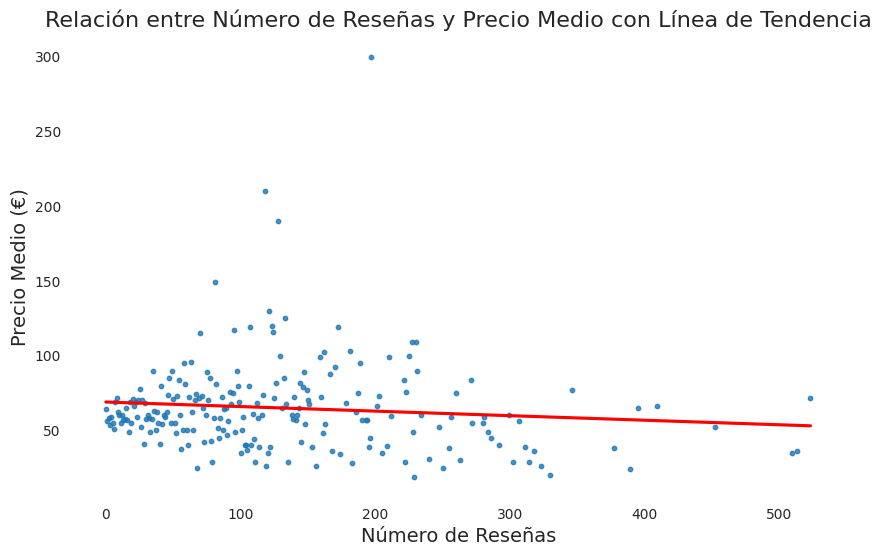

In [ ]:
# Configuramos del estilo del gráfico
sns.set_style("white")

# Creamos el gráfico de línea con un ajuste de regresión:
plt.figure(figsize=(10, 6))

# Línea de regresión
sns.regplot(x='number_of_reviews', y='median_price', data=Reviews_M_df,
            scatter_kws={'s':10}, line_kws={"color":"red"}, ci=None)

# Añadimos las etiquetas del gráfico
plt.title('Relación entre Número de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Quitamos los bordes del grafico ejes actuales
ax = plt.gca()

# Eliminar los spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


*   Puntuación de Reviews

In [ ]:
#Hacemos una media para ver si cuanto mejor es la reseña, más alto es el precio del apartamento
reviews_M_2_df = df_clean_madrid.groupby('review_scores_rating').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_reviews_M_2 = reviews_M_2_df['review_scores_rating'].corr(reviews_M_2_df['median_price'])
print(f"Coeficiente de correlación: {correlation_reviews_M_2:.2f}")

Coeficiente de correlación: -0.21


También hay una baja correlación entre la puntuación del alojamiento y el precio.

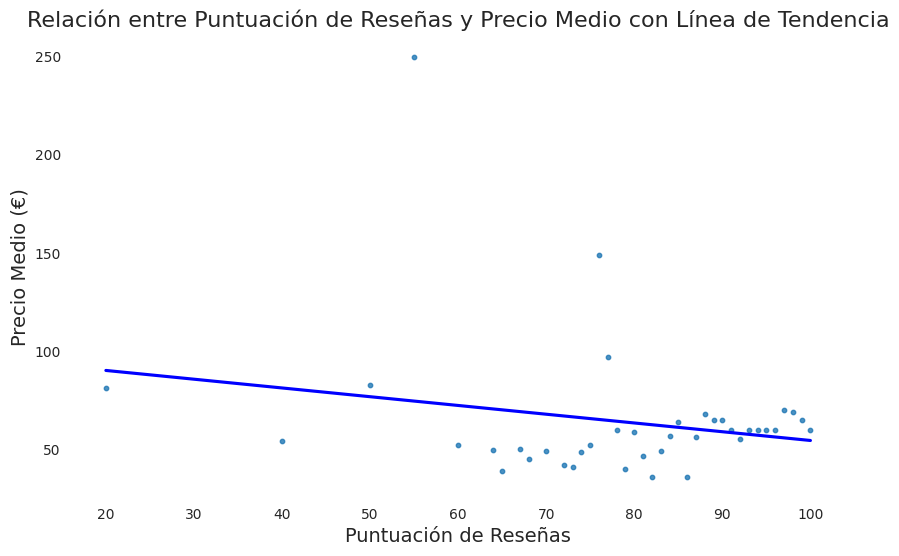

In [ ]:
# Configuramos del estilo del gráfico
sns.set_style("white")
# Crear el gráfico de línea con un ajuste de regresión (regplot)
plt.figure(figsize=(10, 6))

# Graficar línea de regresión
sns.regplot(x='review_scores_rating', y='median_price', data=reviews_M_2_df,
            scatter_kws={'s':10}, line_kws={"color":"blue"}, ci=None)

# Etiquetas del gráfico
plt.title('Relación entre Puntuación de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Puntuación de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Quitamos los bordes del grafico ejes actuales
ax = plt.gca()

# Eliminar los spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Llamativo que los alojamientos con mejores opiniones tengan precios más bajos en Madrid, esto podría explicarse debido a que pesa la valoración calidad/precio.

##6.Analisis de Ocupación.

In [ ]:
# Creamos las nuevas columnas calculando el % de ocupación a partir de la disponibilidad de los apartamentos.

df_clean_madrid['%ocupacion_30'] = ((30 - df_clean_madrid['availability_30']) / 30 * 100).round(2)
df_clean_madrid['%ocupacion_60'] = ((60 - df_clean_madrid['availability_60']) / 60 * 100).round(2)
df_clean_madrid['%ocupacion_90'] = ((90 - df_clean_madrid['availability_90']) / 90 * 100).round(2)
df_clean_madrid['%ocupacion_365'] = ((365 - df_clean_madrid['availability_365']) / 365 * 100).round(2)

# Mostramos un ejemplo:
df_clean_madrid.sample(3)

apartment_id                                                name  \
2262      19842111  Habitación en el centro de madrid. Buena ubicacion   
8952      24514996  Bonito y cómodo piso exterior en Plaza de Castilla   
6350       8158709     FOMENTO 12 - Charming apartment in Opera Square   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
2262  Habitación privada, situada en una de los mejores barrios madrileños. Arguelles a solo 200 metros del metro de arguelles y la calle Princesa. Con acceso a comercios, bares, restaurantes, tiendas a pocos pasos del corte inglés de princesa. Puedes ir andando a el templo de debot, plaza españa, gran vía, el palacio real, sol y demás lugares turísticos de la zona. Es un barrio tranquilo muy seguro y agradable. Os encantará! Es un piso muy tranquilo, donde podrás estar como en tu casa. Puedes acceder a las zonas comunes y hay flexibilidad de llegada en las noches. No hay servicios de zonas comunes, en el edificio. Dispuesta a resolver dudas. Barrio muy pintoresco lleno de bares, terrazas, discotecas, restaurantes, tiendas, lugares turísticos como el arco del triunfo y el mirador de Moncloa a pocos metros de casa y demás lugares turísticos. Se está en el centro de madrid pero es un barrio tranquilo, acogedor y con buena gente. Zonas de pago para apacar en la calle. Aparcamiento privado en El   
8952                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Es un piso muy soleado con dos habitaciones. Todo exterior. Está al lado de Plaza Castilla, así que está muy bien comunicado con el centro y la zona norte de Madrid. Es una zona tranquila de edificios bajos, con supermercados y parada de metro a tres minutos.   
6350  Airbnb; seasonal rental;<br /><br /><b>The space</b><br />This newly refurbished sunny and silent oasis is centrally located on a quiet street in the charming neighbourhood of Opera, very close to Gran Vía . You'll feel at home here! Before booking, please read the information at the section House Rules<br /><br />The space<br />The apartment is located in a nice old building in a quiet street next to Plaza de Santo Domingo and has just been extensively renovated (everything is brand new). It will be two minutes from the famous Gran Vía and only a few steps from some of the main points of interest in Madrid.<br />It is on the first floor of a building WITHOUT ELEVA

In [ ]:
# Creamos los bloques de ocupación para cada porcentaje de ocupación
df_clean_madrid['ocupacion_bloques_30'] = pd.cut(df_clean_madrid['%ocupacion_30'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_madrid['ocupacion_bloques_60'] = pd.cut(df_clean_madrid['%ocupacion_60'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_madrid['ocupacion_bloques_90'] = pd.cut(df_clean_madrid['%ocupacion_90'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_madrid['ocupacion_bloques_365'] = pd.cut(df_clean_madrid['%ocupacion_365'],
                                                  bins=[0, 25, 50, 75, 100],
                                                  labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

# Contamos el número de alojamientos por cada bloque para cada periodo de ocupación
ocupacion_counts_30 = df_clean_madrid['ocupacion_bloques_30'].value_counts().sort_index().reset_index()
ocupacion_counts_60 = df_clean_madrid['ocupacion_bloques_60'].value_counts().sort_index().reset_index()
ocupacion_counts_90 = df_clean_madrid['ocupacion_bloques_90'].value_counts().sort_index().reset_index()
ocupacion_counts_365 = df_clean_madrid['ocupacion_bloques_365'].value_counts().sort_index().reset_index()

# Renombramos las columnas para mayor claridad
ocupacion_counts_30.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (30 días)']
ocupacion_counts_60.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (60 días)']
ocupacion_counts_90.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (90 días)']
ocupacion_counts_365.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (365 días)']

# Calculamos el porcentaje frente al total para cada periodo
total_30 = ocupacion_counts_30['Cantidad de Alojamientos (30 días)'].sum()
total_60 = ocupacion_counts_60['Cantidad de Alojamientos (60 días)'].sum()
total_90 = ocupacion_counts_90['Cantidad de Alojamientos (90 días)'].sum()
total_365 = ocupacion_counts_365['Cantidad de Alojamientos (365 días)'].sum()

ocupacion_counts_30['Porcentaje (30 días)'] = (ocupacion_counts_30['Cantidad de Alojamientos (30 días)'] / total_30 * 100).round(2)
ocupacion_counts_60['Porcentaje (60 días)'] = (ocupacion_counts_60['Cantidad de Alojamientos (60 días)'] / total_60 * 100).round(2)
ocupacion_counts_90['Porcentaje (90 días)'] = (ocupacion_counts_90['Cantidad de Alojamientos (90 días)'] / total_90 * 100).round(2)
ocupacion_counts_365['Porcentaje (365 días)'] = (ocupacion_counts_365['Cantidad de Alojamientos (365 días)'] / total_365 * 100).round(2)

# Combinamos todos los DataFrames en uno solo para mostrar los resultados en una tabla
ocupacion_summary = pd.concat([ocupacion_counts_30, ocupacion_counts_60['Cantidad de Alojamientos (60 días)'],
                               ocupacion_counts_60['Porcentaje (60 días)'], ocupacion_counts_90['Cantidad de Alojamientos (90 días)'],
                               ocupacion_counts_90['Porcentaje (90 días)'], ocupacion_counts_365['Cantidad de Alojamientos (365 días)'],
                               ocupacion_counts_365['Porcentaje (365 días)']], axis=1)

# Mostramos la tabla con los resultados
ocupacion_summary

Rango de Ocupación  Cantidad de Alojamientos (30 días)  \
0             0%-25%                                 322   
1            25%-50%                                 307   
2            50%-75%                                 302   
3           75%-100%                                1015   

   Porcentaje (30 días)  Cantidad de Alojamientos (60 días)  \
0                 16.55                                 446   
1                 15.78                                 356   
2                 15.52                                 301   
3                 52.16                                 866   

   Porcentaje (60 días)  Cantidad de Alojamientos (90 días)  \
0                 22.65                                 538   
1                 18.08                                 373   
2                 15.29                                 272   
3                 43.98                                 795   

   Porcentaje (90 días)  Cantidad de Alojamientos (365 días)  \
0                 27.20                                  562   
1                 18.86                                  226   
2                 13.75                                  352   
3                 40.19                                  904   

   Porcentaje (365 días)  
0                  27.50  
1                  11.06  
2                  17.22  
3                  44.23

In [ ]:
# Definir la columna de ocupación a usar (cambiar esta variable según sea necesario)
columna_ocupacion_M = input("¿Qué % de ocupación quieres mostrar? Escribe una de las siguientes opciones: %ocupacion_30, %ocupacion_60, %ocupacion_90, %ocupacion_360: ")

# Crear una nueva columna para los bloques de ocupación basada en la columna elegida
df_clean_madrid['ocupacion_bloques'] = pd.cut(df_clean_madrid[columna_ocupacion_M],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

# Creamos el gráfico de barras apiladas diferenciando por distrito y ocupación
fig = px.histogram(
    df_clean_madrid,
    x='neighbourhood_district',  # Eje X para los distritos
    color='ocupacion_bloques',  # Colores basados en los bloques de ocupación
    title=f'Distribución de Alojamientos por Distrito y Bloques de Ocupación ({columna_ocupacion_M})',
    labels={'neighbourhood_district': 'Distrito', 'count': 'Número de Alojamientos', 'ocupacion_bloques': 'Bloque de Ocupación'},
    barmode='stack',  # Barras apiladas
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el diseño de la gráfica
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de Alojamientos',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    width=1500,
    height=600)

# Mostramos la gráfica
fig.show()

¿Qué % de ocupación quieres mostrar? Escribe una de las siguientes opciones: %ocupacion_30, %ocupacion_60, %ocupacion_90, %ocupacion_360: %ocupacion_30


In [ ]:
# Definir los intervalos de precios (clusters)
df_clean_madrid['precio_cluster'] = pd.cut(df_clean_madrid['price'], bins=[0, 50, 100, 150, 200, 500],
                                           labels=['0-50', '50-100', '100-150', '150-200', '200-500'])

# Agrupar por los clusters de precios y calcular la ocupación promedio
ocupacion_por_precio = df_clean_madrid.groupby('precio_cluster').agg(
    ocupacion_media_30 = ('%ocupacion_30', 'mean'),
    ocupacion_media_60 = ('%ocupacion_60', 'mean'),
    ocupacion_media_90 = ('%ocupacion_90', 'mean'),
    ocupacion_media_365 = ('%ocupacion_365', 'mean'),
    numero_alojamientos = ('apartment_id', 'count')).reset_index()

# Redondear los valores a 2 decimales después de calcular
ocupacion_por_precio[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']] = ocupacion_por_precio[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']].round(2)

# Mostrar el DataFrame resultante
print(tabulate(ocupacion_por_precio, headers='keys', tablefmt='pretty'))


+---+----------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|   | precio_cluster | ocupacion_media_30 | ocupacion_media_60 | ocupacion_media_90 | ocupacion_media_365 | numero_alojamientos |
+---+----------------+--------------------+--------------------+--------------------+---------------------+---------------------+
| 0 |      0-50      |       65.26        |       60.43        |       57.46        |        59.31        |         897         |
| 1 |     50-100     |       61.78        |       56.14        |       52.07        |        55.0         |         830         |
| 2 |    100-150     |       53.01        |       47.88        |       43.24        |        46.36        |         239         |
| 3 |    150-200     |       53.44        |       46.04        |       41.63        |        47.06        |         90          |
| 4 |    200-500     |       47.61        |       44.65        |       40.65        |     

In [ ]:
# Creamos el gráfico de burbujas para cada ocupación.
fig = px.scatter(
    ocupacion_por_precio,
    x='precio_cluster',
    y='ocupacion_media_30',
    size='numero_alojamientos',
    color='ocupacion_media_30',
    hover_name='precio_cluster',
    size_max=50,
    color_continuous_scale=px.colors.sequential.RdBu)

# Añadimos brubujas para cada ocupación.
for ocupacion in ['ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']:
    fig.add_scatter(
        x=ocupacion_por_precio['precio_cluster'],
        y=ocupacion_por_precio[ocupacion],
        mode='markers',
        marker=dict(size=ocupacion_por_precio['numero_alojamientos'], sizemode='area'),
        name=ocupacion)

# Personalizamos el gráfico.
fig.update_layout(
    title='Ocupación Media y Número de Alojamientos por Rango de Precios Madrid',
    xaxis_title='Rango de Precios',
    yaxis_title='Ocupación Media (%)',
    width=1500,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True,
    legend=dict(
        title='Ocupación Media',
        orientation="v",  # Leyenda vertical
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    coloraxis_colorbar=dict(
        title="Ocupación (%)",
        tickvals=[0, 25, 50, 75, 100],  # Ajusto los valores según la escala
        len=0.7,))  # Altura de la barra de colores
fig.show()

Podemos apreciar que ha precios mayores e 100€ la ocupación se reduce considerablemente.

#EDA BARCELONA


## 1.Preparación del DF de Barcelona.

In [ ]:
#Filtramos el Data Frame de la ciudad objeto de estudio: Barcelona
df['city'] = df['city'].str.lower()
df_barcelona = df[df['city'] == 'barcelona']
df_barcelona.sample(2)

apartment_id                               md5  \
2002       6269523  1d8b91638a108e07fcca539183402001   
5802      38506767  806bbfbb666688ed0d5741e47a18e53e   

                                  name  \
2002  Mirror's room on Plaza Catalunya   
5802               Central double room   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
2002  Yes, it is for (Website hidden by Airbnb) of the walls in this room is only mirrors, so you can watch yourself all day.:)It's very big room in vintage style with small,romantic terase with view to the street. You will live in the most living street in Barcelona, but the nights in our flat are very nice and (Website hidden by Airbnb) a little oasis in the crazy heart of Barcelona. :)) We wish that each of our guess feel home that's why we will be flexible and helpfull as much as we can we.  We are sharing the living room , the kitchen and the bathroom.  In the kitchen have space in the fridge , reservated for our guests.  In the bathroom , travelers will find shampoo and hair dryer.  Sheets and towel are included. We love to meet people and have friends from every country in the world.We like get to know tradicions and cousine from different cultures, that's why we like to share moments with our guests,making dinners or bbq on the terase :) And off course always available to give advise   
5802                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       NaN   

        host_id  \
2002   31799569   
5802  293622964   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         neighborhood_overview  \
2002  Our neighborhood is very nice and interesting,because it is just on L

## 2.Limpieza de datos.

In [ ]:
# Mostramos la informacion que el data frame tiene de Barcelona.
df_barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2825 entries, 1 to 9998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 2825 non-null   int64  
 1   md5                          2825 non-null   object 
 2   name                         2824 non-null   object 
 3   description                  2797 non-null   object 
 4   host_id                      2825 non-null   int64  
 5   neighborhood_overview        1773 non-null   object 
 6   neighbourhood_name           2825 non-null   object 
 7   neighbourhood_district       2825 non-null   object 
 8   latitude                     2825 non-null   object 
 9   longitude                    2825 non-null   object 
 10  room_type                    2824 non-null   object 
 11  accommodates                 2825 non-null   int64  
 12  bathrooms                    2756 non-null   float64
 13  bedrooms               

### 2.1 Análisis de duplicados.

In [ ]:
# Se determinan cuantos valores únicos hay en el data set de Barcelona. Se entiende que apartment_id es el codigo identificativo del apartamento.
unicos= df_barcelona["apartment_id"].nunique()

# Los duplicados se calculan mediante la diferencia entre numero de filas de datos menos los únicos:
duplicados = df_barcelona.shape[0] - df_barcelona["apartment_id"].nunique()

# Mostrar el resultado con la cantidad de alojamientos duplicados
print(f'En el DataFrame de Barcelona hay {unicos} apartment_id únicos y {duplicados} apartment_id duplicados.')

En el DataFrame de Barcelona hay 2719 apartment_id únicos y 106 apartment_id duplicados.


In [ ]:
# Filtramos y ordenamos duplicados de 'apartment_id'
duplicados = df_barcelona[df_barcelona.duplicated('apartment_id', keep=False)].sort_values('apartment_id')

# Mostrar los duplicados
display(duplicados)

apartment_id                               md5  \
9231        144471  de6ada54d9c6a59b912e02022ef28e5d   
5012        144471  de6ada54d9c6a59b912e02022ef28e5d   
6159        343864  75e2a9d18daef8003f4a15583cd8557f   
7125        343864  75e2a9d18daef8003f4a15583cd8557f   
2978       1097523  fc67cee38b42772d43f9343809646412   
...            ...                               ...   
900       36897820  519f3a6e639e8c966dc4b68cbadf92c8   
634       40906570  f4961e3f06fd781ec1f2aa425e485fe7   
8446      40906570  f4961e3f06fd781ec1f2aa425e485fe7   
7187      42887774  6fc7d989ad460f075558d058dc0dc1bf   
2947      42887774  6fc7d989ad460f075558d058dc0dc1bf   

                                                 name  \
9231  ★BEST ZONE★PL.CATALUÑA ★ROOM X 2★BATHROOM +WIFI   
5012  ★BEST ZONE★PL.CATALUÑA ★ROOM X 2★BATHROOM +WIFI   
6159                  3 BD APT IN THE HEART OF GRACIA   
7125                  3 BD APT IN THE HEART OF GRACIA   
2978   AMAZING ATTIC WITH PRIVATE TERRACE NEAR CENTRE   
...                                               ...   
900         Nice and private room in a great location   
634                       Super cozy city center loft   
8446                      Super cozy city center loft   
7187                       Barcelona Home with a View   
2947                       Barcelona Home with a View   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
9231  HELLO PEOPLE :=)  are you on vacation? or business? Perhaps a student? or just passing through ..! is just what you need ..! =) I' renting a room per days, weeks or monthly Rent a quiet and comfortable rooms in a beautifully renovated apartment. ROOMS DESCRIPTIONS: ROOM #1 It is a double room with a double bed and closet ideal for relaxing after a long day! In summer could has different price, depend of the season or week events in BCN. The most important thing!!! the flat is my home, I'm opening the doors of my home for you, please take care of it as yours, keep everything clean and respect the place.   Only one rule we have, DRUNK PEOPLE ARE NOT ALLOWED IN MY HOME, PLEASE!! THANKS!! if you are the person who like drink and drink without any control until get sick, this is not your place!! sorry!! ;D EXTRA SERVICES:  Kitchen not available for cooking * refrigerator use and microwave are free. FREE SERVICES FROM THE HOST:- WiFi, Fresh water bottle. - Cookies for breakfast. - Calls fixe   
5012  HELLO PEOPLE :=)  are you on vacation? or business? Perhaps a student? or just passing through ..! is just what you need ..! =) I' renting a room per days, weeks or monthly Rent a quiet and comfortable rooms in a beautifully renovated apartment. ROOMS DESCRIPTIONS: ROOM #1 It is a double room with a double bed and closet ideal for relaxing after a long day! In summer could has different price, depend of the season or week events in BCN. The most important thing!!! the flat is my home, I'm opening the doors of my home for you, please take care of it as yours, keep everything clean and respect the place.   Only one r

### 2.2 Tratamiento de nulos.

In [ ]:
#Comprobamos cuantos nulos tenemos por columna el data frame de Barcelona.
df_barcelona.isnull().sum().sort_values(ascending=False)

license                        1486
neighborhood_overview          1052
review_scores_location          664
review_scores_value             664
review_scores_checkin           663
review_scores_accuracy          662
review_scores_cleanliness       660
review_scores_communication     660
review_scores_rating            658
last_review_date                629
reviews_per_month               627
first_review_date               627
has_availability                424
bathrooms                        69
price                            50
description                      28
beds                             18
bedrooms                         15
room_type                         1
name                              1
is_instant_bookable               0
country                           0
city                              0
apartment_id                      0
availability_30                   0
number_of_reviews                 0
availability_365                  0
availability_90                   0
availability_60                   0
md5                               0
maximum_nights                    0
minimum_nights                    0
amenities_list                    0
accommodates                      0
longitude                         0
latitude                          0
neighbourhood_district            0
neighbourhood_name                0
host_id                           0
insert_date                       0
dtype: int64

In [ ]:
# Filtramos el DataFrame para obtener los nulos
nulos_por_columna_B = df_barcelona.isnull().sum().sort_values(ascending=False)
porcentaje_nulos_B = (nulos_por_columna_B / len(df_barcelona)) * 100

# Creamos un nuevo DataFrame para la gráfica de barras:
nulos_Barcelona_df = pd.DataFrame({'Columna': nulos_por_columna_B.index, 'Nulos': nulos_por_columna_B.values, 'Porcentaje': porcentaje_nulos_B.values})

#Filtamos para solo mostrar las columnas con nulos:
nulos_Barcelona_df = nulos_Barcelona_df[nulos_Barcelona_df['Nulos'] > 0]

# Creamos la gráfica
fig3 = px.bar(nulos_Barcelona_df, x='Columna', y='Nulos',
             color ='Nulos',
             title ='Representación del Numero de Nulos',
             labels = {'Columna': 'Columnas del Data', 'Nulos': 'Número de Nulos'},
             color_continuous_scale = px.colors.sequential.RdBu,
             hover_data = {'Porcentaje': ':.2f'})  # Añadimos el porcentaje a las etiquetas emergentes

# Personalizando el diseño del gráfico
fig3.update_layout(
    xaxis_title = 'Columnas de Data Frame',
    yaxis_title = 'Numero de nulos por columna',
    showlegend = False,  # Oculta la leyenda ya que no es necesaria
    width = 1400,  # Ajusto el ancho del gráfico
    height = 750,   # Ajusto la altura del gráfico
    plot_bgcolor = 'rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor = 'rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostramos la gráfica
fig3.show();

Solo representan un 1,8% de los datos en cuanto al precio

### 2.3 Eliminación de columnas no necesarias.

Quitamos las columnas de apartment_id y host_id en el punto 3.Analisis de correlaciones con el precio:

In [ ]:
# Seleccionamos solo las columnas numéricas del DataFrame
df_barcelona_numericas = df_barcelona.select_dtypes(include=['number'])
df_barcelona_numericas = df_barcelona_numericas.drop(columns=['apartment_id','host_id'])


### 2.4 Análisis de Outlayers.

In [ ]:
# Gráfico de distribución para cada variable numérica:


# Creamos la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))  # Ajustamos el tamaño

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un histograma para cada variable numérica
for i, column in enumerate(df_barcelona_numericas.columns):
    sns.histplot(df_barcelona_numericas[column], kde=True, ax=axes[i], color="royalblue", alpha=0.5)
    axes[i].set_title(column, fontsize=12, fontweight="bold")

# Eliminamos gráficos vacíos (si es que los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico
plt.show()

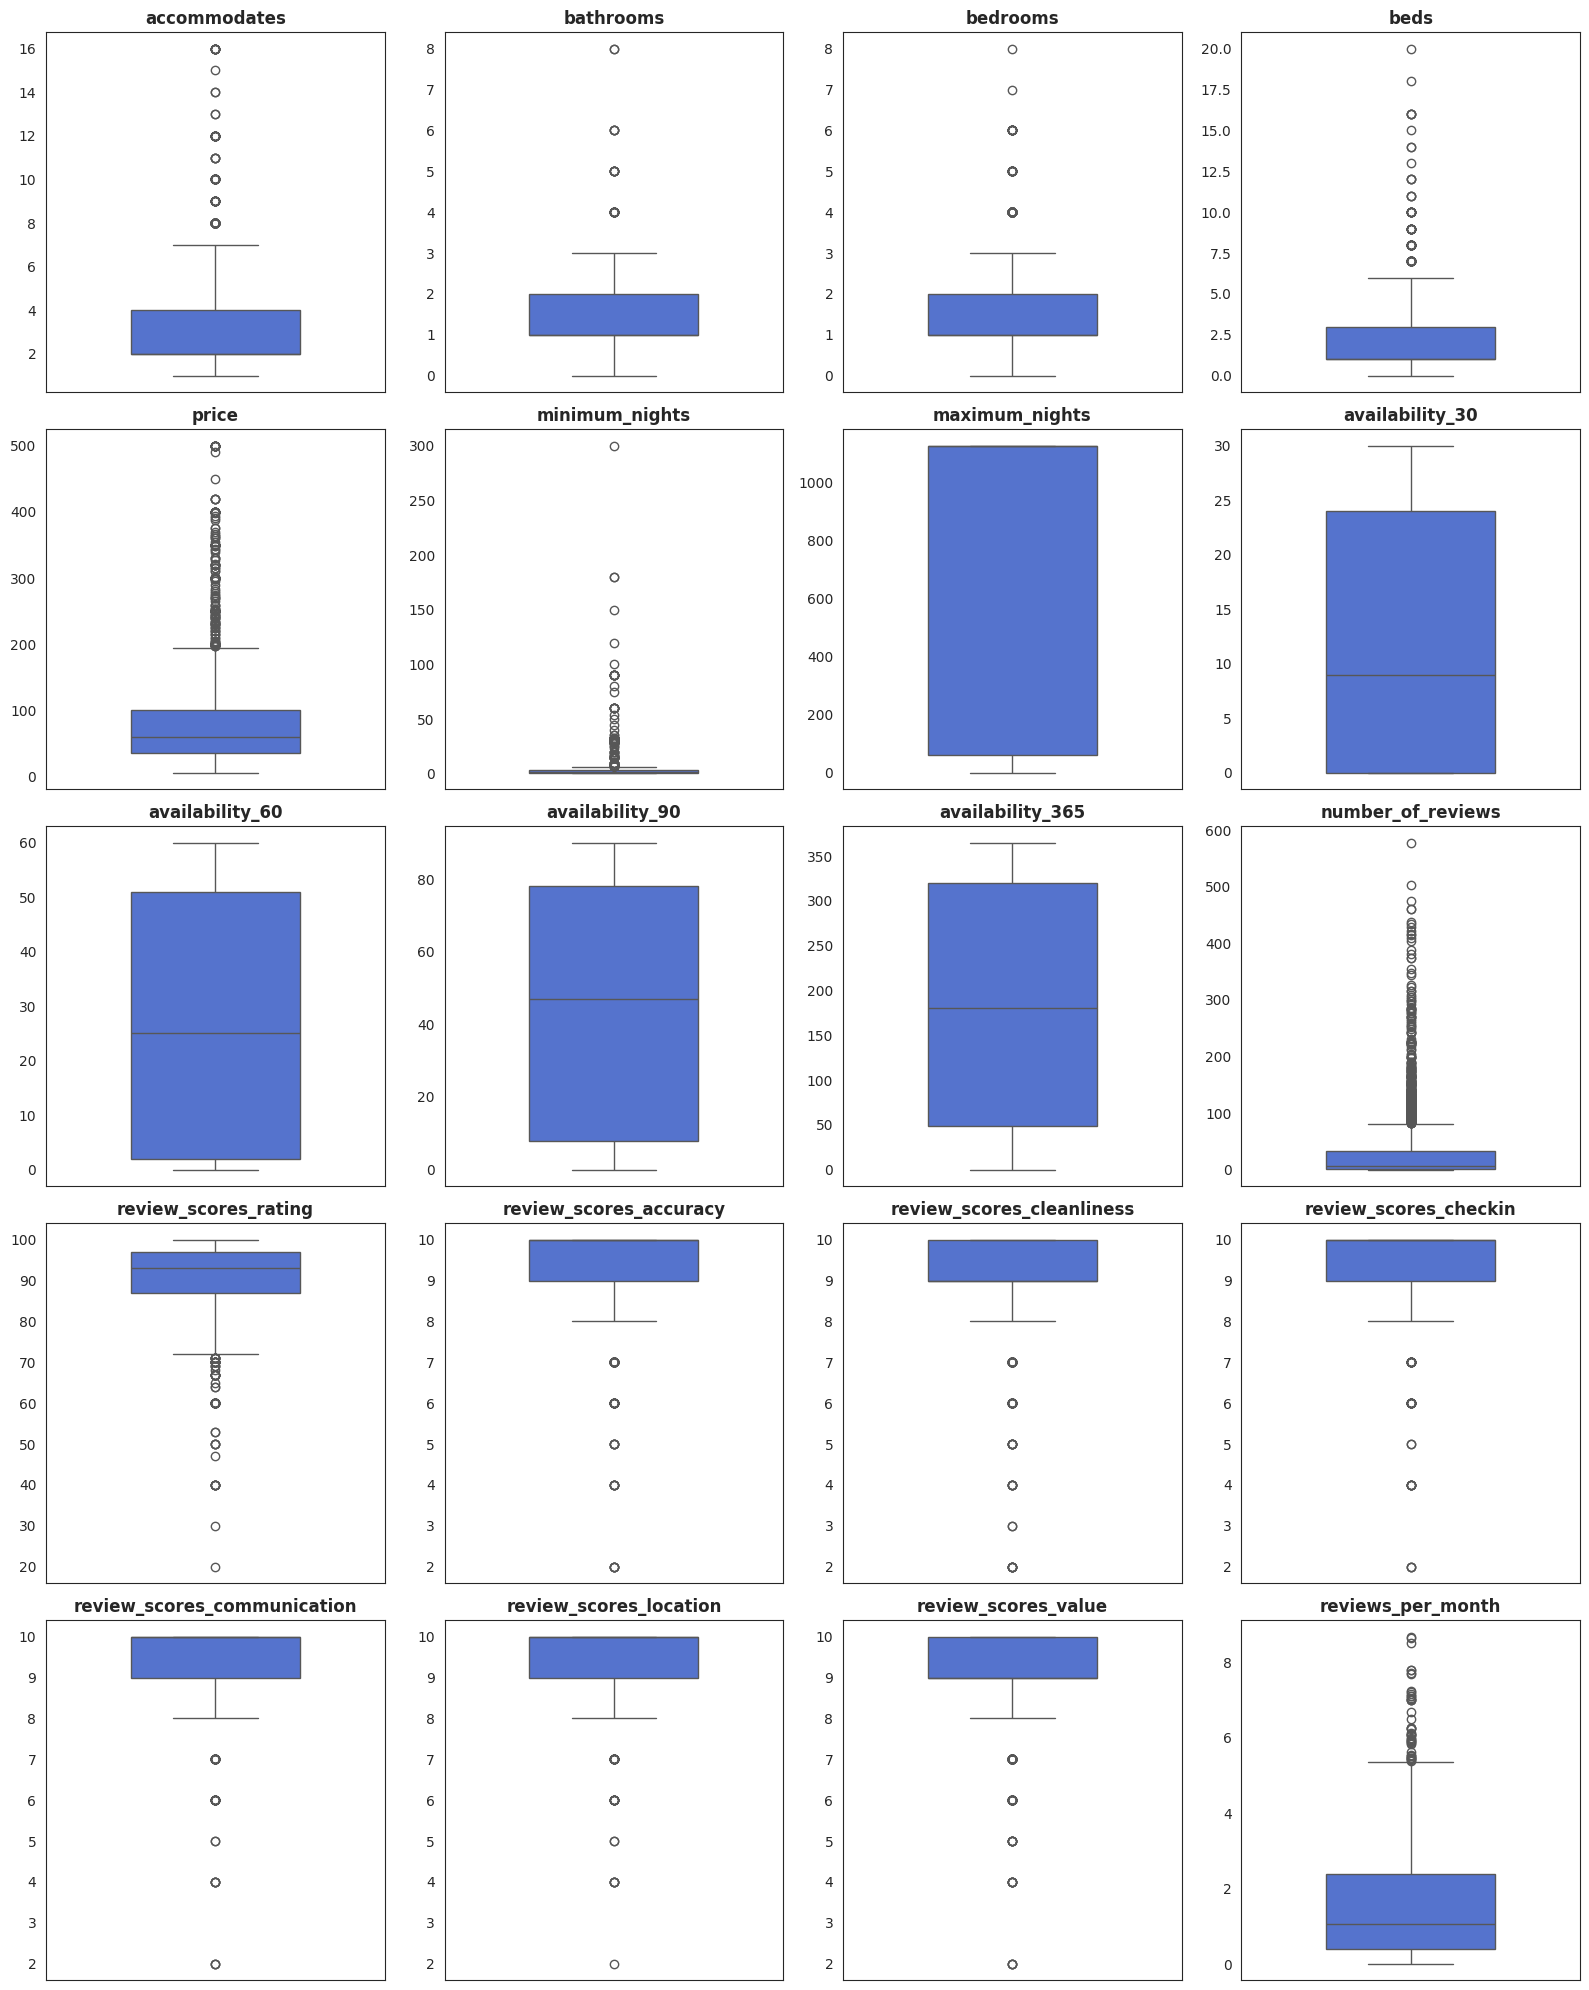

In [ ]:
# Gráfico de bigotes para cada variable numérica

# Determinamos el número de variables numéricas
num_vars_B = df_barcelona_numericas.shape[1]

# Gráfico de bigotes para cada variable numérica

# Creamos la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))  # Ajustamos el tamaño

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un box plot para cada variable numérica
for i, column in enumerate(df_barcelona_numericas.columns):
    sns.boxplot(data=df_barcelona_numericas[column], ax=axes[i], color="royalblue", width=0.5)  # Ajustamos el ancho
    axes[i].set_title(column, fontsize=12, fontweight="bold")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminamos gráficos vacíos (si es que los hay)
for j in range(num_vars, len(axes)):  # Cambié `i + 1` por `num_vars`
    fig.delaxes(axes[j])  # Eliminar los ejes vacíos

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico
plt.show()

In [ ]:
# Definimos las columnas que queremos analizar
columnas = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights']

# Creamos una lista para almacenar los resultados
resultados_outliers_B = []

# Iteramos sobre las columnas
for col in columnas:
    # Calculamos el IQR para la columna
    IQR_B = df_barcelona_numericas[col].quantile(0.75) - df_barcelona_numericas[col].quantile(0.25)

    # Calculamos la mediana para la columna
    mediana_B = df_barcelona_numericas[col].median()

    # Calculamos el límite superior para los outliers usando la mediana
    outlier_limite_B = mediana_B + 1.5 * IQR_B.round(2)

    # Contamos los outliers superiores
    outliers_count_B = df_barcelona_numericas[df_barcelona_numericas[col] > outlier_limite_B][col].count()

    # Total de datos en la columna
    total_count_B = df_barcelona_numericas[col].count()  # Usamos .count() para no contar nulos

    # Calculamos el porcentaje de outliers y lo redondeamos a 2 decimales
    outliers_porcentaje_B = round((outliers_count_B / total_count_B) * 100, 2)

    # Añadimos los resultados a la lista
    resultados_outliers_B.append({
        'Columna': col,
        'Mediana': mediana_B,
        'IQR': IQR_B,
        'Outliers': outlier_limite_B,
        'Num_outliers': outliers_count_B,
        'Porcentaje_outliers': outliers_porcentaje_B})

# Convertimos la lista de diccionarios en un DataFrame
df_resultados_outliers_B = pd.DataFrame(resultados_outliers_B)

# Mostramos el DataFrame con los resultados
df_resultados_outliers_B.head(6)

Columna  Mediana   IQR  Outliers  Num_outliers  Porcentaje_outliers
0    accommodates      2.0   2.0       5.0           441                15.61
1       bathrooms      1.0   1.0       2.5           103                 3.74
2        bedrooms      1.0   1.0       2.5           418                14.88
3            beds      1.0   2.0       4.0           280                 9.98
4           price     60.0  65.0     157.5           308                11.10
5  minimum_nights      2.0   2.0       5.0           468                16.57

Vamos a determinar el IQR para filtrar automáticamente los outliers. Resulta típico establecer un parámetro de filtrado, igual a 1.5 y filtrar todos aquellos valores que queden por encima de la mediana más dicho valor por el rango intercuartílico

Representamos el precio en un gráfico interactivo al ser la variable central, para ayudarnos a visualizar y consultar precios:

In [ ]:
#Diagrama de bigotes del precio de Barcelona:

fig = px.box(df_barcelona_numericas, x='price',
                 title='Distribución del Precio',
                 labels={'price': 'Precio (€)'},
                 color_discrete_sequence=['royalblue'],
                 width=1300,
                 height=500)

# Personalizamos el gráfico
fig.update_layout(
    yaxis_title='Precio (€)',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior (papel) transparente


# Mostramos la gráfica
fig.show()

PRECIO:



In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_precio_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'price', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outliers_precio_B = df_barcelona[df_barcelona['price'] > limite_superior_precio_B]

df_outliers_precio_B.sample(2)

apartment_id                               md5  \
877        4525021  ece4c1c38864ff36ee3e31b4e18cbec1   
4036       1068919  5d1095b914ee5df7bea85ee2d497daf2   

                                                  name  \
877   The Urban Suites - Bright apartment with balcony   
4036                    Apartment La Rambla 5 Bedrooms   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
877                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Two bedrooms apartment with balcony 1 Suite with a double bedroom and bathroom, 1 twin bedroom, 1 bath on the corredor and a living room with a sofa bed for 2 . Fully equipped kitchen .  Private terrace with 2 hamacas and a dining table for  6 300m to Sants Station and Plaza España Pets allowed Small dogs (up to 5 kg) The Urban Suites accepts cats This hotel accepts one pet per room Additional charge to stay with pets: FREE Pet admits on request    
4036  We are The Vintage rentals,  a boutique apartments (visit our site for more info) founded with a clear purpose: to be fully dedicated to represent Barcelona through a distinctive and delightful lodging experience.  We are the ones that believe in travel as an exploration, as an opportunity for new discoveries.  We believe that every trip is a new opportunity to explore things differently, while still feeling at home. This beautiful and stylish apartment is perfect for a family, couples or a small group of friends, being able to comfortably fit up to 12 people. The beautiful antique building where it is located, along with the high ceiling, wooden floors, modern decoration and natural light create the perfect atmosphere.  The apartment has five rooms , all beautifully decorated and equipped with comfortable and cosy beds. In the living room there is a double sofa-bed that can comfortably fit two more people.  The apartment also  has a fully equiped kitchen - including kitchen supplies,    

      host_id  \
877   3346610   
4036  1369675   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

HUESPEDES:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_accom_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'accommodates', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_accom_B = df_barcelona[df_barcelona['accommodates'] > limite_superior_accom_B]

df_outlayers_accom_B.sample(3)


apartment_id                               md5  \
2303      22351337  b4e7cc54dbaf9c6b9f78b078b95f362c   
8273      37510111  b0fc5b4a3d12f66ffcb26e4663855562   
6378      45897806  fe7a795fb63b1f46f6558b9b0419dec6   

                                                    name  \
2303        Unforgettable accomodation in a Luxury yacht   
8273                           Sunny Flat near the beach   
6378  Luxury Surf House Beautiful Bright @Gothic Quarter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
2303  Within her 16 meter length, luxury and design merge with Barcelona Skyline and she seems to be an integral part of the surrounding environment. She counts with a friendly and expert captain, who takes care of every detail. On the upper deck you can find a bbq ready to cook fresh fish. She also counts with spacious interiors, such as a master cabin featured with double bed, sofa and en suite restroom and two additional cabin with double bed. She is filled out with luxurious amenities, such as a grill to cook fresh food at her interior, a swift dinghy and water toys.  The front deck is perfect to sunbathe and enjoy Barcelonian vibes; while the back is perfect to have dinner in the comfortable table and sofa area and jump to the weather with security and style. In the upper deck you will also find an ice maker and a large sofa, together with a table and thanks to a couple of chairs, up to eight people can cozily spend time together. If you want to complete your experience on board and you   
8273                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Comfortabe flat near the beach   
6378                                                                                                                                                                Hi everyone. <br />I am delighted to welcome you to my beautiful apartment.<br /><br />The apartment is ideal for families/couples who are looking to stay in the best quarter of Barcelona while enjoying a luxury stay. <br /><br />It's located in the Gothic, 5 min away walking from the beach, 3' from Barceloneta and Borne quarter, and the main t

BAÑOS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bath_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'bathrooms', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_bath_B = df_barcelona[df_barcelona['bathrooms'] > limite_superior_bath_B]

df_outlayers_bath_B.sample(3)

apartment_id                               md5  \
8525      35135727  0e081fef69a6cac08304ce143410cc7d   
4692      17211611  faa64208def1a070d507a254596616ec   
8097      34708362  b126ea72cb5a81c29125ca141d5871b1   

                                                   name  \
8525        Hola Hostal Eixample. Bed in 16 female dorm   
4692                    Luxury Motor Yacht in Port Vell   
8097  chs1234a LARGE GROUPFLAT RAMBLAS - FIRA BARCELONA   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
8525  Nice & Lively Hostel in Barcelona, spacious dormitory at the Hola Eixample hostel features bright modern décor and individual storage lockers. Sheets and blankets are included, while towels are available to rent. We have also a bar open all days. Tetuan L2 and Girona L4  Metro Stations are both a 5-minute walk from the hostel. Hola Hostal Eixample is a 15-minute walk from Plaza Catalunya. It offers a sun terrace, a private bar, a 24-hour reception and elegant rooms with air conditioning and free Wi-Fi. Barcelona Nord Bus Station is 500 meters away. The shared rooms at the Hola Eixample hostel are spacious and feature modern, cheerful décor and individual lockers. Sheets and blankets are included and towels can be rented. Some rooms have a private bathroom. Hola Hostal Eixample is just a 10-minute walk from the Born district, where you will find charming shops, bars and restaurants, and 15 minutes from the Sagrada Familia and Ciutadella Park. We have different types of bedrooms with var   
4692  New listing- Professionally crewed motor yacht available for long weekends and special events, minimum three day stay, some exceptions. Five star service meets you in the best located marina in Barcelona. Stay connected with high speed Internet and satellite television. Parking is extra but available. Any events held aboard the yacht require pre-approval and and additional security deposit is required based on the number of guests. Access to site has 24/7 security. All guests have the access to wellness centre facilities which includes a gym featuring the latest equipment. Personal training service is available. The yacht is professionally employed with a full time crew. We offer five star services and can assist clients with special requests such as restaurant reservations, dry cleaning and other concierge studies. Breakfast service is included. We can provide a professional chef for lunch and business dinners. Bordering Gothic and El Born, the vessel is located within a 25 minute car   
8097  chs1234a LARGE GROUPFLAT RAMBLAS - FIRA BARCELONA!<br />Beautiful bright and sunny spacious group of four 2 bedroom "ACOMODIS" apartments with 2 bathrooms each located in central Barcelona, at only a few steps of Las Ramblas in a very nice neighbourhood. It's a perfect location in the city!<br /><br /><b>The space</b><br />Welcome to our "ACOMODIS" apartments in Barcelona!<br /><br />IDEAL QUIET LOCATION IN THE CENTER OF BARCELONA CLOSE TO LAS RAMBLAS<br /><br />*Price depending on the number of nights,

HABITACIONES:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bedr_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'bedrooms', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_bedr_B = df_barcelona[df_barcelona['bedrooms'] > limite_superior_bedr_B]

df_outlayers_bedr_B.sample(2)


apartment_id                               md5  \
4654      25387196  e9e9d1476bbe0cd698763139e1ce3dc7   
1614       6844528  a10de3b334d5f9eb31a383da8ff46d24   

                             name  \
4654  Apartment Sagrada Familia 3   
1614                   CLASSY BCN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
4654  The ideal place to spend an enjoyable stay, this contemporary apartment features excellent equipment and a wonderful location. The apartment is located less than 250m from the famous Sagrada Familia and from excellent public transport connections.<br /><br /><b>The space</b><br />The 66m2 apartment can accommodate up to 6 people and is situated on the third floor of a building in the Eixample district with a lift. The living room come dining room is spacious and features access to a balcony where you can enjoy the Mediterranean climate and the beautiful views whilst having a drink. The living room has been decorated in a contemporary and minimalist style and comes equipped with a comfortable sofa where you can relax and watch television, listen to music or connect to the internet using the Wi-Fi connection. For extra comfort the property comes with air conditioning and central heating. The independent kitchen is ideal for preparing a home cooked meal and comes equipped with a microwave   
1614  HUTB-002837. Completely renovated apartment with 3 bedrooms: one bedroom with two individual beds, and the other two rooms with individual beds that can be converted into a double bed (160X200). This apartment is well connected to the rest of the city. HUTB-002837. Recently renovated and fully equipped apartment with 3 bedrooms: one bedroom with two individual beds and two bedrooms with individual beds that can each be converted into double beds. The apartment has a new full bathroom, and a new, large kitchen that is fully equipped with the best and newest appliances. It also has a large and sunny dining room in which we can provide an extra bed if necessary. Moreover, the apartment has WIFI and heating. Its location allows for convenient transport to any part of the city as it is near many metro stations (L1 Mercat Nou, L5 Plaza de Sants) and bust stops. You can travel to Plaza Cataluña in under 12 minutes and Plaza España in under 5 minutes by metro. Furthermore, the apartment is clo   

        host_id  \
4654  191663732   
1614   34915427   

                                                                                                                                                                                                                                                                                                                                                neighborhood_overview  \
4654  In the area surrounding you will find a wide variety of bars, restaurants and shops. The closest metro station (Sagrada Familia, L2) will take you to Paseo de Gracia in just three stops, leaving you in the very centre of Barcelona. This avenue is renowned for its bouti

CAMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_beds_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'beds', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_beds_B = df_barcelona[df_barcelona['beds'] > limite_superior_beds_B]

df_outlayers_beds_B.sample(3)

apartment_id                               md5  \
8713      15357450  97d54ba62f88da820b7e346672415c18   
8073      19978181  f5533abf9655cc2c081c345608a84976   
5134      19193802  0372992581d5a6a68f4a49e484eed966   

                                                                                           name  \
8713                                                                      The Joyce  HUTB001418   
8073  2163 - AB Casa Saltor P-2 - Luxury 3-Bedroom City Centre Apartment with a Private Terrace   
5134                   Cobi apartment. Disfruta de Barcelona desde este fantástico apartamento.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
8713  Stunning 200 m2 has 4 bedroom, 3 bathroom apartment have been decorated with the maximum care for detail while maintaining its original Catalán Architecture such as its mosaic tiles flooring and stained glass windows. Num. Licencia Turistica/Turistic License number: HUTB001418 ***Please note that: I DO NOT HOST STAG/HEN WEEKENDS*** Going above and beyond to ensure that guests have an ultra-luxury service and a unique Barcelona experience. The apartments have 4 bedrooms and it can accommodate up to 8 guests. The master en-suite bedroom comes with a Californian King Size bed, a marble fire place (not functional) and an office space for writing or working. The en-suite bathroom is stylishly finished and has a bathtub, a shower unit and 2 wash basins. The second bedroom has a comfortable Queen size bed and access to the second bathroom which comes with a shower and a bathtub plus 2 wash basins and a toilet. The third and fourth bedrooms each comes with 2 single beds and have access to the    
8073  This luxurious, state of the art apartment is ideally located in the centre of Barcelona, in the Eixample neighbourhood. This area is home to some of Barcelona’s best bars, cafés and restaurants. You can also find some of the city´s top attractions within walking distance, including Gaudí’s Casa Batlló and La Pedrera. Located just a short stroll from the apartment you will find Plaça Catalunya, considered the heart of Barcelona, and the famous shopping street Passeig de Gràcia, as well as the emblematic Las Ramblas street.Guests staying in this apartment will receive free additional services such as a tourist guide to Barcelona, a welcome pack including many discounts on activities in Barcelona, 24/7 reception in the same building and the chance to win some amazing Barcelona experiences in our monthly prize draw such as Flamenco shows, free tapas dinners and so much more!This designer apartment has a total of 3 bedrooms and 2 bathrooms, and can comfortably sleep up to 6 guests, making    
5134                                                                                                                                                                                                                                                                                                                                                              

NOCHES MINIMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_min_B = df_resultados_outliers_B.loc[df_resultados_outliers_B['Columna'] == 'minimum_nights', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_min_B = df_barcelona[df_barcelona['minimum_nights'] > limite_superior_min_B]

df_outlayers_min_B.sample(3)

apartment_id                               md5  \
9584      16306813  87a25c22d6d1d851cae7ea9b80f17f21   
3065      17916039  61e3a0cb9c76d4b5dc2f7fefb377c957   
6264      26800315  9f9fe751cc34206bd193e88fa83fb419   

                                         name  \
9584  Habitación Soleada en Sagrada Familia!!   
3065           360° Petit Penthouse Barcelona   
6264   60 mq flat with kitchen and 2 bathroom   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
9584  Hermoso piso de diseño recientemente reformado, al lado de la Sagrada Familia. Tiene llave en las habitaciones, cama doble y TV en todas las habitaciones y el salón Esta habitación está pensada para estudiantes o jóvenes profesionales. Únicamente aceptamos estancias superiores a 32 noches, en ningún caso aceptamos estancias turísticas. ------- This room is designed for students or young professionals. We only accept stays longer than 32 nights; in no case we accept tourist stays. Magnífico apartamento recién reformado con un proyecto de interiorismo y muebles de diseño en las inmediaciones de la Sagrada Família y del centro comercial y de ocio de Plaça les Glòries. Se trata de un apartamento perfectamente comunicado por las lineas de metro (L1, L2, L5), por tranvía y por autobús, consta de sala de estar con comedor, una cocina totalmente equipada, terraza y baño con ducha. Además, dispone de Aire Acondicionado en las Zonas comunes. Esta habitación está pensada para estudiantes universi   
3065  This flat is the perfect romantic place for young couples, lovers, singles who want to explore Barcelona & still want a phantastic 360° hide-away over the roofs of Born with a maximum of privacy! If 007 were to stay in a flat in el Born, it would be here! This penthouse studio is an incredible example of creative living, offering comfort, form and function in equal measure. For all it's conceptual antics, Le Petit Penthouse has been featured internationally in magazines and on local television. The compact interior with it's clickable cabinetry and pop-up fixtures contrasts splendidly with an expansive roof-top deck with a lounge to lay down. We gonna guide you through the flat on how things work. So dont worry about that! THE FLAT COMES WITH: air condition, 2 terasses, a crazy amazing outdoor bathtub for 2 people with a view to Sagrada Familia and the rest of Barcelona. An exciting outdoor shower to cool down on hot sunny day. Washing machine and dryer, and a very sexy rainforest show   
6264                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 2.5.Coordenadas


In [ ]:
#Quitamos todos los puntos en las columnas 'latitude' y 'longitude':
df_barcelona['latitude_clean'] = df_barcelona['latitude'].str.replace('.', '', regex=False)
df_barcelona['longitude_clean'] = df_barcelona['longitude'].str.replace('.', '', regex=False)

# Convertimos las columnas 'latitude_clean' y 'longitude_clean' a números:
df_barcelona['latitude_clean'] = pd.to_numeric(df_barcelona['latitude_clean'], errors='coerce')
df_barcelona['longitude_clean'] = pd.to_numeric(df_barcelona['longitude_clean'], errors='coerce')

# Transformamos la 'latitude_clean': primeros 2 dígitos para "41," y el resto tras la coma
df_barcelona['latitude_trasfor'] = df_barcelona['latitude_clean'].astype(str).str[:2] + '.' + df_barcelona['latitude_clean'].astype(str).str[2:]

# Transformamos la 'longitude_clean': primer dígito "3," y el resto tras la coma
df_barcelona['longitude_trasfor'] = df_barcelona['longitude_clean'].astype(str).str[:1] + '.' + df_barcelona['longitude_clean'].astype(str).str[2:]

df_barcelona = df_barcelona.drop(columns=['latitude', 'longitude', 'latitude_clean', 'longitude_clean'])

In [ ]:
print(df_barcelona['latitude_trasfor'].dtype)
print(df_barcelona['longitude_trasfor'].dtype)


object
object


In [ ]:
# Convertimos las columnas a tipo float
df_barcelona['latitude_trasfor'] = pd.to_numeric(df_barcelona['latitude_trasfor'], errors='coerce')
df_barcelona['longitude_trasfor'] = pd.to_numeric(df_barcelona['longitude_trasfor'], errors='coerce')

# Verificamos los tipos de datos después de la conversión:
print(df_barcelona['latitude_trasfor'].dtype)
print(df_barcelona['longitude_trasfor'].dtype)

float64
float64


## 3.Analisis de correlaciones con el precio:

In [ ]:
# Selecionamos los valores numericos para realizar una correlacion solo de Madrid:
df_barcelona_numericas = df_barcelona_numericas._get_numeric_data()

df_barcelona_numericas.corr()

accommodates  bathrooms  bedrooms      beds  \
accommodates                     1.000000   0.416813  0.831082  0.880140   
bathrooms                        0.416813   1.000000  0.461335  0.437653   
bedrooms                         0.831082   0.461335  1.000000  0.819332   
beds                             0.880140   0.437653  0.819332  1.000000   
price                            0.612990   0.312038  0.558074  0.565815   
minimum_nights                  -0.024159   0.012951  0.027201 -0.019337   
maximum_nights                   0.078841   0.027822  0.050269  0.054816   
availability_30                  0.034794   0.047953  0.007091  0.038560   
availability_60                  0.053051   0.046029  0.013518  0.048861   
availability_90                  0.064380   0.038349  0.020459  0.054047   
availability_365                 0.213978   0.089584  0.172467  0.208225   
number_of_reviews                0.080798   0.005059  0.049838  0.040322   
review_scores_rating            -0.102649  -0.034884 -0.073155 -0.083691   
review_scores_accuracy          -0.106358  -0.048023 -0.079601 -0.105087   
review_scores_cleanliness       -0.033261  -0.037516  0.004771 -0.019286   
review_scores_checkin           -0.075681  -0.051932 -0.050877 -0.067961   
review_scores_communication     -0.080706  -0.057671 -0.055346 -0.064902   
review_scores_location          -0.063144   0.021559 -0.037948 -0.066261   
review_scores_value             -0.148335  -0.024850 -0.099051 -0.127438   
reviews_per_month               -0.002837  -0.047722 -0.043314 -0.033587   

                                price  minimum_nights  maximum_nights  \
accommodates                 0.612990       -0.024159        0.078841   
bathrooms                    0.312038        0.012951        0.027822   
bedrooms                     0.558074        0.027201        0.050269   
beds                         0.565815       -0.019337        0.054816   
price                        1.000000       -0.072158        0.026898   
minimum_nights              -0.072158        1.000000       -0.011189   
maximum_nights               0.026898       -0.011189        1.000000   
availability_30              0.061180        0.019962        0.025304   
availability_60              0.071501        0.017085        0.035749   
availability_90              0.079899        0.019484        0.044745   
availability_365             0.186369        0.076506        0.099376   
number_of_reviews            0.006454       -0.146554       -0.059196   
review_scores_rating        -0.045841        0.019679       -0.107829   
review_scores_accuracy      -0.046768       -0.002188       -0.092904   
review_scores_cleanliness    0.020229       -0.011338       -0.054470   
review_scores_checkin       -0.064915        0.012685       -0.053059   
review_scores_communication -0.060021        0.004973       -0.080616   
review_scores_location      -0.010688       -0.023084       -0.073802   
review_scores_value         -0.114313       -0.034796       -0.081491   
reviews_per_month           -0.070120       -0.215412        0.014438   

                             availability_30  availability_60  \
accommodates                        0.034794         0.053051   
bathrooms                           0.047953         0.046029   
bedrooms                            0.007091         0.013518   
beds                                0.038560         0.048861   
price                               0.061180         0.071501   
minimum_nights                      0.019962         0.017085   
maximum_nights                      0.025304         0.035749   
availability_30                     1.000000         0.934234   
availability_60                     0.934234         1.000000   
availability_90                     0.865109         0.969166   
availability_365                    0.478099         0.556883   
number_of_reviews                  -0.012814        -0.009041   
review_scores_rating               -0.043059        -

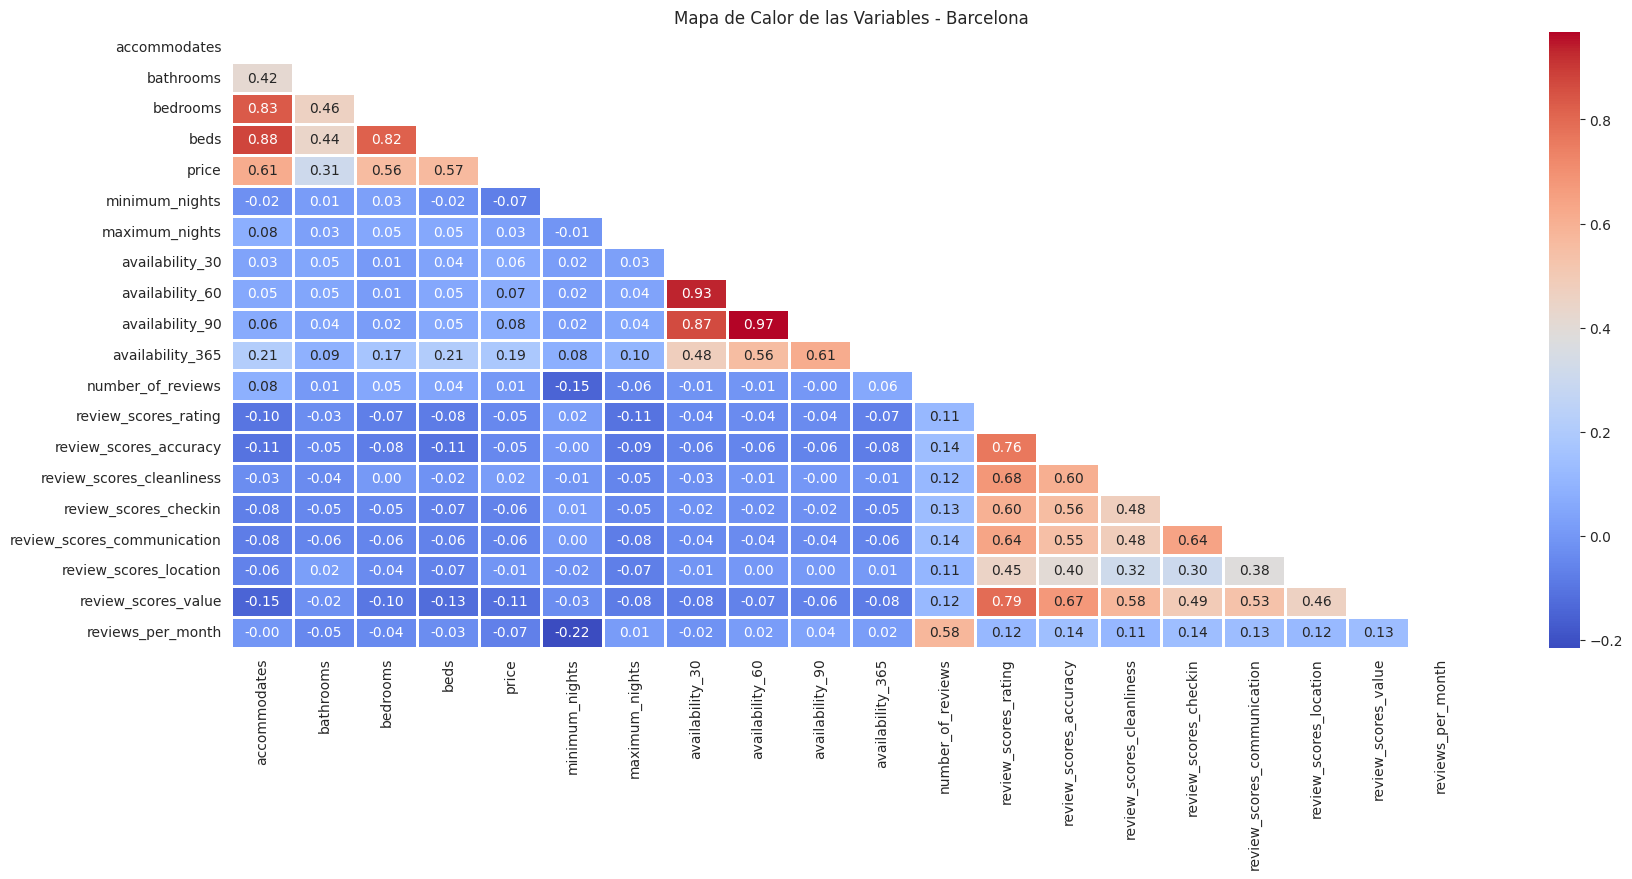

In [ ]:
# se crea una máscara para la parte superior para no duplicar correlaciones:
mask = np.triu(np.ones_like(df_barcelona_numericas.corr(), dtype=bool))

# Heatmap:
plt.figure(figsize=(20, 8))

sns.heatmap(df_barcelona_numericas.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.9)

# Se añade un título al heatmap
plt.title('Mapa de Calor de las Variables - Barcelona')

# Mostramos el gráfico
plt.show();

In [ ]:
# Vamos a calcular las correlaciones con la variable 'price'
Corr_price_barcelona = df_barcelona_numericas.corr()["price"].sort_values(ascending=False).round(2)*100

# Convertimos la serie de correlaciones a un DataFrame
Corr_price_barcelona_df = Corr_price_barcelona.reset_index()
Corr_price_barcelona_df.columns = ['Variable', 'Correlación']

# Gráfico de barras.
fig4 = px.bar(Corr_price_barcelona_df,
             x='Variable',
             y='Correlación',
             color='Correlación',
             title='Correlación de las variables con el Precio',
             labels={'Variable': 'Variable', 'Correlación': 'Correlación (%)'},
             template='plotly',
             text='Correlación',
             color_continuous_scale=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig4.update_layout(
    xaxis_title='Variables del DataFrame',
    yaxis_title='Correlación (%)',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=500,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostrar el gráfico
fig4.show();

## 4.Analisis de las variables categóricas con el precio:

### 4.1.Tipo de habitación.

In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_barcelona'
room_type_counts = df_barcelona['room_type'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig5 = px.bar(room_type_counts,
             x='room_type',
             y='count',
             color='room_type',
             title='Distribución de Tipos de Habitación en Barcelona',
             labels={'room_type': 'Tipo de Habitación', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1000,  # Ajusto el ancho del gráfico
    height=400,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

In [ ]:
#Determinamos la mediana de los precios en función del tipo de apartamento:

from tabulate import tabulate

# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Madrid y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats_B = df_barcelona.groupby('room_type').agg(
    apartments_count_B=('apartment_id', 'count'),
    median_price_B=('price', 'median'),
    mean_price_B=('price', 'mean'),
    mode_price_B=('price', lambda x: x.mode().iloc[0])
).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats_B = room_stats_B.sort_values(by='median_price_B', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats_B, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------------+----------------+--------------+--------------+
|   |    room_type    | apartments_count_B | median_price_B | mean_price_B | mode_price_B |
+---+-----------------+--------------------+----------------+--------------+--------------+
| 1 |   Hotel room    |         22         |     125.5      |    115.89    |    150.0     |
| 0 | Entire home/apt |        1291        |     100.0      |    125.35    |    100.0     |
| 2 |  Private room   |        1479        |      40.0      |     47.1     |     30.0     |
| 3 |   Shared room   |         32         |      34.5      |    45.33     |     25.0     |
+---+-----------------+--------------------+----------------+--------------+--------------+


In [ ]:
# Se crea un gráfico de bigotes:
fig6 = px.box(df_barcelona,
             y="room_type",  # Eje y para las categorías de tipo de habitación
             x="price",      # Eje x para los precios
             color="room_type",
             title="Distribución de precios por tipo de habitación",
             labels={"room_type": "Tipo de Habitación", "price": "Precio"},
             color_discrete_sequence=px.colors.sequential.RdBu)

# Se modifica el diseño para que quede más visual:
fig6.update_layout(
    yaxis_title="Tipo de Habitación",
    xaxis_title="Precio",
    boxmode="group",  # Agrupamos las cajas por tipo de habitación
    title_font_size=24,
    width=1200,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente

# Se muestra el gráfico
fig6.show()

### 4.2.Distrito.

In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_barcelona'
district_type_counts = df_barcelona['neighbourhood_district'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig = px.bar(district_type_counts,
             x='neighbourhood_district',
             y='count',
             color='neighbourhood_district',
             title='Distribución de distritos en Barcelona',
             labels={'neighbourhood_district': 'Distrito', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig.show();

In [ ]:
# Se filtra el DataFrame para obtener el número de alojamientos por districto y calcular el número de apartamentos y el promedio de precios por distrito
district_stats = df_barcelona.groupby('neighbourhood_district').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por distrito
    median_price=('price', 'median'),             # Promedio de precios por distrito
    mean_price=('price', 'mean'),
).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
district_stats = district_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(district_stats, headers='keys', tablefmt='pretty'))

+---+------------------------+------------------+--------------+------------+
|   | neighbourhood_district | apartments_count | median_price | mean_price |
+---+------------------------+------------------+--------------+------------+
| 1 |        Eixample        |       987        |     70.0     |   98.76    |
| 9 |  Sarrià-Sant Gervasi   |       111        |     70.0     |   95.15    |
| 2 |         Gràcia         |       246        |     60.0     |   80.76    |
| 0 |      Ciutat Vella      |       632        |     55.0     |   74.24    |
| 8 |     Sants-Montjuïc     |       305        |     55.0     |   75.21    |
| 4 |       Les Corts        |        62        |     50.0     |   80.92    |
| 7 |       Sant Martí       |       306        |     50.0     |   75.47    |
| 6 |      Sant Andreu       |        36        |     36.5     |   56.14    |
| 3 |     Horta-Guinardó     |        86        |     35.0     |   56.64    |
| 5 |       Nou Barris       |        54        |     29.0     |

In [ ]:
# Creamos el grafico de Bigotes por distrito:
fig3 = px.box(df_barcelona,
              y="price",  # Eje y para las categorías de precios
              x="neighbourhood_district",  # Eje x para los distritos
              color="neighbourhood_district",  # Colorear las cajas por distrito
              title="Distribución de Precios por Distrito de Barcelona",
              labels={"neighbourhood_district": "Distrito", "price": "Precio"},
              color_discrete_sequence=px.colors.sequential.Bluered)

# Se ajusta el diseño para mejorar la visualización
fig3.update_layout(
    yaxis_title="Precio",
    xaxis_title="Distrito",
    boxmode="group",  # Agrupar las cajas por distrito
    title_font_size=24,
    width=2100,  # Ajustar el ancho del gráfico
    height=1200,  # Ajustar la altura del gráfico
    showlegend=False,  # Ocultar la leyenda ya que no es necesaria
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    boxgap=0,  # Aumenta el tamaño de las cajas (reduce el espacio entre ellas)
    boxgroupgap=0,  # Ajusta la separación entre grupos de cajas
    yaxis=dict(
        tickmode='linear',
        title_font_size=15,
        dtick=50,  # Establece los intervalos de las marcas en 50 unidades
        tickangle=0,
        tickfont_size=12),
    xaxis=dict(
        title_font_size=15,
        tickfont_size=12,
        tickangle=0)  # Rotar las etiquetas del eje x
)

# Mostrar el gráfico
fig3.show()

### 4.3.Distrito y tipo de habitación.

In [ ]:
# Se agrupa por distrito y tipo de habitación
price_stats = df_barcelona.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median')             # Calcular el promedio de precios
).round(2).reset_index()

# Se ordenar los resultados alfabeticamente por distrito y tipo de habitación
price_stats = price_stats.sort_values(by=['neighbourhood_district', 'room_type'])

# Se muestran los resultados
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+--------------+
|    | neighbourhood_district |    room_type    | apartments_count | median_price |
+----+------------------------+-----------------+------------------+--------------+
| 0  |      Ciutat Vella      | Entire home/apt |       273        |     85.0     |
| 1  |      Ciutat Vella      |   Hotel room    |        3         |    150.0     |
| 2  |      Ciutat Vella      |  Private room   |       350        |     45.0     |
| 3  |      Ciutat Vella      |   Shared room   |        6         |     31.0     |
| 4  |        Eixample        | Entire home/apt |       512        |    119.0     |
| 5  |        Eixample        |   Hotel room    |        11        |    138.0     |
| 6  |        Eixample        |  Private room   |       459        |     40.0     |
| 7  |        Eixample        |   Shared room   |        5         |     25.0     |
| 8  |         Gràcia         | Entire home/apt |       112        |     95.

In [ ]:
import matplotlib.colors as mcolors #importamos libreria de colores para crear nuestra paleta
# Se filtra y agrupa el DataFrame

price_stats = df_barcelona.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median')              # Calcular el promedio de precios
).reset_index()

# Se crea tabla para el heatmap
pivot_table = price_stats.pivot(index='neighbourhood_district', columns='room_type', values='median_price')

# Paleta de colores personalizada
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['blue', 'yellow', 'orange', 'red'])

# Crear el heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, linewidths=.5)

# Añadir un título al heatmap
plt.title('Mediana de Precios por Tipo de Habitación y Distrito')

# Mostrar el gráfico
plt.show()

In [ ]:
# Se agrupa por distrito y tipo de habitación, y se calculan las métricas necesarias
price_stats_B = df_barcelona.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),    # Contar número de alojamientos
    average_accommodates=('accommodates', 'mean'),  # Calcular el promedio de accommodates
    median_price=('price', 'median'),               # Calcular el promedio de precios
).reset_index()

# Se redondean las columnas numéricas a dos decimales
price_stats_B['median_price'] = price_stats_B['median_price'].round(2)
price_stats_B['average_accommodates'] = price_stats_B['average_accommodates'].round(2)

# Se ordenan los resultados alfabéticamente por distrito y tipo de habitación
price_stats_B = price_stats_B.sort_values(by=['neighbourhood_district', 'room_type'])

# Se muestran los resultados
print(tabulate(price_stats_B, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+----------------------+--------------+
|    | neighbourhood_district |    room_type    | apartments_count | average_accommodates | median_price |
+----+------------------------+-----------------+------------------+----------------------+--------------+
| 0  |      Ciutat Vella      | Entire home/apt |       273        |         4.14         |     85.0     |
| 1  |      Ciutat Vella      |   Hotel room    |        3         |         3.0          |    150.0     |
| 2  |      Ciutat Vella      |  Private room   |       350        |         2.13         |     45.0     |
| 3  |      Ciutat Vella      |   Shared room   |        6         |         2.67         |     31.0     |
| 4  |        Eixample        | Entire home/apt |       512        |         5.18         |    119.0     |
| 5  |        Eixample        |   Hotel room    |        11        |         2.73         |    138.0     |
| 6  |        Eixample        |  Priv

El data de NaN se muestra ya que al solo haber 1 dato de alojamiento no se puede realizar el calculo de la mediana

In [ ]:
# Creamos el gráfico de barras apiladas para la mediana de precios
fig = px.bar(
    price_stats_B,
    x='neighbourhood_district',
    y='median_price',
    color='room_type',
    title='Mediana de Precios por Distrito y Tipo de Habitación Barcelona',
    labels={'neighbourhood_district': 'Distrito', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Distritos por el total de apartamentos
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_tickangle=-45,  # Rotamos etiquetas del eje X
    height=600,
    width=1500)

fig.show()

In [ ]:
# Creamos el gráfico de burbujas
fig = px.scatter(price_stats_B,
    x='neighbourhood_district',  # Eje X: Distrito
    y='median_price',            # Eje Y: Mediana del Precio
    size='average_accommodates',   # Tamaño de la burbuja: Mediana de Accommodates
    color='room_type',            # Color: Tipo de Habitación
    hover_name='neighbourhood_district',  # Mostrar el distrito al pasar el ratón
    size_max= 40,                  # Tamaño máximo de las burbujas
    title='Mediana de Precios y Accommodates por Distrito y Tipo de Habitación',
    labels={
        'neighbourhood_district': 'Distrito',
        'median_price': 'Mediana del Precio (€)',
        'median_accommodates': 'Mediana de Accommodates',
        'room_type': 'Tipo de Habitación'},
     color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    height=600,           # Altura del gráfico
    width=1500,)          # Ancho del gráfico

# Mostrar el gráfico
fig.show()

### 4.4 Amenities

In [ ]:
# Vamos a ir por cada observacion a la columna 'amenities_list', la vamos a separar en 'amenities' y vamos a añadir cada una a la lista amenities_full. Como algunas columnas están mal, las añadimos a la lista 'errores'
errores_B = []
amenities_full_B = []
for i in range(len(df_barcelona)):
    try:
        amenities = df_barcelona['amenities_list'].iloc[i][1:-1].split(',')
        for item in amenities:
            amenities_full_B.append(item)
    except TypeError:
        errores.append(i)

In [ ]:
# Normalizamos y limpiamos la lista de amenidades
amenities_full_B = [item.replace('"','').strip() for item in amenities_full_B]

# Hacemos un diccionario con la tabla de frecuencias de cada servicio:
amenities_count_B = {}
for item in amenities_full_B:
    # Normalizamos el servicio:
    item = item.strip().lower()
    if item not in amenities_count_B:
        amenities_count_B[item] = 1
    else:
        amenities_count_B[item] += 1

# Creamos una lista a partir del diccionario de recuento de servicios
amenities_list_B = list(amenities_count_B.items())

# Ordenamos la lista basada de manera descendente
amenities_list_B.sort(key=lambda item: item[1], reverse=True)

# Creamos un nuevo diccionario a partir de la lista ordenada
amenities_count_B_sorted = {}
for item in amenities_list_B:
    amenities_count_B_sorted[item[0]] = item[1]


# Convertimos el diccionario en un DataFrame
amenities_df_B = pd.DataFrame(list(amenities_count_B_sorted.items()), columns=['Amenity', 'Count'])

# Mostramos los primeros 10 registros
amenities_df_B.head(10)

Amenity  Count
0  essentials   2596
1     kitchen   2493
2      washer   2180
3     hangers   2163
4     heating   2112
5  hair dryer   2060
6        wifi   2000
7          tv   1975
8        iron   1945
9     shampoo   1725

In [ ]:
# Crear el gráfico de barras con Plotly.
fig5 = px.bar(amenities_df_B,
             x='Amenity',
             y='Count',
             color='Amenity',
             title='Número de Servicios',
             labels={'Amenity': 'Tipo de Servicio', 'Count': 'Recuento'},
             template='plotly',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Recuento de los servicios',
    yaxis_title='Sevicios',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=2200,  # Ajusto el ancho del gráfico
    height=700,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

In [ ]:
# Creamos una función para determinar la mediana por servicio usando df_barcelona
def precio_medio_por_amenity_B(amenity):

    # Filtramos el DataFrame df_clean_madrid por servicio
    df_amenities_Barcelona = df_barcelona[df_barcelona['amenities_list_B'].str.contains(amenity, case=False, na=False)]
    return df_amenities_Barcelona['price'].median()

def df_precio_medio_por_amenity_B(df_amenities_B):
    amenities_B = []
    precios_B = []

    # Iteramos sobre cada amenidad en el DataFrame df_amenities
    for amenity in df_amenities_B['Amenity']:
        media_precio = precio_medio_por_amenity(amenity)
        amenities_B.append(amenity)
        precios_B.append(media_precio)

    # Creamos un nuevo DataFrame con los resultados
    precio_medio_amenity_df_B = pd.DataFrame({
        'Amenity_B': amenities_B,
        'Mediana_precio_B': precios_B})
    return precio_medio_amenity_df_B

# Llamamos a la función:
precio_medio_amenity_df_B = df_precio_medio_por_amenity_B(amenities_df_B).round(2)

# Ordeno el DataFrame por la columna 'Mediana_precio' de mayor a menor:
precio_medio_amenity_df_B = precio_medio_amenity_df_B.sort_values(by='Mediana_precio_B', ascending=False)

# Mostramos el DataFrame final
precio_medio_amenity_df_B.head(10)

Amenity_B  Mediana_precio_B
160               terrace             170.0
162       outdoor seating             170.0
149               netflix             170.0
114          toilet paper             151.5
113            bath towel             151.5
169  memory foam mattress             147.0
165     en suite bathroom             147.0
142              smart tv             147.0
134           rain shower             147.0
109      bedroom comforts             133.0

In [ ]:
# Comprobar si hay valores nulos en la columna 'Mediana_precio'
nulos_amenity_price_B = precio_medio_amenity_df_B['Mediana_precio_B'].isnull().sum()

# Mostrar el número de valores nulos
print(f"Número de valores nulos en Mediana de precio por servicio: {nulos_amenity_price_B}")

Número de valores nulos en Mediana de precio por servicio: 44


In [ ]:
# Filtrar el DataFrame para mostrar solo las filas donde 'Mediana_precio' es nulo
nulos_amenity_price_B = precio_medio_amenity_df_B[precio_medio_amenity_df_B['Mediana_precio_B'].isnull()]

# Mostrar el DataFrame filtrado
nulos_amenity_price_B.sample(5)

Amenity_B  Mediana_precio_B
208                              hammock               NaN
207  fixed grab bars for shower & toilet               NaN
164         smooth pathway to front door               NaN
189             drying rack for clothing               NaN
210                          soaking tub               NaN

In [ ]:
precio_medio_amenity_df_B = precio_medio_amenity_df_B.dropna()  # Eliminamos servicios con precio 'NaN'

In [ ]:
# Creamos un gráfico de Pareto
precio_medio_amenity_df_B = precio_medio_amenity_df_B.sort_values(by='Mediana_precio_B', ascending=False)
precio_medio_amenity_df_B['Cumulative_percentage_B'] = precio_medio_amenity_df_B['Mediana_precio_B'].cumsum() / precio_medio_amenity_df_B['Mediana_precio_B'].sum() * 100

fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=precio_medio_amenity_df_B['Amenity_B'],
    y=precio_medio_amenity_df_B['Mediana_precio_B'],
    name='Mediana Precio (€)',
    marker_color='royalblue'))

# Línea acumulativa
fig.add_trace(go.Scatter(
    x=precio_medio_amenity_df_B['Amenity_B'],
    y=precio_medio_amenity_df_B['Cumulative_percentage_B'],
    name='Porcentaje Acumulativo',
    yaxis='y2',  # Eje Y secundario
    mode='lines+markers',
    marker_color='darkred'))

# Configuramos el layout
fig.update_layout(
    title='Gráfico de Pareto de Servicios y Precio',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_title='Tipo de Servicio',
    yaxis_title='Mediana del Precio (€)',
    yaxis2=dict(title='Porcentaje Acumulativo', overlaying='y', side='right'),
    width=1500,
    height=800)

# Mostramos el gráfico
fig.show()

Con este gráfico nos ayudamos a entender que amenities contribuyen más a la subida del precio.En la cabeza están terraza, netflix y muebles de jardin.

In [ ]:
# Creamos un DataFrame para almacenar los 10 servicios que tienen mayor contribución al precio.
top_amenities_B = precio_medio_amenity_df_B.nlargest(10, 'Mediana_precio_B')

# Preparamos los datos para el gráfico de radar
labels = top_amenities_B['Amenity_B'].tolist()  # Etiquetas de las amenities
values = top_amenities_B['Mediana_precio_B'].tolist()  # Valores de la mediana de precios

# Añadimos el primer valor al final para cerrar el gráfico
values += values[:1]
labels += [labels[0]]  # Etiquetas del primer valor para cerrar el gráfico

# Creamos el gráfico de radar
fig = go.Figure()

# Añadir la traza para el radar
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=labels + [labels[0]],  # Cerrar el gráfico
    fill='toself',
    name='Mediana del Precio',
    line=dict(color='blue'),
))

# Personalizamos el diseño
fig.update_layout(
    title='Top 10 de servicios que contribuyen a un precio más alto',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)],  # Ajustar el rango
        )),
    showlegend=False,)

fig.show()

### 4.5 Descripción

In [ ]:
# Creamos una lista de palabras a buscar
detalle_B = ['Unique','Luxury', 'Lujo', 'Penthouse', 'Atico', 'Exclusive','Exclusivo','Awesome' ]

# Filtramos el DataFrame buscando si la columna 'description' contiene alguna palabra de la lista 'detalle'
df_Barcelona_descrip = df_barcelona[df_barcelona['description'].str.contains('|'.join(detalle), case=False, na=False)]

# Mostramos un ejemplo del df filtrado
df_Barcelona_descrip.sample(2)

apartment_id                               md5  \
5346      38017835  ffcba71f3bf7d1b62ba064291114f40c   
2300      30796729  65da55564b55b39e7c38f70900e57213   

                                                    name  \
5346                          BCN - Center - Shared Room   
2300  SUNNY • 2BDR • Luxury • Heart • Ramblas • Level 5★   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
5346                                                                                                                                                                                                                                                                                                                           It is a very rustic and alternative place with old finishes as it appears in the photos, actually a street store that is being transformed in a home combined with workspace in the style of a small loft. The entrance is a living and work place, in the center is the kitchen and soon after a large room where they are the three double beds all in a unique environment. At the bottom we have a small patio outside where also is the entrance to the bathroom. My home is more suitable for travelers who prefer to save money while staying in the city center than for tourism. The house is shared with me during your stay and I have my bed on the second floor along with one of the double beds.   
2300  Luxury new apartment next Las Ramblas. The apartment has been completely refurnished, has a climate control and beautiful exquisite classic design. 2 Double Bedrooms + 2 Bathrooms + Sunny Living Room. Max. 4 guests. The most central - The heart of Barcelona! This is a new fabulous apartment is situated in the very heart of Barcelona, Close to Municipality City Palace, Gothic Quarter and Las Ramblas. This premises intended for the most demanding travellers looking for absolute comfort in sunny Barcelona will become a genuine experience of feeling the breath of this ancient city.   The right time to open a bottle of Spanish wine and taste the specialities of the local cuisine and the sea delicacies! The moment you walk out of the building you immediately find yourself in among the numerous restaurants with great selection of food, romantic terraces or homely evening cafes located right here, in walking distance from the house. At the same time, as soon as you turn round the corner – it i   

        host_id neighborhood_overview neighbourhood_name  \
5346  288429241                   NaN           el Raval   
2300    4959266                   NaN           el Raval   

     neighbourhood_district        room_type  accommodates  bathrooms  \
5346           Ciutat Vella      Shared room             6        1.0   
2300           Ciutat Vella  Entire home/apt             4        2.0   

      bedrooms  beds  \
5346       1.0   3.0   
2300       2.0   2.0   

                                                                                                                                                       

In [ ]:
# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Barcelona y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats_descrip_B = df_Barcelona_descrip.groupby('room_type').agg(
    apartments_count_B=('apartment_id', 'count'),
    median_price_B=('price', 'median'),
    mean_price_B=('price', 'mean'),
    mode_price_B=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats_descrip_B = room_stats_descrip_B.sort_values(by='median_price_B', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats_descrip_B, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------------+----------------+--------------+--------------+
|   |    room_type    | apartments_count_B | median_price_B | mean_price_B | mode_price_B |
+---+-----------------+--------------------+----------------+--------------+--------------+
| 1 |   Hotel room    |         3          |     140.0      |    140.0     |    130.0     |
| 0 | Entire home/apt |        209         |     119.5      |    148.87    |    120.0     |
| 3 |   Shared room   |         1          |      65.0      |     65.0     |     65.0     |
| 2 |  Private room   |        107         |      49.0      |    56.41     |     30.0     |
+---+-----------------+--------------------+----------------+--------------+--------------+


In [ ]:
# Añadimos una columna que identifique el DataFrame (Barcelona vs Filtrado)
room_stats_B['Dataset'] = 'Barcelona Completo'
room_stats_descrip_B['Dataset'] = 'Barcelona Filtrado'

# Combinamos ambos DataFrames
combined_df_B = pd.concat([room_stats_B, room_stats_descrip_B])

# Creamos la gráfica de barras para mostrar la mediana de precios por tipo de habitación
fig = px.bar(
    combined_df_B,
    x='room_type',
    y='median_price_B',
    color='Dataset',
    barmode='group',
    title='Comparación de precios por tipo de habitación y descripción',
    labels={'median_price': 'Precio (€)', 'room_type': 'Tipo de habitación'},
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el layout
fig.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Mediana del Precio',
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

# Mostramos la gráfica
fig.show()

Determinamos si este tipo de alojamientos tiene un número de reviews superior a la media, podría indicar una demanda mayor.

In [ ]:
# Calculamos el promedio general de reviews en `df_barcelona`
avg_reviews_general_B = df_barcelona['number_of_reviews'].mean()

# Calculamos el promedio de reviews en el DataFrame filtrado `df_Barcelona_descrip`
avg_reviews_filtered_B = df_Barcelona_descrip['number_of_reviews'].mean()

# Creamos el gráfico de barras
fig_B = go.Figure(data=[
    go.Bar(name='Promedio General', x=['General'], y=[avg_reviews_general_B], marker_color='rgba(58, 71, 80, 0.6)'),
    go.Bar(name='Promedio Detallado', x=['Con Descripciones Detalladas'], y=[avg_reviews_filtered_B], marker_color='rgba(246, 78, 139, 0.6)')
])

# Configuración del layout
fig_B.update_layout(
    title='Comparación de Promedio de Reviews en Barcelona',
    xaxis_title='Categoría',
    yaxis_title='Promedio de Reviews',
    width=700,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True
)

# Mostramos el gráfico
fig_B.show()

In [ ]:
# Calculamos el promedio general de reviews en `df_clean_madrid`
avg_reviews_general = df_clean_madrid['number_of_reviews'].mean()

# Calculamos el promedio de reviews en el DataFrame filtrado `df_clean_madrid_descrip`
avg_reviews_filtered = df_clean_madrid_descrip['number_of_reviews'].mean()

# Creamos el gráfico de barras
fig = go.Figure(data=[
    go.Bar(name='Promedio General', x=['General'], y=[avg_reviews_general], marker_color='rgba(58, 71, 80, 0.6)'),
    go.Bar(name='Promedio Detallado', x=['Con Descripciones Detalladas'], y=[avg_reviews_filtered], marker_color='rgba(246, 78, 139, 0.6)')])

# Configuración del layout
fig.update_layout(
    title='Comparación de Promedio de Reviews',
    xaxis_title='Categoría',
    yaxis_title='Promedio de Reviews',
    width=700,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True)

# Mostramos el gráfico
fig.show()

## 5.Analisis de las variables numéricas con el precio.

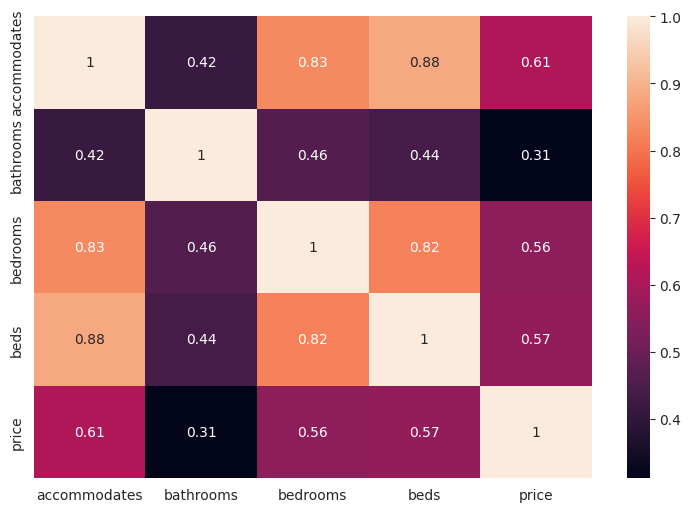

In [ ]:
# hacemos un mapa de calor con las columnas de caracteristicas con el precio.
plt.figure(figsize=(9,6))
sns.heatmap(df_barcelona_numericas[['accommodates', 'bathrooms','bedrooms','beds', 'price' ]].corr(), cmap = 'rocket',annot = True )
plt.xticks(rotation="horizontal")
plt.show()

Parece que si tenemos correlacion a cuantas mas camas y habitaciones, ademas de las veces que se ha alquilado

In [ ]:
# # hacemos un mapa de calor con las columnas de disponibilidad con el precio.

plt.figure(figsize=(15,6))
sns.heatmap(df_barcelona_numericas[['minimum_nights', 'maximum_nights','availability_30','availability_60','availability_90', 'availability_365','price' ]].corr(), cmap = 'rocket',annot = True)
plt.xticks(rotation="horizontal")
plt.show()

No se aprecia que haya ninguna por la disponibilidad con el precio, quitando una pequeña correlación, si está disponible todo el año.

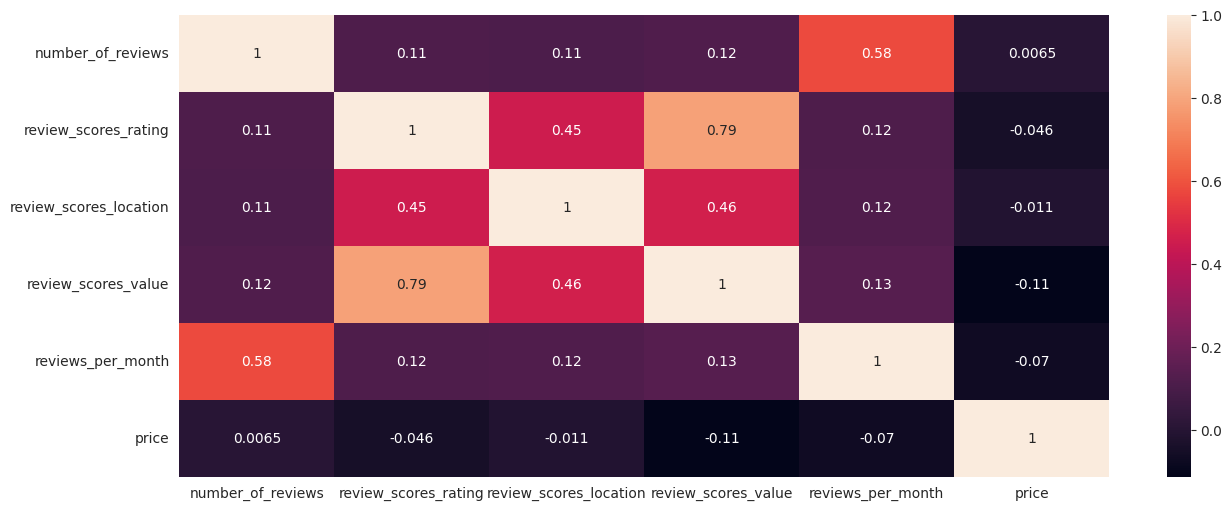

In [ ]:
# miramos si existe correlacion entre las reseñas y el precio.

plt.figure(figsize=(15,6))
sns.heatmap(df_barcelona_numericas[['number_of_reviews',	'review_scores_rating','review_scores_location','review_scores_value','reviews_per_month','price']].corr(), cmap = 'rocket',annot = True )
plt.xticks(rotation="horizontal")
plt.show()

No se aprecia ninguna significativa.

### 5.1 Número de huespedes

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_accom_B_df = df_barcelona.groupby('accommodates').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calcular el coeficiente de correlación
correlation = correlation_accom_B_df['accommodates'].corr(correlation_accom_B_df['median_price'])

In [ ]:
# Creamos el gráfico de dispersión
fig = px.scatter(correlation_accom_B_df,
                 x='accommodates',
                 y='median_price',
                 title='Correlación entre el Número de huespedes y la Mediana del Precio',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_accom_B_df['accommodates'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_accom_B_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation:.2f}',
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

In [ ]:
# Agrupar por 'accommodates' y 'room_type' y calcular la mediana del precio
correlation_room_type_B_df = df_barcelona.groupby(['accommodates', 'room_type']).agg(
    median_price_B=('price', 'median')
).reset_index()

In [ ]:
# Crear el gráfico de dispersión
fig = px.scatter(correlation_room_type_B_df,
                 x='accommodates',
                 y='median_price_B',
                 color='room_type',  # Usar room_type como color
                 title='Correlación entre el Número de Accommodates, Mediana del Precio y Tipo de Habitación',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
                 trendline='ols',  # Añadir línea de tendencia
                 template='plotly')

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')   # Fondo exterior (papel) transparente

# Mostrar el gráfico
fig.show()

In [ ]:
# Vamos a crear un DataFrame para almacenar los coeficientes de correlación por tipo de habitación
correlations_B = []

# Calculamos la mediana del precio y la correlación por 'room_type'
for room in correlation_room_type_B_df['room_type'].unique():
    temp_B_df = correlation_room_type_B_df[correlation_room_type_B_df['room_type'] == room]
    correlation_B = temp_B_df['accommodates'].corr(temp_B_df['median_price_B'])
    correlations_B.append({'room_type': room, 'correlation': correlation_B})

# Convertimos la lista en un DataFrame
correlation_B_df = pd.DataFrame(correlations_B).round(2)

# Mostramos el DataFrame con correlaciones
correlation_B_df.head(4)

room_type  correlation
0  Entire home/apt         0.81
1       Hotel room         0.78
2     Private room        -0.07
3      Shared room         0.84

### 5.2 Número de habitaciones y camas

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_bedr_B_df = df_barcelona.groupby('bedrooms').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calcular el coeficiente de correlación
correlation_B = correlation_bedr_B_df['bedrooms'].corr(correlation_bedr_B_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_B_df,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_M_df['bedrooms'].max() * 0.05,  # Ajustamos el texto en el eje x
    y=correlation_bedr_M_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

In [ ]:
correlation_bedr_B_df_2 = correlation_bedr_B_df[correlation_bedr_B_df['bedrooms'] < 50]

# Calcular el coeficiente de correlación usando el DataFrame filtrado
correlation_B = correlation_bedr_B_df_2['bedrooms'].corr(correlation_bedr_B_df_2['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_B_df_2,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_B_df['bedrooms'].max() * 0.5,  # Ajustamos el texto en el eje x
    y=correlation_bedr_B_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation:.2f}',
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

In [ ]:
# Agrupamos por 'bedrooms' y 'beds' para calcular la mediana del precio en el DataFrame filtrado
correlation_bedr_beds_B_df_2 = df_barcelona[df_barcelona['bedrooms'] < 50].groupby(['bedrooms', 'beds']).agg(
    median_price=('price', 'median')).reset_index()

# Gráfico de dispersión para 'bedrooms' vs 'median_price'
fig = px.scatter(correlation_bedr_beds_B_df_2,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones/Camas y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones/camas', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Línea de tendencia para 'bedrooms'
                 color_discrete_sequence=['blue'],  # Color de los puntos del primer conjunto
                 opacity=0.6)

# Añadir el segundo conjunto de puntos (beds vs median_price) y su línea de tendencia
fig2 = px.scatter(correlation_bedr_beds_B_df_2,
                  x='beds',
                  y='median_price',
                  trendline='ols',  # Línea de tendencia para 'beds'
                  labels={'beds': 'Número de camas', 'median_price': 'Mediana del Precio (€)'},
                  color_discrete_sequence=['green'],  # Color de los puntos del segundo conjunto
                  opacity=0.6)

# Combinar ambos gráficos (añadir la traza del segundo gráfico al primero)
for trace in fig2.data:
    fig.add_trace(trace)

# Añadir el coeficiente de correlación para 'bedrooms'
fig.add_annotation(
    x=correlation_bedr_beds_B_df_2['bedrooms'].max() * 1.1,  # Ajustamos el texto en el eje x
    y=correlation_bedr_beds_B_df_2['median_price'].max() * 1.1,  # Ajustamos el texto en el eje y
    text=f'Correlación (Habitaciones): {correlation_bedrooms:.2f}',  # Coeficiente de correlación para 'bedrooms'
    showarrow=False,
    font=dict(size=14, color='blue'))

# Añadir el coeficiente de correlación para 'beds'
fig.add_annotation(
    x=correlation_bedr_beds_B_df_2['beds'].max() * 0.8,  # Ajustamos el texto en el eje x
    y=correlation_bedr_beds_B_df_2['median_price'].max() * 1.1,  # Ajustamos el texto en el eje y
    text=f'Correlación (Camas): {correlation_beds:.2f}',  # Coeficiente de correlación para 'beds'
    showarrow=False,
    font=dict(size=14, color='green'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    legend_title_text='Variables',
    showlegend=True,
    title=dict(
        text='Correlación entre Habitaciones, Camas y Mediana de Precio',
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ))

# Mostrar el gráfico
fig.show()

### 5.3 Distancia al centro.

In [ ]:

# Aplicamos la función Haversine para calcular la distancia entre dos puntos:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    # Convertimos grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Diferencias entre las coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicamos la fórmula de Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Creamos una lista vacía para almacenar las distancias
distancias_B = []

# Definimos las coordenadas del centro de Barcelona
lat_centro = 41.3851
lon_centro = 2.1734

# Recorremos cada fila del DataFrame
for index, row in df_barcelona.iterrows():
    # Obtener la latitud y longitud de cada fila
    lat = row['latitude_trasfor']
    lon = row['longitude_trasfor']

    # Calculamos la distancia usando la función haversine
    distancia = haversine(lat, lon, lat_centro, lon_centro)

    # Añadimos la distancia a la lista
    distancias_B.append(distancia)

# Asignamos la lista de distancias como una nueva columna en el DataFrame
df_barcelona['distancia_al_centro'] = distancias_B

# Muestra una muestra del DataFrame
df_barcelona.sample(2)

apartment_id                               md5  \
8057      27366749  e97c3f152f333c53ff7e6eda31c8b6c4   
9796       7220512  37d076e0eeee28f26bd9297764d36434   

                                                name  \
8057  Beautiful 2 bedroom apart at Barcelona's heart   
9796             habitacion 2 playa, sagrada familia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  \
8057  Cozy and confortable apartment in the center of Barcelona. Only 5 minutes from Les Rambles, Plaça Catalunya and Plaça Universitat, and Mercat de Sant Antoni.<br /> At 20 minutes distance of the beach !!!<br /><br /><b>The space</b><br />It has 2 double bedrooms and 1 bathroom, an open kitchen with dining table and another space as a living room with TV. The apartment is fully equipped, in a second floor without lift and with a balcony that overlooks a quiet and pedestrian street.<br />This bright apartment has a modern style and is located in the heart of the historic city. Only 20 minutes walking distance from the beach.<br />Reservations from 32 days minimum, up to longer stays.<br /><br /><b>Other things to note</b><br />En el precio están todos los gastos incluidos: agua, wifi y electricidad hasta 80€ por mes<br />(la media normal al mes es de 45-50€ x mes de electricidad).   
9796                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      habitasion muy amplia comoda<br /><br /><b>The space</b><br />zona muy buena tranquila muy  serca metro,playa centro comercial,sagrada familia<br /><br /><b>Guest access</b><br />Para huéspedes el baño y habitación   

       host_id                                    neighborhood_overview  \
8057   2586242                                                      NaN   
9796  37685759  El barrio tranquilo tenemos cerca metro,sagrada familia   

                     neighbourhood_name neighbourhood_district  \
8057                           el Raval           Ciutat Vella   
9796  el Parc i la Llacuna del Poblenou             Sant Martí   

            room_type  accommodates  bathrooms  bedrooms  beds  \
8057  Entire home/apt             4        1.0       2.0   2.0   
9796     Private room             2        1.0       1.0   2.0   

                                                                                                                                                                                       amenities_list  \
8057                                                                                  ["TV", "Washer", "Wifi", "Heating", "Kitchen", "Air cond

In [ ]:
# Crear scatterplots en función del tipo de habitación:
fig = px.scatter(df_barcelona,
                 x='distancia_al_centro',
                 y='price',
                 facet_col='room_type',  # Separar en diferentes gráficos por tipo de habitación
                 color='room_type',
                 title='Relación entre Distancia al Centro y Precio por Tipo de Habitación',
                 trendline='ols',  # Añadir una línea de regresión
                 labels={'distancia_al_centro': 'Distancia al Centro (km)', 'price': 'Precio (€)'})

# Personalizar el diseño
fig.update_layout(
    title_font_size=15,
    width=5500,  # Ancho del gráfico
    height=1000,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior transparente

fig.update_layout(width=2500, height=800)
fig.show()

In [ ]:
df_barcelona_2 = df_barcelona[df_barcelona['price']< limite_superior_precio_B]
df_barcelona_2.head(2)

apartment_id                               md5                      name  \
1        5388904  48790b4dd865e98cc1f5302a2bba1a50  Nice Room in a Penthouse   
12      18750489  9ffec0db9fdb8199bcf1363befa7800c              Can Gran Via   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  \
1                                                                                                                    The apartment is fully equipped. Large bathroom, washing machine, large LCD TV, induction hob, large balcony, lots of light and quiet. Your room is approximately 12qm² large with a 90cm bed (new). Work table and WIFI is also available.<br /><br /><b>The space</b><br />Great location, nice atmosphere, nice balcony<br /><br /><b>Guest access</b><br />Everywhere but my own room :-)   
12  Luminous room with double bed, and large closet in large and pleasant flat, a little old but very clean and tidy, located in one of the most central areas of Barcelona 3 minutes to the Plaza España metro station, close to the Montjuic Fountain and the Venetian Towers. Only 15 to 45 minutes from the airport, depending on transportation. We are two friends of 31 and 38, among our hobbies are music, gaming and chatting relaxed, ready to welcome you to share our flat so you can enjoy the city.   

     host_id neighborhood_overview              neighbourhood_name  \
1   20843074                   NaN  la Nova Esquerra de l'Eixample   
12   3745058                   NaN                    el Poble Sec   

   neighbourhood_district     room_type  accommodates  bathrooms  bedrooms  \
1                Eixample  Private room             1        1.0       1.0   
12         Sants-Montjuïc  Private room             2        2.0       1.0   

    beds  \
1    1.0   
12   1.0   

                                                                                                                                                  amenities_list  \
1                             ["Wifi", "Kitchen", "Heating", "TV", "Essentials", "Air conditioning", "Washer", "Elevator", "Long term stays allowed", "Shampoo"]   
12  {"Wireless Internet",Kitchen,"Smoking allowed",Elevator,Washer,Essentials,"Lock on bedroom door",Hangers,Iron,"Laptop friendly workspace","Host greets you"}   

    price  minimum_nights  maximum_nights has_availability  availability_30  \
1   100.0               1          1125.0             True              0.0   
12   35.0               6            30.0             True              0.0   

    availability_60  availability_90  availability_365  number_of_reviews  \
1                 0              0.0                 0                  1   
12                0              0.0                 0                  1   

   first_review_date last_review_date  review_scores_rating  \
1         2015-03-06       2015-03-06                  80.0   
12        2017-08-22       2017-08-22                 100.0   

    review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
1                      8.0                        8.0                    8.0   
12                    10.0                       10.0                   10.0   

    review_scores_communication  review_scores_location  review_scores_value  \
1                          10.0                    10.0                 10.0   
12                         10.0                    10.0                 10.0   

   license  is_instant_bookable  reviews_per_month country       city  \
1      NaN                False               0.01   spain  barce

### 5.4 Reviews

In [ ]:
#Hacemos una media de nota frente al precio
correlation_reviews_B_df = df_barcelona_2.groupby('number_of_reviews').agg(median_price=('price', 'median')).reset_index()

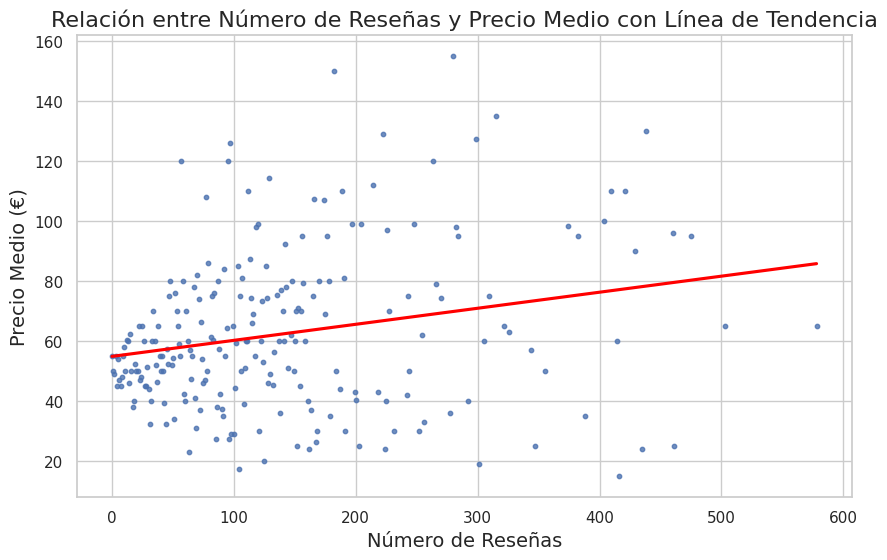

In [ ]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de línea con un ajuste de regresión (regplot)
plt.figure(figsize=(10, 6))

# Graficar línea de regresión
sns.regplot(x='number_of_reviews', y='median_price', data=correlation_reviews_B_df,
            scatter_kws={'s':10}, line_kws={"color":"red"}, ci=None)

# Etiquetas del gráfico
plt.title('Relación entre Número de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
#Hacemos una media para ver si cuanto mejor es la reseña, más alto es el precio del apartamento
correlation_reviews_B_2_df = df_barcelona_2.groupby('review_scores_rating').agg(median_price=('price', 'median')).reset_index()

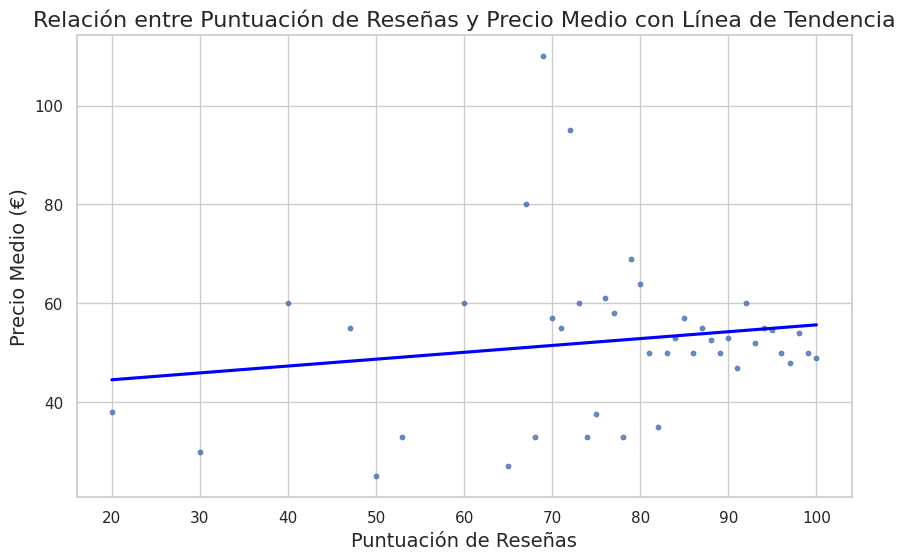

In [ ]:
# Crear el gráfico de línea con un ajuste de regresión (regplot)
plt.figure(figsize=(10, 6))

# Graficar línea de regresión
sns.regplot(x='review_scores_rating', y='median_price', data=correlation_reviews_B_2_df,
            scatter_kws={'s':10}, line_kws={"color":"blue"}, ci=None)

# Etiquetas del gráfico
plt.title('Relación entre Puntuación de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Puntuación de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Mostrar el gráfico
plt.show()

Observamos que en Barcelona, el número de reseñas no tiene mucha relación con el precio.

## 6.Analisis de Ocupación

In [ ]:
# Creamos las nuevas columnas calculando el % de ocupación a partir de la disponibilidad de los apartamentos.

df_barcelona['%ocupacion_30'] = ((30 - df_barcelona['availability_30']) / 30 * 100).round(2)
df_barcelona['%ocupacion_60'] = ((60 - df_barcelona['availability_60']) / 60 * 100).round(2)
df_barcelona['%ocupacion_90'] = ((90 - df_barcelona['availability_90']) / 90 * 100).round(2)
df_barcelona['%ocupacion_365'] = ((365 - df_barcelona['availability_365']) / 365 * 100).round(2)

# Mostramos un ejemplo:
df_barcelona.sample(3)

apartment_id                               md5  \
6370      24747700  756412f00ceaf49430153492559040bf   
6219      13289432  bc16d03725dce72e800bf7e8e4a8820a   
9374       6843697  92251212a8e7c9d947c10dd11590848f   

                                           name  \
6370  Nice apartment close to Passeig de Gracia   
6219          Suite amb bany privat, zona alta.   
9374                             SPANISH SIESTA   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
6370  The apartment Gaudi  is a two-bedroom apartment with a superb location. The apartment is totally exterior and has three exits to a large balcony. The apartment has 2 bedrooms, 1 double and 1 single.  One of the double bedrooms has a double bed and the other twin beds. There is one bathroom with shower. The kitchen is fully equipped. HUTB-003197 TOURIST LICENCE The Gaudír 2 apartment combines perfectly classical items, such as the ornaments, its arquitecture and some furniture, with modern items, with minimal decoration and simple shapes. HUTB-003197 Its location is excellent: from the apartment to Plaza Cataluña or to the famous Ramblas of Barcelona only 10minutes wlaking distance. The Gaudír 2 apartment in Barcelona is a great choice for your visit to Barcelona, you will be pleased with its centric location. Gaudír 2 apartment in Barcelona, named after the artist, is located in “calle Diputación”. Near to the apartment, you will find groceries stores, several restaurants serving typic   
6219                                                                                                                                                                                                                                                                                                                                                   Lugares de interés: A 15 minutos del campo de futbol del Barça, El Corte Inglés y l'Illa Diagonal. Te va a encantar mi ubicación, bien comunicado, a 15 minutos de Sants Estació, el barrio, el ambiente, las zonas exteriores, y la gente. Mi alojamiento es bueno para parejas y viajeros de negocios.<br /><br /><b>The space</b><br />Habitación con baño privado completo,  dos juegos de toallas, gel, champú y crema corporal. TV en la habitación.<br />El precio incluye desayuno.<br /><br /><b>Guest access</b><br />Zonas comunes, salón-comedor y terrazas.<br /><br /><b>Other things to note</b><br />Cerca de la estación de Sants y bien comunicado con el Aeropuerto.   
9374  HUTB-002622. This apartment is in one of the most central parts of Barcelona, Plaza España, which is ideal for business travelers due to its proximity to the “Fira de Barcelona” conference and exhibition center. HUTB-002622. Ample apartment situated in Plaza España, which has 4  bedrooms   The apartment has a bright living and dining area, which provides for your comfort a plasma TV with cable, a DVD player, and two double sofa beds. There are 2 full bathrooms with showers and a fully equipped kitchen. Moreover, the apartment has a ma

In [ ]:
# Calculamos el % de ocupación a partir de la disponibilidad de los apartamentos
df_barcelona['%ocupacion_30'] = ((30 - df_barcelona['availability_30']) / 30 * 100).round(2)
df_barcelona['%ocupacion_60'] = ((60 - df_barcelona['availability_60']) / 60 * 100).round(2)
df_barcelona['%ocupacion_90'] = ((90 - df_barcelona['availability_90']) / 90 * 100).round(2)
df_barcelona['%ocupacion_365'] = ((365 - df_barcelona['availability_365']) / 365 * 100).round(2)

# Creamos los bloques de ocupación para cada porcentaje de ocupación
df_barcelona['ocupacion_bloques_30'] = pd.cut(df_barcelona['%ocupacion_30'],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_barcelona['ocupacion_bloques_60'] = pd.cut(df_barcelona['%ocupacion_60'],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_barcelona['ocupacion_bloques_90'] = pd.cut(df_barcelona['%ocupacion_90'],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_barcelona['ocupacion_bloques_365'] = pd.cut(df_barcelona['%ocupacion_365'],
                                               bins=[0, 25, 50, 75, 100],
                                               labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

# Contamos el número de alojamientos por cada bloque para cada periodo de ocupación
ocupacion_counts_30 = df_barcelona['ocupacion_bloques_30'].value_counts().sort_index().reset_index()
ocupacion_counts_60 = df_barcelona['ocupacion_bloques_60'].value_counts().sort_index().reset_index()
ocupacion_counts_90 = df_barcelona['ocupacion_bloques_90'].value_counts().sort_index().reset_index()
ocupacion_counts_365 = df_barcelona['ocupacion_bloques_365'].value_counts().sort_index().reset_index()

# Renombramos las columnas para mayor claridad
ocupacion_counts_30.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (30 días)']
ocupacion_counts_60.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (60 días)']
ocupacion_counts_90.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (90 días)']
ocupacion_counts_365.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (365 días)']

# Calculamos el porcentaje frente al total para cada periodo
total_30 = ocupacion_counts_30['Cantidad de Alojamientos (30 días)'].sum()
total_60 = ocupacion_counts_60['Cantidad de Alojamientos (60 días)'].sum()
total_90 = ocupacion_counts_90['Cantidad de Alojamientos (90 días)'].sum()
total_365 = ocupacion_counts_365['Cantidad de Alojamientos (365 días)'].sum()

ocupacion_counts_30['Porcentaje (30 días)'] = (ocupacion_counts_30['Cantidad de Alojamientos (30 días)'] / total_30 * 100).round(2)
ocupacion_counts_60['Porcentaje (60 días)'] = (ocupacion_counts_60['Cantidad de Alojamientos (60 días)'] / total_60 * 100).round(2)
ocupacion_counts_90['Porcentaje (90 días)'] = (ocupacion_counts_90['Cantidad de Alojamientos (90 días)'] / total_90 * 100).round(2)
ocupacion_counts_365['Porcentaje (365 días)'] = (ocupacion_counts_365['Cantidad de Alojamientos (365 días)'] / total_365 * 100).round(2)

# Combinamos todos los DataFrames en uno solo para mostrar los resultados en una tabla
ocupacion_summary_B = pd.concat([ocupacion_counts_30, ocupacion_counts_60[['Cantidad de Alojamientos (60 días)', 'Porcentaje (60 días)']],
                               ocupacion_counts_90[['Cantidad de Alojamientos (90 días)', 'Porcentaje (90 días)']],
                               ocupacion_counts_365[['Cantidad de Alojamientos (365 días)', 'Porcentaje (365 días)']]], axis=1)

# Mostramos la tabla con los resultados
ocupacion_summary_B

Rango de Ocupación  Cantidad de Alojamientos (30 días)  \
0             0%-25%                                 460   
1            25%-50%                                 298   
2            50%-75%                                 424   
3           75%-100%                                1332   

   Porcentaje (30 días)  Cantidad de Alojamientos (60 días)  \
0                 18.30                                 615   
1                 11.85                                 407   
2                 16.87                                 467   
3                 52.98                                1077   

   Porcentaje (60 días)  Cantidad de Alojamientos (90 días)  \
0                 23.97                                 726   
1                 15.86                                 510   
2                 18.20                                 394   
3                 41.97                                 953   

   Porcentaje (90 días)  Cantidad de Alojamientos (365 días)  \
0                 28.11                                  876   
1                 19.74                                  369   
2                 15.25                                  403   
3                 36.90                                 1021   

   Porcentaje (365 días)  
0                  32.82  
1                  13.83  
2                  15.10  
3                  38.25

In [ ]:
# Creamos una nueva columna con los bloques de ocupación para el % de ocupación a 365 D
df_barcelona['ocupacion_bloques'] = pd.cut(df_barcelona['%ocupacion_365'],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%	'])

# Creamos el gráfico de barras apiladas diferenciando por distrito y ocupación
fig = px.histogram(
    df_barcelona,
    x='neighbourhood_district',  # Eje X para los distritos
    color='ocupacion_bloques',  # Colores basados en los bloques de ocupación
    title='Distribución de Alojamientos por Distrito y Bloques de Ocupación (365 días)',
    labels={'neighbourhood_district': 'Distrito', 'count': 'Número de Alojamientos', 'ocupacion_bloques': 'Bloque de Ocupación'},
    barmode='stack',  # Barras apiladas
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el diseño de la gráfica
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de Alojamientos',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    width=1500,
    height=600)

# Mostramos la gráfica
fig.show()

In [ ]:
# Definir los intervalos de precios (clusters)
df_barcelona['precio_cluster'] = pd.cut(df_barcelona['price'], bins=[0, 50, 100, 150, 200, 500],
                                           labels=['0-50', '50-100', '100-150', '150-200', '200-500'])

# Agrupar por los clusters de precios y calcular la ocupación promedio
ocupacion_por_precio_B = df_barcelona.groupby('precio_cluster').agg(
    ocupacion_media_30 = ('%ocupacion_30', 'mean'),
    ocupacion_media_60 = ('%ocupacion_60', 'mean'),
    ocupacion_media_90 = ('%ocupacion_90', 'mean'),
    ocupacion_media_365 = ('%ocupacion_365', 'mean'),
    numero_alojamientos = ('apartment_id', 'count')).reset_index()

# Redondear los valores a 2 decimales después de calcular
ocupacion_por_precio_B[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']] = ocupacion_por_precio_B[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']].round(2)

# Mostrar el DataFrame resultante
print(tabulate(ocupacion_por_precio_B, headers='keys', tablefmt='pretty'))

+---+----------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|   | precio_cluster | ocupacion_media_30 | ocupacion_media_60 | ocupacion_media_90 | ocupacion_media_365 | numero_alojamientos |
+---+----------------+--------------------+--------------------+--------------------+---------------------+---------------------+
| 0 |      0-50      |        62.3        |       57.02        |       53.03        |        56.51        |        1229         |
| 1 |     50-100     |       60.43        |       54.59        |       50.34        |        48.92        |         901         |
| 2 |    100-150     |       59.98        |       53.81        |       49.36        |        41.86        |         321         |
| 3 |    150-200     |       53.48        |       47.13        |        40.7        |        37.36        |         161         |
| 4 |    200-500     |       53.72        |       47.69        |       43.26        |     

In [ ]:
# Creamos el gráfico de burbujas para cada ocupación.
fig = px.scatter(
    ocupacion_por_precio_B,
    x='precio_cluster',
    y='ocupacion_media_30',
    size='numero_alojamientos',
    color='ocupacion_media_30',
    hover_name='precio_cluster',
    size_max=50,
    color_continuous_scale=px.colors.sequential.RdBu)

# Añadimos brubujas para cada ocupación
for ocupacion in ['ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']:
    fig.add_scatter(
        x=ocupacion_por_precio_B['precio_cluster'],
        y=ocupacion_por_precio_B[ocupacion],
        mode='markers',
        marker=dict(size=ocupacion_por_precio_B['numero_alojamientos'], sizemode='area'),
        name=ocupacion)

# Personalizamos el gráfico
fig.update_layout(
    title='Ocupación Media y Número de Alojamientos por Rango de Precios Barcelona',
    xaxis_title='Rango de Precios',
    yaxis_title='Ocupación Media (%)',
    width=1500,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True,
    legend=dict(
        title='Ocupación Media',
        orientation="v",  # Leyenda vertical
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    coloraxis_colorbar=dict(
        title="Ocupación (%)",
        tickvals=[0, 25, 50, 75, 100],  # Ajusto los valores según la escala
        len=0.7,))  # Altura de la barra de colores

fig.show()

#EDA VALENCIA

## **1. Preparación del DF de Valencia.**

In [ ]:
#Filtramos el Data Frame de la ciudad objeto del estudio: Valencia.
df['city'] = df['city'].str.lower()
df_valencia = df[df['city'] == 'valencia']
df_valencia.sample(5)

apartment_id                               md5  \
3675      39888703  b5fbcd5091e002945dad3eb9ff8e6230   
7706       9606267  7299c2ddbbc6e2c6169487109f4b78b2   
460        6734047  297ca29cc86288f6986b482d4490a420   
6639      34016197  8fa87e1a03cda82c0833427943e33d43   
9475      24964820  18f7fe4201adb2e9b04b9282d4e3bb1f   

                                                    name  \
3675                 MARAVILLOSAS VACACIONES EN VALENCIA   
7706                    Cercano a la cuidad de las Artes   
460                   AMBIENTE FAMILIAR 1*/SRA.ALEXANDRA   
6639  Apartamento Valencia excelente ubicación  AT45924V   
9475   Tourist apartment at 300m from AVE,close to metro   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
3675                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            PISO CERCA A UNIVERSIDADES Y SITIOS TURISTICOS PRINCIPALES DE VALENCIA<br /><br /><b>The space</b><br />ESTAMOS MUY CERCA AL TRANVIA Y TREN Y TODOS LOS MEDIOS DE TRANSPORTE, 2 PLAYAS A 5 MIN DEL APARTAMENTO   
7706                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Es un apartamento 'en medio de todo'. Esto es, lo mas cerca que se puede estar del Centro,de la Playa y de la Ciudad de las Ciencias al mismo tiempo. El barrio tiene todos los servicios y transporte público cercano. Cerca de estacion de metro Amistad   
460                                    SE ALQUILA 2 HABITACION(LITERA 2 PS. 1, 2 CAMA ) :COMPARTIDAS CON LA FAMILIA DEL PISO , HAY 1 BAÑO,  y 1 ASEO,WIFFI,AGUA, LUZ VENTILADOR DE TECHO, SOMOS MUY AMABLES EN EL TRATO TENGO UNA PERRITA  YORKSAY, MIS TRES HIJOS Y MI MARIDO, EL ALQ

## **2. Limpieza de datos.**

In [ ]:
# Mostramos la informacion que el data frame tiene de Valencia.
df_valencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 9991
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 528 non-null    int64  
 1   md5                          528 non-null    object 
 2   name                         528 non-null    object 
 3   description                  510 non-null    object 
 4   host_id                      528 non-null    int64  
 5   neighborhood_overview        347 non-null    object 
 6   neighbourhood_name           528 non-null    object 
 7   neighbourhood_district       528 non-null    object 
 8   latitude                     528 non-null    object 
 9   longitude                    528 non-null    object 
 10  room_type                    528 non-null    object 
 11  accommodates                 528 non-null    int64  
 12  bathrooms                    526 non-null    float64
 13  bedrooms                

###2.1 Análisis de duplicados

In [ ]:
# Se determinan cuantos valores únicos hay en el data set de Valencia. Se entiende que apartment_id es el codigo identificativo del apartamento.
unicos= df_valencia["apartment_id"].nunique()

# Los duplicados se calculan mediante la diferencia entre numero de filas de datos menos los únicos:
duplicados = df_valencia.shape[0] - df_valencia["apartment_id"].nunique()

# Mostrar el resultado con la cantidad de alojamientos duplicados
print(f'En el DataFrame de Valencia hay {unicos} apartment_id únicos y {duplicados} apartment_id duplicados.')

En el DataFrame de Valencia hay 513 apartment_id únicos y 15 apartment_id duplicados.


In [ ]:
# Filtramos y ordenamos duplicados de 'apartment_id'
duplicados = df_valencia[df_valencia.duplicated('apartment_id', keep=False)].sort_values('apartment_id')

# Mostrar los duplicados
display(duplicados)

apartment_id                               md5  \
3598       3658759  6682b58d9ad15679159afb09a36f0cad   
1855       3658759  6682b58d9ad15679159afb09a36f0cad   
1054       5454114  baeae2a77136cff9f6ce7be47b87ee96   
2840       5454114  baeae2a77136cff9f6ce7be47b87ee96   
4053      11715525  28d8dacb28dba696fa107c2759bdd856   
8973      11715525  28d8dacb28dba696fa107c2759bdd856   
5087      11989301  c7ca4570020fe5777a2b09d4b2edca04   
1617      11989301  c7ca4570020fe5777a2b09d4b2edca04   
3059      15402794  15bcdb0a70743e022fa796542ca3cd45   
88        15402794  15bcdb0a70743e022fa796542ca3cd45   
1816      15402794  15bcdb0a70743e022fa796542ca3cd45   
9666      17667517  848ae2e988db0436091a9790dcee95b1   
8634      17667517  848ae2e988db0436091a9790dcee95b1   
863       23272396  91a1244e0666a9fa51d1d8cfb4c6b043   
1817      23272396  91a1244e0666a9fa51d1d8cfb4c6b043   
7306      23850453  2f496c2fdf0a7f4790540f4a6d7518d9   
1684      23850453  2f496c2fdf0a7f4790540f4a6d7518d9   
1513      24520266  8e5bc6716e4558a3ffbcf622d996ae0b   
368       24520266  8e5bc6716e4558a3ffbcf622d996ae0b   
3883      29178479  9a701cf5ac1314fd96774d6d223356e4   
517       29178479  9a701cf5ac1314fd96774d6d223356e4   
7915      32037155  1ed771e3d7465fa2c753a1d7f374ea5a   
1097      32037155  1ed771e3d7465fa2c753a1d7f374ea5a   
4545      33739454  34d867db26199ec0944fa84515a72fc6   
7188      33739454  34d867db26199ec0944fa84515a72fc6   
4642      33778375  4f513da481b5074f3f7ac07e0c20496a   
7186      33778375  4f513da481b5074f3f7ac07e0c20496a   
6639      34016197  8fa87e1a03cda82c0833427943e33d43   
7625      34016197  8fa87e1a03cda82c0833427943e33d43   

                                                    name  \
3598                  LUNA: habitación doble con terraza   
1855                  LUNA: habitación doble con terraza   
1054                        Casa Jardines Juan Martorell   
2840                        Casa Jardines Juan Martorell   
4053                             New renovated apartment   
8973                             New renovated apartment   
5087                              Vivienda San Martín II   
1617                              Vivienda San Martín II   
3059                 R1- Single room next to the council   
88                   R1- Single room next to the council   
1816                 R1- Single room next to the council   
9666                                   Ruzafa - Valencia   
8634                                   Ruzafa - Valencia   
863        Central close to Old Town WIFI/Netflix/Amazon   
1817       Central close to Old Town WIFI/Netflix/Amazon   
7306                           Cabanyal apartments beach   
1684                           Cabanyal apartments beach   
1513            Apartment near the beach!!! withTerrace)   
368     Apartment near the Historic PORT!!! withTerrace)   
3883           CONFORTABLE HABITACIÓN  CERCANA AL CENTRO   
517            CONFORTABLE HABITACIÓN  CERCANA AL CENTRO   
7915              Centric and Cosy apartment in Valencia   
1097              Centric and Cosy apartment in Valencia   
4545      Sunny & Stylish Apartment | Center of Valencia   
7188                 Cozy apartment | Center of Valencia   
4642                               Habitación individual   
7186                               Habitación individual   
6639  Apartamento Valencia excelente ubicación  AT45924V   
7625      apartamento en segunda línea de playa Valencia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Para concluir si realmente son duplicados vamos a comparar si las información mostrada es exactamente la misma:

Filtramos los duplicados por apartment_id.
Agrupamos por apartment_id para comparar los valores de las demás columnas.
Identificamos si las filas duplicadas tienen diferencias en las demás columnas.

In [ ]:
# Recorremos cada grupo de filas que comparten el mismo 'apartment_id'
for apt_id in duplicados['apartment_id'].unique():

    # Filtramos las filas que tienen el mismo 'apartment_id'
    grupo = duplicados[duplicados['apartment_id'] == apt_id]

    # Comparamos todas las filas con la primera fila para ver si hay diferencias
    diferencia_M = grupo != grupo.iloc[0]  # Aquí estamos comparando si el apartment_id de cada fila coincide con la primera.

    # Vemos en qué columnas hay diferencias (True si al menos una fila es diferente en esa columna)
    columnas_diferentes_M = diferencia_M.any(axis=0)  # Esto indica qué columnas son diferentes con un booleano. Si es True añade la columna.

    # Si hay diferencias en alguna columna, mostramos solo las columnas con diferencias:
    if columnas_diferentes_M.any():
        print(f"Diferencias en apartment_id {apt_id}:")
        display(grupo.loc[:, columnas_diferentes_M])  # Mostramos solo las columnas que tienen diferencias

Diferencias en apartment_id 3658759:


description  \
3598  . LUNA: Nuestra suite de 23,5 m2 dispone de una cama doble de 150x200 cm, baño privado y  terraza privada.  estamos situados a 10 minutos andando de la catedral y a 22 minutos de la Ciudad de las ciencias. a escasos metros de los jardines del Turia, lugar ideal para pasear y hacer deporte. tenemos una sala de café donde servimos los desayunos y donde pueden disfrutar de un café o té a cualquier hora del día. cuando llegan, con un mapa de la ciudad os indicaremos los lugares con mayor interés de la ciudad, ademas de los eventos que se produzcan durante su estancia. pertenece al ensanche de la ciudad de Valencia en la parte llamada Ciudadela, una zona muy exclusiva de Valencia una parada de metro a 100metros con linea directa desde el aeropuerto, situada en el puente de la exposición. parada de autobus numero 1 que llega desde la estación de autobuses y llega hasta la playa. linea 95 que recorre el largo del antiguo cauce del rio , ahora convertidos en jardines. parking gratuito en zona    
1855                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      . LUNA: Nuestra suite de 23,5 m2 dispone de una cama doble de 150x200 cm, baño privado y  terraza privada.<br /><br /><b>The space</b><br />estamos situados a 10 minutos andando de la catedral y a 22 minutos de la Ciudad de las ciencias.<br />a escasos metros de los jardines del Turia, lugar ideal para pasear y hacer deporte.<br /><br /><b>Guest access</b><br />tenemos una sala de café donde servimos los desayunos y donde pueden disfrutar de un café o té a cualquier hora del día.   

     neighbourhood_name neighbourhood_district   latitude longitude  beds  \
3598   EL PLA DEL REMEI             L'EIXAMPLE  3.947.237   -36.747   1.0   
1855           MESTALLA        EL PLA DEL REAL  3.947.253   -36.556   0.0   

                                                                                                      amenities_list  \
3598  {TV,Wifi,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"First aid kit","Safety card",Essentials,Shampoo}   
1855              ["Elevator", "Wifi", "Dryer", "Washer", "Shampoo", "Heating", "TV", "Essentials", "First aid kit"]   

     first_review_date last_review_date  review_scores_rating  \
3598               NaN              NaN                   NaN   
1855               NaN              NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
3598                     NaN                        NaN   
1855                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
3598                    NaN                          NaN   
1855                    NaN                          NaN   

      review_scores_location  review_scores_value license  reviews_per_month  \
3598                     NaN                  NaN     NaN                NaN   
1855                     NaN                  NaN     NaN                NaN   

     insert_date  
3598  2019-05-01  
1855  2020-10-24

Diferencias en apartment_id 5454114:


neighborhood_overview  availability_30  availability_60  availability_90  \
1054                   NaN             18.0               41             71.0   
2840                   NaN             25.0               50             73.0   

      availability_365 license insert_date  
1054               298     NaN  2019-11-30  
2840               296     NaN  2019-12-31

Diferencias en apartment_id 11715525:


description  \
4053  Newly renovated apartment with high ceilings, American kitchen, very bright, air conditioning (hot-cold), WIFI (50mg), 43 "TV, DVD with movies, the apartment is brand new vintage style and is located on the parallel street To the SOHO of Valencia, in the neighborhood of RUFAZA (the fashionable neighborhood) you will find everything (restaurants, terraces, museums, pubs, discos, pharmacies, supermarkets, banks ...) Travel cot available, sofa bed 120cm, TV 43 inches, DVD with movies, air conditioning and heating in all rooms, WIFI 50 megs, kitchenette with oven, washing machine, refrigerator and microwave. No one can tell that Ruzafa is the fashionable neighborhood in Valencia. And we could say that it has been reborn from its ashes, because in spite of being in the center of Valencia, the neighborhood went through a stage of decadence that almost ends with it: the emigrants gave it vidilla, and after them came the artists, the architects , The designers. To the locutorios and Arab store   
8973                                                                                                                                                                                                                                                                                                                                                                      Newly renovated apartment with high ceilings, American kitchen, very bright, air conditioning (hot-cold), WIFI (50mg), 43 "TV, DVD with movies, the apartment is brand new vintage style and is located on the parallel street To the SOHO of Valencia, in the neighborhood of RUFAZA (the fashionable neighborhood) you will find everything (restaurants, terraces, museums, pubs, discos, pharmacies, supermarkets, banks ...)<br /><br /><b>The space</b><br />Travel cot available, sofa bed 120cm, TV 43 inches, DVD with movies, air conditioning and heating in all rooms, WIFI 50 megs, kitchenette with oven, washing machine, refrigerator and microwave.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            amenities_list  \
4053  {TV,Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Free street parking","Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"First aid kit","Safety card",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room","Babysitter recommendations","Pack ’n Play/travel crib","Room-darkening shades","Children’s dinnerware","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Patio or balcony","Luggage dropoff allowed","Long term stays allowed","Host greets you","Trash can"}   
8973                                     ["Heating", "Washer", "First aid kit", "Microwave", "Shower gel", "Laptop-friendly workspace", "Long term stays allowed", "Patio or balcony", "Iron", "TV", "Cooking basics", "Oven", "Stove", "Babysitter recommendations", "Paid parking off premises", "Coffee maker", "Free street parking", "Luggage dropoff allowed", "Host greets you", "Bed linens", "Hair dryer", "Air conditioning", "Hangers", "Wifi", "Children\u2019s dinnerware", "Kitchen", "Pack \u2019n Play/travel crib", "Dishes and silverware", "Refrigerator", "Shampoo", "Hot water", "Extra pillows and blankets", "Essentials", "Room-darkening shades"]   

 

Diferencias en apartment_id 11989301:


description  \
5087                                                                                                                                                      Relájate y desconecta mientras la cálida luz valenciana entra por el balcón de este acogedor apartamento, dando vida a cada uno de los detalles singulares que caracterizan su cuidada decoración y la práctica distribución de su mobiliario.   
1617  Relájate y desconecta mientras la cálida luz valenciana entra por el balcón de este acogedor apartamento, dando vida a cada uno de los detalles singulares que caracterizan su cuidada decoración y la práctica distribución de su mobiliario.<br />Apartamento adapto a una pareja con niños, hay sofá cama y cuna.<br />No apto para 4 adultos.<br /><br /><b>License number</b><br />VT-38129-V   

       latitude longitude  accommodates  \
5087  3.947.199   -37.668             4   
1617  3.947.303   -37.589             2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            amenities_list  \
5087  {TV,Wifi,"Air conditioning",Kitchen,Elevator,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","High chair","Children’s books and toys",Crib,"Pack ’n Play/travel crib","Room-darkening shades","Hot water","Body soap","Bath towel","Toilet paper","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Patio or balcony","Wide hallways","No stairs or steps to enter","Wide entrance for guests","Flat path to guest entrance","Well-lit path to entrance","No stairs or steps to enter","Wide entrance","Extra space around bed","Accessible-height bed","No stairs or steps to enter","Wide doorway to guest bathroom","Accessible-height toilet","Wide clearance to shower, toilet","No stairs or steps to enter","Wide entryway","Host greets you",Balcony,"Espresso machine","Day bed","Double oven","Convection oven",Netflix,"HBO GO","En suite bathroom","Walk-in shower","Paid parking on premises","Bedroom comforts","Bathroom essentials","Step-free shower"}   
1617                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Diferencias en apartment_id 15402794:


description  \
3059  Single  bedroom in a symbolic building in the center of Valencia, next to the city council and the train station (only two minutes away!). The location is perfect for discovering the historic sites of the city. The flat is also near the train/metro stations going to the beach and it is surrounded by traditional restaurants and bars. There is a common area with sofas where you can get hang out and relax The bedroom is in a big apartment with six bedrooms and two complete bathrooms. Double room at the center of Valencia. Next to the city council and the train station (only one minute away!)  The location is perfect for discovering the historic sites of the city, surrounded by traditional restaurants and bars. Big apartment, with two complete bathrooms and a common area with sofas for reading or talking comfortably. Fast WIFI available in the whole flat. All the furniture of the apartment is new (october 2016) You will have clean sheets at your bedroom.  Sheets are changed every six days    
88    Single  bedroom in a symbolic building in the center of Valencia, next to the city council and the train station (only two minutes away!). The location is perfect for discovering the historic sites of the city. The flat is also near the train/metro stations going to the beach and it is surrounded by traditional restaurants and bars. There is a common area with sofas where you can get hang out and relax The bedroom is in a big apartment with six bedrooms and two complete bathrooms. Double room at the center of Valencia. Next to the city council and the train station (only one minute away!)  The location is perfect for discovering the historic sites of the city, surrounded by traditional restaurants and bars. Big apartment, with two complete bathrooms and a common area with sofas for reading or talking comfortably. Fast WIFI available in the whole flat. All the furniture of the apartment is new (october 2016) You will have clean sheets at your bedroom.  Sheets are changed every six days    
1816  Single  bedroom in a symbolic building in the center of Valencia, next to the city council and the train station (only two minutes away!). The location is perfect for discovering the historic sites of the city. The flat is also near the train/metro stations going to the beach and it is surrounded by traditional restaurants and bars. There is a common area with sofas where you can get hang out and relax<br /><br /><b>The space</b><br />The bedroom is in a big apartment with six bedrooms and two complete bathrooms.<br />Double room at the center of Valencia. Next to the city council and the train station (only one minute away!) <br />The location is perfect for discovering the historic sites of the city, surrounded by traditional restaurants and bars.<br />Big apartment, with two complete bathrooms and a common area with sofas for reading or talking comfortably. Fast WIFI available in the whole flat.<br />All the furniture of the apartment is new (october 2016)<br />You will have clean s   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    neighborhood_overview  \
3059            The location is perfect for discovering the historic sites of the city. The flat is also near the train/metro stations going to the beach or emblematic places of Valencia, like Ciudad de las Artes y las Ciencias. As well, at your arrival, we will give you all the information you need about the city.  From the room is very easy to enjoy of the charm of the historic center: plaza del ayuntamiento, el Mercado Central, la plaza d

Diferencias en apartment_id 17667517:


availability_30  availability_90  availability_365  number_of_reviews  \
9666              1.0             12.0               234                 71   
8634              2.0              7.0               209                 66   

     last_review_date license insert_date  
9666       2019-07-15     NaN  2019-07-31  
8634       2019-05-23     NaN  2019-05-31

Diferencias en apartment_id 23272396:


description  \
863   Quiet and bright brand new 1 bedroom apartment, fully renovated in Valencia city center, just 5 minutes walk to the Old Town and also less than 5 min. to "Àngel Guimerà" Metro station, the city's best public transport connection hub. Cozy, central, clean and functional, it has everything that a couple or a single would need for a pleasant stay in Valencia. Fiber Optic WiFi Internet connection available. My home is on the second floor of a modernist  building with lift. It has a bright living / dining room, one bedroom with a double bed (150x190cm), an open kitchen and a bathroom with shower. The living room features a very comfortable sofa, flat-screen TV and a dining area with a table that seats 4 people.  The kitchen is equipped with cooking facilities, a fridge, freezer, oven, microwave, washing machine, Nespresso coffee machine, kettle,  toaster, basic kitchen condiments (oil, vinegar, salt, sugar, pepper and some others) and utensils for washing crockery, to avoid you the hassle a   
1817  Quiet and bright brand new 1 bedroom apartment, fully renovated in Valencia city center, just 5 minutes walk to the Old Town and also less than 5 min. to "Àngel Guimerà" Metro station, the city's best public transport connection hub.<br />Cozy, central, clean and functional, it has everything that a couple or a single would need for a pleasant stay in Valencia. Fiber Optic WiFi Internet connection available.<br /><br /><b>The space</b><br />My home is on the second floor of a modernist  building with lift.<br />It has a bright living / dining room, one bedroom with a double bed (150x190cm), an open kitchen and a bathroom with shower.<br />The living room features a very comfortable sofa, flat-screen TV and a dining area with a table that seats 4 people. <br />The kitchen is equipped with cooking facilities, a fridge, freezer, oven, microwave, washing machine, Nespresso coffee machine, kettle,  toaster, basic kitchen condiments (oil, vinegar, salt, sugar, pepper and some others) and ute   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                neighborhood_overview  \
863        The district of Extramurs, is a residential neighborhood that is located a few meters away from the historic city center, the neighborhood of "El Carmen". Therefore, this is a less touristy and more local neighborhood, where mainly families and professionals live, and definitely a quieter and very livable area. Bars, terraces, bakeries and cafes are all around. A local fresh food market is just across the street. Less than 100 meters away, there are also 2 supermarkets.   
1817  The district of Extramurs, is a residential neighborhood that is located a few meters away from the historic city center, the neighborhood of "El Carmen". Therefore, this is a less touristy and more local neighborhood, where mainly families and professionals live, and definitely a quieter and very livable area.<br />Bars, terraces, bakeries and cafes are all around. A local fresh food market is just across the street. Less than 100 meters away, there are also 2 supermarkets.   

     neighbourhood_name   latitude longitude  beds  \
863         ARRANCAPINS  3.947.174   -38.581   2.0   
1817         LA PETXINA  3.947.092   -38.776   1.0   

                                                                                                                                                                                                                                                                                                                                             

Diferencias en apartment_id 23850453:


availability_30  availability_60  availability_90  availability_365  \
7306              1.0               21             49.0                59   
1684             11.0               34             64.0               249   

      number_of_reviews last_review_date  reviews_per_month insert_date  
7306                115       2019-09-25               6.69  2019-09-30  
1684                124       2019-11-22               6.44  2019-11-30

Diferencias en apartment_id 24520266:


name  accommodates  \
1513          Apartment near the beach!!! withTerrace)             8   
368   Apartment near the Historic PORT!!! withTerrace)             9   

                                                                                                                                                                                                                                                                                           amenities_list  \
1513      {TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free street parking",Heating,"Suitable for events",Washer,Essentials,Hangers,"Hair dryer","Private entrance","Hot water","Bed linens",Refrigerator,"Dishes and silverware",Oven,Stove,"Single level home","Patio or balcony","Host greets you"}   
368   {TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free street parking",Heating,"Suitable for events",Essentials,Hangers,"Hair dryer","Private entrance","Hot water","Bed linens",Refrigerator,Dishwasher,"Dishes and silverware",Oven,Stove,"Single level home","Patio or balcony","Host greets you"}   

      availability_30  availability_60  availability_90  availability_365  \
1513              0.0                0              0.0                 0   
368              20.0               40             68.0               101   

      number_of_reviews last_review_date  review_scores_rating license  \
1513                 72       2019-12-02                  89.0     NaN   
368                  42       2019-04-23                  91.0     NaN   

      is_instant_bookable  reviews_per_month insert_date  
1513                False               3.49  2019-12-31  
368                  True               3.38  2019-05-01

Diferencias en apartment_id 29178479:


description  \
3883                               ACOGEDORA HABITACIÓN RECIÉN RENOVADA: ARMARIO NUEVO, AIRE ACONDICIONADO, CAMA DE 180 X 120, MESA PARA ORDENADOR, ESTANTERÍA, SUPERFICIE TOTAL 9 M2, VENTANA QUE DA AL PATIO,  BAÑO + COCINA COMPARTIDOS SÓLO CON UNA PERSONA !!<br /><br />GRAN VENTAJA: COMODO PARA LOS QUE BUSCAN TRANQUILIDAD.<br /><br /><b>The space</b><br />EIN COSY NEU RENOVIERTEN ZIMMER: NEUER GARDEROBE, KLIMAANLAGE, BETT 180 X 120, TISCH FÜR COMPUTER, REGAL, Gesamtfläche 9 M2, Bad + Küche nur mit einer Person geteilt !!<br /><br />GROSSER VORTEIL: KOMFORTABEL FÜR DIE, DIE RUHE SUCHEN.<br /><br /><b>Guest access</b><br />PARA EL HUESPED ESTÁ DISPONIBLE <br />* COCINA (VAJILLA, SE PUEDE COCINAR HASTA LAS 20.00).<br />* CUARTO DE BAÑO (GEL DE DUCHA, JABON DE MANOS, TOALLAS, CECADOR DE PELO).<br /><br /><b>Other things to note</b><br />!!! TOTAS LAS ACTIVIDADES DENTRO DE LA VIVIENDA HASTA LAS 22.00H !!!   
517   ACOGEDORA HABITACIÓN RECIÉN RENOVADA: ARMARIO NUEVO, AIRE ACONDICIONADO, CAMA DE 180 X 120, MESA PARA ORDENADOR, ESTANTERÍA, SUPERFICIE TOTAL 9 M2, VENTANA QUE DA AL PATIO,  BAÑO + COCINA COMPARTIDOS SÓLO CON UNA PERSONA !! GRAN VENTAJA: COMODO PARA LOS QUE BUSCAN TRANQUILIDAD. EIN COSY NEU RENOVIERTEN ZIMMER: NEUER GARDEROBE, KLIMAANLAGE, BETT 180 X 120, TISCH FÜR COMPUTER, REGAL, Gesamtfläche 9 M2, Bad + Küche nur mit einer Person geteilt !! GROSSER VORTEIL: KOMFORTABEL FÜR DIE, DIE RUHE SUCHEN. PARA EL HUESPED ESTÁ DISPONIBLE  * COCINA (VAJILLA, SE PUEDE COCINAR HASTA LAS 20.00). * CUARTO DE BAÑO (GEL DE DUCHA, JABON DE MANOS, TOALLAS, CECADOR DE PELO). BARRIO OLIVERETA - 15-20 MIN ANDANDO HASTA EL CENTRO (PLAZA DEL AYUNTAMIENTO); PARADA DE AUTOBUSES JUSTO AL PORTAL DE CASA. !! PARADA DE AUTOBUSES JUSTO AL PORTAL DE CASA !! !!! TOTAS LAS ACTIVIDADES DENTRO DE LA VIVIENDA HASTA LAS 22.00H !!!   

       latitude longitude  \
3883    394.695   -39.218   
517   3.946.938   -39.212   

                                                                                                                                                                                                                                                 amenities_list  \
3883  ["Wifi", "Shampoo", "Stove", "Refrigerator", "Elevator", "Washer", "Oven", "Air conditioning", "Hangers", "Hair dryer", "Kitchen", "Microwave", "Lock on bedroom door", "Dedicated workspace", "Cooking basics", "Coffee maker", "Dishes and silverware"]   
517                                 {Wifi,"Air conditioning",Kitchen,Elevator,Washer,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer","Laptop friendly workspace",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove}   

      availability_365  number_of_reviews last_review_date license  \
3883                90                 71       2020-09-22     NaN   
517                 91                 66       2020-03-18     NaN   

      reviews_per_month insert_date  
3883               2.66  2020-12-21  
517                3.67  2020-03-26

Diferencias en apartment_id 32037155:


description  \
7915                                                                                                                                                                                                                                                                                                                                                                                                                                                      El apartamento es romántico y tranquilo, ubicado en pleno centro de Valencia. La mezcla de materiales nobles, de madera , cerámica con toques modernos  hacen de este lugar un hogar cálido y muy coqueto.<br />Ideal para pareja (o máximo 4 personas)y con todas las comodidades para sentirse como en casa, y disfrutar de los beneficios de su ubicación céntrica. <br />A la vez, su situación en una callecita tranquila garantiza mucha paz a la hora de descansar.<br /><br /><b>The space</b><br />La reforma tiene 1 año.<br /><br /><b>License number</b><br />VT-42731-V   
1097  El apartamento es romántico y tranquilo, ubicado en pleno centro de Valencia. La mezcla de materiales nobles, de madera , cerámica con toques modernos  hacen de este lugar un hogar cálido y muy coqueto. Ideal para pareja (o máximo 4 personas)y con todas las comodidades para sentirse como en casa, y disfrutar de los beneficios de su ubicación céntrica.  A la vez, su situación en una callecita tranquila garantiza mucha paz a la hora de descansar. La reforma tiene 1 año. Soy discreta pero estaré disponible durante tu estancia. El apartamento  se encuentra ubicado en una  perpendicular a la calle peatonal  Don Juan de Austria , a 50 m del Corte Ingles de Pintor Sorolla y  de la Calle Colon repleta de tiendas para todos los gustos.  A un paso del ayuntamiento y de la ciudad Vella de Valencia. El piso tiene la ventaja de estar ubicado en una callecita tranquila que permite descansar y dormir en paz y a la vez a un paso del corazón de la ciudad por su situación tan céntrica. Lo ideal es mover   

                                                                                                                                                                                                                                                                                                                                                                                                                                                               neighborhood_overview  \
7915  El apartamento  se encuentra ubicado en una  perpendicular a la calle peatonal  Don Juan de Austria , a 50 m del Corte Ingles de Pintor Sorolla y  de la Calle Colon repleta de tiendas para todos los gustos. <br />A un paso del ayuntamiento y de la ciudad Vella de Valencia.<br />El piso tiene la ventaja de estar ubicado en una callecita tranquila que permite descansar y dormir en paz y a la vez a un paso del corazón de la ciudad por su situación tan céntrica.   
1097            El apartamento  se encuentra ubicado en una  perpendicular a la calle peatonal  Don Juan de Austria , a 50 m del Corte Ingles de Pintor Sorolla y  de la Calle Colon repleta de tiendas para todos los gustos.  A un paso del ayuntamiento y de la ciudad Vella de Valencia. El piso tiene la ventaja de estar ubicado en una callecita tranquila que permite descansar y dormir en paz y a la vez a un paso del corazón de la ciudad por su situación tan céntrica.   

     neighbourhood_name neighbourhood_district   latitude longitude  \
7915   EL PLA DEL REMEI             L'EIXAMPLE  3.946.971   -37.104   
1097      SANT FRANCESC           CIUTAT VELLA  3.946.965   -37.186   

                                                                                                                                                                                                                                                                                                                                             

Diferencias en apartment_id 33739454:


name  \
4545  Sunny & Stylish Apartment | Center of Valencia   
7188             Cozy apartment | Center of Valencia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
4545  What better way to enjoy the city of Valencia than staying in our apartment a few meters from the center of the city of Valencia, newly renovated and with capacity for four people! We will make your experience in the city incredible! Find the best way to enjoy your stay in Valencia staying in this cozy and beautiful apartment, equipped with everything you need to make your experience the best. Located five minutes on foot from the famous Torres de Serrano and El Carmen neighborhood, the largest and one of the most beautiful old towns on the continent. From the apartment, you can access large green spaces where you can enjoy a pleasant day with friends, family or couple. Anna's apartment, located on the third floor of a beautiful historic building, offers magnificent natural light and a warm atmosphere. Equipped with television, wi-fi, air conditioning and heating. The apartment consists of a single bedroom with a comfortable double bed, while in the living room, the sofa becomes a larg   
7188  Cozy apartment a few meters from the beautiful historic center of Valencia. Newly renovated and ideal for 4 people looking to feel at home and with all the necessary amenities. Find the best way to enjoy your stay in Valencia staying in this cozy and beautiful apartment, equipped with everything you need to make your experience the best. Located five minutes on foot from the famous Torres de Serrano and El Carmen neighborhood, the largest and one of the most beautiful old towns on the continent. From the apartment, you can access large green spaces where you can enjoy a pleasant day with friends, family or couple. Anna's apartment, located on the third floor of a beautiful historic building, offers magnificent natural light and a warm atmosphere. Equipped with television, wi-fi, air conditioning and heating. The apartment consists of a single bedroom with a comfortable double bed, while in the living room, the sofa becomes a large double sofa bed that also allows you to enjoy a wonderf   

      beds  \
4545   1.0   
7188   2.0   

                                                                                                                                                                                                                                                                                       amenities_list  \
4545                 {TV,Wifi,"Air conditioning",Kitchen,"Free street parking",Heating,Washer,Essentials,Hangers,"Hair dryer",Iron,"Laptop friendly workspace",Bathtub,"Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove}   
7188  {TV,Wifi,"Air conditioning",Kitchen,"Pets allowed","Free street parking",Heating,Washer,Essentials,Hangers,"Hair dryer",Iron,"Laptop friendly workspace",Bathtub,"Hot water","Bed linens",Microwave,"Coffee m

Diferencias en apartment_id 33778375:


amenities_list  \
4642  {TV,Wifi,"Air conditioning",Kitchen,"Smoking allowed",Elevator,Heating,Washer,Dryer,"First aid kit","Fire extinguisher",Essentials,Hangers,"Laptop friendly workspace","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Luggage dropoff allowed","Wide entrance for guests","Well-lit path to entrance","No stairs or steps to enter","Wide entrance","Extra space around bed","Accessible-height bed","No stairs or steps to enter"}   
7186                                                                                                                                                                                                                                                                                                                                                                         {Wifi,"Smoking allowed",Elevator,Washer,Dryer,"First aid kit","Fire extinguisher",Essentials,Hangers,"Laptop friendly workspace","Hot water"}   

      price  maximum_nights  availability_30  availability_60  \
4642   15.0             5.0             29.0               59   
7186   20.0             2.0             28.0               58   

      availability_90  availability_365  number_of_reviews last_review_date  \
4642             89.0                89                  4       2019-09-24   
7186             88.0                88                  2       2019-05-11   

      review_scores_rating  review_scores_value license  is_instant_bookable  \
4642                  95.0                 10.0     NaN                 True   
7186                  90.0                  9.0     NaN                False   

      reviews_per_month insert_date  
4642               0.74  2019-09-30  
7186               0.59  2019-07-31

Diferencias en apartment_id 34016197:


name  \
6639  Apartamento Valencia excelente ubicación  AT45924V   
7625      apartamento en segunda línea de playa Valencia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
6639  Pequeño apartamento en segunda línea de playa, completamente  reformado.  Dos habitaciones de matrimonio y una habitación individual.  Baño  con ducha de hidromasaje,  salón  comedor  y cocina  equipada con cafetera, lavadora y todo lo necesario. A tan sólo  unos pasos  de la playa y el puerto. Shampoo, sábanas  y toallas. Aire acondicionado en salón. Inmejorable   ubicación. Autobús  en la puerta  y metro, si quieres  disfrutar  de la playa y conocer   Valencia este es el lugar perfecto. Apartamento de tres habitaciones, dos de ellas dobles y una individual, todas las habitaciones  con ventiladores.  Pequeño salón comedor  con wifi y aire acondicionado. Baño con ducha de hidromasaje. Cocina equipada con cafetera, lavadora,  electrodomésticos y todo  lo necesario.  Piso  en primera planta  sin ascensor, excelente  transporte público  conectado  con toda la ciudad de Valencia.  A tan sólo pasos de la playa. Sábanas  y toallas. Excelente  transporte  público  conectado  con toda Valencia   
7625                                                                          Apartamento en segunda línea de playa, con todos los servicios. Transporte público en la puerta, autobús y metro Apartamento  de tres habitaciones, dos de ellas dobles con cama de matrimonio  y una habitación  simple.  Baño  con ducha de hidromasaje, pequeño salón  comedor  y cocina  equipada con cafetera y diferentes  electrodomésticos., Shampoo, sábanas  y toallas. Ventiladores  3n todas las habitaciones y aire acondicionado  en salón. Excelente  ubicación  andando a  4 minutos de la playa. Apartamento de tres habitaciones, dos de ellas dobles. Pequeño salón comedor  con wifi y aire acondicionado. Baño con ducha de hidromasaje. Cocina equipada con cafetera, lavadora y electrodomésticos. Wifi, excelente  transporte  público  conectado  con toda Valencia. Andando  a cuatro minutos de la playa  y paseo marítimo.  Puerto y Ciudad  de las Artes y las Ciencias andando a unos 15 minutos o en autobús a unos cinco minutos   

                                                                                                                                                                                                                                                                                                                                                                          neighborhood_overview  \
6639  Este pequeño apartamento  esta pensado exclusivamente para turistas que quieran disfrutar unos días en la playa  y conocer Valencia  de una manera fácil y muy cómoda. Esta andando a pasos de la playa Malvarrosa. Paseo marítimo, bares y restaurantes. Supermercados y todos  los servicios. Dispone de sábanas  y toallas, gel, shampoo y todo lo necesario. Excelente  ubicación ¡¡¡   
7625                                                              

In [ ]:
# Contamos el total de filas duplicadas donde todas las columnas son iguales
total_duplicados_exactos = df_madrid.duplicated(keep=False).sum()

# Comprobar si el número de filas duplicadas es igual a 0
if total_duplicados_exactos == 0:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print(f"Se encontraron {total_duplicados_exactos} filas duplicadas donde todas las columnas son iguales.")

No hay filas duplicadas en el DataFrame.


###2.2 Eliminación de columnas no necesarias

Se decide eliminar 3 columnas que no serán analizadas en el estudio de relación con el precio.

In [ ]:
df_valencia_v2 = df_valencia.drop(columns=['md5', 'host_id','license'])

###2.3 Tratamiento de nulos

In [ ]:
#Comprobamos cuantos nulos tenemos por columna el data frame de Valencia.
df_valencia.isnull().sum().sort_values(ascending=False)

license                        350
neighborhood_overview          181
review_scores_cleanliness       87
review_scores_checkin           87
review_scores_accuracy          87
review_scores_location          87
review_scores_value             87
review_scores_communication     87
review_scores_rating            87
reviews_per_month               80
last_review_date                80
first_review_date               80
description                     18
bedrooms                         8
beds                             3
price                            3
bathrooms                        2
apartment_id                     0
availability_365                 0
is_instant_bookable              0
country                          0
city                             0
number_of_reviews                0
availability_30                  0
availability_90                  0
availability_60                  0
md5                              0
has_availability                 0
maximum_nights                   0
minimum_nights                   0
amenities_list                   0
accommodates                     0
room_type                        0
longitude                        0
latitude                         0
neighbourhood_district           0
neighbourhood_name               0
host_id                          0
name                             0
insert_date                      0
dtype: int64

In [ ]:
# Filtramos el DataFrame para obtener los nulos
nulos_por_columna_V = df_valencia.isnull().sum().sort_values(ascending=False)
porcentaje_nulos_V = (nulos_por_columna_V / len(df_valencia)) * 100

# Creamos un nuevo DataFrame para la gráfica de barras:
nulos_valencia_df = pd.DataFrame({'Columna': nulos_por_columna_V.index, 'Nulos': nulos_por_columna_V.values, 'Porcentaje': porcentaje_nulos_V.values})

#Filtamos para solo mostrar las columnas con nulos:
nulos_valencia_df=nulos_valencia_df[nulos_valencia_df['Nulos'] > 0]

# Creamos la gráfica
fig3 = px.bar(nulos_valencia_df, x='Columna', y='Nulos',
             color='Nulos',
             title='Representación del Numero de Nulos',
             labels={'Columna': 'Columnas del Data', 'Nulos': 'Número de Nulos'},
             color_continuous_scale=px.colors.sequential.RdBu,
             hover_data={'Porcentaje': ':.2f'})  # Añadimos el porcentaje a las etiquetas emergentes

# Personalizando el diseño del gráfico
fig3.update_layout(
    xaxis_title='Columnas de Data Frame',
    yaxis_title='Numero de nulos por columna',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=750,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostramos la gráfica
fig3.show();

Al igual que en el caso del data frame completo la columna de licencia tiene un alto numero de nulos seguido de la descripción del vecindario.

In [ ]:
#Filtramos y mostramos un ejemplo de filas con precios nulos del DF Valencia.
df_precionulo_valencia = df_valencia[df_valencia['price'].isnull()]
df_precionulo_valencia.sample(2)

apartment_id                               md5  \
7287      19867396  29420ebf1a9c933d627eee3e947cb7ad   
5915       3275634  6de6e3a7018188b3e3fe63831a1da853   

                                                name  \
7287  4400€ private flat 68m2, 2km center, 4km beach   
5915             Palacete en el centro de Valencia!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
7287  Piso con mucho espacio (68m2), 3 habitaciones, en el salón hay un sofá cama donde podría dormir un niño, el baño no es grande pero funcional y mas hay un balcón-terraza de 10m2 donde se puede aprovechar para relajar/comer (barbacoa disponible). <br />English: This is 68m2 flat, 3 rooms (2 single beds and 1 double bed all with fans) and 1 sofa bed for a child or small person in a big living room next to big kitchen(with all stuff for cooking), great balcony-terrace (with BBQ available)<br /><br /><b>The space</b><br />Pues mi piso no es un palacio pero es funcional y tiene todo para cocinar, relajar y pasarse buenas vacaciones!<br /><br /><b>Guest access</b><br />Todo el piso esta para alquilar excepto durante los dias que me voy a quedar, solo hay posibilidad de hospedar 2 personas en 2 cuartos separados o juntos en la habitacion matrimonal; por ese periodo el precio sera de 33€/ noche.<br />This flat is to rent entirely! Except during the period from 21th of sept to 1st oct, I will st   
5915                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Gran vivienda tipo palacete de 300 metros de vievienda mas 300 metros de terraza. la propiedad está situada en valencia centro a escasos metros de la catedral, plaza del ayuntamiento y mercado central, en pleno barrio del Carmen.    

        host_id  \
7287  115399167   
5915     535881   

                                                                                                                                                                                                                                             neighborhood_overview  \
7287  Es un barrio popular con mucha vida, hay almacenes de todo, centro comercial Carrefour a unos 10 min, gimnasio, picina...etc<br />This is popular area with many shops of every kind, commercial centre Carrefour, gym, swimming pool, bars and restaurants!   
5915                                                   

se decide eliminar los alojamientos turísticos donde los precios tienen nulos, tienen además de tener pocas o nulas reviews_per_month, el last_review_date es superior a 4 años o estan vacias

In [ ]:
# Eliminamos las filas con valores nulos en la columna 'price'
df_clean_valencia = df_valencia.dropna(subset=['price'])

#Comporbamos que se han eliminado correctamente
df_clean_valencia.isnull()['price'].sum()

0

In [ ]:
df_clean_valencia.shape

(525, 40)

In [ ]:
# Obtenemos las desviaciones estándar de cada DF, para comprobar que la eliminación de datos no ha influido en la muestra de los datos:
df_valencia_std = df_valencia_v2.drop(columns=['apartment_id'])
df_clean_valencia_std = df_clean_valencia.drop(columns=['apartment_id'])

# Obtenemos las desviaciones estándar de cada DataFrame, para comprobar que la eliminación de datos no ha influido en la muestra de los datos:
std_valencia = df_valencia_std.describe().loc['std'].round(2)
std_clean_valencia = df_clean_valencia_std.describe().loc['std'].round(2)

# Concatenamos las desviaciones estándar en un nuevo DataFrame:
std_combined = pd.concat([std_valencia, std_clean_valencia], axis=1)

# Cambiamos los nombres de las columnas para mayor claridad
std_combined.columns = ['std df_valencia', 'std df_clean_valencia']

# Añado las diferencias
std_combined['Diferencia'] = (std_combined['std df_clean_valencia'] - std_combined['std df_valencia']).round(2)

# Se muestran los resultados
print(tabulate(std_combined, headers='keys', tablefmt='pretty'))

+-----------------------------+-----------------+-----------------------+------------+
|                             | std df_valencia | std df_clean_valencia | Diferencia |
+-----------------------------+-----------------+-----------------------+------------+
|        accommodates         |      1.98       |         1.97          |   -0.01    |
|          bathrooms          |      0.56       |         0.56          |    0.0     |
|          bedrooms           |      0.95       |         0.94          |   -0.01    |
|            beds             |      1.59       |         1.56          |   -0.03    |
|            price            |      45.63      |         45.63         |    0.0     |
|       minimum_nights        |      10.45      |         9.59          |   -0.86    |
|       maximum_nights        |     521.35      |        521.08         |   -0.27    |
|       availability_30       |      12.05      |         12.03         |   -0.02    |
|       availability_60       |      23.06 

###2.4 Análisis de Outliers

In [ ]:
# Seleccionamos solo las columnas numéricas del DataFrame
df_numericas_V = df_clean_valencia.select_dtypes(include=['number'])
df_numericas_V = df_numericas_V.drop(columns=['apartment_id'])

# Determinamos el número de variables numéricas
num_vars = df_numericas_V.shape[1]
print(num_vars)

21


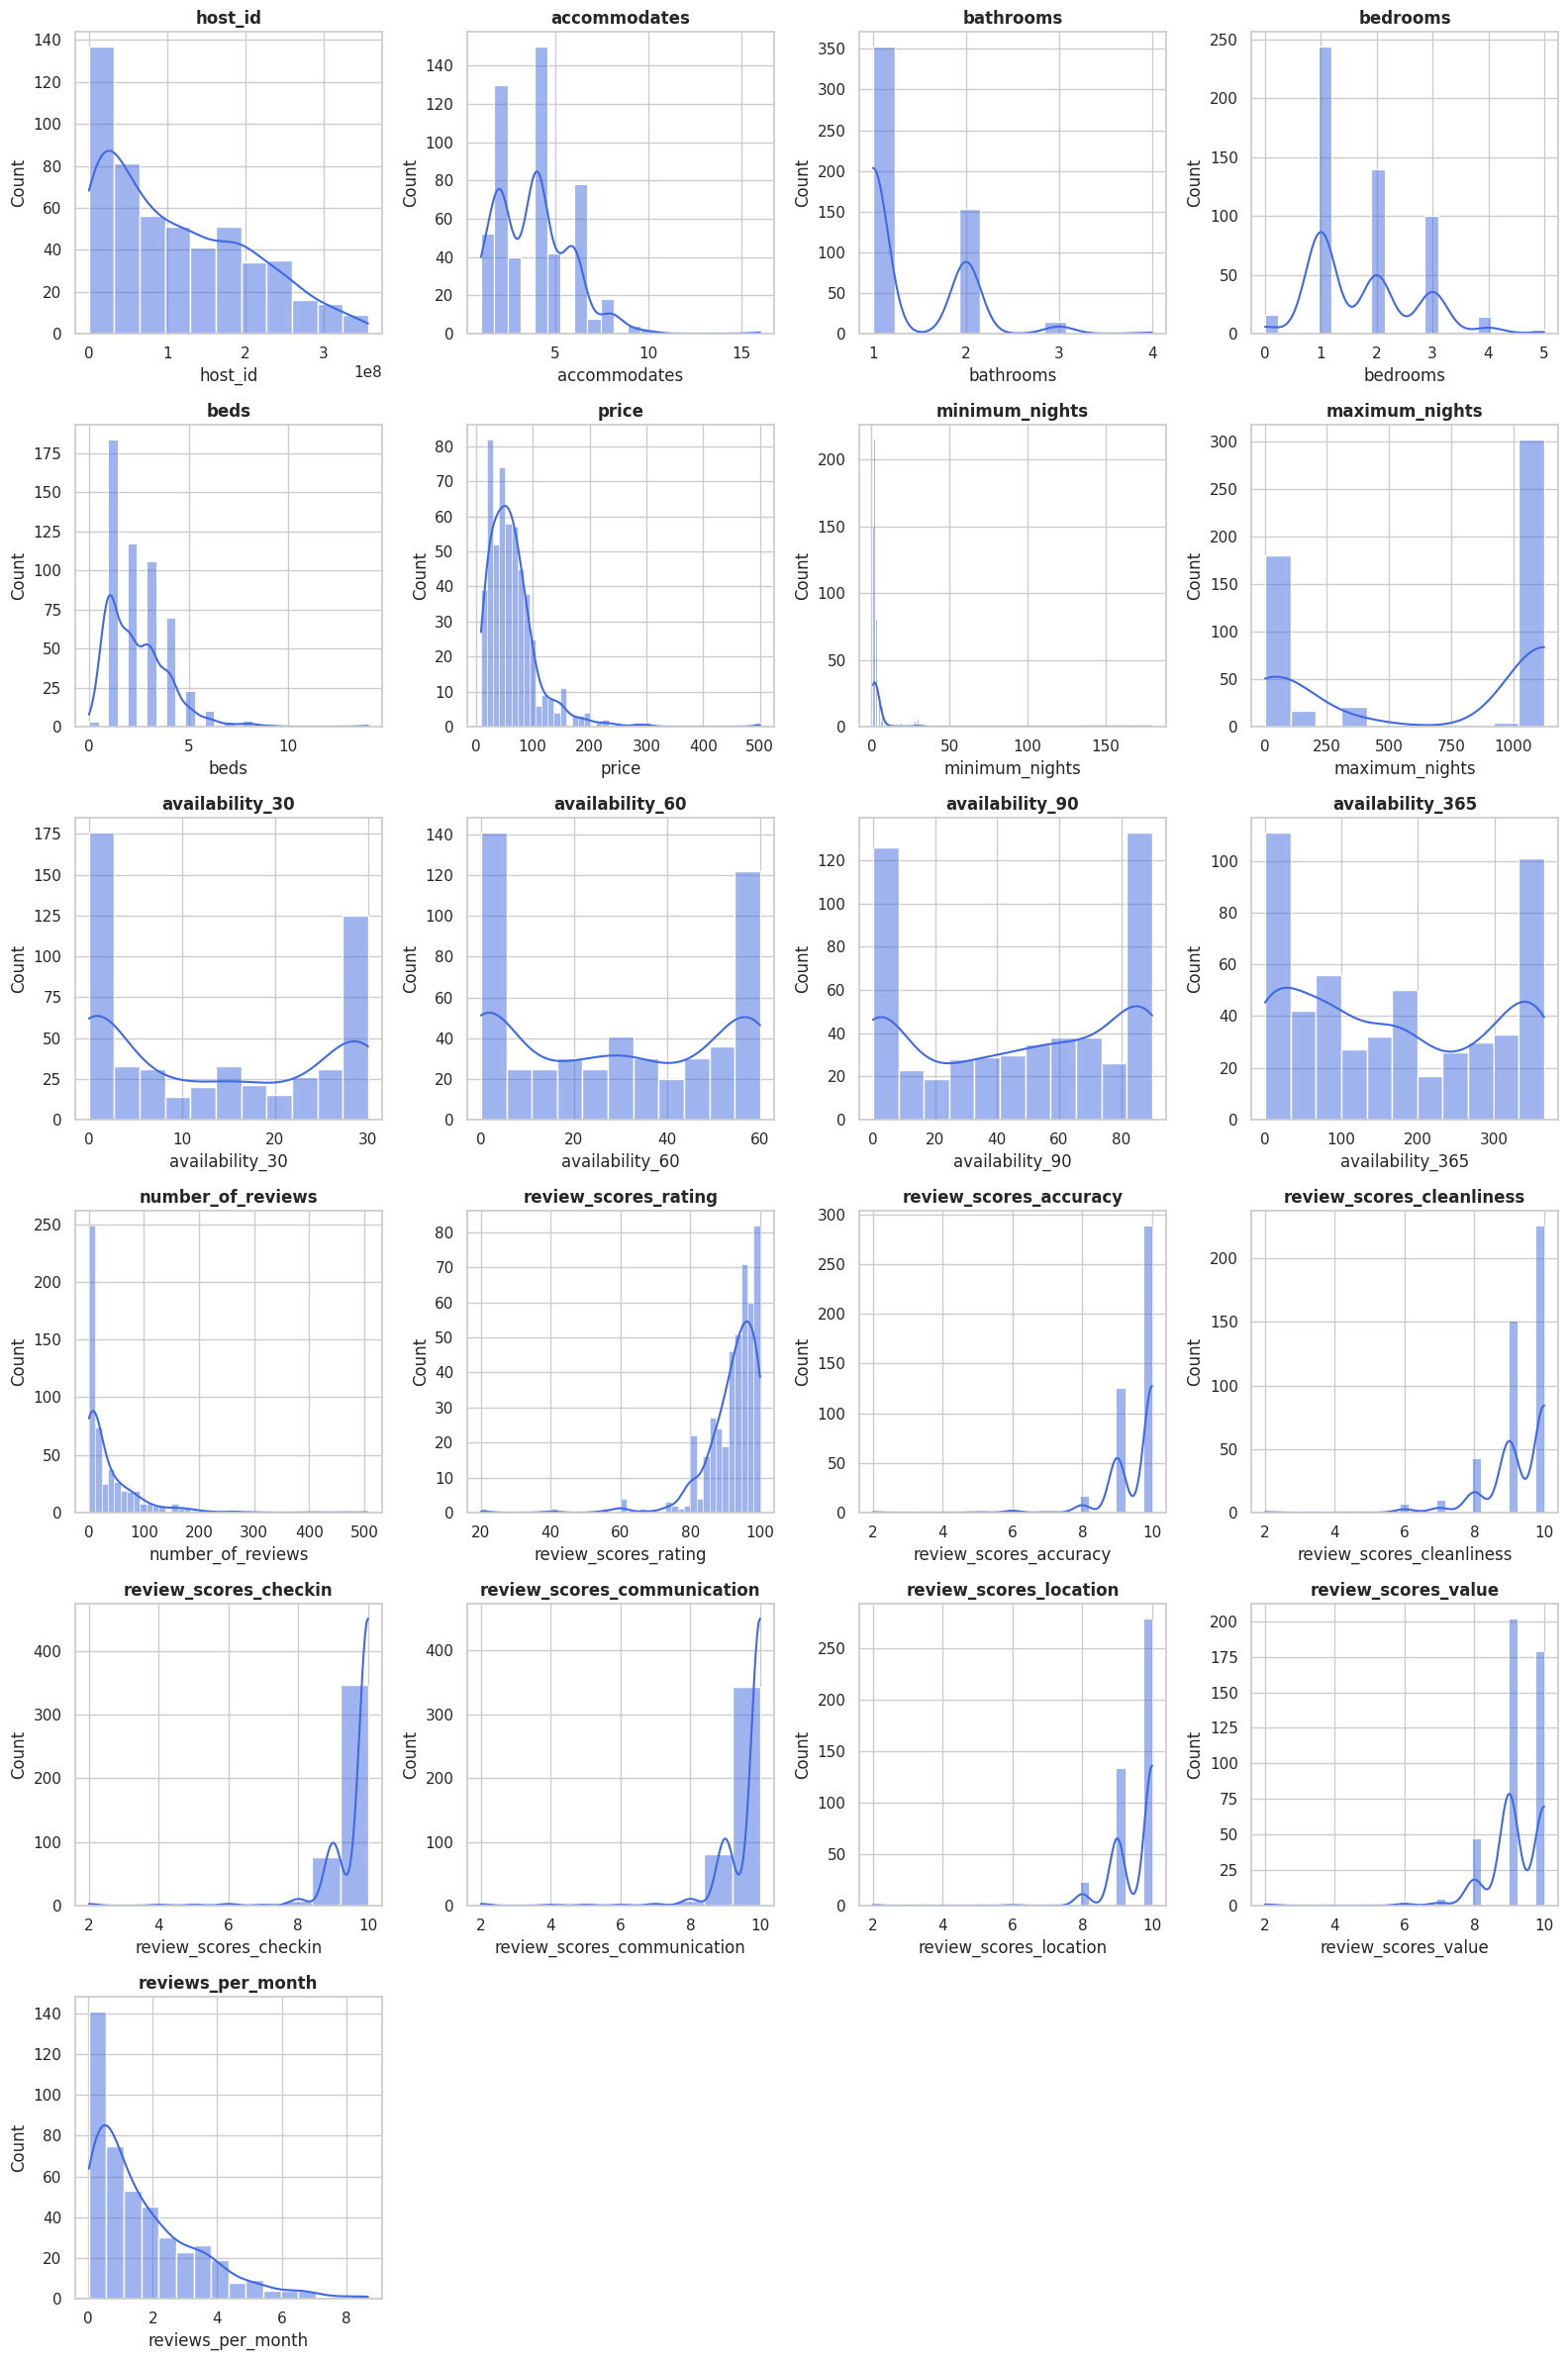

In [ ]:
# Gráfico de distribución para cada variable numérica:

# Configuramos la cantidad de filas y columnas en función de la cantidad de variables (4 columnas por fila)
nrows = (num_vars + 3) // 4  # 4 columnas por fila

# Creamos la figura, los ejes y el tamaño de los gráficos:
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un gráfico para cada variable numérica
for i, column in enumerate(df_numericas_V.columns):
    sns.histplot(df_numericas_V[column], kde=True, ax=axes[i], color="royalblue", alpha=0.5)
    axes[i].set_title(column, fontsize=12, fontweight="bold")

# Eliminamos gráficos vacíos (si los hubiera):
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico:
plt.show()

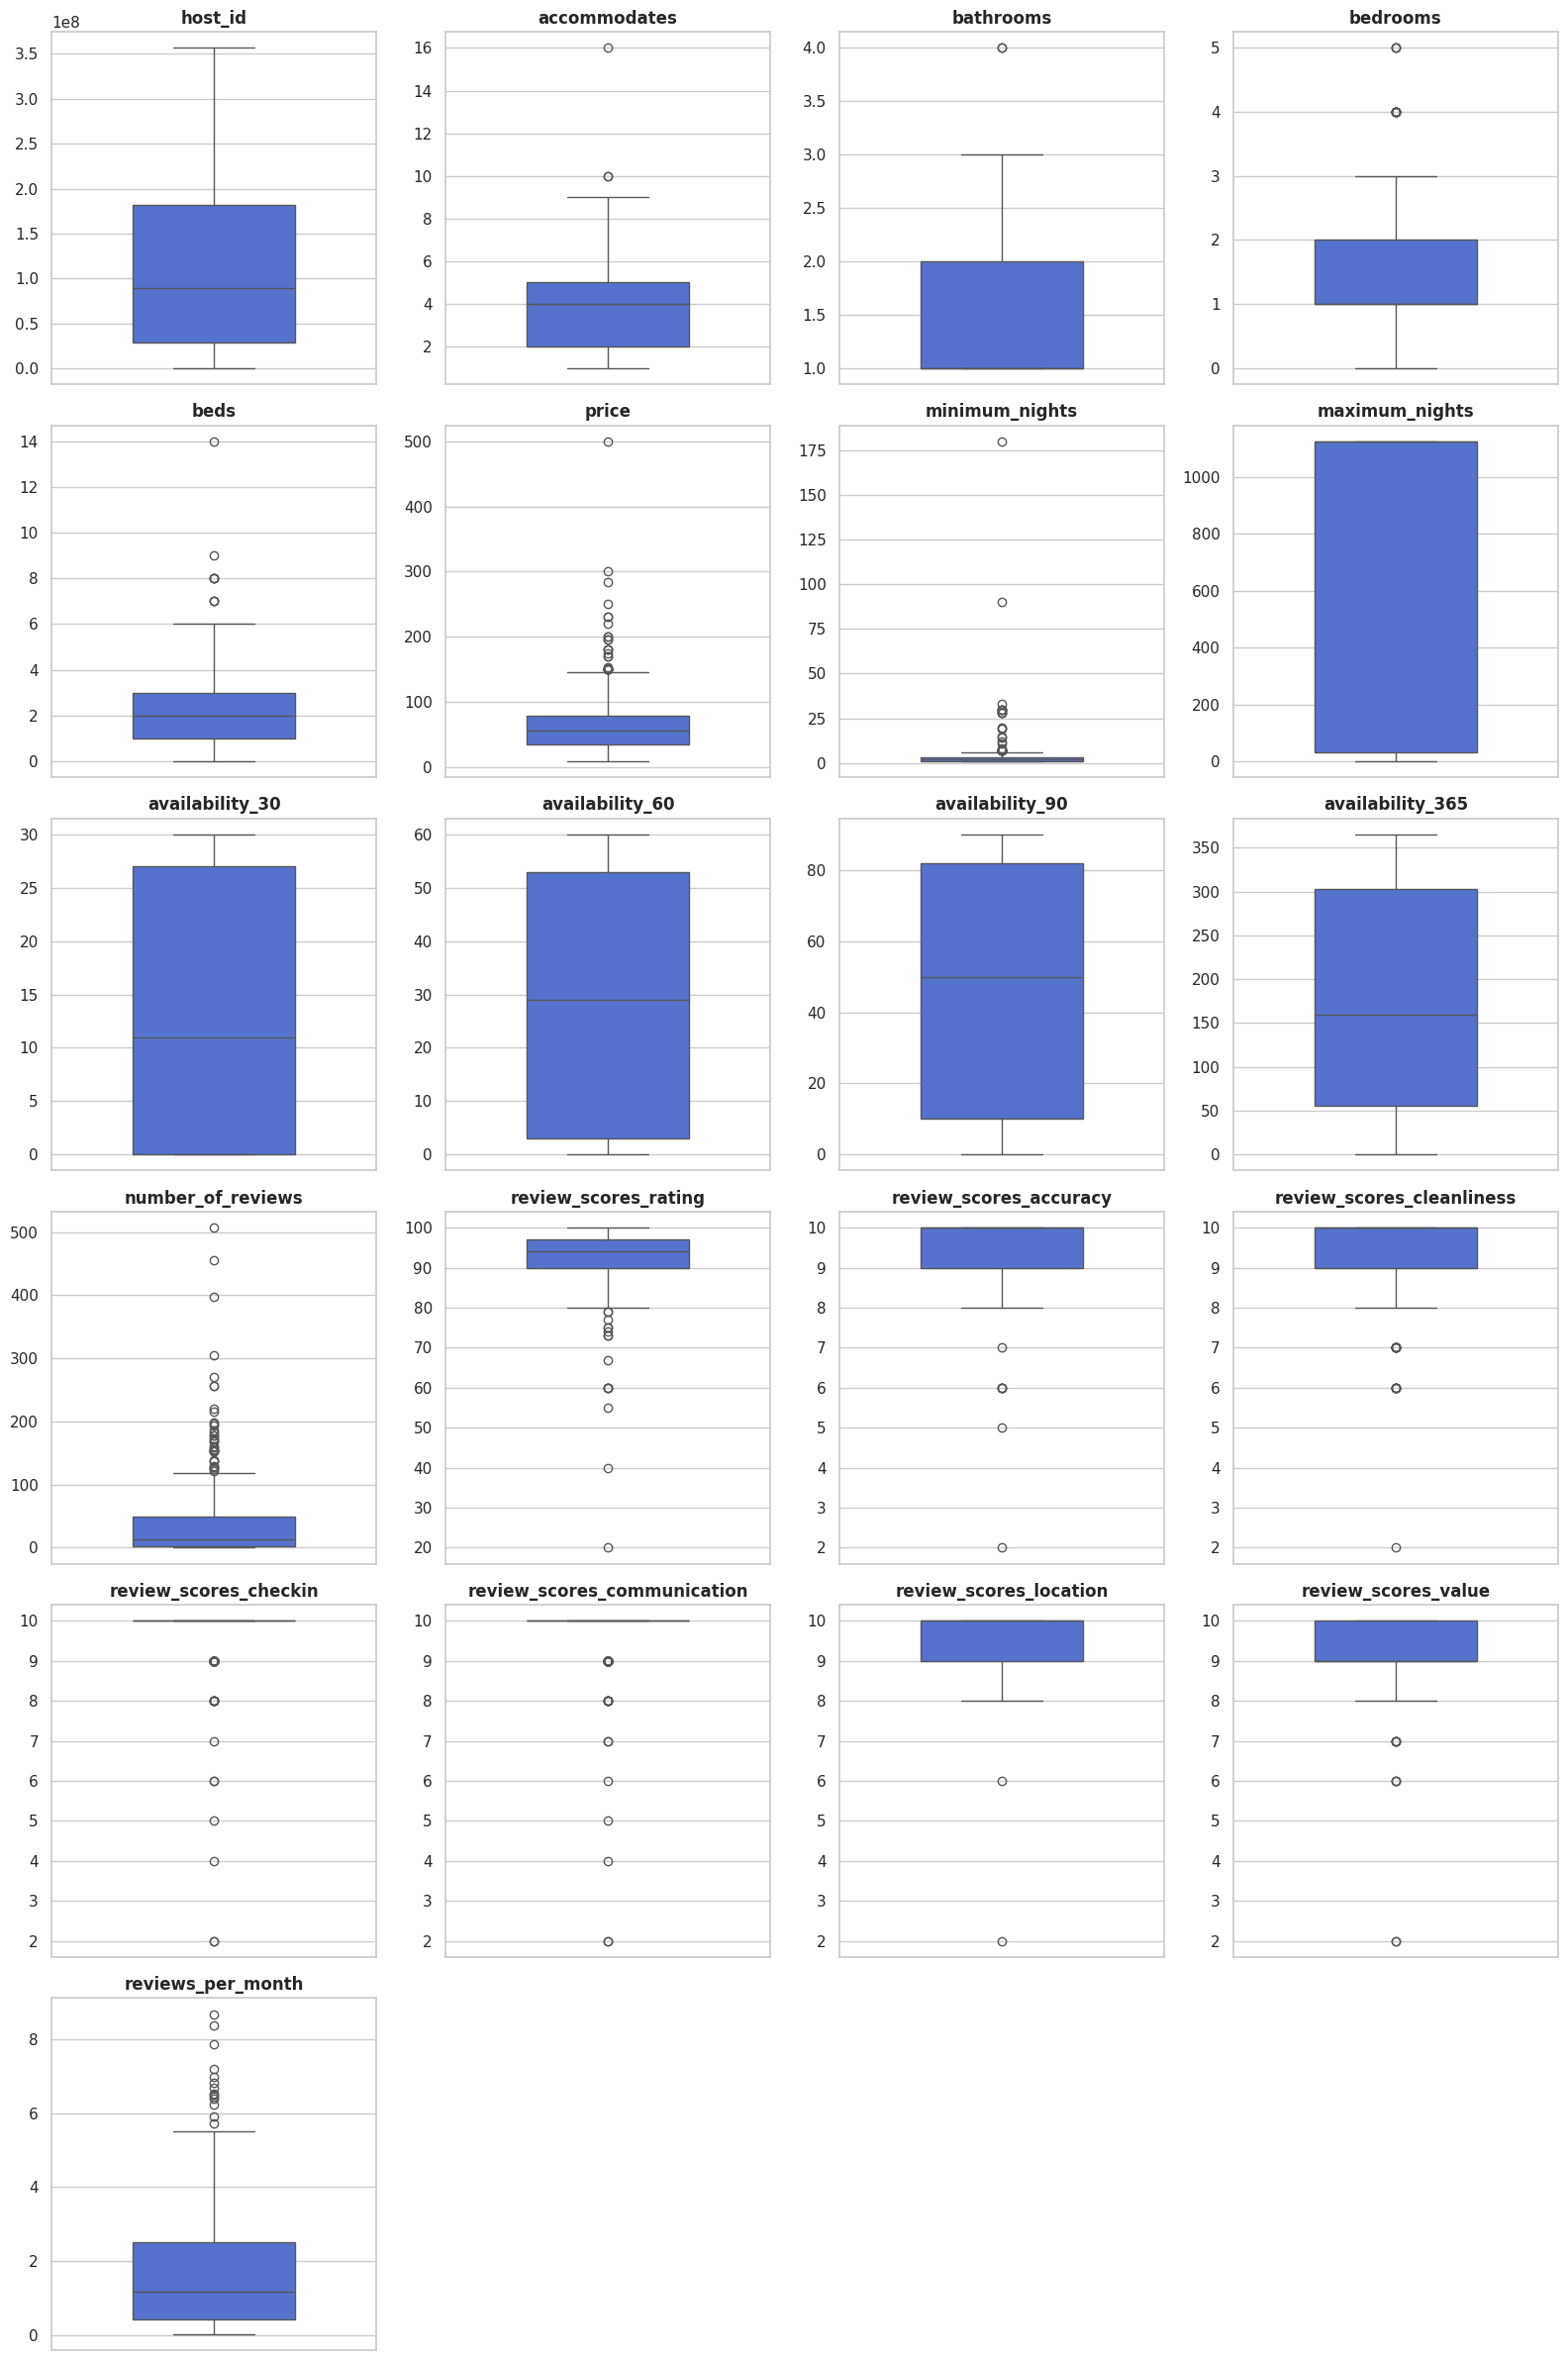

In [ ]:
# Gráfico de bigotes para cada variable numérica.

# Creamos la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows * 4))  # Ajustamos el tamaño

# Aplanamos los ejes para iterar
axes = axes.flatten()

# Creamos un boxplot para cada variable numérica:
for i, column in enumerate(df_numericas_V.columns):
    sns.boxplot(data=df_numericas_V[column], ax=axes[i], color="royalblue", width=0.5)  # Ajustamos el ancho
    axes[i].set_title(column, fontsize=12, fontweight="bold")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminamos gráficos vacíos (si es que los hay)
for j in range(num_vars, len(axes)):  # Cambié `i + 1` por `num_vars`
    fig.delaxes(axes[j])  # Eliminar los ejes vacíos

# Ajustamos el layout para que los subplots no se solapen
fig.tight_layout()

# Mostramos el gráfico
plt.show()

In [ ]:
# Definimos las columnas que queremos analizar
columnas = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights']

# Creamos una lista para almacenar los resultados
resultados_outliers_V = []

# Iteramos sobre las columnas
for col in columnas:
    # Calculamos el IQR para la columna
    IQR_V = df_clean_valencia[col].quantile(0.75) - df_clean_valencia[col].quantile(0.25)

    # Calculamos la mediana para la columna
    mediana_V = df_clean_valencia[col].median()

    # Calculamos el límite superior para los outliers usando la mediana
    outlier_limite_V = mediana_V + 1.5 * IQR_V.round(2)

    # Contamos los outliers superiores
    outliers_count_V = df_clean_valencia[df_clean_valencia[col] > outlier_limite_V][col].count()

    # Total de datos en la columna
    total_count_V = df_clean_valencia[col].count()  # Usamos .count() para no contar nulos

    # Calculamos el porcentaje de outliers y lo redondeamos a 2 decimales
    outliers_porcentaje_V = round((outliers_count_V / total_count_V) * 100, 2)

    # Añadimos los resultados a la lista
    resultados_outliers_V.append({
        'Columna': col,
        'Mediana': mediana_V,
        'IQR': IQR_V,
        'Outliers': outlier_limite_V,
        'Num_outliers': outliers_count_V,
        'Porcentaje_outliers': outliers_porcentaje_V})

# Convertimos la lista de diccionarios en un DataFrame
df_resultados_outliers_V = pd.DataFrame(resultados_outliers_V)

# Mostramos el DataFrame con los resultados
df_resultados_outliers_V.head(6)

Columna  Mediana   IQR  Outliers  Num_outliers  Porcentaje_outliers
0    accommodates      4.0   3.0       8.5             7                 1.33
1       bathrooms      1.0   1.0       2.5            17                 3.25
2        bedrooms      1.0   1.0       2.5           117                22.63
3            beds      2.0   2.0       5.0            19                 3.64
4           price     56.0  44.0     122.0            42                 8.00
5  minimum_nights      2.0   2.0       5.0            38                 7.24

Vamos a analizar los outlayers en la variable PRECIO.

In [ ]:
#Diagrama de bigotes

fig = px.box(df_clean_valencia,x='price',
                 title='Distribución del Precio',
                 labels={'price': 'Precio (€)'},
                 color_discrete_sequence=['royalblue'],
                 width=1300,
                 height=500)

# Personalizamos el gráfico
fig.update_layout(
    yaxis_title='Precio (€)',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior (papel) transparente

# Mostramos la gráfica
fig.show()

*   OUTLIERS PRECIO


In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_precio_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'price', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outliers_precio_V = df_clean_valencia[df_clean_valencia['price'] > limite_superior_precio_V]

df_outliers_precio_V.sample(2)

apartment_id                               md5  \
579       12733122  704355872cd2b880d1e09d145da21087   
6726       3773519  021abf0b52fe8ed62b0f59cd0eb4f35e   

                                     name  \
579   APARTAMENTO EN PLAYA CON ZONA SPORT   
6726                 Céntrico apartamento   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
579   APARTAMENTO EN PRIMERA LINEA DE PLAYA EN URBANIZACIÓN CON AMPLIA ZONA DEPORTIVA, PISCINAS, CAMPO DE FÚTBOL, PISTAS DE TENIS Y BASKET, CONSERGERIA , RESTAURANTE, SUPERMERCADO A 20' DE VALENCIA, A 10´DE LA ALBUFERA, A 15' DE LA CIUDAD DE LAS CIENCIAS Y 10' ANDANDO AL POBLADO MARITIMO DEL PERELLO CON TODOS LOS SERVICIOS, CAFETERIAS, RESTAURANTES,..... En estancias de un mes completo se puede ajustar el precio** GRAN APARTAMENTO DE 5 HABITACIONES Y CAPACIDAD PARA 8-10 PERSONAS, IDEAL PARA FAMILIAS CON NIÑOS EN VERANO. LUMINOSO, SOLEADO Y CON INCREIBLES VISTAS AL MAR Y LA ALBUFERA. PARA ESTANCIAS LARGAS FUERA DE TEMPORADA PUEDEN HACERSE MAYORES DESCUENTOS. TODOS LOS SERVICIOS: ZONA DEPORTIVA, SUPERMERCADO, RESTAURANTE, PRÓXIMO AL PUEBLO DE EL PERELLO A 10' ANDANDO Y A LOS LUGARES MAS BONITOS DE VALENCIA: CIUDAD DE LAS CIENCIAS, ALBUFERA, PUERTO, OTRAS PLAYAS,..... PUEDO OFRECER INFORMACIÓN DE LOS LUGARES DE INTERÉS TANTO DE VALENCIA COMO DE SUS ALREDEDORES, GASTRONOMIA, FIESTAS POPULARES,..   
6726                                                                                                                                                                                                                                 El apartamento para 4 personas esta en un edificio nuevo en el barrio del Carmen. Ubicación perfecta para disfrutar la ciudad, cerca de monumentos, museos, zonas de tiendas, bares y restaurantes. Muy bien comunicado con transporte público con el resto de la ciudad. A 5 min. del autobús a la playa. El apartamento es para 4 personas. Está equipado con toallas y ropa de cama. Todas las habitaciones cuentan con ventiladores de techo. El baño cuenta con secador para el pelo. Si está interesado en más gente , podemos organizar alojamiento en dos apartamentos más en el mismo edificio (2 apartamentos para 4 personas cada uno). El apartamento está preparado con los mapas de la ciudad, transporte público, información de las zonas de interés y diversos materiales promocionales.   

       host_id  \
579   67159002   
6726  14597325   

                                                                                                                                                                                           neighborhood_overview  \
579   A PRIMERA LINEA DE LA PLAYA, ZONA MUY TRANQUILA Y RESIDENCIAL PERO MUY CERCA DE RESTAURANTES, DISCOTECAS Y PUBS, POBLADOS MARITIMOS CERCANOS (SE PUEDE ACCEDER ANDANDO O EN BICICLETA). PLAYA EXCEPCIONAL.   
6726                                                                                                                                                                                           

*   OUTLIERS HUESPEDES:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_accom_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'accommodates', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_accom_V= df_clean_valencia[df_clean_valencia['accommodates'] > limite_superior_accom_V]

df_outlayers_accom_V.sample(3)

apartment_id                               md5  \
4441      12902044  1d18170d859d934be0703c4a6ce0acee   
368       24520266  8e5bc6716e4558a3ffbcf622d996ae0b   
6554      33017452  e17cda572c803e92909a032e311329b3   

                                                  name  \
4441                             Piso valencia capital   
368   Apartment near the Historic PORT!!! withTerrace)   
6554         NUEVO ideal FAMILIAS! Entre playa&centro!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
4441                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Piso de tres habitación 2 baños cocina salón/comedor , con el metro debajo de casa ( san Isidro ) bus, renfe , que también te lleva al circuito de Ricardo tormo en 4 paradas de renfe genial barrio con restaurantes,bares,parques,farmacias,tranquilo y acogedor, se alquila entero a partir de 7 personas y por habitación si son  3 o menos El salón , La Cocina , hay dos baños en el piso   
368   Un piso en la planta baja, con terraza.Esta ubicado cerca del un hermoso puerto historico. El calle es tranquilo. En el barrio hay muchos cafés y restaurantes. La parada de transporte publico esta a 1min (tranvía, metro y autobuses). Es posible aparcar bicicletas en el (Website hidden by Airbnb) posible aparcar su coche de forma gratuita en la calle,o en un gran aparcamiento gratuito cerca del puerto. Очень просторная, уютная и комфортабельная квартира Большая просторная гостинная комната . 2 уютные спальни с выходом на террасу. На терассе имеется 2 удобных кресла и столик. кухня со всем необходимым для приготовления еды. санузел . Всегда на связи. Отвечаю на все звонки и sms ( так же (Hidden by Airbnb) и viber) Квартира находится на колоритной улочке ,выходящей к живописному порту.в округе множество кафе и ресторанов.набережная и пляж в 7мин хотьбы Вы сможете пользоваться любым транпортом,трамвайная и автобусная остановка в 2мин хотьбы и большая конечная станция метро связана с трамва   
6554  Casa acogedora y moderna con TODO EL MOBILIARIO y colchones a ESTRENAR. Ideal para FAMILIAS y gente muy tranquila con ganas de disfrutar de la ciudad y de la playa por su buena conexión en trasporte público. A 10'' de la playa, del centro,casco antiguo, estación RENFE y 30'' del aeropuerto.   Situada en el Barrio de Benimaclet zona de moda y bohemia, con supermercado enfrente de casa  y numerosos restaurantes a precios bajos en la calle paralela. El apartamento cuenta con ropa de cama y toallas.  La cocina 

*   OUTLIERS BAÑOS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bath_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'bathrooms', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_bath_V= df_clean_valencia[df_clean_valencia['bathrooms'] > limite_superior_bath_V]

df_outlayers_bath_V.sample(3)

apartment_id                               md5  \
6075      19528420  89e0dd5156198ff6778dec56d60cc2ce   
5373      43788015  3e65d73c778d89ae04e65cf80c3b67ea   
6384      33898606  3f4954590125a6d3ce8dd0a33a0ed982   

                                        name  \
6075      Apartamento junto al Oceanografic.   
5373  CASA SEÑORIAL JUNTO AL JARDIN DE AYORA   
6384  PISO SEÑORIAL EN EL CENTRO DE VALENCIA   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
6075  Viajar a Valencia es sinónimo de visitar la Ciudad de las Artes y las Ciencias. Este conjunto de edificios os esperan en el último tramo de los jardines del antiguo cauce del Turia ,antes de su encuentro con el mar. Desde el balcón podrás disfrutar de sus vistas y a menos de 100 metros hay dos grandes centros comerciales y de ocio . Apartamento moderno y muy luminoso completo con tres habitaciones , tres baños,un despacho,comedor y cocina totalmente equipada.  Garaje incluido para un vehículo. Es un apartamento muy amplio y luminoso. Sus vistas son espectaculares y la zona es muy tranquila. La cocina está completamente equipada. Tres baños ,importante cunado se va en grupo. Y las camas dobles son talla King Sice. Por teléfono (PHONE NUMBER HIDDEN) y por correo electrónico (EMAIL HIDDEN) En esta zona se encuentran los locales y restaurantes más "cool" y exclusivos de la ciudad , muy cerca de El Marina Beach Club uno de los espacios de moda de Valencia. Puedes encontrar de todo tranquili   
5373                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Alojamiento recientemente actualizado, con 4 habitaciones dobles, para 8 personas, todas las habitaciones con 1 cama doble, escritorio y armario. Cocina,  salón comedor, 2.5 baños y una pequeña terraza interior.   
6384  Espectacular apartamento CÉNTRICO de estilo SEÑORIAL.  Amplias estancias, salón y comedor a fachada con balcón, al igual que la suite principal, con baño incorporado y zona de vestidor.  Amplia cocina con todos los electrodomésticos, con zona de office, y dos habitaciones mas a patio trasero, MENUDO PATIO! con  impresionante jardín,  una de ellas con su baño propio y mirador acristalado con espectaculares vistas. El apartamento forma parte de un edificio que goza de un encanto único debido a sus encantadoras zonas comunes, gran zaguán, escaleras,

*   OUTLIERS HABITACIONES


In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_bedr_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'bedrooms', 'Outliers'].values[0]

# Filtramos el DataFrame para obtener los outliers
df_outlayers_bedr_V= df_clean_valencia[df_clean_valencia['bedrooms'] > limite_superior_bedr_V]

df_outlayers_bedr_V.sample(3)

apartment_id                               md5  \
3705       5507860  aa61ba3d62eb4e80588863348bcce547   
5344      12954683  5017e08f1cbbb21bef5d289d3775459e   
1477      43188393  495c06dbb775147b6590e71186e9a9cb   

                                                name  \
3705   Sunny Design apartment Parking M + Wifi + A/C   
5344           Attic with terrace in the city centre   
1477  Apartamento en zona cabanyal cerca de la playa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
3705  Deseign apartment completely refurnished. Main room with king bed. 2 more individual bedrooms. Great diningroom with beautiful views. Kitchen full-equiped.  Neighbourhood is really quite and just 10 min away walking from the city center. Many parks around and the Arena shoping mall nearby.  Wifi + parking (for medium cars and patient drivers).  VT (Phone number hidden by Airbnb) V (Cat. Estandard) I love traveling and I love hosting people.  I offer my house because we many times are at our town 100km away from Valencia.  Don't hesitate to contact us if you have any doubt. We will be pleased to be part of your wonderfull stay at Valencia. All the apartment will be yours. We love to stay in touch. We love helping visitors to maximize their stay at Valencia. We are always on: (Hidden by Airbnb) , phone... Neighbourhood is really quite.  There's a school just under the aparment. Kids will be playing around 10am, and 12pm. After that, quietness.  You'll reach the city center after a 10min    
5344                                                                                                                                               Located in the neighborhood of Russafa, the apartment has 110 square meters plus a terrace of 10 meters with a bbq. It has very high ceilings and is all painted in white, has a huge living room and all the rooms. Best location to discover the city centre, charming ambient, and a lot of space and natural light You can use th whole house. Feel at home. I will be allways available via WhatsUp or AirBNB. Most trendy quarter in the city centre. You better move afoot, by bycicle or underground. It is very diffucult to park the car in the street, but there is a paying parking in next street. For any problem or emergency at home you can knok the door next to mine, our neighbour Julian will help you. The municipality of València allows to rend one appartment per person without needing a license. You can check the legal text here: (Website hidden by Airbnb)   
1477                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

*   OUTLIERS CAMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_beds_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'beds', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_beds_V= df_clean_valencia[df_clean_valencia['beds'] > limite_superior_beds_V]

df_outlayers_beds_V.sample(3)

apartment_id                               md5  \
6811      42436953  d6140ec632a833601cd42d0ded3e165d   
2840       5454114  baeae2a77136cff9f6ce7be47b87ee96   
157        8893111  3f14da169eafd6b2183e14412721aeb0   

                                  name  \
6811      Valencia Beach House Terrace   
2840      Casa Jardines Juan Martorell   
157   Apartment 3 RuzafaRooms Valencia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
6811                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Casa-Chalet de 5 dormitorios y 3 baños, tiene vistas a la playa y el mar, cuenta con dos fabulosas terrazas, ideal para familias y grupos de amigos, en la mejor zona de la la playa de Valencia   
2840                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Impressive 4 bedroom villa in the city centre. VT-332204-V   
157   Cozy apartment in the Ruzafa neighborhood, in the center of Valencia. Apartment with 3 bedrooms and a toilet prepared to accommodate up to 8 guests. It has Wi-Fi, air conditioning, 42" TV, kitchen utensils, sheets and towels. With all services within walking distance of the accommodation, supermarket, restaurants, cafes, pubs ... A short walk from the North Station and very well connected with bus and metro with the rest of the city. Room 1 with a bed of 0.90, a bed of 1.35 and a bed of 1.05 Room 2 with 2 beds of 0.90 and a bed of 1.35 Room 3 with 2 beds of 1.05 Sofa be

*   OUTLIERS NOCHES MINIMAS:

In [ ]:
# Obtendremos varias muestras aleatorias de los Outliers:
limite_superior_min_V = df_resultados_outliers_V.loc[df_resultados_outliers_V['Columna'] == 'minimum_nights', 'Outliers'].values[0]

# Filtramos el DataFrame original para obtener los outliers
df_outlayers_min_V= df_clean_valencia[df_clean_valencia['minimum_nights'] > limite_superior_min_V]

df_outlayers_min_V.sample(3)

apartment_id                               md5  \
7706       9606267  7299c2ddbbc6e2c6169487109f4b78b2   
6431       8021499  e77cbc5567e8ecaa2004b73a78ca21fc   
6726       3773519  021abf0b52fe8ed62b0f59cd0eb4f35e   

                                        name  \
7706        Cercano a la cuidad de las Artes   
6431  Attic in strategic place in the center   
6726                    Céntrico apartamento   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
7706                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Es un apartamento 'en medio de todo'. Esto es, lo mas cerca que se puede estar del Centro,de la Playa y de la Ciudad de las Ciencias al mismo tiempo. El barrio tiene todos los servicios y transporte público cercano. Cerca de estacion de metro Amistad   
6431                                                                                                                                                                                                                                                                                                                                                              A family home: convenient, comfy, and designed for the whole family.<br /><br /><b>The space</b><br />You can enjoy the big 30 mq terrace where you can have breackfast, lunch and dinner.<br />During the hot summer you can stay in with really comfortable fresh air and without any noise cause of the hi quality new windows. Fireworks proof.<br /><br /><b>Guest access</b><br />All exept a small storage room located in the terrace   
6726  El apartamento para 4 personas esta en un edificio nuevo en el barrio del Carmen. Ubicación perfecta para disfrutar la ciudad, cerca de monumentos, museos, zonas de tiendas, bares y restaurantes. Muy bien comunicado con transporte público con el resto de la ciudad. A 5 min. del autobús a la playa. El apartamento es para 4 personas. Está equipado con toallas y ropa de cama. Todas las habitaciones cuentan con ventiladores de techo. El baño cuenta con secador para el pelo. Si está interesado en más gente , podemos organizar alojamiento en dos apartamentos más en el mismo edificio (2 apartamentos para 4 personas cada uno). El apartamento está preparado con los mapas de la ciudad, transporte público, información de las zonas de interés y diversos materiales promocionales.   

       host_id  \
7706  28453116   
6431  15277754   
6726  14597325   

                                                                                                                                                                                                                         neighborhood_overview  \
7706                                                                                                                        

###2.5 Coordenadas

In [ ]:
#Quitamos todos los puntos en las columnas 'latitude' y 'longitude'
df_clean_valencia['latitude_clean'] = df_clean_valencia['latitude'].str.replace('.', '', regex=False)
df_clean_valencia['longitude_clean'] = df_clean_valencia['longitude'].str.replace('.', '', regex=False)

# Convertimos las columnas 'latitude_clean' y 'longitude_clean' a números
df_clean_valencia['latitude_clean'] = pd.to_numeric(df_clean_valencia['latitude_clean'], errors='coerce')
df_clean_valencia['longitude_clean'] = pd.to_numeric(df_clean_valencia['longitude_clean'], errors='coerce')

# Transformamos la 'latitude_clean': primeros 2 dígitos para "40," y el resto tras la coma
df_clean_valencia['latitude_trasfor'] = df_clean_valencia['latitude_clean'].astype(str).str[:2] + '.' + df_clean_valencia['latitude_clean'].astype(str).str[2:]

# Transformamos la 'longitude_clean': primer dígito "-0," y el resto tras la coma
df_clean_valencia['longitude_trasfor'] = '-0.' + df_clean_valencia['longitude_clean'].astype(str).str[1:]

df_clean_valencia = df_clean_valencia.drop(columns=['latitude', 'longitude', 'latitude_clean', 'longitude_clean'])


df_clean_valencia.sample(1)

apartment_id                               md5           name  \
2740      20931353  ed4536e2df17352f264477626293c545  Near Paradis.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
2740  Flat in Historical Center of Valencia. Third without elevator, large living room dining room, kitchen bathroom, storage room, balconies to square and street. Totally exterior and sunny. A narrow staircase is next to a market, fruit shops, and police checkpoint. It is an 18th century building All the space of the apartment is at your availability The building is accessed through a code that opens the door, then to enter the apartment, there is a small box with another code, right at the door. When you open it, there are the house keys. This code is sent a few days before arrival. From December 14 to January 10, 2018 I will not be in Valencia. However we will contact through telephone messages and other chat programs. Five minutes from Plaza de la Mare de Deu, cathedral, museum of ethnology, prehistory and a stop of municipal bicycles and other private rental. Carmen is home to the alternative / underground of Valencia. It is the oldest, the most diverse, cosmopolitan, curious and bohemi   

      host_id  \
2740  9677236   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         neighborhood_overview  \
2740  Five minutes from Plaza de la Mare de Deu, cathedral, museum of ethnology, prehistory and a stop of municipal bicycles and other private rental. Carmen is home to the alternative / underground of Valencia. It is the oldest, the most diverse, cosmopolitan, curious and bohemian nigthlife area of the city. Canovas - Nightlife, bars, night-clubs, pubs and discos in Juan Llorens, Valencia, Spain View location on (Hidden by Airbnb) Maps View Carmen Listings View Carmen Nightlife Map There is no other district here where you will find a punk bar, a reggae smoking den, a retro chill-out lounge, a jazz basement, an underground trance mix, an intelligencia meeting point, a goth dungeon, a gay bar, latino tunes, caribbean heat and a twisted bohemian art-cave, all within a short walk of each 

In [ ]:
print(df_clean_valencia['latitude_trasfor'].dtype)
print(df_clean_valencia['longitude_trasfor'].dtype)

object
object


In [ ]:
# Convertimos las columnas a tipo float
df_clean_valencia['latitude_trasfor'] = pd.to_numeric(df_clean_valencia['latitude_trasfor'], errors='coerce')
df_clean_valencia['longitude_trasfor'] = pd.to_numeric(df_clean_valencia['longitude_trasfor'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df_clean_valencia['latitude_trasfor'].dtype)
print(df_clean_valencia['longitude_trasfor'].dtype)

float64
float64


## **3. Análisis de correlaciones con el precio:**

In [ ]:
# Selecionamos los valores numericos para realizar una correlacion solo de Madrid:
df_clean_valencia_num = df_clean_valencia._get_numeric_data()
df_clean_valencia_num = df_clean_valencia_num.drop(columns=['apartment_id'])
df_clean_valencia_num.corr()

host_id  accommodates  bathrooms  bedrooms  \
host_id                      1.000000     -0.134195  -0.068261 -0.123630   
accommodates                -0.134195      1.000000   0.361270  0.779763   
bathrooms                   -0.068261      0.361270   1.000000  0.464314   
bedrooms                    -0.123630      0.779763   0.464314  1.000000   
beds                        -0.127252      0.830069   0.400730  0.749806   
price                       -0.127992      0.597377   0.358030  0.493868   
minimum_nights              -0.076946      0.001184  -0.010028  0.041591   
maximum_nights              -0.030966      0.122387   0.015081  0.030870   
availability_30              0.011126     -0.065673  -0.020439 -0.075353   
availability_60             -0.028165     -0.091417  -0.042989 -0.107083   
availability_90             -0.029196     -0.094980  -0.049476 -0.108873   
availability_365            -0.155357      0.035206   0.060611 -0.018252   
number_of_reviews           -0.222834     -0.036173  -0.077004 -0.110198   
review_scores_rating        -0.041394     -0.072617  -0.017797 -0.030100   
review_scores_accuracy      -0.060242     -0.041494  -0.025826 -0.020281   
review_scores_cleanliness   -0.088091     -0.007242  -0.022338 -0.031295   
review_scores_checkin        0.029685     -0.023281  -0.052933 -0.025000   
review_scores_communication -0.081269      0.042243  -0.018106  0.015621   
review_scores_location       0.003378     -0.081605  -0.020787 -0.125951   
review_scores_value         -0.103506     -0.081860  -0.010364 -0.058010   
is_instant_bookable          0.224312      0.021937  -0.089440 -0.093071   
reviews_per_month            0.069211     -0.077313  -0.163708 -0.188397   
latitude_trasfor            -0.054661     -0.142481  -0.122028 -0.173306   
longitude_trasfor            0.068383      0.160468   0.089122  0.154154   

                                 beds     price  minimum_nights  \
host_id                     -0.127252 -0.127992       -0.076946   
accommodates                 0.830069  0.597377        0.001184   
bathrooms                    0.400730  0.358030       -0.010028   
bedrooms                     0.749806  0.493868        0.041591   
beds                         1.000000  0.531888       -0.007235   
price                        0.531888  1.000000        0.015408   
minimum_nights              -0.007235  0.015408        1.000000   
maximum_nights               0.127824  0.064441       -0.025892   
availability_30             -0.052836  0.082940        0.022802   
availability_60             -0.074898  0.057446        0.039935   
availability_90             -0.076489  0.046788        0.051177   
availability_365             0.041783  0.160094        0.010091   
number_of_reviews           -0.076736 -0.103217       -0.031050   
review_scores_rating        -0.083816  0.051030       -0.021711   
review_scores_accuracy      -0.051303  0.021627        0.012932   
review_scores_cleanliness   -0.029538  0.090906        0.033292   
review_scores_checkin       -0.064983 -0.009995        0.044123   
review_scores_communication  0.016851  0.030338        0.046021   
review_scores_location      -0.096215  0.077533       -0.025512   
review_scores_value         -0.084963  0.037337        0.014406   
is_instant_bookable         -0.009626 -0.019433       -0.076293   
reviews_per_month           -0.150725 -0.189296       -0.091940   
latitude_trasfor            -0.165294 -0.104246       -0.037974   
longitude_trasfor            0.160403  0.137976        0.025805   

                             maximum_nights  availability_30  availability_60  \
host_id                           -0.030966         0.011126        -0.028165   
accommodates                       0.122387        -0.065673        -0.091417   
bathrooms                          0.015081        -0.020439        -0.042989   
bedrooms                           0.030870        -0.075353        -0.107083   
beds                               0.127824     

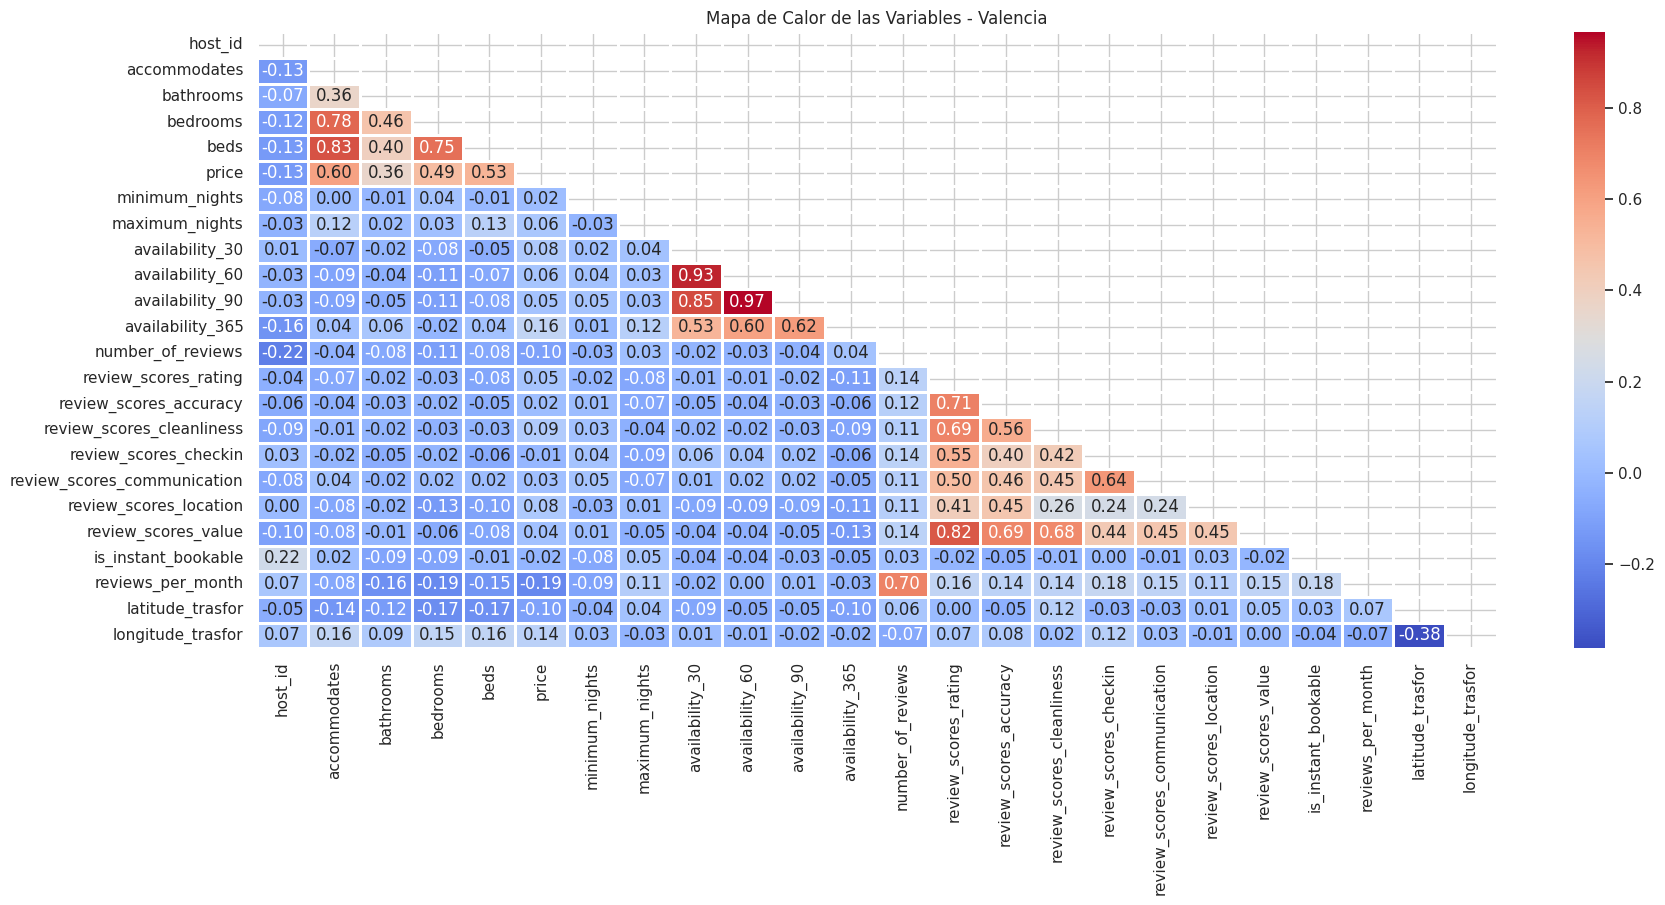

In [ ]:
# se crea una máscara para la parte superior para no duplicar correlaciones:
mask = np.triu(np.ones_like(df_clean_valencia_num.corr(), dtype=bool))

# Heatmap:
plt.figure(figsize=(20, 8))

sns.heatmap(df_clean_valencia_num.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.9)

# Se añade un título al heatmap
plt.title('Mapa de Calor de las Variables - Valencia')

# Mostramos el gráfico
plt.show();

In [ ]:
# Vamos a calcular las correlaciones con la variable 'price'
Corr_price_valencia = df_clean_valencia_num.corr()["price"].sort_values(ascending=False).round(2) * 100

# Convertimos la serie de correlaciones a un DataFrame
Corr_price_valencia_df = Corr_price_valencia.reset_index()
Corr_price_valencia_df.columns = ['Variable', 'Correlación']

# Gráfico de barras.
fig4 = px.bar(Corr_price_valencia_df,
             x='Variable',
             y='Correlación',
             color='Correlación',
             title='Correlación de las variables con el Precio',
             labels={'Variable': 'Variable', 'Correlación': 'Correlación (%)'},
             template='plotly',
             text='Correlación',
             color_continuous_scale=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig4.update_layout(
    xaxis_title='Variables del DataFrame',
    yaxis_title='Correlación (%)',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=500,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
)

# Mostrar el gráfico
fig4.show();

No hay una correlación evidente del precio con ninguna de las variables numéricas del data set.

## **4. Análisis de las variables categóricas con el precio:**

### 4.1 Tipo de habitacion

In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_valencia'
room_type_counts = df_clean_valencia['room_type'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig5 = px.bar(room_type_counts,
             x='room_type',
             y='count',
             color='room_type',
             title='Distribución de Tipos de Habitación en Valencia',
             labels={'room_type': 'Tipo de Habitación', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1000,  # Ajusto el ancho del gráfico
    height=400,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

El mayor número de alojamientos en Airbnb son apartamentos o casas enteras

In [ ]:
#Determinamos la mediana de los precios en función del tipo de apartamento:

from tabulate import tabulate

# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Valencia y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats_V = df_clean_valencia.groupby('room_type').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por tipo de habitación
    median_price=('price', 'median'),
    mean_price=('price', 'mean'),
     mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats_V = room_stats_V.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats_V, headers='keys', tablefmt='pretty'))

+---+-----------------+------------------+--------------+------------+------------+
|   |    room_type    | apartments_count | median_price | mean_price | mode_price |
+---+-----------------+------------------+--------------+------------+------------+
| 1 |   Hotel room    |        3         |     76.0     |    77.0    |    40.0    |
| 0 | Entire home/apt |       361        |     68.0     |   77.78    |    60.0    |
| 2 |  Private room   |       158        |     25.0     |   32.39    |    20.0    |
| 3 |   Shared room   |        3         |     22.0     |   20.33    |    14.0    |
+---+-----------------+------------------+--------------+------------+------------+


In [ ]:
# Se crea un gráfico de bigotes:
fig6 = px.box(df_clean_valencia,
             y="room_type",  # Eje y para las categorías de tipo de habitación
             x="price",      # Eje x para los precios
             color="room_type",
             title="Distribución de precios por tipo de habitación",
             labels={"room_type": "Tipo de Habitación", "price": "Precio"},
             color_discrete_sequence=px.colors.sequential.RdBu)

# Semodifica el diseño para que quede más visual:
fig6.update_layout(
    yaxis_title="Tipo de Habitación",
    xaxis_title="Precio",
    boxmode="group",  # Agrupamos las cajas por tipo de habitación
    title_font_size=24,
    width=1200,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente

# Se muestra el gráfico
fig6.show()

###4.2 Distrito

In [ ]:
# Filtramos el DataFrame para obtener los tipos de habitaciones en 'df_valencia'
district_type_counts = df_valencia['neighbourhood_district'].value_counts().reset_index()

# Crear el gráfico de barras con Plotly.
fig = px.bar(district_type_counts,
             x='neighbourhood_district',
             y='count',
             color='neighbourhood_district',
             title='Distribución de distritos en Valencia',
             labels={'neighbourhood_district': 'Distrito', 'count': 'Recuento'},
             template='plotly',
             text='count',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de inmuebles',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=1500,  # Ajusto el ancho del gráfico
    height=800,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig.show();

In [ ]:
# Se filtra el DataFrame para obtener el número de alojamientos por districto y calcular el número de apartamentos y el promedio de precios por distrito
district_stats = df_clean_valencia.groupby('neighbourhood_district').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por distrito
    median_price=('price', 'median'),             # Promedio de precios por distrito
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()


# Se ordenan los resultados por conteo de apartamentos en orden descendente
district_stats = district_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(district_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+------------------+--------------+------------+------------+
|    | neighbourhood_district | apartments_count | median_price | mean_price | mode_price |
+----+------------------------+------------------+--------------+------------+------------+
| 15 |    POBLATS DEL SUD     |        10        |     81.5     |    92.2    |    34.0    |
| 6  |    EL PLA DEL REAL     |        12        |     67.0     |   80.42    |    20.0    |
| 16 |    POBLATS MARITIMS    |        98        |     65.0     |    74.7    |    20.0    |
| 7  |       EXTRAMURS        |        38        |     62.5     |   69.21    |    50.0    |
| 9  |       L'EIXAMPLE       |        61        |     60.0     |   63.28    |    50.0    |
| 5  |      CIUTAT VELLA      |       104        |     60.0     |   68.55    |    60.0    |
| 14 |    POBLATS DEL NORD    |        1         |     60.0     |    60.0    |    60.0    |
| 11 |       LA SAIDIA        |        24        |    55.22     |   53.89    |  

In [ ]:
# Creamos el grafico de Bigotes por distrito:
fig3 = px.box(df_clean_valencia,
              y="price",  # Eje y para las categorías de precios
              x="neighbourhood_district",  # Eje x para los distritos
              color="neighbourhood_district",  # Colorear las cajas por distrito
              title="Distribución de Precios por Distrito de Madrid",
              labels={"neighbourhood_district": "Distrito", "price": "Precio"},
              color_discrete_sequence=px.colors.sequential.Bluered)

# Se ajusta el diseño para mejorar la visualización
fig3.update_layout(
    yaxis_title="Precio",
    xaxis_title="Distrito",
    boxmode="group",  # Agrupar las cajas por distrito
    title_font_size=24,
    width=3500,  # Ajustar el ancho del gráfico
    height=1200,  # Ajustar la altura del gráfico
    showlegend=False,  # Ocultar la leyenda ya que no es necesaria
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    boxgap=0,  # Aumenta el tamaño de las cajas (reduce el espacio entre ellas)
    boxgroupgap=0,  # Ajusta la separación entre grupos de cajas
    yaxis=dict(
        tickmode='linear',
        title_font_size=15,
        dtick=50,  # Establece los intervalos de las marcas en 50 unidades
        tickangle=0,
        tickfont_size=12),
    xaxis=dict(
        title_font_size=15,
        tickfont_size=12,
        tickangle=0))  # Rotar las etiquetas del eje x

# Mostrar el gráfico
fig3.show()

###4.3 Distrito y tipo de habitación

In [ ]:
# Se agrupa por distrito y tipo de habitación
price_stats_V = df_clean_valencia.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median'),             # Promedio de precios por distrito
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenar los resultados alfabeticamente por distrito y tipo de habitación
price_stats = price_stats.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(price_stats, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+--------------+
|    | neighbourhood_district |    room_type    | apartments_count | median_price |
+----+------------------------+-----------------+------------------+--------------+
| 1  |      Ciutat Vella      |   Hotel room    |        3         |    150.0     |
| 5  |        Eixample        |   Hotel room    |        11        |    138.0     |
| 4  |        Eixample        | Entire home/apt |       512        |    119.0     |
| 27 |     Sants-Montjuïc     |   Hotel room    |        2         |    114.0     |
| 22 |       Sant Martí       | Entire home/apt |       120        |    109.0     |
| 14 |       Les Corts        | Entire home/apt |        25        |    105.0     |
| 8  |         Gràcia         | Entire home/apt |       112        |     95.0     |
| 26 |     Sants-Montjuïc     | Entire home/apt |       142        |     94.5     |
| 30 |  Sarrià-Sant Gervasi   | Entire home/apt |        60        |     90.

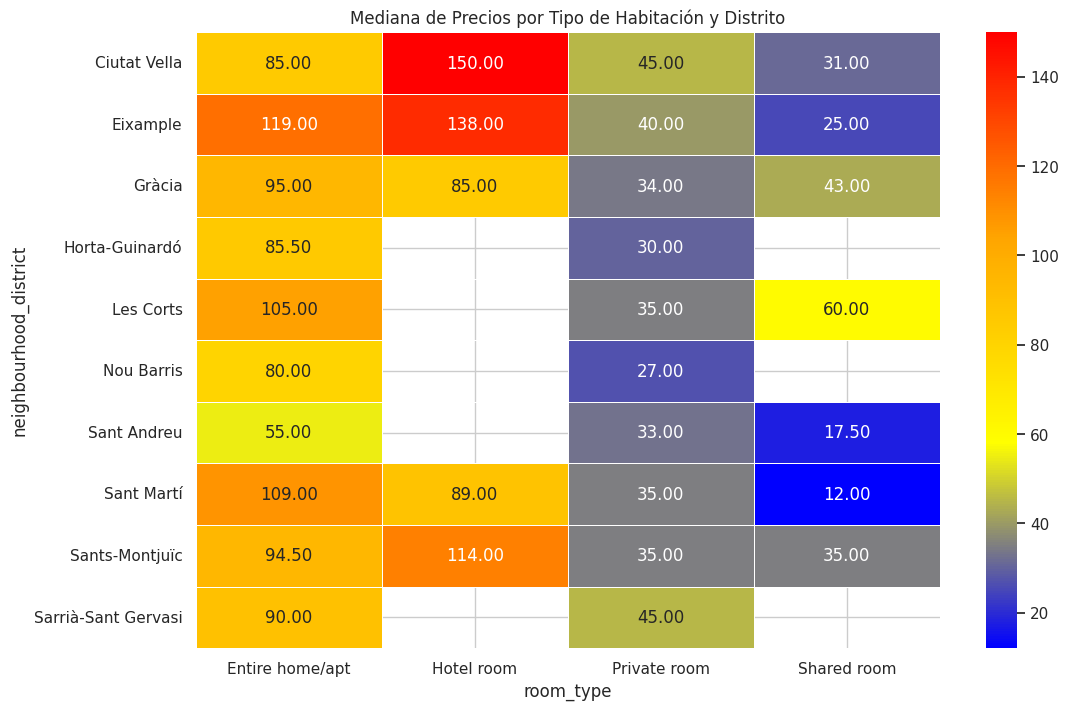

In [ ]:
import matplotlib.colors as mcolors #importamos libreria de colores para crear nuestra paleta
# Se filtra y agrupa el DataFrame

price_stats_V = df_clean_valencia.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),  # Contar número de alojamientos
    median_price=('price', 'median')              # Calcular el promedio de precios
).reset_index()

# Se crea tabla para el heatmap
pivot_table = price_stats.pivot(index='neighbourhood_district', columns='room_type', values='median_price')

# Paleta de colores personalizada
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['blue', 'yellow', 'orange', 'red'])

# Crear el heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, linewidths=.5)

# Añadir un título al heatmap
plt.title('Mediana de Precios por Tipo de Habitación y Distrito')

# Mostrar el gráfico
plt.show()

In [ ]:
# Creamos el gráfico de barras apiladas para la mediana de precios
fig = px.bar(
    price_stats_V,
    x='neighbourhood_district',
    y='median_price',
    color='room_type',
    title='Mediana de Precios por Distrito y Tipo de Habitación Valencia',
    labels={'neighbourhood_district': 'Distrito', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
    barmode='stack',
    color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Distritos por el total de apartamentos
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_tickangle=-45,  # Rotamos etiquetas del eje X
    height=600,
    width=1500)

fig.show()

In [ ]:
# Se agrupa por distrito y tipo de habitación, y se calculan las métricas necesarias
price_stats_V = df_clean_valencia.groupby(['neighbourhood_district', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),    # Contar número de alojamientos
    average_accommodates=('accommodates', 'mean'),  # Calcular el promedio de accommodates
    median_price=('price', 'median'),               # Calcular el promedio de precios
).reset_index()

# Se redondean las columnas numéricas a dos decimales
price_stats_V['median_price'] = price_stats_V['median_price'].round(2)
price_stats_V['average_accommodates'] = price_stats_V['average_accommodates'].round(2)

# Se ordenan los resultados alfabéticamente por distrito y tipo de habitación
price_stats_V = price_stats_V.sort_values(by=['neighbourhood_district', 'room_type'])

# Se muestran los resultados
print(tabulate(price_stats_V, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------------+------------------+----------------------+--------------+
|    | neighbourhood_district |    room_type    | apartments_count | average_accommodates | median_price |
+----+------------------------+-----------------+------------------+----------------------+--------------+
| 0  |        ALGIROS         | Entire home/apt |        9         |         5.22         |     74.0     |
| 1  |        ALGIROS         |  Private room   |        13        |         1.62         |     21.0     |
| 2  |       BENICALAP        | Entire home/apt |        6         |         5.0          |     46.0     |
| 3  |       BENICALAP        |  Private room   |        1         |         2.0          |     15.0     |
| 4  |       BENICALAP        |   Shared room   |        1         |         2.0          |     14.0     |
| 5  |       BENIMACLET       | Entire home/apt |        3         |         7.0          |     70.0     |
| 6  |       BENIMACLET       |  Priv

In [ ]:
# Creamos el gráfico de burbujas
fig = px.scatter(price_stats_V,
    x='neighbourhood_district',  # Eje X: Distrito
    y='median_price',            # Eje Y: Mediana del Precio
    size='average_accommodates',   # Tamaño de la burbuja: Mediana de Accommodates
    color='room_type',            # Color: Tipo de Habitación
    hover_name='neighbourhood_district',  # Mostrar el distrito al pasar el ratón
    size_max= 40,                  # Tamaño máximo de las burbujas
    title='Mediana de Precios y Accommodates por Distrito y Tipo de Habitación',
    labels={
        'neighbourhood_district': 'Distrito',
        'median_price': 'Mediana del Precio (€)',
        'median_accommodates': 'Mediana de Accommodates',
        'room_type': 'Tipo de Habitación'},
     color_discrete_sequence=px.colors.sequential.RdBu)

# Ajustamos el diseño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    height=600,           # Altura del gráfico
    width=1500,)          # Ancho del gráfico

# Mostrar el gráfico
fig.show()

###4.4 Amenities.

In [ ]:
# Vamos a ir por cada observacion a la columna 'amenities_list', la vamos a separar en 'amenities' y vamos a añadir cada una a la lista amenities_full. Como algunas columnas están mal, las añadimos a la lista 'errores'
errores = []
amenities_full_V = []
for i in range(len(df_clean_valencia)):
    try:
        amenities = df_clean_valencia['amenities_list'].iloc[i][1:-1].split(',')
        for item in amenities:
            amenities_full_V.append(item)
    except TypeError:
        errores.append(i)

In [ ]:
# Normalizamos y limpiamos la lista de amenidades
amenities_full_V = [item.replace('"','').strip() for item in amenities_full]

# Hacemos un diccionario con la tabla de frecuencias de cada servicio:
amenities_count = {}
for item in amenities_full_V:
    # Normalizamos el servicio:
    item = item.strip().lower()
    if item not in amenities_count:
        amenities_count[item] = 1
    else:
        amenities_count[item] += 1

# Creamos una lista a partir del diccionario de recuento de servicios
amenities_list_V = list(amenities_count.items())

# Ordenamos la lista basada de manera descendente
amenities_list_V.sort(key=lambda item: item[1], reverse=True)

# Creamos un nuevo diccionario a partir de la lista ordenada
amenities_count_sorted_V = {}
for item in amenities_list_V:
    amenities_count_sorted_V[item[0]] = item[1]


# Convertimos el diccionario en un DataFrame
amenities_df_V = pd.DataFrame(list(amenities_count_sorted_V.items()), columns=['Amenity', 'Count'])

# Mostramos los primeros 10 registros
amenities_df_V.head(10)

Amenity  Count
0  essentials   2009
1     kitchen   1950
2        wifi   1919
3     heating   1904
4      washer   1829
5     hangers   1775
6          tv   1747
7  hair dryer   1581
8        iron   1576
9     shampoo   1499

In [ ]:
# Crear el gráfico de barras con Plotly.
fig5 = px.bar(amenities_df_V,
             x='Amenity',
             y='Count',
             color='Amenity',
             title='Número de Servicios',
             labels={'Amenity': 'Tipo de Servicio', 'Count': 'Recuento'},
             template='plotly',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Personalizando el diseño del gráfico
fig5.update_layout(
    xaxis_title='Recuento de los servicios',
    yaxis_title='Sevicios',
    showlegend=False,  # Oculta la leyenda ya que no es necesaria
    width=2200,  # Ajusto el ancho del gráfico
    height=700,   # Ajusto la altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',)  # Fondo exterior (papel) transparente


# Mostrar el gráfico
fig5.show();

In [ ]:
# Creamos una función para determinar la mediana por servicio usando df_clean_valencia
def precio_medio_por_amenity(amenity):

    # Filtramos el DataFrame df_clean_valencia por servicio
    df_amenities_Madrid = df_clean_valencia[df_clean_valencia['amenities_list'].str.contains(amenity, case=False, na=False)]
    return df_amenities_Madrid['price'].median()

def df_precio_medio_por_amenity(df_amenities):
    amenities = []
    precios = []

    # Iteramos sobre cada amenidad en el DataFrame df_amenities
    for amenity in df_amenities['Amenity']:
        media_precio = precio_medio_por_amenity(amenity)
        amenities.append(amenity)
        precios.append(media_precio)

    # Creamos un nuevo DataFrame con los resultados
    precio_medio_amenity_df_V = pd.DataFrame({
        'Amenity': amenities,
        'Mediana_precio': precios})
    return precio_medio_amenity_df_V

# Llamamos a la función:
precio_medio_amenity_df_V = df_precio_medio_por_amenity(amenities_df).round(2)

# Ordeno el DataFrame por la columna 'Mediana_precio' de mayor a menor:
precio_medio_amenity_df_V = precio_medio_amenity_df_V.sort_values(by='Mediana_precio', ascending=False)

# Mostramos el DataFrame final
precio_medio_amenity_df_V.head(10)

Amenity  Mediana_precio
157                   firm mattress           150.0
56                          doorman           125.0
92                          hot tub           100.0
143                pour-over coffee            82.0
115  children\u2019s books and toys            80.0
79        children’s books and toys            80.0
125                    game console            80.0
53         free parking on premises            79.0
144                        smart tv            78.0
99                        baby bath            76.0

In [ ]:
# Comprobar si hay valores nulos en la columna 'Mediana_precio'
nulos_amenity_price_V = precio_medio_amenity_df_V['Mediana_precio'].isnull().sum()

# Mostrar el número de valores nulos
print(f"Número de valores nulos en Mediana de precio por servicio: {nulos_amenity_price_V}")

Número de valores nulos en Mediana de precio por servicio: 27


In [ ]:
# Filtrar el DataFrame para mostrar solo las filas donde 'Mediana_precio' es nulo
nulos_amenity_price_V = precio_medio_amenity_df_V[precio_medio_amenity_df_V['Mediana_precio'].isnull()]

# Mostrar el DataFrame filtrado
nulos_amenity_price_V.sample(3)

Amenity  Mediana_precio
109                cat(s)             NaN
164       rituals shampoo             NaN
161  stainless steel oven             NaN

In [ ]:
precio_medio_amenity_df_V = precio_medio_amenity_df_V.dropna()  # Eliminamos servicios con precio 'NaN'para crear el grafico.

In [ ]:
# Creamos un gráfico de Pareto
precio_medio_amenity_df_V = precio_medio_amenity_df_V.sort_values(by='Mediana_precio', ascending=False)
precio_medio_amenity_df_V['Cumulative_percentage'] = precio_medio_amenity_df_V['Mediana_precio'].cumsum() / precio_medio_amenity_df_V['Mediana_precio'].sum() * 100

fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=precio_medio_amenity_df_V['Amenity'],
    y=precio_medio_amenity_df_V['Mediana_precio'],
    name='Mediana Precio (€)',
    marker_color='royalblue'))

# Línea acumulativa
fig.add_trace(go.Scatter(
    x=precio_medio_amenity_df_V['Amenity'],
    y=precio_medio_amenity_df_V['Cumulative_percentage'],
    name='Porcentaje Acumulativo',
    yaxis='y2',  # Eje Y secundario
    mode='lines+markers',
    marker_color='darkred'))

# Configuramos el layout
fig.update_layout(
    title='Gráfico de Pareto de Servicios y Precio',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    xaxis_title='Tipo de Servicio',
    yaxis_title='Mediana del Precio (€)',
    yaxis2=dict(title='Porcentaje Acumulativo', overlaying='y', side='right'),
    width=1800,
    height=800)

# Mostramos el gráfico
fig.show()

TOP 10 SERVICIOS

In [ ]:
# Creamos un DataFrame para almacenar los 10 servicios que tienen mayor contribución al precio.
top_amenities_V = precio_medio_amenity_df_V.nlargest(10, 'Mediana_precio')

# Preparamos los datos para el gráfico de radar
labels = top_amenities_V['Amenity'].tolist()  # Etiquetas de las amenities
values = top_amenities_V['Mediana_precio'].tolist()  # Valores de la mediana de precios

# Añadimos el primer valor al final para cerrar el gráfico
values += values[:1]
labels += [labels[0]]  # Etiquetas del primer valor para cerrar el gráfico

# Creamos el gráfico de radar
fig = go.Figure()

# Añadir la traza para el radar
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=labels + [labels[0]],  # Cerrar el gráfico
    fill='toself',
    name='Mediana del Precio',
    line=dict(color='blue'),
))

# Personalizamos el diseño
fig.update_layout(
    title='Top 10 de servicios que contribuyen a un precio más alto',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)],  # Ajustar el rango
        )),
    showlegend=False,)

fig.show()

###4.5 Descripción.

Se analiza si buscando palabras clave en la descripción del apartamento, se puede detectar una diferencia de precio entre estos alojamientos aislados y el conjunto de datos de Valencia

In [ ]:
# Creamos una lista de palabras a buscar
detalle_V = ['Unique','Luxury', 'Lujo', 'Penthouse', 'Atico', 'Exclusive','Exclusivo','Awesome' ]

# Filtramos el DataFrame buscando si la columna 'description' contiene alguna palabra de la lista 'detalle_V'
df_clean_valencia_descrip = df_clean_valencia[df_clean_valencia['description'].str.contains('|'.join(detalle), case=False, na=False)]

# Mostramos un ejemplo del df filtrado
df_clean_valencia_descrip.sample(2)

apartment_id                               md5  \
7551      32328820  edac70fea3c30fac3b3e8d6ae3ebbd29   
5573       9103409  c2e94a2a1b962fdf1e310c985f721e3a   

                                                 name  \
7551  Dúplex cerca Ciudad de las Artes y las Ciencias   
5573             Cozy apartment in a central location   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  \
7551                                                                                                                                          Piso dúplex, con interior acogedor y de buena calidad y con vistas a la Ciudad de las Artes y las Ciencias.<br />Cercano a la zona del Puerto y a Ruzafa, una de las zonas con más oferta de ocio de la ciudad. Cerca de tres de los grandes centros comerciales de valencia ( Corte Ingles, C.C El Saler y C.C AQUA.)<br /><br /><b>The space</b><br />El apartamento se divide en dos plantas, la planta baja con un salón comedor conectada con la terraza, cocina independiente y aseo.<br />En la planta superior la habitación principal con cama de matrimonio y televisión, y dos habitaciones individuales con armarios propios. Un baño completo con bañera.<br /><br /><b>Guest access</b><br />El piso dúplex es exclusivo para los huéspedes, con total privacidad y accesibilidad a todo el apartamento   
5573  Bright apartment with a terrace in the heart of Ruzafa neighborhood, 10 minutes away from North Station and Plaza de Toros. The apartment, remodeled by designers, is located in one of the trendiest city neighborhoods, full of bars and restaurants. The apartment is in the city center, in the heart of Ruzafa neighborhood, well known for its many enchanting bars and restaurants that make this neighborhood so unique. It is a very bright house with parquet and stone flooring, wood beam ceilings and exposed bricks walls. It has two bedrooms, one bathroom, an eat-in kitchen, very spacious living room and a terrace that connects with the living room through a wide window. The apartment is fully equipped, it has all necessary appliances and there is also the possibility to have a crib, a high chair and all you need in case you have any kids. We will be available throughout you stay in our house for anything you may need.   

        host_id  \
7551  227637449   
5573   43215793   

                                                                                                                                                                                                                                                                                                                  neighborhood_overview  \
7551                                                                                                                                                                                                                                                                                                                                NaN   
5573  Ruzafa es el barrio valenciano de moda. Emergente y lleno de actividad, Ruzafa es una fantástica elección para salir. La oferta gastr

In [ ]:
# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Madrid y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
room_stats_descrp_V = df_clean_valencia_descrip.groupby('room_type').agg(
    apartments_count=('apartment_id', 'count'),  # Número de apartamentos por tipo de habitación
    median_price=('price', 'median'),
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
room_stats_descrp_V = room_stats_descrp_V.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(room_stats_descrp_V, headers='keys', tablefmt='pretty'))

+---+-----------------+------------------+--------------+------------+------------+
|   |    room_type    | apartments_count | median_price | mean_price | mode_price |
+---+-----------------+------------------+--------------+------------+------------+
| 1 |   Hotel room    |        1         |    115.0     |   115.0    |   115.0    |
| 0 | Entire home/apt |        42        |     79.5     |   89.24    |    60.0    |
| 2 |  Private room   |        7         |     24.0     |   26.43    |    20.0    |
+---+-----------------+------------------+--------------+------------+------------+


In [ ]:
# Añadimos una columna que identifique el DataFrame (Valencia vs Filtrado)
room_stats_V['Dataset'] = 'Valencia Completo'
room_stats_descrp_V['Dataset'] = 'Valencia Filtrado'

# Combinamos ambos DataFrames
combined_df = pd.concat([room_stats_V, room_stats_descrp_V])

# Creamos la gráfica de barras para mostrar la mediana de precios por tipo de habitación
fig = px.bar(
    combined_df,
    x='room_type',
    y='median_price',
    color='Dataset',
    barmode='group',
    title='Comparación de precios por tipo de habitación y descripción',
    labels={'median_price': 'Precio (€)', 'room_type': 'Tipo/descripción de habitación'},
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el layout
fig.update_layout(
    xaxis_title='Tipo de Habitación',
    yaxis_title='Mediana del Precio',
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

# Mostramos la gráfica
fig.show()

Determinamos si este tipo de alojamientos tiene un número de reviews superior a la media, podría indicar una demanda mayor.

In [ ]:
# Calculamos el promedio general de reviews en `df_Valencia`
avg_reviews_general_V = df_clean_valencia['number_of_reviews'].mean()

# Calculamos el promedio de reviews en el DataFrame filtrado `df_Barcelona_descrip`
avg_reviews_filtered_V = df_clean_valencia_descrip['number_of_reviews'].mean()

# Creamos el gráfico de barras
fig_B = go.Figure(data=[
    go.Bar(name='Promedio General', x=['General'], y=[avg_reviews_general_V], marker_color='rgba(58, 71, 80, 0.6)'),
    go.Bar(name='Promedio Detallado', x=['Con Descripciones Detalladas'], y=[avg_reviews_filtered_V], marker_color='rgba(246, 78, 139, 0.6)')
])

# Configuración del layout
fig_B.update_layout(
    title='Comparación de Promedio de Reviews en Valencia',
    xaxis_title='Categoría',
    yaxis_title='Promedio de Reviews',
    width=700,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True)

# Mostramos el gráfico
fig_B.show()

## **5. Análisis de las variables numéricas con el precio**

In [ ]:
df_clean_valencia.columns

Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities_list', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review_date', 'last_review_date', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_instant_bookable', 'reviews_per_month', 'country', 'city',
       'insert_date', 'latitude_trasfor', 'longitude_trasfor'],
      dtype='object')

###5.1 Numero de huéspedes

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_accom_V_df = df_clean_valencia.groupby('accommodates').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calcular el coeficiente de correlación
correlation_V = correlation_accom_V_df['accommodates'].corr(correlation_accom_V_df['median_price'])

In [ ]:
# Creamos el gráfico de dispersión
fig = px.scatter(correlation_accom_V_df,
                 x='accommodates',
                 y='median_price',
                 title='Correlación entre el Número de huespedes y la Mediana del Precio',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_accom_V_df['accommodates'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_accom_V_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation:.2f}',
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Hay una correlación alta (cercana al +0,85) entre el número de huéspedes y la mediana del precio.

In [ ]:
# Agrupamos por 'accommodates' y 'room_type' y calcular la mediana del precio
correlation_room_type_df_V = df_clean_valencia.groupby(['accommodates', 'room_type']).agg(
    median_price_V=('price', 'median')).reset_index()

In [ ]:
# Creamos el gráfico de dispersión con la mediana del precio
fig = px.scatter(correlation_room_type_df_V,
                 x='accommodates',
                 y='median_price_V',
                 color='room_type',  # Usar room_type como color
                 title='Correlación entre el Número de Accommodates, Mediana del Precio y Tipo de Habitación',
                 labels={'accommodates': 'Número de Accommodates', 'median_price': 'Mediana del Precio (€)', 'room_type': 'Tipo de Habitación'},
                 trendline='ols',  # Añadir línea de tendencia
                 template='plotly')

# Personalizamos el diseño
fig.update_layout(
    width=1200,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')   # Fondo exterior (papel) transparente

# Mostramos el gráfico
fig.show()

In [ ]:
# Calculamos la mediana del precio y la correlación por 'room_type'
for room in correlation_room_type_df_V['room_type'].unique():
    temp_df_V = correlation_room_type_df_V[correlation_room_type_df_V['room_type'] == room]
    correlation_V = temp_df_V['accommodates'].corr(temp_df_V['median_price_V'])
    correlations_V.append({'room_type': room, 'correlation': correlation_V})  # Cambiamos aquí a correlations_V

# Convertimos la lista en un DataFrame
correlation_df_V = pd.DataFrame(correlations_V).round(2)

# Mostramos el DataFrame con correlaciones
correlation_df_V.head(3)

NameError: name 'correlations_V' is not defined

###5.2 Número de habitaciones, camas y baños

*   Habitaciones

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_bedr_V_df = df_clean_valencia.groupby('bedrooms').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bedr = correlation_bedr_V_df['bedrooms'].corr(correlation_bedr_V_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_V_df,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_V_df['bedrooms'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_bedr_V_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_bedr:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

ESTUDIAR LA CORRELACION A VER SI EL RESTO DE COSAS SON NECESARIAS

In [ ]:
#Filtramos el df para eliminar los outliers:
correlation_bedr_V_df_2 = correlation_bedr_V_df[correlation_bedr_V_df['bedrooms'] < 2.5]

# Calcular el coeficiente de correlación usando el DataFrame filtrado
correlation_2 = correlation_bedr_V_df_2['bedrooms'].corr(correlation_bedr_V_df_2['median_price'])

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bedr = correlation_bedr_V_df['bedrooms'].corr(correlation_bedr_V_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bedr_V_df_2,
                 x='bedrooms',
                 y='median_price',
                 title='Correlación entre el Número de Habitaciones y la Mediana del Precio',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_V_df['bedrooms'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_bedr_V_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_bedr:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='black'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Se filtran los outliers para ver si la correlación es mejor.

Se aprecia un aumento de la correlación, que se eleva a media/alta.

*   Camas

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y las camas. calculamos la mediana del precio:
correlation_beds_V_df = df_clean_valencia.groupby('beds').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_beds = correlation_beds_V_df['beds'].corr(correlation_beds_V_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_beds_V_df,
                 x='beds',
                 y='median_price',
                 title='Correlación entre el Número de Camas y la Mediana del Precio',
                 labels={'bedrooms': 'Número de camas', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_beds_V_df['beds'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_beds_V_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_beds:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Se agrupa habitaciones y camas filtrando los outliers para ver si tenemos alguna correlación mayor.

In [ ]:
# Agrupamos por 'bedrooms' y 'beds' para calcular la mediana del precio en el DataFrame filtrado
correlation_bedr_beds_V_df_2 = df_clean_valencia[(df_clean_valencia['bedrooms'] < limite_superior_bedr) & (df_clean_valencia['beds'] < limite_superior_beds)].groupby(['bedrooms', 'beds']).agg(median_price=('price', 'median')).reset_index()

# Calculamos el coeficiente de correlación para 'bedrooms' y 'median_price' en el DataFrame filtrado
correlation_bedrooms_V = correlation_bedr_beds_V_df_2['bedrooms'].corr(correlation_bedr_beds_V_df_2['median_price'])
correlation_beds_V = correlation_bedr_beds_V_df_2['beds'].corr(correlation_bedr_beds_V_df_2['median_price'])

# Gráfico de dispersión, incluyendo tamaño de los puntos según 'beds'
fig = px.scatter(correlation_bedr_beds_V_df_2,
                 x='bedrooms',
                 y='median_price',
                 size='beds',  # Tamaño de los puntos basado en el número de camas
                 color='beds',  # Colorear los puntos por el número de camas
                 title='Correlación entre el Número de Habitaciones, Camas y la Mediana del Precio (sin outliers)',
                 labels={'bedrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)', 'beds': 'Número de camas'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_bedr_beds_V_df_2['bedrooms'].max() * 0.40,  # Ajustamos el texto en el eje x
    y=correlation_bedr_beds_V_df_2['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coef. correlación (habitaciones): {correlation_bedrooms_V:.2f}\n'
         f'Coef. correlación (camas): {correlation_beds_V:.2f}',  # Mostramos ambas correlaciones
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizamos diseño
fig.update_layout(
    width=1200,
    height=700,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    coloraxis_colorbar=dict(title='Número de camas'))  # Añadir leyenda de colores


fig.show()


Se aprecia que cuanto mayor numero de habitaciones pero fundamentalmente el número de camas, mayor es el precio del alojamiento y por ende mayor número de huespedes.

*   Baños

In [ ]:
#Hacemos la agrupación correspondiente para para representar la mediana del precio y los huespedes. calculamos la mediana del precio:
correlation_bath_V_df = df_clean_madrid.groupby('bathrooms').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bath = correlation_bath_V_df['bathrooms'].corr(correlation_bedr_V_df['median_price'])

In [ ]:
#Gráfico de dispersión
fig = px.scatter(correlation_bath_V_df,
                 x='bathrooms',
                 y='median_price',
                 title='Correlación entre el Número de Baños y la Mediana del Precio',
                 labels={'bathrooms': 'Número de habitaciones', 'median_price': 'Mediana del Precio (€)'},
                 trendline='ols',  # Añadimos línea de tendencia
                 template='plotly')

# Añadimos el coeficiente de correlación como texto en el gráfico
fig.add_annotation(
    x=correlation_beds_V_df['beds'].max() * 0.65,  # Ajustamos el texto en el eje x
    y=correlation_beds_V_df['median_price'].max() * 0.9,  # Ajustamos el texto en el eje y
    text=f'Coeficiente de correlación: {correlation_bath:.2f}',  # Definiendo la variable `correlation`
    showarrow=False,
    font=dict(size=14, color='blue'))

# Personalizar el diseño
fig.update_layout(
    width=1000,
    height=400,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()

Llevamos a cabo el mismo análisis, filtrando los valores atípicos, con el objetivo de verificar si la correlación mejora o si la pendiente cambia de dirección. En un primer análisis, no parece lógico que una vivienda con mayor número de baños presente precios más bajos.

In [ ]:
correlation_bath_V_df_2 = correlation_bath_V_df[correlation_bath_V_df['bathrooms'] < limite_superior_bath]

# Calcular el coeficiente de correlación usando el DataFrame filtrado
correlation_3 = correlation_bath_V_df_2['bathrooms'].corr(correlation_bath_V_df_2['median_price'])

In [ ]:
# Calculamos el coeficiente de correlación
correlation_bath = correlation_bath_V_df['bathrooms'].corr(correlation_bedr_V_df['median_price'])

###5.3 Distancia al centro.

Se va a estudiar la correlación del precio con la distancia el centro de Valencia

In [ ]:
# Aplicamos la función Harvesine para calcular la distancia entre dos puntos:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    # Convertimos grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Diferencias entre las coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Aplicamos la fórmula de Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Creamos una lista vacía para almacenar las distancias
distancias = []

# Definimos las coordenadas del centro de Valencia
lat_centro = 39.4699
lon_centro =  -0.3763

# Recorremos cada fila del DataFrame
for index, row in df_clean_valencia.iterrows():
    # Obtener la latitud y longitud de cada fila
    lat = row['latitude_trasfor']
    lon = row['longitude_trasfor']

    # Calculamos la distancia usando la función haversine
    distancia = haversine(lat, lon, lat_centro, lon_centro)

    # Añadimos la distancia a la lista
    distancias.append(distancia)

# Asignamos la lista de distancias como una nueva columna en el DataFrame
df_clean_valencia['distancia_al_centro'] = distancias

df_clean_valencia.sample(2)

In [ ]:
# Crear scatterplots en función del tipo de habitación:
fig = px.scatter(df_clean_valencia,
                 x='distancia_al_centro',
                 y='price',
                 facet_col='room_type',  # Separar en diferentes gráficos por tipo de habitación
                 color='room_type',
                 title='Relación entre Distancia al Centro y Precio por Tipo de Habitación',
                 trendline='ols',  # Añadir una línea de regresión
                 labels={'distancia_al_centro': 'Distancia al Centro (km)', 'price': 'Precio (€)'})

# Personalizar el diseño
fig.update_layout(
    title_font_size=15,
    width=5500,  # Ancho del gráfico
    height=1000,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior transparente

fig.update_layout(width=2500, height=800)
fig.show()

In [ ]:
# Si se eliminan los outlayers en el precio:
df_clean_valencia_2 = df_clean_valencia[df_clean_valencia['price'] < 122]

fig = px.scatter(df_clean_valencia_2,
                 x='distancia_al_centro',
                 y='price',
                 facet_col='room_type',  # Separar en diferentes gráficos por tipo de habitación
                 color='room_type',
                 title='Relación entre Distancia al Centro y Precio por Tipo de Habitación',
                 trendline='ols',  # Añadir una línea de regresión
                 labels={'distancia_al_centro': 'Distancia al Centro (km)', 'price': 'Precio (€)'})


# Personalizar el diseño
fig.update_layout(
    width=5500,  # Ancho del gráfico
    height=1000,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)'  # Fondo exterior transparente
)


fig.update_layout(width=1500, height=800)
fig.show()

La pendiente de la línea de tendencia disminuye a medida que se aleja el alojamiento del centro, esto se agudiza si filtramos los outliers en el gráfico.

###5.4 Reviews.

In [ ]:
#Hacemos una media de nota frente al precio
correlation_reviews_V_df = df_clean_valencia.groupby('number_of_reviews').agg(median_price=('price', 'median')).reset_index()

In [ ]:
# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de línea con un ajuste de regresión (regplot)
plt.figure(figsize=(10, 6))

# Graficar línea de regresión
sns.regplot(x='number_of_reviews', y='median_price', data=correlation_reviews_V_df,
            scatter_kws={'s':10}, line_kws={"color":"red"}, ci=None)

# Etiquetas del gráfico
plt.title('Relación entre Número de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
#Hacemos una media para ver si cuanto mejor es la reseña, más alto es el precio del apartamento
correlation_reviews_V_2_df = df_clean_valencia.groupby('review_scores_rating').agg(median_price=('price', 'median')).reset_index()


In [ ]:
# Crear el gráfico de línea con un ajuste de regresión (regplot)
plt.figure(figsize=(10, 6))

# Graficar línea de regresión
sns.regplot(x='review_scores_rating', y='median_price', data=correlation_reviews_V_2_df,
            scatter_kws={'s':10}, line_kws={"color":"blue"}, ci=None)

# Etiquetas del gráfico
plt.title('Relación entre Puntuación de Reseñas y Precio Medio con Línea de Tendencia', fontsize=16)
plt.xlabel('Puntuación de Reseñas', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=14)

# Mostrar el gráfico
plt.show()

Observamos que en Valencia, el número de reseñas no tiene mucha relación con el precio.

##6.Analisis de Ocupación.

In [ ]:
# Creamos las nuevas columnas calculando el % de ocupación a partir de la disponibilidad de los apartamentos.

df_clean_valencia['%ocupacion_30'] = ((30 - df_clean_valencia['availability_30']) / 30 * 100).round(2)
df_clean_valencia['%ocupacion_60'] = ((60 - df_clean_valencia['availability_60']) / 60 * 100).round(2)
df_clean_valencia['%ocupacion_90'] = ((90 - df_clean_valencia['availability_90']) / 90 * 100).round(2)
df_clean_valencia['%ocupacion_365'] = ((365 - df_clean_valencia['availability_365']) / 365 * 100).round(2)

# Mostramos un ejemplo:
df_clean_valencia.sample(3)

In [ ]:
# Creamos los bloques de ocupación para cada porcentaje de ocupación
df_clean_valencia['ocupacion_bloques_30'] = pd.cut(df_clean_valencia['%ocupacion_30'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_valencia['ocupacion_bloques_60'] = pd.cut(df_clean_valencia['%ocupacion_60'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_valencia['ocupacion_bloques_90'] = pd.cut(df_clean_valencia['%ocupacion_90'],
                                                 bins=[0, 25, 50, 75, 100],
                                                 labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

df_clean_valencia['ocupacion_bloques_365'] = pd.cut(df_clean_valencia['%ocupacion_365'],
                                                  bins=[0, 25, 50, 75, 100],
                                                  labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%'])

# Contamos el número de alojamientos por cada bloque para cada periodo de ocupación
ocupacion_counts_30 = df_clean_valencia['ocupacion_bloques_30'].value_counts().sort_index().reset_index()
ocupacion_counts_60 = df_clean_valencia['ocupacion_bloques_60'].value_counts().sort_index().reset_index()
ocupacion_counts_90 = df_clean_valencia['ocupacion_bloques_90'].value_counts().sort_index().reset_index()
ocupacion_counts_365 = df_clean_valencia['ocupacion_bloques_365'].value_counts().sort_index().reset_index()

# Renombramos las columnas para mayor claridad
ocupacion_counts_30.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (30 días)']
ocupacion_counts_60.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (60 días)']
ocupacion_counts_90.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (90 días)']
ocupacion_counts_365.columns = ['Rango de Ocupación', 'Cantidad de Alojamientos (365 días)']

# Calculamos el porcentaje frente al total para cada periodo
total_30 = ocupacion_counts_30['Cantidad de Alojamientos (30 días)'].sum()
total_60 = ocupacion_counts_60['Cantidad de Alojamientos (60 días)'].sum()
total_90 = ocupacion_counts_90['Cantidad de Alojamientos (90 días)'].sum()
total_365 = ocupacion_counts_365['Cantidad de Alojamientos (365 días)'].sum()

ocupacion_counts_30['Porcentaje (30 días)'] = (ocupacion_counts_30['Cantidad de Alojamientos (30 días)'] / total_30 * 100).round(2)
ocupacion_counts_60['Porcentaje (60 días)'] = (ocupacion_counts_60['Cantidad de Alojamientos (60 días)'] / total_60 * 100).round(2)
ocupacion_counts_90['Porcentaje (90 días)'] = (ocupacion_counts_90['Cantidad de Alojamientos (90 días)'] / total_90 * 100).round(2)
ocupacion_counts_365['Porcentaje (365 días)'] = (ocupacion_counts_365['Cantidad de Alojamientos (365 días)'] / total_365 * 100).round(2)

# Combinamos todos los DataFrames en uno solo para mostrar los resultados en una tabla
ocupacion_summary_V = pd.concat([ocupacion_counts_30, ocupacion_counts_60['Cantidad de Alojamientos (60 días)'],
                               ocupacion_counts_60['Porcentaje (60 días)'], ocupacion_counts_90['Cantidad de Alojamientos (90 días)'],
                               ocupacion_counts_90['Porcentaje (90 días)'], ocupacion_counts_365['Cantidad de Alojamientos (365 días)'],
                               ocupacion_counts_365['Porcentaje (365 días)']], axis=1)

# Mostramos la tabla con los resultados
ocupacion_summary_V

In [ ]:
# Creamos una nueva columna con los bloques de ocupación para el % de ocupación a 365 D
df_clean_valencia['ocupacion_bloques'] = pd.cut(df_clean_valencia['%ocupacion_365'],
                                              bins=[0, 25, 50, 75, 100],
                                              labels=['0%-25%', '25%-50%', '50%-75%', '75%-100%	'])

# Creamos el gráfico de barras apiladas diferenciando por distrito y ocupación
fig = px.histogram(
    df_clean_valencia,
    x='neighbourhood_district',  # Eje X para los distritos
    color='ocupacion_bloques',  # Colores basados en los bloques de ocupación
    title='Distribución de Alojamientos por Distrito y Bloques de Ocupación (365 días)',
    labels={'neighbourhood_district': 'Distrito', 'count': 'Número de Alojamientos', 'ocupacion_bloques': 'Bloque de Ocupación'},
    barmode='stack',  # Barras apiladas
    color_discrete_sequence=px.colors.sequential.RdBu)

# Configuramos el diseño de la gráfica
fig.update_layout(
    xaxis_title='Distrito',
    yaxis_title='Número de Alojamientos',
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior transparente
    width=1500,
    height=600)

# Mostramos la gráfica
fig.show()

In [ ]:
# Definir los intervalos de precios (clusters)
df_clean_valencia['precio_cluster'] = pd.cut(df_clean_valencia['price'], bins=[0, 50, 100, 150, 200, 500],
                                           labels=['0-50', '50-100', '100-150', '150-200', '200-500'])

# Agrupar por los clusters de precios y calcular la ocupación promedio
ocupacion_por_precio_V = df_clean_valencia.groupby('precio_cluster').agg(
    ocupacion_media_30 = ('%ocupacion_30', 'mean'),
    ocupacion_media_60 = ('%ocupacion_60', 'mean'),
    ocupacion_media_90 = ('%ocupacion_90', 'mean'),
    ocupacion_media_365 = ('%ocupacion_365', 'mean'),
    numero_alojamientos = ('apartment_id', 'count')).reset_index()

# Redondear los valores a 2 decimales después de calcular
ocupacion_por_precio_V[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']] = ocupacion_por_precio_V[['ocupacion_media_30', 'ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']].round(2)

# Mostrar el DataFrame resultante
print(tabulate(ocupacion_por_precio_V, headers='keys', tablefmt='pretty'))

In [ ]:
# Creamos el gráfico de burbujas para cada ocupación.
fig = px.scatter(
    ocupacion_por_precio_V,
    x='precio_cluster',
    y='ocupacion_media_30',
    size='numero_alojamientos',
    color='ocupacion_media_30',
    hover_name='precio_cluster',
    size_max=50,
    color_continuous_scale=px.colors.sequential.RdBu)

# Añadimos brubujas para cada ocupación
for ocupacion in ['ocupacion_media_60', 'ocupacion_media_90', 'ocupacion_media_365']:
    fig.add_scatter(
        x=ocupacion_por_precio_V['precio_cluster'],
        y=ocupacion_por_precio_V[ocupacion],
        mode='markers',
        marker=dict(size=ocupacion_por_precio_V['numero_alojamientos'], sizemode='area'),
        name=ocupacion)

# Personalizamos el gráfico
fig.update_layout(
    title='Ocupación Media y Número de Alojamientos por Rango de Precios Valencia',
    xaxis_title='Rango de Precios',
    yaxis_title='Ocupación Media (%)',
    width=1500,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True,
    legend=dict(
        title='Ocupación Media',
        orientation="v",  # Leyenda vertical
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    coloraxis_colorbar=dict(
        title="Ocupación (%)",
        tickvals=[0, 25, 50, 75, 100],  # Ajusto los valores según la escala
        len=0.7,))  # Altura de la barra de colores

fig.show()

#CONCLUSIONES

Concatenamos los Data Frames de las tres ciudades objeto de estudio. Para ello, nos aseguramos que tienen el mismo numero de columnas.

In [ ]:
df_clean_madrid.columns

Index(['apartment_id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_name', 'neighbourhood_district', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review_date',
       'last_review_date', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'latitude_trasfor',
       'longitude_trasfor', 'distancia_al_centro', '%ocupacion_30',
       '%ocupacion_60', '%ocupacion_90', '%ocupacion_365',
       'ocupacion_bloques_30', 'ocupacion_bloques_60', 'ocupacion_bloques_90',
       'ocupacion_bloques_365', 'ocupac

In [ ]:
df_clean_madrid.shape

(2151, 48)

In [ ]:
df_barcelona=df_barcelona.drop(columns=['md5', 'host_id','license'])

In [ ]:
df_barcelona.columns

Index(['apartment_id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_name', 'neighbourhood_district', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review_date',
       'last_review_date', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'latitude_trasfor',
       'longitude_trasfor', 'distancia_al_centro', '%ocupacion_30',
       '%ocupacion_60', '%ocupacion_90', '%ocupacion_365',
       'ocupacion_bloques_30', 'ocupacion_bloques_60', 'ocupacion_bloques_90',
       'ocupacion_bloques_365', 'ocupac

In [ ]:
df_barcelona.shape

(2825, 48)

In [ ]:
df_clean_valencia=df_clean_valencia.drop(columns=['md5', 'host_id','license'])

In [ ]:
df_clean_valencia.columns

Index(['apartment_id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_name', 'neighbourhood_district', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review_date',
       'last_review_date', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'latitude_trasfor',
       'longitude_trasfor'],
      dtype='object')

In [ ]:
df_clean_valencia.shape

(525, 37)

In [ ]:
#Creasmos el dataFRame de las tres ciudades:
df_merge_WH = pd.concat([df_clean_madrid, df_barcelona, df_clean_valencia], axis=0)

In [ ]:
df_merge_WH.columns

Index(['apartment_id', 'name', 'description', 'neighborhood_overview',
       'neighbourhood_name', 'neighbourhood_district', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review_date',
       'last_review_date', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'latitude_trasfor',
       'longitude_trasfor', 'distancia_al_centro', '%ocupacion_30',
       '%ocupacion_60', '%ocupacion_90', '%ocupacion_365',
       'ocupacion_bloques_30', 'ocupacion_bloques_60', 'ocupacion_bloques_90',
       'ocupacion_bloques_365', 'ocupac

## 1.Número de oferta.

In [ ]:
# Agrupamos por ciudad y tipo de habitación, calculando el número de apartamentos y el precio promedio
df_ciudad_agrupado = df_merge_WH.groupby(['city', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),
    median_price=('price', 'median')).reset_index()

# Calculamos la mediana del precio general por ciudad para la línea
df_precio_promedio_ciudad = df_merge_WH.groupby('city').agg(avg_price_city=('price', 'median')).reset_index()

# Creamos la figura en Plotly
fig = go.Figure()

# Añadimos las barras apiladas por tipo de habitación con etiquetas centradas
color_sequence = px.colors.sequential.RdBu
for i, room_type in enumerate(df_ciudad_agrupado['room_type'].unique()):
    df_room = df_ciudad_agrupado[df_ciudad_agrupado['room_type'] == room_type]
    fig.add_trace(go.Bar(
        x=df_room['city'],
        y=df_room['apartments_count'],
        name=room_type,
        text=df_room['apartments_count'],
        textposition='auto',
        textfont=dict(size=12, color='black'),
        marker=dict(color=color_sequence[i % len(color_sequence)])))

# Añadimos la línea de precio promedio como una traza separada en yaxis2
fig.add_trace(go.Scatter(
    x=df_precio_promedio_ciudad['city'],
    y=df_precio_promedio_ciudad['avg_price_city'],
    mode='lines+markers+text',
    name='Mediana del Precio',
    line=dict(color='black', width=2),
    marker=dict(size=12),
    text=df_precio_promedio_ciudad['avg_price_city'].round(2),
    textposition='top right',  # Cambia la posición de la etiqueta
    textfont=dict(size=12, color='red'),  # Cambia el color de la etiqueta a azul para diferenciarla
    yaxis='y2'))  # Especificamos el segundo eje

# Configuramos el layout para ejes y leyenda
fig.update_layout(
    title='Conteo de Apartamentos y Mediana del Precio por Ciudad y Tipo de Habitación',
    xaxis_title='Ciudad',
    yaxis=dict(title='Número de Apartamentos'),
    yaxis2=dict(
        title='Mediana del Precio',
        overlaying='y',
        side='right',
        showgrid=False ),  # Remueve las líneas de cuadrícula del segundo eje
    barmode='stack',
    legend_title='Tipo de Habitación',
    width=1000,
    height=600,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)')

# Mostramos la gráfica
fig.show()

En total hay mas oferta de alojamientos en Barcelona, con una proporcion mucho mayor de habitaciones privadas. Sin embargo, si nos centramos en alojamientos completos Madrid, es el que ofrece una mayor variedad.

## 2.Precio.

In [ ]:
# Filtramos el DataFrame para obtener los tipo de alojamientos/habitaciones en Madrid y calculamos el número de apartamentos y el promedio de precios por tipo de habitación
df_ciudad_agrupado = df_merge_WH.groupby('city').agg(
    apartments_count=('apartment_id', 'count'),
    median_price=('price', 'median'),
    mean_price=('price', 'mean'),
    mode_price=('price', lambda x: x.mode().iloc[0])).round(2).reset_index()

# Se ordenan los resultados por conteo de apartamentos en orden descendente
df_ciudad_agrupado = df_ciudad_agrupado.sort_values(by='median_price', ascending=False)

# Se muestran los resultados
print(tabulate(df_ciudad_agrupado, headers='keys', tablefmt='pretty'))

+---+-----------+------------------+--------------+------------+------------+
|   |   city    | apartments_count | median_price | mean_price | mode_price |
+---+-----------+------------------+--------------+------------+------------+
| 0 | barcelona |       2825       |     60.0     |   82.96    |    30.0    |
| 1 |  madrid   |       2151       |     60.0     |   77.98    |    60.0    |
| 2 | valencia  |       525        |     56.0     |   63.79    |    50.0    |
+---+-----------+------------------+--------------+------------+------------+


Es llamativo que el valor de la mediana en Madrid y Barcelona sea la misma. Atendiendo al promedio de valores de precio, los de Barcelona son mayores al resto de CCAA, lo que podría indicar, que tiene una mayor dispersión del precio. Vamos a comprobarlo en un grafico.

In [ ]:
# Creamos el gráfico de violín para mostrar la distribución de precios por ciudad
fig = px.violin(
    df_merge_WH,
    x='city',
    y='price',
    title='Distribución de Precios por Ciudad',
    labels={'price': 'Precio', 'city': 'Ciudad'},
    color='city',  # Diferencia los colores por ciudad
    box=True)

# Actualizamos el layout para eliminar el fondo azul y ajustar el tamaño
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo de la gráfica transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fondo exterior (papel) transparente
    width=1000,  # Ajusto el ancho del gráfico
    height=600)   # Ajusto la altura del gráfico

# Mostramos el gráfico
fig.show()

In [ ]:
# Calculamos percentiles, max, min y desviación estándar por ciudad:
resultados_estadisticos = df_merge_WH.groupby('city').agg(
    q10=('price', lambda x: x.quantile(0.1)),
    q25=('price', lambda x: x.quantile(0.25)),
    q50=('price', lambda x: x.quantile(0.5)),
    q75=('price', lambda x: x.quantile(0.75)),
    q90=('price', lambda x: x.quantile(0.9)),
    q95=('price', lambda x: x.quantile(0.95)),
    q99=('price', lambda x: x.quantile(0.99)),
    std_dev=('price', 'std'),
    min=('price', 'min'),
    max=('price', 'max')).reset_index()

# Redondeamos los resultados a 2 decimales
resultados_estadisticos = resultados_estadisticos.round(2)

# Se muestran los resultados
print(tabulate(resultados_estadisticos, headers='keys', tablefmt='pretty'))

+---+-----------+------+------+------+-------+-------+-------+-------+---------+-----+-------+
|   |   city    | q10  | q25  | q50  |  q75  |  q90  |  q95  |  q99  | std_dev | min |  max  |
+---+-----------+------+------+------+-------+-------+-------+-------+---------+-----+-------+
| 0 | barcelona | 25.0 | 35.0 | 60.0 | 100.0 | 165.0 | 234.0 | 400.0 |  75.42  | 6.0 | 500.0 |
| 1 |  madrid   | 23.0 | 35.0 | 60.0 | 91.0  | 150.0 | 200.0 | 400.0 |  69.73  | 8.0 | 500.0 |
| 2 | valencia  | 20.0 | 35.0 | 56.0 | 79.0  | 110.0 | 150.0 | 227.6 |  45.63  | 9.0 | 500.0 |
+---+-----------+------+------+------+-------+-------+-------+-------+---------+-----+-------+


In [ ]:
# Definimos las columnas que queremos analizar
columnas = ['price']

# Creamos una lista para almacenar los resultados
resultados_outliers = []

# Definimos las ciudades que queremos analizar
ciudades = ['madrid', 'barcelona', 'valencia']

# Iteramos sobre cada ciudad
for ciudad in ciudades:
    # Filtramos el DataFrame por ciudad
    df_ciudad = df_merge_WH[df_merge_WH['city'] == ciudad]

   # Iteramos sobre las columnas
    for col in columnas:
        # Calculamos el IQR para la columna
        IQR = df_ciudad[col].quantile(0.75) - df_ciudad[col].quantile(0.25)

        # Calculamos la mediana para la columna
        mediana = df_ciudad[col].median()

        # Calculamos el límite superior para los outliers usando la mediana
        outlier_limite = mediana + 1.5 * IQR.round(2)

        # Contamos los outliers superiores
        outliers_count = df_ciudad[df_ciudad[col] > outlier_limite][col].count()

        # Total de datos en la columna
        total_count = df_ciudad[col].count()  # Usamos .count() para no contar nulos

        # Calculamos el porcentaje de outliers y lo redondeamos a 2 decimales
        outliers_porcentaje = round((outliers_count / total_count) * 100, 2)

        # Añadimos los resultados a la lista
        resultados_outliers.append({
            'Ciudad': ciudad,
            'IQR': IQR,
            'Outliers': outlier_limite,
            'Num_outliers': outliers_count,
            'Porcentaje_outliers %': outliers_porcentaje})

# Convertimos la lista de diccionarios en un DataFrame
df_resultados_outliers = pd.DataFrame(resultados_outliers)

# Mostramos el DataFrame con los resultados
print(tabulate(df_resultados_outliers, headers='keys', tablefmt='pretty'))

+---+-----------+------+----------+--------------+-----------------------+
|   |  Ciudad   | IQR  | Outliers | Num_outliers | Porcentaje_outliers % |
+---+-----------+------+----------+--------------+-----------------------+
| 0 |  madrid   | 56.0 |  144.0   |     236      |         10.97         |
| 1 | barcelona | 65.0 |  157.5   |     308      |         11.1          |
| 2 | valencia  | 44.0 |  122.0   |      42      |          8.0          |
+---+-----------+------+----------+--------------+-----------------------+


Calculamos el **Coeficiente de variación (CV)**: Calculado como la desviación estándar dividida por la media y multiplicado por 100 para expresarlo en porcentaje. Este valor muestra la volatilidad en relación con el valor promedio y nos permite comparaciones entre ciudades con diferentes niveles de precios promedio,  evitando que el valor sea sensible a escalas.

In [ ]:
# Para df_wh
df_wh_volatility = df_merge_WH.groupby('city')['price'].agg(['mean', 'std']).rename(columns={'std': 'std_dev'})
df_wh_volatility['cv'] = (df_wh_volatility['std_dev'] / df_wh_volatility['mean']) * 100
df_wh_volatility = df_wh_volatility[['cv']].reset_index().round(2)
print("Volatilidad de precios por ciudad en df_wh:")
df_wh_volatility


Volatilidad de precios por ciudad en df_wh:


city     cv
0  barcelona  90.91
1     madrid  89.42
2   valencia  71.53

Efectivamente, Barcelona tiene:

*   mayor rango intercuartilico
*   mayor diferencia entre los percentiles
*   mayor desviación estandard

es decir, mayor volatilidad de precios.
En cuanto a la distribución, la mayoría de la concentración de precios en Barcelona, se encuentran en niveles mas bajos que el resto de CCAA, lo que sostiene que su moda sea inferior a la de Madrid y Valencia. También tiene mayor porcentaje de valores atipicos, seguido de Madrid y por último Valencia.

Se van a analizar si las hipótesis propuestas iniciales, se cumplen en cada una de las ciudades.

###2.1 Precio en función de la información del apartamento.


HIPOTESIS: se presupone que en función del tipo de alojamiento, el tamaño y el número de servicios que ofrezca, los precios podrían ser superiores.

In [ ]:
# Agrupamos los datos
df_ciudad_agrupado = df_merge_WH.groupby(['city', 'room_type']).agg(
    apartments_count=('apartment_id', 'count'),
    median_price=('price', 'median')).reset_index()

# Creamos el gráfico de burbujas, usando color para representar la mediana del precio
fig = px.scatter(
    df_ciudad_agrupado,
    x='city',
    y='room_type',
    size='apartments_count',
    color='median_price',  # Representamos el precio usando el color
    size_max=60,
    title='Distribución de Tipos de Habitación y Mediana por Ciudad',
    labels={'apartments_count': 'Cantidad de Apartamentos', 'room_type': 'Tipo de Habitación', 'city': 'Ciudad', 'median_price': 'Mediana del Precio'},
    text='median_price',  # Añadimos el precio como texto en las burbujas
    color_continuous_scale=px.colors.sequential.Rainbow)

# Añadimos el precio como texto y configuramos su posición al lado derecho de las burbujas
fig.update_traces(
    text=df_ciudad_agrupado['median_price'].round(2),
    textposition='middle right',  # Posición del texto al lado derecho de las burbujas
    textfont=dict(size=12, color='black'))

# Configuramos el diseño y el fondo
fig.update_layout(
    yaxis_title='Tipo de Habitación',
    xaxis_title='Ciudad',
    legend_title='Mediana del Precio',
    width=1000,
    height=500,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',)

# Mostramos el gráfico
fig.show()

**Tipo de alojamiento**
Como planteamos en las hipótesis, el tipo de alojamiento es un factor que influye en el precio. Alojamientos enteros y los hoteles en las 3 ciudades tienen mayor valor que las habitaciones privadas y las compartidas siendo además Barcelona la más cara en todas las categorias.

**Tamaño de alojamiento**
Consideramos que el tamaño del alojamiento vendrá definido por el número de habitaciones, baños y huéspedes que pueden alojarse.
Inicialmente aplicando la formula de "*describe*", no se aprecia correlación considerable con ninguna de estas variables. Si filtramos los valores atípicos de cada una de las ciudades, la correlación entre la mediana del precio y agrupando las variables accomodates, bedrooms y bathrooms arrojan una valor alto de correlación.

**Servicios**
Se demuestra en los tres casos, que servicios como las terrazas o áreas exteriores privadas son muy atractivos para los viajeros que buscan confort adicional y por tanto, tienden a ser viviendas mas caras. También se valora una buena conectividad a internet y tecnologías tipo Netflix.

###2.2 Precio en función de la información del hospedador.

HIPÓTESIS: se plantea si una descripción más detallada y atractiva pudiera aumentar el número de reservas y por tanto el precio.


En los estudios previos se demuestra que tanto el precio como el número de reviews de las tres ciudades aumenta cuando el alojamiento es descrito con palabras clave como "Lujo" o "Atico" entre otras. En el caso de Madrid los precios pueden aumentar hasta un 37% en el caso de los hoteles, no habiendo una diferencia significativa en el número de reviews. Para Barcelona hasta un 47% en las habitaciones compartidas y siendo un 25% más el número de reviews. Y en el caso de Valencia un 34% en hoteles y un 47% mas de reviews.
Hay que puntualizar que tener mas reviews puede no significar un aumento de ocupación, si no que los huespedes están mas dispuestos a dejar reviews en alojamientos que suponen un precio alto.

###2.3 Precio en función de la ubicación



HIPOTESIS: se presupone que en cuidades con mayor demanda turística, destinos más monumentales o de playa, o bien, alojamientos situados más céntricos podrían tener un precio mayor.

In [ ]:
#Un boxplot de las 3 ciudades:

orden_alojamientos = ['Entire home/apt','Hotel room','Private room','Shared room']

fig = px.box(df_merge_WH,
             x='city',  # Diferenciamos por Ciudad
             y='price',  # Precio en el eje Y
             color ='room_type', #Con el color generamos un segundo agrupamiento
             title='Distribución del Precio según Ciudad y Tipo Alojamiento',
             labels={'price': 'Precio (€)','room_type':'Tipo Alojamiento'},  # Etiquetas personalizadas
             width=1000,
             height=500,
             category_orders={'Tipo_alojamiento_agrupado': orden_alojamientos})

# Personalizar el diseño
fig.update_layout(yaxis_title='Precio (€)',
    width=900,  # Ancho del gráfico
    height=600,  # Altura del gráfico
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fondo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)')  # Fondo exterior transparente


# Mostramos la gráfica
fig.show()

Se puede observar que el precio varia en función:

**Ciudad objeto de análisis**
  Los precios de Barcelona son mayores que en el resto de CCAA seguido por Madrid y Valencia. El precio promedio de Barcelona es un 6 % mayor que Madrid y un 23 % que Valencia.

    Barcelona: 83 €/noche
    Madrid: 78 €/noche
    Valencia: 63,79 €/noche

  Si atendemos a la mediana, Barcelona y Madrid tienen el mismo valor mientras que frente a Valencia, tiene una mediana un 7% menor.

    Barcelona: 60 €/noche
    Madrid: 60 €/noche
    Valencia: 56 €/noche



Por lo general para las tres ciudades la línea de tendencia del precio en función de la distancia al centro disminuye cuanto mayor se aleja el alojamiento del centro de las ciudades objeto de estudio, en el caso de Valencia no es muy apreciable, puede ser porque es una ciudad de menor tamaño o por el efecto playa.

###2.4 Precio en función de las reviews

HIPOTESIS:los apartamentos con reviews más altas, podrían tener más éxito de alquiler y por tanto, afectar al precio.

En el caso de Madrid, no se ve una correlacion ni una tendencia positiva cuando se representa el review scores rating que entendemos como un promedio de los distintos tipos de reviews, ni con el número de opiniones. Para el caso de Barcelona, cuanto mejor opinión tiene el alojamiento y mas veces se ha escrito una valoración, mayor precio, y en Valencia se correla positivo con la puntuación de las reseñas pero no con el número de opiniones, por lo que no podemos tener un veredicto al respecto de la influencia del precio en función del estudio.

https://www.kaggle.com/datasets/camnugent/california-housing-prices